# Air Quality Predictions in Beijing

## Import Files & Modules

### import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline

lat = 'latitude'
lng = 'longitude'
sid = 'station_id'
k_nn = 3

In [2]:
# Air Quality files
air_quality_201701_201801 = pd.read_csv('MSBD5002PROJECT_data/airQuality_201701-201801.csv')
air_quality_201802_201803 = pd.read_csv('MSBD5002PROJECT_data/airQuality_201802-201803.csv')
air_quality_201804 = pd.read_csv('MSBD5002PROJECT_data/aiqQuality_201804.csv', index_col='id')


In [3]:
# Grid Weather
grid_weather_201701_201803 = pd.read_csv('MSBD5002PROJECT_data/gridWeather_201701-201803.csv')
grid_weather_201804 = pd.read_csv('MSBD5002PROJECT_data/gridWeather_201804.csv', index_col='id')
grid_weather_20180501_20180502 = pd.read_csv('MSBD5002PROJECT_data/gridWeather_20180501-20180502.csv', index_col='id')


In [4]:
# Observed Weather
observed_weather_201701_201801 = pd.read_csv("MSBD5002PROJECT_data/observedWeather_201701-201801.csv")
observed_weather_201802_201803 = pd.read_csv("MSBD5002PROJECT_data/observedWeather_201802-201803.csv")
observed_weather_201804 = pd.read_csv("MSBD5002PROJECT_data/observedWeather_201804.csv", index_col='id')
observed_weather_20180501_20180502 = pd.read_csv("MSBD5002PROJECT_data/observedWeather_20180501-20180502.csv", index_col='id')


In [5]:
# Locations
air_quality_stations = pd.read_csv("MSBD5002PROJECT_data/airQuality_station.csv", index_col=sid)
grid_weather_stations = pd.read_csv('MSBD5002PROJECT_data/Beijing_grid_weather_station.csv', names=[sid, lat, lng], index_col=0)
observed_weather_stations = pd.read_csv("MSBD5002PROJECT_data/observed_weather_stations.csv", index_col=sid)


# Extract Grid_weather_stations
# observed_weather_stations = pd.DataFrame(columns=[sid, lng, lat])
# observed_stations_list = observed_weather_201701_201801[sid].unique()
# for i, station in enumerate(observed_stations_list):
#     judge = (observed_weather_201701_201801[sid] == station)
#     latitude = observed_weather_201701_201801[judge].iloc[0].latitude
#     longitude = observed_weather_201701_201801[judge].iloc[0].longitude
#     observed_weather_stations= observed_weather_stations.append(
#         {sid: station, lng: longitude, lat: latitude},
#         ignore_index=True)
    
# observed_weather_stations = observed_weather_stations.set_index("station_id")
# observed_weather_stations.to_csv("MSBD5002PROJECT_data/observed_weather_stations.csv")

### Show tables

In [6]:
def sortAndUniqueTime(time_df):
    # sort & display time
    unique_time = time_df.unique()
    sort_time = pd.to_datetime(unique_time).sort_values()
    return sort_time

#### Air Quality

In [7]:
display(air_quality_201701_201801.head(3))
display(air_quality_201701_201801.shape)
display(sortAndUniqueTime(air_quality_201701_201801.utc_time))

display(air_quality_201802_201803.head(3))
display(air_quality_201802_201803.shape)
display(sortAndUniqueTime(air_quality_201802_201803.utc_time))

display(air_quality_201804.head(3))
display(air_quality_201804.shape)
display(sortAndUniqueTime(air_quality_201804.time))


stationId             utc_time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq  2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq  2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq  2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0

(311010, 8)

DatetimeIndex(['2017-01-01 14:00:00', '2017-01-01 15:00:00',
               '2017-01-01 16:00:00', '2017-01-01 17:00:00',
               '2017-01-01 18:00:00', '2017-01-01 19:00:00',
               '2017-01-01 20:00:00', '2017-01-01 21:00:00',
               '2017-01-01 22:00:00', '2017-01-01 23:00:00',
               ...
               '2018-01-31 06:00:00', '2018-01-31 07:00:00',
               '2018-01-31 08:00:00', '2018-01-31 09:00:00',
               '2018-01-31 10:00:00', '2018-01-31 11:00:00',
               '2018-01-31 12:00:00', '2018-01-31 13:00:00',
               '2018-01-31 14:00:00', '2018-01-31 15:00:00'],
              dtype='datetime64[ns]', length=8701, freq=None)

stationId             utc_time  PM2.5  PM10   NO2   CO   O3   SO2
0  aotizhongxin_aq  2018-01-31 16:00:00   49.0  82.0  90.0  0.9  6.0  10.0
1  aotizhongxin_aq  2018-01-31 17:00:00   47.0  80.0  90.0  0.9  5.0  10.0
2  aotizhongxin_aq  2018-01-31 18:00:00   46.0  91.0  91.0  1.3  5.0  28.0

(49420, 8)

DatetimeIndex(['2018-01-31 16:00:00', '2018-01-31 17:00:00',
               '2018-01-31 18:00:00', '2018-01-31 19:00:00',
               '2018-01-31 20:00:00', '2018-01-31 21:00:00',
               '2018-01-31 22:00:00', '2018-01-31 23:00:00',
               '2018-02-01 00:00:00', '2018-02-01 01:00:00',
               ...
               '2018-03-31 06:00:00', '2018-03-31 07:00:00',
               '2018-03-31 08:00:00', '2018-03-31 09:00:00',
               '2018-03-31 10:00:00', '2018-03-31 11:00:00',
               '2018-03-31 12:00:00', '2018-03-31 13:00:00',
               '2018-03-31 14:00:00', '2018-03-31 15:00:00'],
              dtype='datetime64[ns]', length=1412, freq=None)

station_id                 time  PM25_Concentration  \
id                                                              
2942426    dongsi_aq  2018-04-01 02:00:00               259.0   
2942427   tiantan_aq  2018-04-01 02:00:00               250.0   
2942428  guanyuan_aq  2018-04-01 02:00:00               240.0   

         PM10_Concentration  NO2_Concentration  CO_Concentration  \
id                                                                 
2942426                 NaN               98.0               3.4   
2942427                 NaN               95.0               3.1   
2942428               246.0              107.0               2.2   

         O3_Concentration  SO2_Concentration  
id                                            
2942426              56.0               57.0  
2942427              64.0               28.0  
2942428              49.0               30.0

(23310, 8)

DatetimeIndex(['2018-04-01 02:00:00', '2018-04-01 03:00:00',
               '2018-04-01 04:00:00', '2018-04-01 05:00:00',
               '2018-04-01 06:00:00', '2018-04-01 08:00:00',
               '2018-04-01 09:00:00', '2018-04-01 10:00:00',
               '2018-04-01 11:00:00', '2018-04-01 12:00:00',
               ...
               '2018-04-30 13:00:00', '2018-04-30 14:00:00',
               '2018-04-30 15:00:00', '2018-04-30 16:00:00',
               '2018-04-30 17:00:00', '2018-04-30 19:00:00',
               '2018-04-30 20:00:00', '2018-04-30 21:00:00',
               '2018-04-30 22:00:00', '2018-04-30 23:00:00'],
              dtype='datetime64[ns]', length=666, freq=None)

- The time period of the 201701-201801:   
    **2017-01-01 14:00:00** TO **2018-01-31 15:00:00**
- The time period of the 201802_201803:  
    **2018-01-31 16:00:00** TO **2018-03-31 15:00:00**
- The time period of the 201804:  
    **2018-04-01 02:00:00** TO **2018-04-30 23:00:00**
    
Conclusion:  
For air quality stations data, there is a time lag **(11 hours)** between **2018-03-31 15:00:00** and **2018-04-01 02:00:00** 

In [ ]:
airQ_time_df = 

#### Grid Weather

In [8]:
display(grid_weather_201701_201803.head(3))
display(grid_weather_201701_201803.shape)
display(sortAndUniqueTime(grid_weather_201701_201803.utc_time))

display(grid_weather_201804.head(3))
display(grid_weather_201804.shape)
display(sortAndUniqueTime(grid_weather_201804.time))

display(grid_weather_20180501_20180502.head(3))
display(grid_weather_20180501_20180502.shape)
display(sortAndUniqueTime(grid_weather_20180501_20180502.time))


stationName  longitude  latitude             utc_time  temperature  \
0  beijing_grid_000      115.0      39.0  2017-01-01 00:00:00        -5.47   
1  beijing_grid_001      115.0      39.1  2017-01-01 00:00:00        -5.53   
2  beijing_grid_002      115.0      39.2  2017-01-01 00:00:00        -5.70   

   pressure  humidity  wind_direction  wind_speed/kph  
0    984.73      76.6           53.71            3.53  
1    979.33      75.4           43.59            3.11  
2    963.14      71.8            0.97            2.75

(7034706, 9)

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2018-03-26 20:00:00', '2018-03-26 21:00:00',
               '2018-03-26 22:00:00', '2018-03-26 23:00:00',
               '2018-03-27 00:00:00', '2018-03-27 01:00:00',
               '2018-03-27 02:00:00', '2018-03-27 03:00:00',
               '2018-03-27 04:00:00', '2018-03-27 05:00:00'],
              dtype='datetime64[ns]', length=10806, freq=None)

station_id                 time    weather  temperature  \
id                                                                       
2027019  beijing_grid_000  2018-04-01 00:00:00  CLEAR_DAY         15.0   
2027020  beijing_grid_001  2018-04-01 00:00:00  CLEAR_DAY         15.0   
2027021  beijing_grid_002  2018-04-01 00:00:00  CLEAR_DAY          9.0   

         pressure  humidity  wind_direction  wind_speed  
id                                                       
2027019  974.1536      21.0          346.93        4.18  
2027020  960.6752      20.0          329.47        4.50  
2027021  947.1968      19.0          315.38        5.16

(463476, 8)

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 01:00:00',
               '2018-04-01 02:00:00', '2018-04-01 03:00:00',
               '2018-04-01 04:00:00', '2018-04-01 05:00:00',
               '2018-04-01 06:00:00', '2018-04-01 07:00:00',
               '2018-04-01 08:00:00', '2018-04-01 09:00:00',
               ...
               '2018-04-30 14:00:00', '2018-04-30 15:00:00',
               '2018-04-30 16:00:00', '2018-04-30 17:00:00',
               '2018-04-30 18:00:00', '2018-04-30 19:00:00',
               '2018-04-30 20:00:00', '2018-04-30 21:00:00',
               '2018-04-30 22:00:00', '2018-04-30 23:00:00'],
              dtype='datetime64[ns]', length=713, freq=None)

station_id                 time weather  temperature  pressure  \
id                                                                              
3116510  beijing_grid_000  2018-05-01 00:00:00  CLOUDY         20.0  975.6105   
3116511  beijing_grid_001  2018-05-01 00:00:00  CLOUDY         20.0  962.0873   
3116512  beijing_grid_002  2018-05-01 00:00:00  CLOUDY         13.0  948.5641   

         humidity  wind_direction  wind_speed  
id                                             
3116510      52.0           76.64        4.38  
3116511      49.0           58.35        3.82  
3116512      46.0           36.82        3.75

(31245, 8)

DatetimeIndex(['2018-05-01 00:00:00', '2018-05-01 01:00:00',
               '2018-05-01 02:00:00', '2018-05-01 03:00:00',
               '2018-05-01 04:00:00', '2018-05-01 05:00:00',
               '2018-05-01 06:00:00', '2018-05-01 07:00:00',
               '2018-05-01 08:00:00', '2018-05-01 09:00:00',
               '2018-05-01 10:00:00', '2018-05-01 11:00:00',
               '2018-05-01 12:00:00', '2018-05-01 13:00:00',
               '2018-05-01 14:00:00', '2018-05-01 15:00:00',
               '2018-05-01 16:00:00', '2018-05-01 17:00:00',
               '2018-05-01 18:00:00', '2018-05-01 19:00:00',
               '2018-05-01 20:00:00', '2018-05-01 21:00:00',
               '2018-05-01 22:00:00', '2018-05-01 23:00:00',
               '2018-05-02 00:00:00', '2018-05-02 01:00:00',
               '2018-05-02 02:00:00', '2018-05-02 03:00:00',
               '2018-05-02 04:00:00', '2018-05-02 05:00:00',
               '2018-05-02 06:00:00', '2018-05-02 07:00:00',
               '2018-05-

- The time period of the 201701_201803:   
    **2017-01-01 00:00:00** TO **2018-03-27 05:00:00**
- The time period of the 201804:  
    **2018-04-01 00:00:00** TO **2018-04-30 23:00:00**
- The time period of the 20180501_20180502:  
    **2018-05-01 00:00:00** TO **2018-05-02 23:00:00**
    
Conclusion:  
For grid weather stations data, there is a time gap **(about 5 days)** between **2018-03-27 05:00:00** and **2018-04-01 00:00:00** 

#### Observed Weather

In [9]:
display(observed_weather_201701_201801.head(3))
display(observed_weather_201701_201801.shape)
# sort & display time
ob_201701_201801 = observed_weather_201701_201801.utc_time.unique()
ob_201701_201801 = pd.to_datetime(ob_201701_201801).sort_values()
display(ob_201701_201801)

display(observed_weather_201802_201803.head(3))
display(observed_weather_201802_201803.shape)
# sort & display time
ob_201802_201803_time = observed_weather_201802_201803.utc_time.unique()
ob_201802_201803_time = pd.to_datetime(ob_201802_201803_time).sort_values()
display(ob_201802_201803_time)

display(observed_weather_201804.head(3))
display(observed_weather_201804.shape)
# sort & display time
ob_201804_time = observed_weather_201804.time.unique()
ob_201804_time = pd.to_datetime(ob_201804_time).sort_values()
display(ob_201804_time)

display(observed_weather_20180501_20180502.head(3))
display(observed_weather_20180501_20180502.shape)
# sort & display time
ob_20180501_20180502_time = observed_weather_20180501_20180502.time.unique()
ob_20180501_20180502_time = pd.to_datetime(ob_20180501_20180502_time).sort_values()
display(ob_20180501_20180502_time)


station_id   longitude   latitude             utc_time  temperature  \
0  shunyi_meo  116.615278  40.126667  2017-01-30 16:00:00         -1.7   
1  shunyi_meo  116.615278  40.126667  2017-01-30 17:00:00         -3.5   
2  shunyi_meo  116.615278  40.126667  2017-01-30 18:00:00         -3.7   

   pressure  humidity  wind_direction  wind_speed      weather  
0    1028.7        15           215.0         1.6  Sunny/clear  
1    1028.4        24            16.0         1.0         Haze  
2    1028.1        27            32.0         1.1         Haze

(158047, 10)

DatetimeIndex(['2017-01-30 16:00:00', '2017-01-30 17:00:00',
               '2017-01-30 18:00:00', '2017-01-30 19:00:00',
               '2017-01-30 20:00:00', '2017-01-30 21:00:00',
               '2017-01-30 22:00:00', '2017-01-30 23:00:00',
               '2017-01-31 00:00:00', '2017-01-31 01:00:00',
               ...
               '2018-01-31 06:00:00', '2018-01-31 07:00:00',
               '2018-01-31 08:00:00', '2018-01-31 09:00:00',
               '2018-01-31 10:00:00', '2018-01-31 11:00:00',
               '2018-01-31 12:00:00', '2018-01-31 13:00:00',
               '2018-01-31 14:00:00', '2018-01-31 15:00:00'],
              dtype='datetime64[ns]', length=8782, freq=None)

station_id             utc_time      weather  temperature  pressure  \
0  beijing_meo  2018-01-31 16:00:00  Sunny/clear         -4.8    1023.9   
1  beijing_meo  2018-01-31 17:00:00  Sunny/clear         -6.1    1023.4   
2  beijing_meo  2018-01-31 18:00:00  Sunny/clear         -7.0    1023.1   

   humidity  wind_speed  wind_direction  
0        39         0.9              59  
1        42         0.0          999017  
2        45         0.5             178

(26676, 8)

DatetimeIndex(['2018-01-31 16:00:00', '2018-01-31 17:00:00',
               '2018-01-31 18:00:00', '2018-01-31 19:00:00',
               '2018-01-31 20:00:00', '2018-01-31 21:00:00',
               '2018-01-31 22:00:00', '2018-01-31 23:00:00',
               '2018-02-01 00:00:00', '2018-02-01 01:00:00',
               ...
               '2018-03-31 15:00:00', '2018-03-31 16:00:00',
               '2018-03-31 17:00:00', '2018-03-31 18:00:00',
               '2018-03-31 19:00:00', '2018-03-31 20:00:00',
               '2018-03-31 21:00:00', '2018-03-31 22:00:00',
               '2018-03-31 23:00:00', '2018-04-01 00:00:00'],
              dtype='datetime64[ns]', length=1425, freq=None)

station_id                 time weather  temperature  pressure  \
id                                                                         
2028533   shunyi_meo  2018-04-01 01:00:00    Hail         15.5    1009.2   
2028534   hadian_meo  2018-04-01 01:00:00    Hail         15.7    1006.8   
2028535  yanqing_meo  2018-04-01 01:00:00    Hail         12.6     955.6   

         humidity  wind_speed  wind_direction  
id                                             
2028533      51.0         0.5            82.0  
2028534      51.0         1.8            50.0  
2028535      33.0         0.8            34.0

(12544, 8)

DatetimeIndex(['2018-04-01 01:00:00', '2018-04-01 02:00:00',
               '2018-04-01 03:00:00', '2018-04-01 04:00:00',
               '2018-04-01 05:00:00', '2018-04-01 06:00:00',
               '2018-04-01 07:00:00', '2018-04-01 08:00:00',
               '2018-04-01 09:00:00', '2018-04-01 10:00:00',
               ...
               '2018-04-30 14:00:00', '2018-04-30 15:00:00',
               '2018-04-30 16:00:00', '2018-04-30 17:00:00',
               '2018-04-30 18:00:00', '2018-04-30 19:00:00',
               '2018-04-30 20:00:00', '2018-04-30 21:00:00',
               '2018-04-30 22:00:00', '2018-04-30 23:00:00'],
              dtype='datetime64[ns]', length=703, freq=None)

station_id                 time      weather  temperature  pressure  \
id                                                                              
3118024   shunyi_meo  2018-05-01 00:00:00  Sunny/clear         18.7    1011.3   
3118025   hadian_meo  2018-05-01 00:00:00  Sunny/clear         19.8    1008.8   
3118026  yanqing_meo  2018-05-01 00:00:00        Sleet         15.6     959.0   

         humidity  wind_speed  wind_direction  
id                                             
3118024      58.0         2.7           359.0  
3118025      33.0         2.1            22.0  
3118026      42.0         2.7           138.0

(828, 8)

DatetimeIndex(['2018-05-01 00:00:00', '2018-05-01 01:00:00',
               '2018-05-01 02:00:00', '2018-05-01 03:00:00',
               '2018-05-01 04:00:00', '2018-05-01 05:00:00',
               '2018-05-01 06:00:00', '2018-05-01 07:00:00',
               '2018-05-01 08:00:00', '2018-05-01 09:00:00',
               '2018-05-01 10:00:00', '2018-05-01 11:00:00',
               '2018-05-01 12:00:00', '2018-05-01 13:00:00',
               '2018-05-01 14:00:00', '2018-05-01 15:00:00',
               '2018-05-01 16:00:00', '2018-05-01 17:00:00',
               '2018-05-01 18:00:00', '2018-05-01 19:00:00',
               '2018-05-01 20:00:00', '2018-05-01 21:00:00',
               '2018-05-01 22:00:00', '2018-05-01 23:00:00',
               '2018-05-02 00:00:00', '2018-05-02 01:00:00',
               '2018-05-02 02:00:00', '2018-05-02 03:00:00',
               '2018-05-02 06:00:00', '2018-05-02 07:00:00',
               '2018-05-02 08:00:00', '2018-05-02 09:00:00',
               '2018-05-

- The time period of the observed_weather_201701_201801 (UTC TIME):   
    **2017-01-30 16:00:00** TO **2018-01-31 15:00:00**
- The time period of the observed_weather_201802_201803 (UTC TIME):  
    **2018-01-31 16:00:00** TO **2018-04-01 00:00:00**
- The time period of the observed_weather_201804 (BEIJING TIME):  
    **2018-04-01 01:00:00** TO **2018-04-30 23:00:00**
- The time period of the observed_weather_201804 (BEIJING TIME):  
    **2018-05-01 00:00:00** TO **2018-05-02 23:00:00**
    
Conclusion:  
For observed weather stations, there is no time gap. However, the UST TIME is actually the BEIJING TIME.


#### Stations

In [10]:
# display
print(air_quality_stations.shape)
display(air_quality_stations.head())

print(grid_weather_stations.shape)
display(grid_weather_stations.head())

print(observed_weather_stations.shape)
display(observed_weather_stations.head())


(35, 2)


longitude  latitude
station_id                           
dongsi_aq           116.417    39.929
tiantan_aq          116.407    39.886
guanyuan_aq         116.339    39.929
wanshouxigong_aq    116.352    39.878
aotizhongxin_aq     116.397    39.982

(651, 2)


latitude  longitude
station_id                           
beijing_grid_000      39.0      115.0
beijing_grid_001      39.1      115.0
beijing_grid_002      39.2      115.0
beijing_grid_003      39.3      115.0
beijing_grid_004      39.4      115.0

(18, 2)


longitude   latitude
station_id                        
shunyi_meo   116.615278  40.126667
hadian_meo   116.290556  39.986944
yanqing_meo  115.968889  40.449444
miyun_meo    116.864167  40.377500
huairou_meo  116.626944  40.357778

## Features from KNN

### KNN Distance Dataframe

In [11]:
# Concat Stations
stations_all_df = pd.concat([grid_weather_stations, observed_weather_stations], axis=0, sort=False)
stations_all_df.head()


latitude  longitude
station_id                           
beijing_grid_000      39.0      115.0
beijing_grid_001      39.1      115.0
beijing_grid_002      39.2      115.0
beijing_grid_003      39.3      115.0
beijing_grid_004      39.4      115.0

In [12]:
stations_all_df.iloc[0].name

'beijing_grid_000'

In [13]:
from sklearn.neighbors import NearestNeighbors

def KNNDataFrame(k_nn=3):
    nn_finder = NearestNeighbors(n_neighbors=k_nn, metric='haversine', n_jobs=-1)
    nn_finder.fit(stations_all_df)

    # find the KNNs of the air quality stations
    # add new columns
    aq_stations_knn_df = air_quality_stations.copy()
    for i in range(k_nn):
        n_name = "N{}".format(i)
        n_lat = "N{}_lat".format(i)
        n_lng = "N{}_lng".format(i)
        n_dist = "N{}_dist".format(i)

        aq_stations_knn_df[n_name] = pd.Series('', index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_lat] = pd.Series(.0, index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_lng] = pd.Series(.0, index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_dist] = pd.Series(.0, index=aq_stations_knn_df.index)

    for station in aq_stations_knn_df.index:
        latitude = aq_stations_knn_df.at[station, lat]
        longitude = aq_stations_knn_df.at[station, lng]
        result = nn_finder.kneighbors([[latitude, longitude]], return_distance=True)

        index_l = result[1].ravel()
        dist_l = result[0].ravel()

        # add to dataframe
        results_zip = list(zip(index_l, dist_l))

        # store into dataframe
        for i, neighbor_list in enumerate(results_zip):
            neighbor_index = neighbor_list[0]

            # name of neighbor i
            neighbor_name = stations_all_df.iloc[neighbor_index].name
            aq_stations_knn_df.at[station, 'N{}'.format(i)] = neighbor_name

            # latitude of neighbor i
            aq_stations_knn_df.at[station, 'N{}_lat'.format(i)] = stations_all_df.at[neighbor_name, lat]

            # longitude of neighbor i
            aq_stations_knn_df.at[station, 'N{}_lng'.format(i)] = stations_all_df.at[neighbor_name, lng]

            # distance of neighbor i
            R = 6371.0 # km - earths's radius
            neighbor_dist = neighbor_list[1] * R
            aq_stations_knn_df.at[station, 'N{}_dist'.format(i)] = neighbor_dist

        print(results_zip)

    return(aq_stations_knn_df)

aq_stations_knn_df = KNNDataFrame(k_nn=k_nn)
display(aq_stations_knn_df.head())
print(aq_stations_knn_df.shape)


[(303, 0.03074564946081279), (659, 0.05715319502442078), (324, 0.057673595485415875)]
[(303, 0.014583690456902533), (324, 0.056031321860575134), (282, 0.06396742401446402)]
[(282, 0.03728090443487231), (303, 0.04672897673407377), (652, 0.06559306199188976)]
[(303, 0.03549001722986746), (282, 0.03733850271060311), (665, 0.06110136326286954)]
[(304, 0.018108625524897788), (283, 0.06650378454411798), (652, 0.06990770888901303)]
[(659, 0.029316950408647114), (324, 0.04385847176103544), (303, 0.05220670870271248)]
[(652, 0.0023372803482228826), (283, 0.0155908842113899), (262, 0.05903792336716232)]
[(263, 0.021558860402409986), (242, 0.0552668590195592), (262, 0.09181558361545934)]
[(262, 0.005083712676401062), (652, 0.057380193793351124), (664, 0.05951038490419849)]
[(665, 0.020298517778192988), (282, 0.038913550197383524), (261, 0.058515850336766824)]
[(239, 0.033747877864485125), (260, 0.03676554387125713), (667, 0.056428052072776444)]
[(261, 0.01692858557999603), (662, 0.030867762433433

longitude  latitude                N0  N0_lat  N0_lng  \
station_id                                                                
dongsi_aq           116.417    39.929  beijing_grid_303    39.9   116.4   
tiantan_aq          116.407    39.886  beijing_grid_303    39.9   116.4   
guanyuan_aq         116.339    39.929  beijing_grid_282    39.9   116.3   
wanshouxigong_aq    116.352    39.878  beijing_grid_303    39.9   116.4   
aotizhongxin_aq     116.397    39.982  beijing_grid_304    40.0   116.4   

                     N0_dist                N1   N1_lat      N1_lng  \
station_id                                                            
dongsi_aq         195.880533      chaoyang_meo  39.9525  116.500833   
tiantan_aq         92.912692  beijing_grid_324  39.9000  116.500000   
guanyuan_aq       237.516642  beijing_grid_303  39.9000  116.400000   
wanshouxigong_aq  226.106900  beijing_grid_282  39.9000  116.300000   
aotizhongxin_aq   115.370053  beijing_grid_283  40.0000  116.300000   

                     N1_dist                N2     N2_lat      N2_lng  \
station_id                                                              
dongsi_aq         364.123006  beijing_grid_324  39.900000  116.500000   
tiantan_aq        356.975552  beijing_grid_282  39.900000  116.300000   
guanyuan_aq       297.710311        hadian_meo  39.986944  116.290556   
wanshouxigong_aq  237.883601       fengtai_meo  39.870278  116.245278   
aotizhongxin_aq   423.695611        hadian_meo  39.986944  116.290556   

                     N2_dist  
station_id                    
dongsi_aq         367.438477  
tiantan_aq        407.536458  
guanyuan_aq       417.893398  
wanshouxigong_aq  389.276785  
aotizhongxin_aq   445.382013

(35, 14)


### Data preprocessing

#### Preprocess the Air Quality Station Data

In [14]:
display(air_quality_201701_201801.head(3))
display(air_quality_201701_201801.shape)
print(air_quality_201701_201801.dtypes)

display(air_quality_201802_201803.head(3))
display(air_quality_201802_201803.shape)

display(air_quality_201804.head(3))
display(air_quality_201804.shape)

stationId             utc_time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq  2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq  2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq  2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0

(311010, 8)

stationId     object
utc_time      object
PM2.5        float64
PM10         float64
NO2          float64
CO           float64
O3           float64
SO2          float64
dtype: object


stationId             utc_time  PM2.5  PM10   NO2   CO   O3   SO2
0  aotizhongxin_aq  2018-01-31 16:00:00   49.0  82.0  90.0  0.9  6.0  10.0
1  aotizhongxin_aq  2018-01-31 17:00:00   47.0  80.0  90.0  0.9  5.0  10.0
2  aotizhongxin_aq  2018-01-31 18:00:00   46.0  91.0  91.0  1.3  5.0  28.0

(49420, 8)

station_id                 time  PM25_Concentration  \
id                                                              
2942426    dongsi_aq  2018-04-01 02:00:00               259.0   
2942427   tiantan_aq  2018-04-01 02:00:00               250.0   
2942428  guanyuan_aq  2018-04-01 02:00:00               240.0   

         PM10_Concentration  NO2_Concentration  CO_Concentration  \
id                                                                 
2942426                 NaN               98.0               3.4   
2942427                 NaN               95.0               3.1   
2942428               246.0              107.0               2.2   

         O3_Concentration  SO2_Concentration  
id                                            
2942426              56.0               57.0  
2942427              64.0               28.0  
2942428              49.0               30.0

(23310, 8)

In [15]:
import datetime as dt
# concat 201701_201801 table
airQ_data = pd.concat([air_quality_201701_201801, air_quality_201802_201803], axis=0, ignore_index=True)
airQ_data['utc_time'] = airQ_data["utc_time"].apply(lambda x: pd.Timestamp(x))
# airQ_data['time'] += pd.to_timedelta(8, unit='h')
# airQ_data = airQ_data.drop(['utc_time'], axis=1)
airQ_data = airQ_data.rename(columns={"stationId": "station_id",
                                      "utc_time": "time"})

# concat 201802_201803 table
airQ_201802_201803 = air_quality_201804.copy()
airQ_201802_201803.columns = ['station_id', 'time', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
airQ_201802_201803.time = airQ_201802_201803.time.apply(lambda x: pd.Timestamp(x))
airQ_data = pd.concat([airQ_data, airQ_201802_201803], axis=0, ignore_index=True, sort=False)

# drop duplicates
airQ_data = airQ_data.drop_duplicates()

display(airQ_data.head())
print(airQ_data.shape)


station_id                time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq 2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq 2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0
3  aotizhongxin_aq 2017-01-01 17:00:00  420.0  484.0  139.0  7.4  3.0  9.0
4  aotizhongxin_aq 2017-01-01 18:00:00  453.0  520.0  157.0  7.6  4.0  9.0

(377265, 8)


In [64]:
display(airQ_data.iloc[np.r_[0:1, -1:0]])
display(airQ_data.shape)

station_id                time  PM2.5   PM10    NO2   CO   O3  \
0       aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0   
383739    dongsihuan_aq 2018-04-30 23:00:00   53.0  173.0   78.0  0.5  2.0   

        SO2  
0       9.0  
383739  5.0

(377265, 8)

In [73]:
airQ_data_new = airQ_data.copy()
airQ_data_new = airQ_data_new.reset_index().drop(columns=['index'])
display(airQ_data_new.iloc[np.r_[0:1, -1:0]])
display(airQ_data_new.shape)

station_id                time  PM2.5   PM10    NO2   CO   O3  \
0       aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0   
377264    dongsihuan_aq 2018-04-30 23:00:00   53.0  173.0   78.0  0.5  2.0   

        SO2  
0       9.0  
377264  5.0

(377265, 8)

In [16]:
len(airQ_data.time.unique())

10779

#### Preprocess Grid Weather Data

In [17]:
display(grid_weather_201701_201803.head(3))
display(grid_weather_201701_201803.shape)

display(grid_weather_201804.head(3))
display(grid_weather_201804.shape)

display(grid_weather_20180501_20180502.head(3))
display(grid_weather_20180501_20180502.shape)

stationName  longitude  latitude             utc_time  temperature  \
0  beijing_grid_000      115.0      39.0  2017-01-01 00:00:00        -5.47   
1  beijing_grid_001      115.0      39.1  2017-01-01 00:00:00        -5.53   
2  beijing_grid_002      115.0      39.2  2017-01-01 00:00:00        -5.70   

   pressure  humidity  wind_direction  wind_speed/kph  
0    984.73      76.6           53.71            3.53  
1    979.33      75.4           43.59            3.11  
2    963.14      71.8            0.97            2.75

(7034706, 9)

station_id                 time    weather  temperature  \
id                                                                       
2027019  beijing_grid_000  2018-04-01 00:00:00  CLEAR_DAY         15.0   
2027020  beijing_grid_001  2018-04-01 00:00:00  CLEAR_DAY         15.0   
2027021  beijing_grid_002  2018-04-01 00:00:00  CLEAR_DAY          9.0   

         pressure  humidity  wind_direction  wind_speed  
id                                                       
2027019  974.1536      21.0          346.93        4.18  
2027020  960.6752      20.0          329.47        4.50  
2027021  947.1968      19.0          315.38        5.16

(463476, 8)

station_id                 time weather  temperature  pressure  \
id                                                                              
3116510  beijing_grid_000  2018-05-01 00:00:00  CLOUDY         20.0  975.6105   
3116511  beijing_grid_001  2018-05-01 00:00:00  CLOUDY         20.0  962.0873   
3116512  beijing_grid_002  2018-05-01 00:00:00  CLOUDY         13.0  948.5641   

         humidity  wind_direction  wind_speed  
id                                             
3116510      52.0           76.64        4.38  
3116511      49.0           58.35        3.82  
3116512      46.0           36.82        3.75

(31245, 8)

In [18]:
# concat the 201701-201803 tables
grid_station_data = grid_weather_201701_201803.copy()
grid_station_data['time'] = grid_station_data.utc_time.apply(lambda x: pd.Timestamp(x))
# grid_station_data['time'] += pd.to_timedelta(8, unit='h')
grid_station_data = grid_station_data.drop(['utc_time', 'longitude', 'latitude'], axis=1)
grid_station_data = grid_station_data.rename(columns={'stationName': 'station_id', 'wind_speed/kph': 'wind_speed'})
grid_station_data['weather'] = pd.Series('None', index=grid_station_data.index)
grid_station_data.time.unique()

# concat the 201804, 20180501_20180502 table
grid_station_data = pd.concat([grid_station_data, grid_weather_201804, grid_weather_20180501_20180502],
                              axis=0, ignore_index=True, sort=False)
grid_station_data.time = grid_station_data.time.apply(lambda x: pd.Timestamp(x))

# drop duplicates
grid_station_data = grid_station_data.drop_duplicates()

print(grid_station_data.shape)
display(grid_station_data.head())


(7529400, 8)


station_id  temperature  pressure  humidity  wind_direction  \
0  beijing_grid_000        -5.47    984.73     76.60           53.71   
1  beijing_grid_001        -5.53    979.33     75.40           43.59   
2  beijing_grid_002        -5.70    963.14     71.80            0.97   
3  beijing_grid_003        -5.88    946.94     68.20          327.65   
4  beijing_grid_004        -5.34    928.80     58.81          317.85   

   wind_speed       time weather  
0        3.53 2017-01-01    None  
1        3.11 2017-01-01    None  
2        2.75 2017-01-01    None  
3        3.84 2017-01-01    None  
4        6.14 2017-01-01    None

In [75]:
grid_station_data_new = grid_station_data.copy()
grid_station_data_new = grid_station_data_new.reset_index().drop(columns=['index'])
display(grid_station_data_new.iloc[np.r_[0:1, -1:0]])
display(grid_station_data_new.shape)

station_id  temperature  pressure  humidity  wind_direction  \
0        beijing_grid_000        -5.47   984.730      76.6           53.71   
7529399  beijing_grid_650         7.00   956.955      46.0          349.96   

         wind_speed                time    weather  
0              3.53 2017-01-01 00:00:00       None  
7529399        9.94 2018-05-02 23:00:00  CLEAR_DAY

(7529400, 8)

#### Preprocess Observed Weather Data

In [19]:
display(observed_weather_201701_201801.head(3))
display(observed_weather_201701_201801.shape)

display(observed_weather_201802_201803.head(3))
display(observed_weather_201802_201803.shape)

display(observed_weather_201804.head(3))
display(observed_weather_201804.shape)

display(observed_weather_20180501_20180502.head(3))
display(observed_weather_20180501_20180502.shape)

station_id   longitude   latitude             utc_time  temperature  \
0  shunyi_meo  116.615278  40.126667  2017-01-30 16:00:00         -1.7   
1  shunyi_meo  116.615278  40.126667  2017-01-30 17:00:00         -3.5   
2  shunyi_meo  116.615278  40.126667  2017-01-30 18:00:00         -3.7   

   pressure  humidity  wind_direction  wind_speed      weather  
0    1028.7        15           215.0         1.6  Sunny/clear  
1    1028.4        24            16.0         1.0         Haze  
2    1028.1        27            32.0         1.1         Haze

(158047, 10)

station_id             utc_time      weather  temperature  pressure  \
0  beijing_meo  2018-01-31 16:00:00  Sunny/clear         -4.8    1023.9   
1  beijing_meo  2018-01-31 17:00:00  Sunny/clear         -6.1    1023.4   
2  beijing_meo  2018-01-31 18:00:00  Sunny/clear         -7.0    1023.1   

   humidity  wind_speed  wind_direction  
0        39         0.9              59  
1        42         0.0          999017  
2        45         0.5             178

(26676, 8)

station_id                 time weather  temperature  pressure  \
id                                                                         
2028533   shunyi_meo  2018-04-01 01:00:00    Hail         15.5    1009.2   
2028534   hadian_meo  2018-04-01 01:00:00    Hail         15.7    1006.8   
2028535  yanqing_meo  2018-04-01 01:00:00    Hail         12.6     955.6   

         humidity  wind_speed  wind_direction  
id                                             
2028533      51.0         0.5            82.0  
2028534      51.0         1.8            50.0  
2028535      33.0         0.8            34.0

(12544, 8)

station_id                 time      weather  temperature  pressure  \
id                                                                              
3118024   shunyi_meo  2018-05-01 00:00:00  Sunny/clear         18.7    1011.3   
3118025   hadian_meo  2018-05-01 00:00:00  Sunny/clear         19.8    1008.8   
3118026  yanqing_meo  2018-05-01 00:00:00        Sleet         15.6     959.0   

         humidity  wind_speed  wind_direction  
id                                             
3118024      58.0         2.7           359.0  
3118025      33.0         2.1            22.0  
3118026      42.0         2.7           138.0

(828, 8)

In [20]:
# concat 201701_201801, 201802_201803 table
observed_station_data = pd.concat([observed_weather_201701_201801, observed_weather_201802_201803],
                                  join='inner',
                                  axis=0,
                                  ignore_index=True,
                                  sort=False)
# Don't need to change the utc_time to beijing_time
observed_station_data['utc_time'] = observed_station_data.utc_time.apply(lambda x: pd.Timestamp(x))
observed_station_data = observed_station_data.rename(columns={'utc_time': 'time'})


# concat 201804, 20180501_20180502 tables
observed_station_data = pd.concat([observed_station_data, observed_weather_201804, observed_weather_20180501_20180502],
                                 axis=0, ignore_index=True, sort=False)
observed_station_data.time = observed_station_data.time.apply(lambda x: pd.Timestamp(x))

# drop duplicates
observed_station_data = observed_station_data.drop_duplicates()

print(observed_station_data.shape)
display(observed_station_data.head())



(197051, 8)


station_id                time  temperature  pressure  humidity  \
0  shunyi_meo 2017-01-30 16:00:00         -1.7    1028.7      15.0   
1  shunyi_meo 2017-01-30 17:00:00         -3.5    1028.4      24.0   
2  shunyi_meo 2017-01-30 18:00:00         -3.7    1028.1      27.0   
3  shunyi_meo 2017-01-30 19:00:00         -3.9    1027.6      27.0   
4  shunyi_meo 2017-01-30 20:00:00         -4.1    1026.7      26.0   

   wind_direction  wind_speed      weather  
0           215.0         1.6  Sunny/clear  
1            16.0         1.0         Haze  
2            32.0         1.1         Haze  
3            21.0         0.9         Haze  
4            17.0         1.1         Haze

In [79]:
observed_station_data_new = observed_station_data.copy()
observed_station_data_new = observed_station_data_new.reset_index().drop(columns=['index'])
display(observed_station_data_new.iloc[np.r_[0:1, -1:0]])
display(observed_station_data_new.shape)

station_id                time  temperature  pressure  humidity  \
0           shunyi_meo 2017-01-30 16:00:00         -1.7    1028.7      15.0   
197050  xiayunling_meo 2018-05-02 23:00:00          6.4     971.5      74.0   

        wind_direction  wind_speed      weather  
0                215.0         1.6  Sunny/clear  
197050           135.0         1.5  Sunny/clear

(197051, 8)

#### Concat the weather features from Grid Weather Station & Observed Weather Station

In [21]:
weather_data = pd.concat([grid_station_data, observed_station_data], axis=0, ignore_index=True, sort=False)
print(weather_data.shape)
display(weather_data.head())


(7726451, 8)


station_id  temperature  pressure  humidity  wind_direction  \
0  beijing_grid_000        -5.47    984.73     76.60           53.71   
1  beijing_grid_001        -5.53    979.33     75.40           43.59   
2  beijing_grid_002        -5.70    963.14     71.80            0.97   
3  beijing_grid_003        -5.88    946.94     68.20          327.65   
4  beijing_grid_004        -5.34    928.80     58.81          317.85   

   wind_speed       time weather  
0        3.53 2017-01-01    None  
1        3.11 2017-01-01    None  
2        2.75 2017-01-01    None  
3        3.84 2017-01-01    None  
4        6.14 2017-01-01    None

In [80]:
weather_data_new = weather_data.copy()
weather_data_new = weather_data_new

display(weather_data_new.iloc[np.r_[0:1, -1:0]])
display(weather_data_new.shape)

station_id  temperature  pressure  humidity  wind_direction  \
0        beijing_grid_000        -5.47    984.73      76.6           53.71   
7726450    xiayunling_meo         6.40    971.50      74.0          135.00   

         wind_speed                time      weather  
0              3.53 2017-01-01 00:00:00         None  
7726450        1.50 2018-05-02 23:00:00  Sunny/clear

(7726451, 8)

#### Outliers

In [22]:
# change the wind speed & wind direction into North Wind & East Wind
print(observed_station_data[observed_station_data.wind_direction > 360.].wind_direction.unique())
weather_data.describe()

[999017. 999999.]


temperature      pressure      humidity  wind_direction    wind_speed
count  7.726451e+06  7.726451e+06  7.726451e+06    7.726217e+06  7.726217e+06
mean   1.123030e+01  9.709835e+02  5.111797e+01    1.123386e+03  1.321440e+01
std    1.393373e+03  1.438492e+03  2.763301e+03    3.024744e+04  1.834429e+03
min   -2.550000e+01  8.263900e+02  3.000000e+00    0.000000e+00  0.000000e+00
25%   -1.200000e+00  9.316200e+02  2.608000e+01    1.320000e+02  4.970000e+00
50%    9.260000e+00  9.803700e+02  3.928000e+01    2.134800e+02  8.230000e+00
75%    1.963000e+01  1.012210e+03  5.805000e+01    3.015100e+02  1.280000e+01
max    9.999990e+05  9.999990e+05  9.999990e+05    9.999990e+05  9.999990e+05

In [23]:
# change the extremingly big data to nan; change 999017 to 0.5
weather_data_float_types = ['temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed']
weather_data[weather_data_float_types] = weather_data[weather_data_float_types].applymap(lambda x: 0.5 if x == 999017 else (np.nan if x > 999017 else x))


In [24]:
weather_data.describe()

temperature      pressure      humidity  wind_direction    wind_speed
count  7.726436e+06  7.726435e+06  7.726392e+06    7.726191e+06  7.726191e+06
mean   9.288936e+00  9.689147e+02  4.348221e+01    2.063729e+02  9.849273e+00
std    1.217655e+01  4.969047e+01  2.154151e+01    1.018795e+02  6.956832e+00
min   -2.550000e+01  8.263900e+02  3.000000e+00    0.000000e+00  0.000000e+00
25%   -1.200000e+00  9.316200e+02  2.608000e+01    1.315600e+02  4.970000e+00
50%    9.260000e+00  9.803700e+02  3.928000e+01    2.132300e+02  8.230000e+00
75%    1.963000e+01  1.012210e+03  5.805000e+01    3.013100e+02  1.280000e+01
max    4.030000e+01  1.040620e+03  1.000000e+02    3.600000e+02  6.882000e+01

##### Temperature

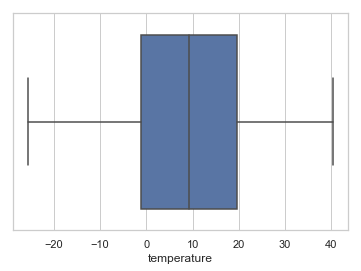

In [25]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["temperature"])


##### Pressure

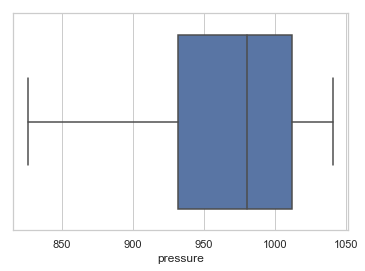

In [26]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["pressure"])

##### humidity

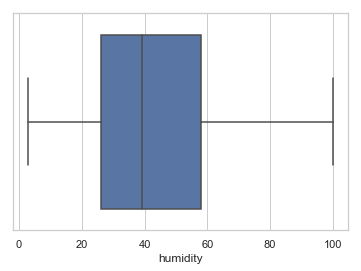

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["humidity"])

##### Wind Direction

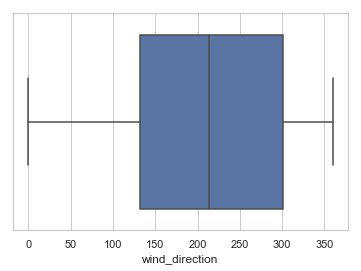

In [28]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["wind_direction"])

##### Wind Speed

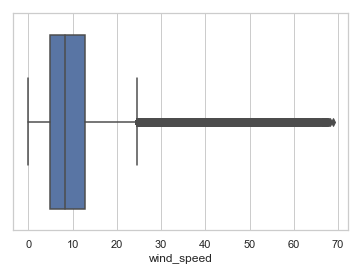

In [29]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["wind_speed"])

### Concat features from both Grid & Observed Weather Station

#### Concat the weather features for each Air Quality Station

In [30]:
# observed weather total time
observed_station_time = observed_station_data.time.unique()
observed_station_total_hours = len(observed_station_time)
display(observed_station_time)
print("The total time hour of observed weather station: {}".format(len(observed_station_data.time.unique())))

# Grid weather total time
grid_station_time = grid_station_data.time.unique()
grid_station_total_hours = len(grid_station_time)
display(grid_station_time)
print("The total time hour of grid weather station: {}".format(len(grid_station_data.time.unique())))



array(['2017-01-30T16:00:00.000000000', '2017-01-30T17:00:00.000000000',
       '2017-01-30T18:00:00.000000000', ...,
       '2018-05-02T21:00:00.000000000', '2018-05-02T22:00:00.000000000',
       '2018-05-02T23:00:00.000000000'], dtype='datetime64[ns]')

The total time hour of observed weather station: 10956


array(['2017-01-01T00:00:00.000000000', '2017-01-01T01:00:00.000000000',
       '2017-01-01T02:00:00.000000000', ...,
       '2018-05-02T21:00:00.000000000', '2018-05-02T22:00:00.000000000',
       '2018-05-02T23:00:00.000000000'], dtype='datetime64[ns]')

The total time hour of grid weather station: 11567


1. From the above information, we can see that the shared time period is from **2017-01-30 16:00:00 to 2018-05-02 23:00:00**. Thus, we will choose the features of this time period for training.
2. The weather features consist of **K** nearest neighbors weather stations' features.

In [31]:
# concat the weather features from  2017-01-30 16:00:00 to 2018-05-02 23:00:00
import ipdb
# ipdb.set_trace()
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler


def getWeatherFeatures(airQ_station_id):
    # Find the K neighbors
    knn_list = []
    for i in range(k_nn):
        name = "N{}".format(i)
        knn_list.append(aq_stations_knn_df.at[airQ_station_id, name])

    # Initialize the features dataframe with time period
    time_period = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
    data_df = pd.DataFrame(time_period, columns=['time'])
    
    # merge the data from Air Quality Stations
    airQ_data_df = airQ_data[airQ_data.station_id == airQ_station_id]
    airQ_data_df = airQ_data_df.drop(columns=['station_id'])
#     ipdb.set_trace()
    data_df = data_df.merge(airQ_data_df, on='time', how='left')
        
    # add the features from k neighbors
    for k, station in enumerate(knn_list):
        # data of the station
        station_data = weather_data[weather_data.station_id == station]
        
        # drop the station_id
        station_data = station_data.drop(columns=['station_id'])
        
        # add the station_id to the columns name
        station_data = station_data.rename(columns={
            "temperature": "{}_{}_tem".format(k, station),
            "pressure": "{}_{}_pre".format(k, station),
            "humidity": "{}_{}_hum".format(k, station),
            "wind_direction": "{}_{}_wd".format(k, station),
            "wind_speed": "{}_{}_ws".format(k, station),
            "weather": "{}_{}_wea".format(k, station)
        })
        
        # merge the features from different time
        data_df = data_df.merge(station_data, on='time', how='left')
    
    # Code for data imputation
#     data_df.time = data_df.time.reset_index()
#     data_cols = data_df.columns
#     data_filled = KNN(k=2).fit_transform(data_df)
#     data_filled_df = pd.DataFrame(data_filled, columns=data_cols)
#     data_filled_df.time = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
    
    print("==={} finished===".format(airQ_station_id))
    return data_df



    
# The total length of time should be 10976
# from  2017-01-30 16:00:00 to 2018-05-02 23:00:00
atzx = getWeatherFeatures("aotizhongxin_aq")
display(atzx.shape)
display(atzx.head())

# Method for checking the duplicates time features
# atzx = airQ_data[airQ_data.station_id == 'aotizhongxin_aq']
# atzx_time_count_df = pd.DataFrame(atzx.time.value_counts())
# atzx_time_count_df[atzx_time_count_df.time > 1]

Using TensorFlow backend.


===aotizhongxin_aq finished===


(10976, 25)

time  PM2.5  PM10   NO2   CO    O3   SO2  \
0 2017-01-30 16:00:00   70.0  75.0  36.0  0.9  79.0  34.0   
1 2017-01-30 17:00:00   78.0  86.0  36.0  0.1  78.0  38.0   
2 2017-01-30 18:00:00   86.0  92.0  39.0  1.1  74.0  35.0   
3 2017-01-30 19:00:00   95.0   NaN  46.0  1.2  65.0  34.0   
4 2017-01-30 20:00:00   98.0   NaN  42.0  1.2   NaN  32.0   

   0_beijing_grid_304_tem  0_beijing_grid_304_pre  0_beijing_grid_304_hum  \
0                   -5.89                 1026.03                   14.58   
1                   -6.16                 1025.68                   15.11   
2                   -6.44                 1025.32                   15.64   
3                   -7.02                 1024.89                   16.59   
4                   -7.61                 1024.46                   17.55   

         ...         1_beijing_grid_283_hum  1_beijing_grid_283_wd  \
0        ...                          14.07                 201.74   
1        ...                          14.62                 199.01   
2        ...                          15.18                 194.52   
3        ...                          16.02                 189.14   
4        ...                          16.86                 182.36   

  1_beijing_grid_283_ws  1_beijing_grid_283_wea  2_hadian_meo_tem  \
0                  6.24                    None              -1.6   
1                  5.02                    None              -2.0   
2                  3.81                    None              -2.9   
3                  3.40                    None              -3.0   
4                  3.02                    None              -3.8   

   2_hadian_meo_pre  2_hadian_meo_hum  2_hadian_meo_wd 2_hadian_meo_ws  \
0            1026.1              14.0            231.0             2.5   
1            1025.9              16.0            234.0             1.9   
2            1025.6              18.0            242.0             1.2   
3            1025.2              20.0            254.0             1.1   
4            1024.3              23.0              0.5             0.0   

   2_hadian_meo_wea  
0       Sunny/clear  
1       Sunny/clear  
2       Sunny/clear  
3       Sunny/clear  
4       Sunny/clear  

[5 rows x 25 columns]

In [33]:
# Store the dataframe into dictionarys
airQ_data_dict = {}
airQ_stations_list = list(aq_stations_knn_df.index)
airQ_stations_list.sort(reverse=False)

for station in airQ_stations_list:
    airQ_data_dict[station] = getWeatherFeatures(station)
    airQ_data_dict[station].to_csv("./cleaned_data/{}.csv".format(station))
    

===aotizhongxin_aq finished===
===badaling_aq finished===
===beibuxinqu_aq finished===
===daxing_aq finished===
===dingling_aq finished===
===donggaocun_aq finished===
===dongsi_aq finished===
===dongsihuan_aq finished===
===fangshan_aq finished===
===fengtaihuayuan_aq finished===
===guanyuan_aq finished===
===gucheng_aq finished===
===huairou_aq finished===
===liulihe_aq finished===
===mentougou_aq finished===
===miyun_aq finished===
===miyunshuiku_aq finished===
===nansanhuan_aq finished===
===nongzhanguan_aq finished===
===pingchang_aq finished===
===pinggu_aq finished===
===qianmen_aq finished===
===shunyi_aq finished===
===tiantan_aq finished===
===tongzhou_aq finished===
===wanliu_aq finished===
===wanshouxigong_aq finished===
===xizhimenbei_aq finished===
===yanqin_aq finished===
===yizhuang_aq finished===
===yongdingmennei_aq finished===
===yongledian_aq finished===
===yufa_aq finished===
===yungang_aq finished===
===zhiwuyuan_aq finished===


### Missing Data

#### Analysis

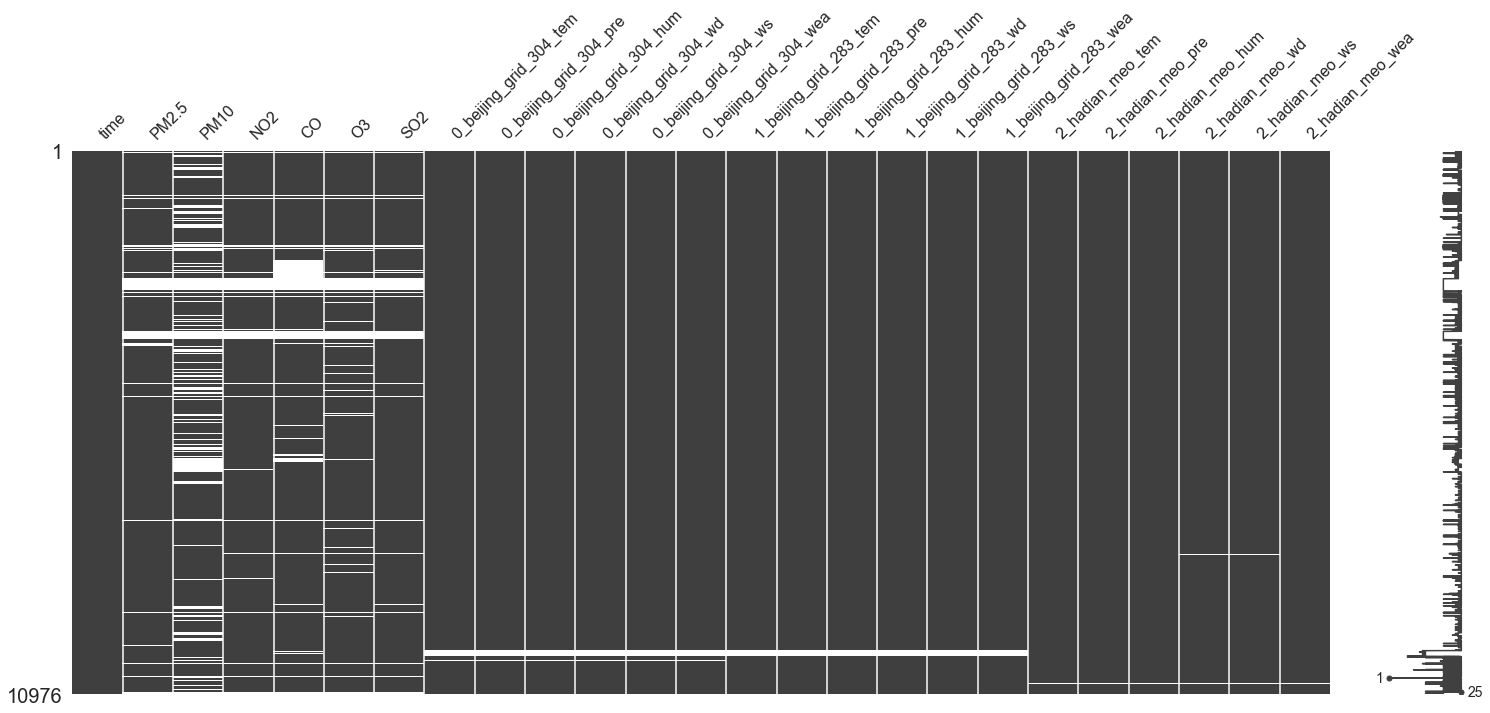

In [36]:
import missingno as msno
%matplotlib inline

msno.matrix(atzx)

In [39]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib

def missing_data_analysis(df, station):
    missing_data_df = df
    missing_rate_df = missing_data_df.isnull().sum() / len(missing_data_df)
    missing_rate_df = pd.DataFrame(missing_rate_df).reset_index()
    missing_rate_df.columns = ['col', 'rate']
    
    # Bar Chart
    fig, ax = plt.subplots(figsize=(30,10))
    ax.bar(missing_rate_df['col'], missing_rate_df['rate'])
    
#     ax.title.set_text(key)
    ax.set_title(station, fontweight="bold", size=30) # Title
    ax.set_ylabel('Missing Rate', fontsize = 20.0) # Y label
    ax.set_xlabel('Columns', fontsize = 20) # X label
    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.show()
    

def msno_analysis(df, station):
#     fig, ax = plt.subplots(figsize=(30,10))
    print("============== {} ================".format(station))
    msno.matrix(df)
    
    
# msno_analysis(atzx, 'aotizhongxin')

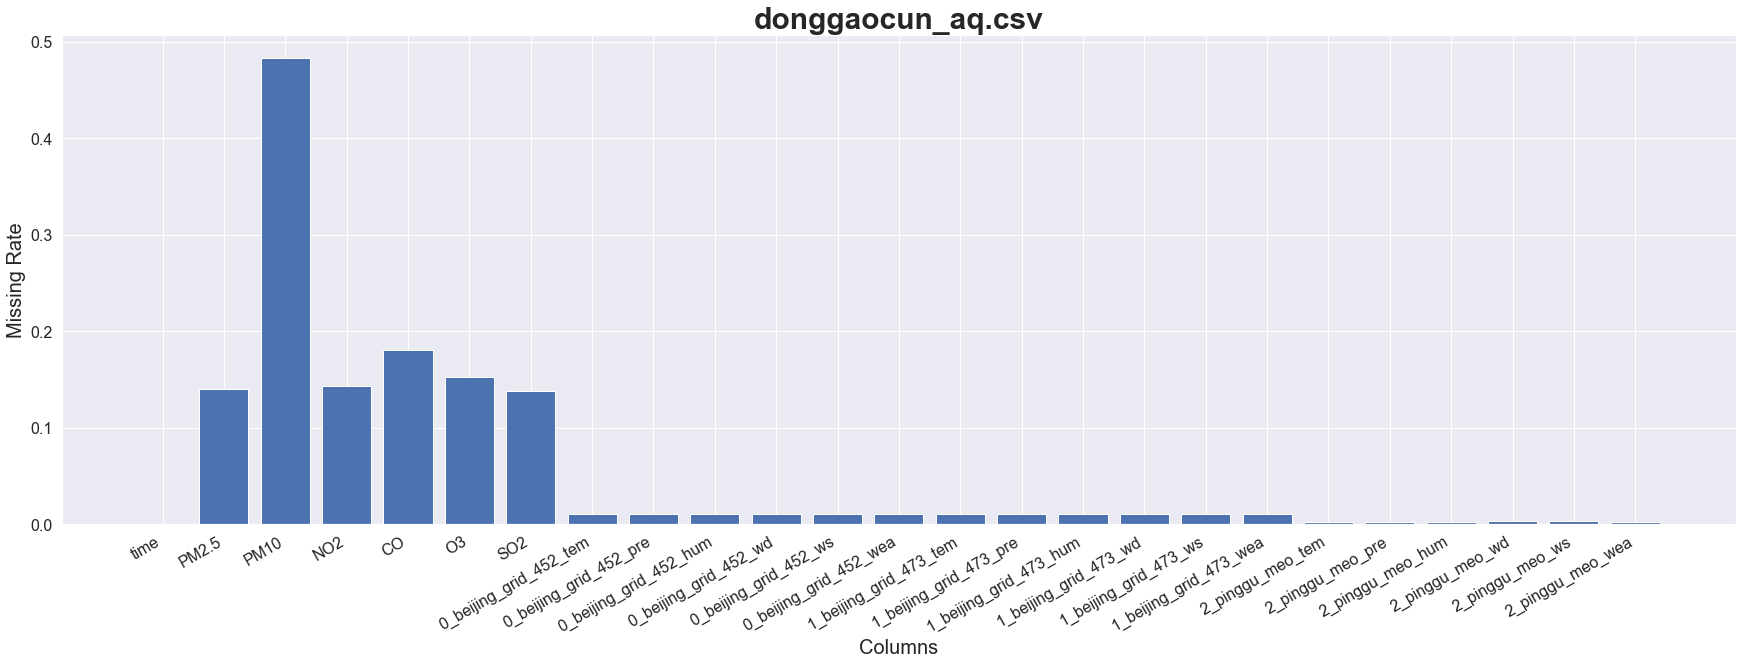

============== donggaocun_aq.csv ================


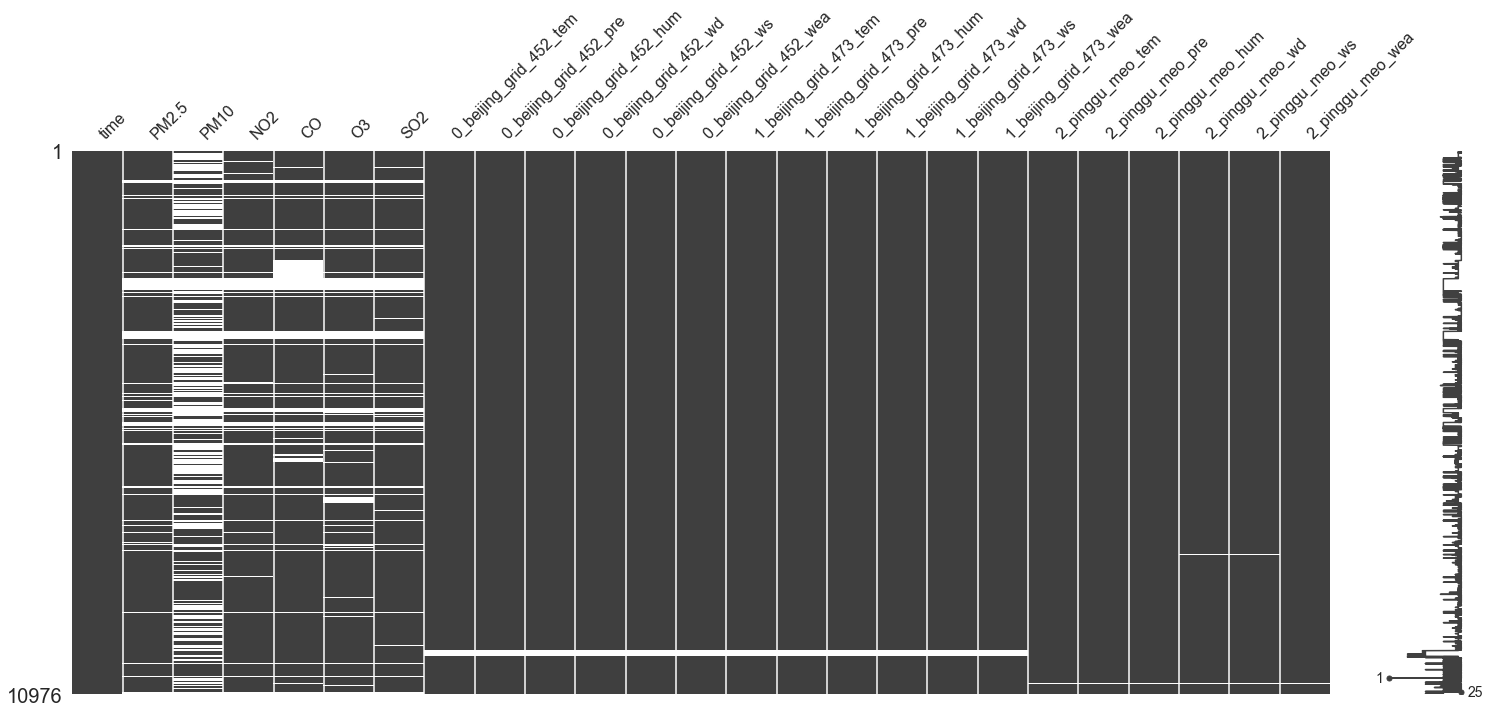

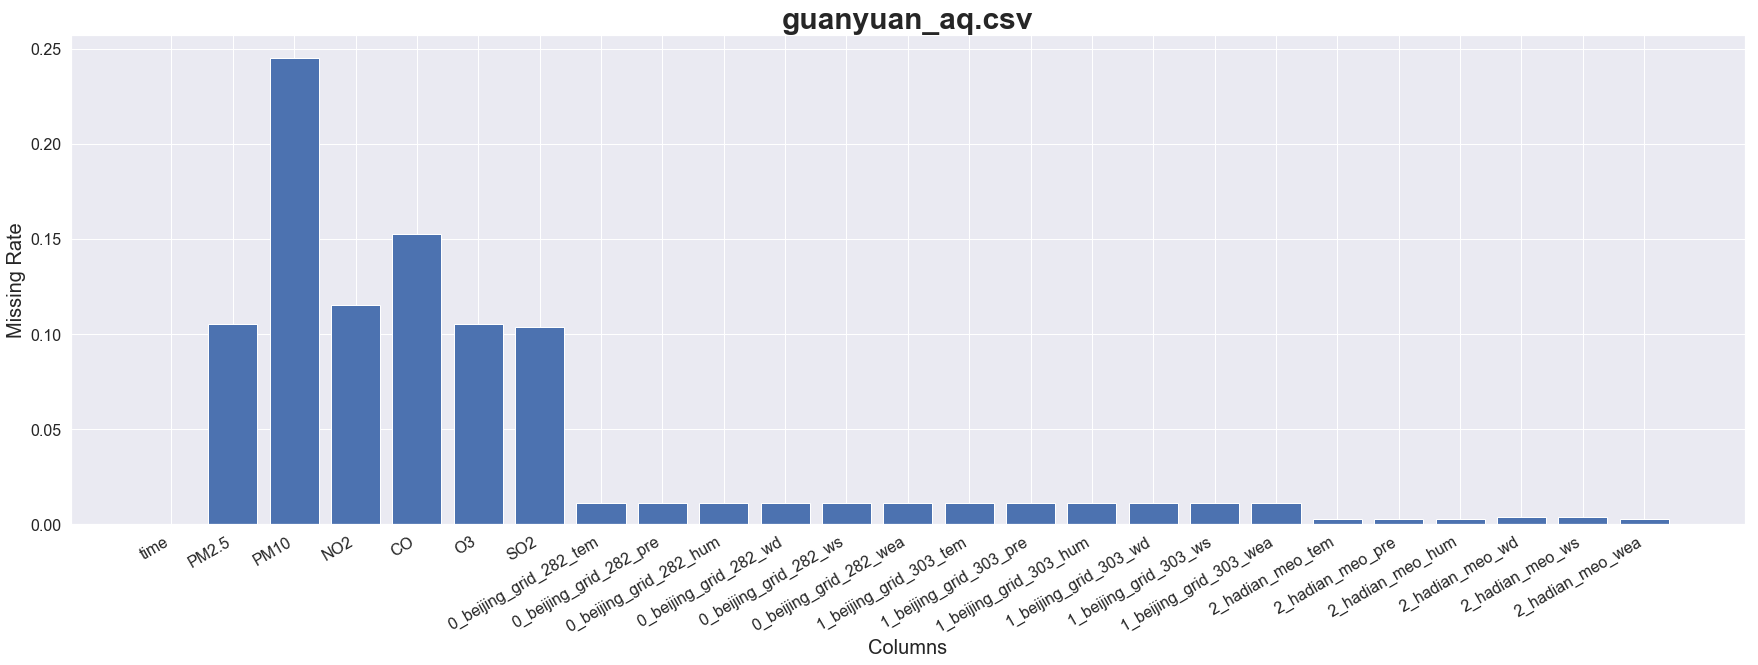

============== guanyuan_aq.csv ================


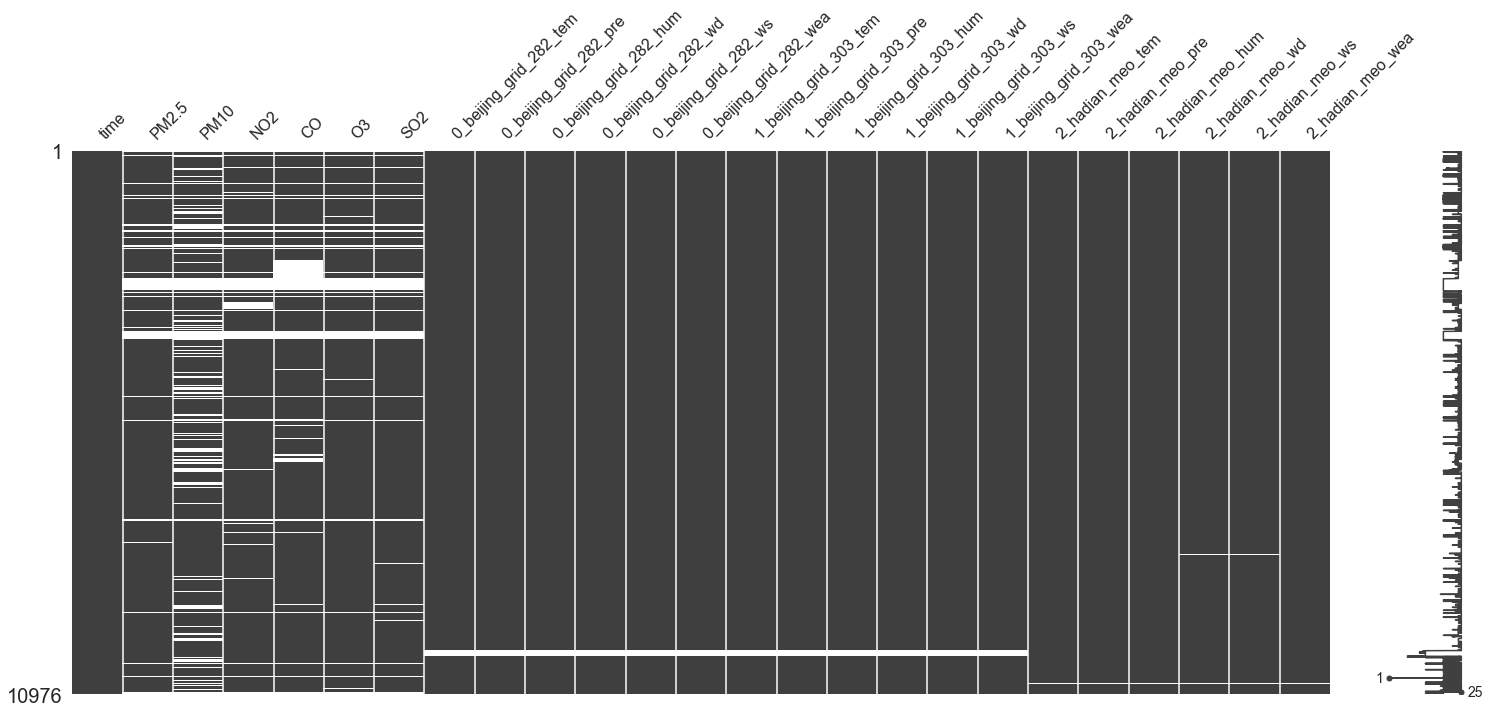

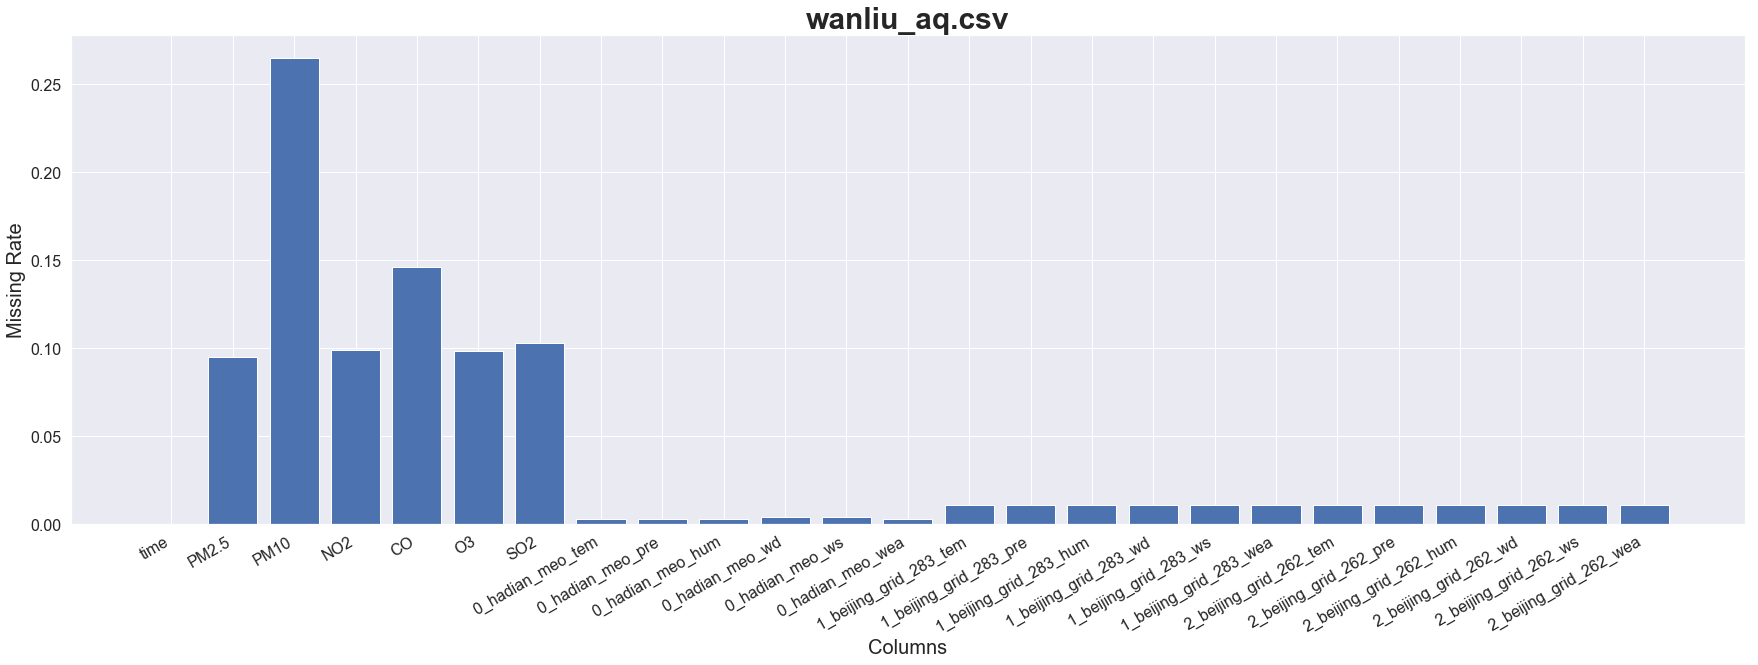

============== wanliu_aq.csv ================


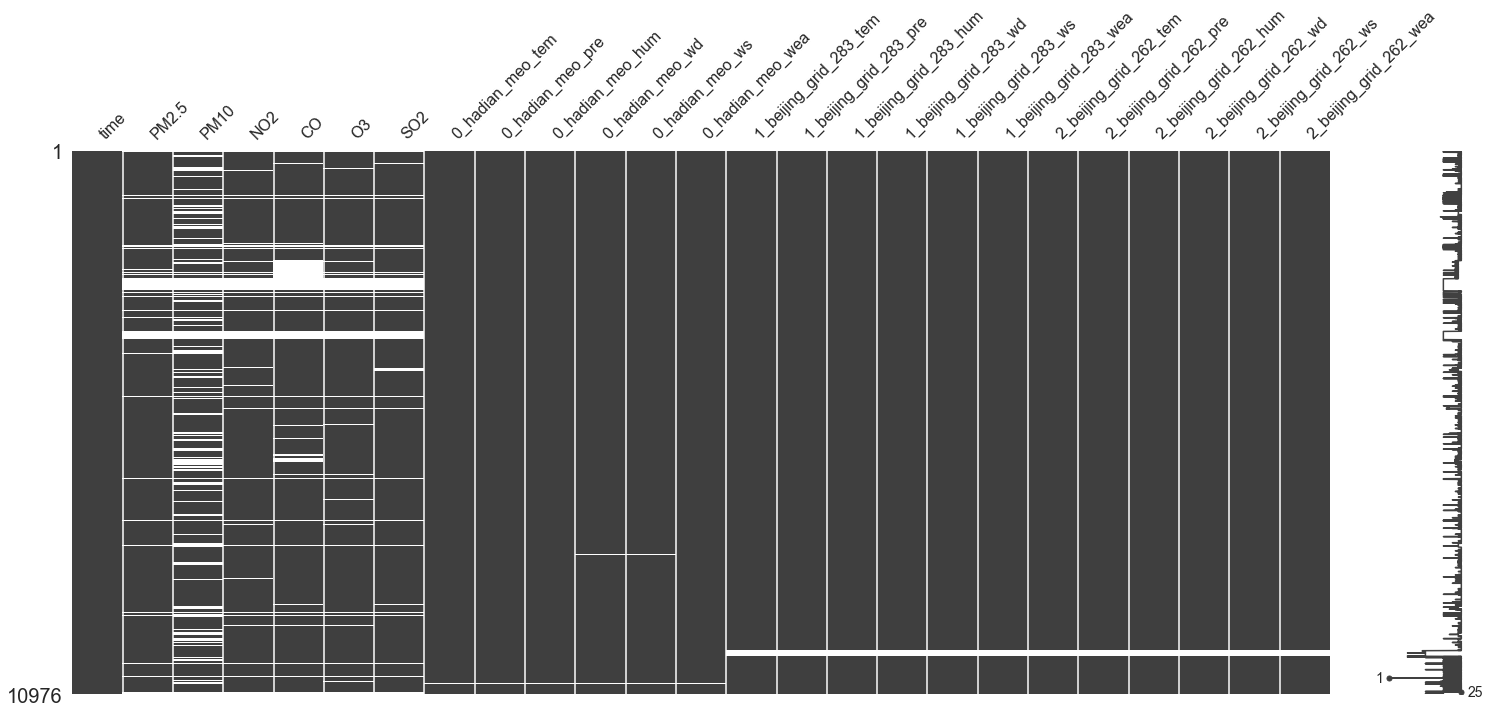

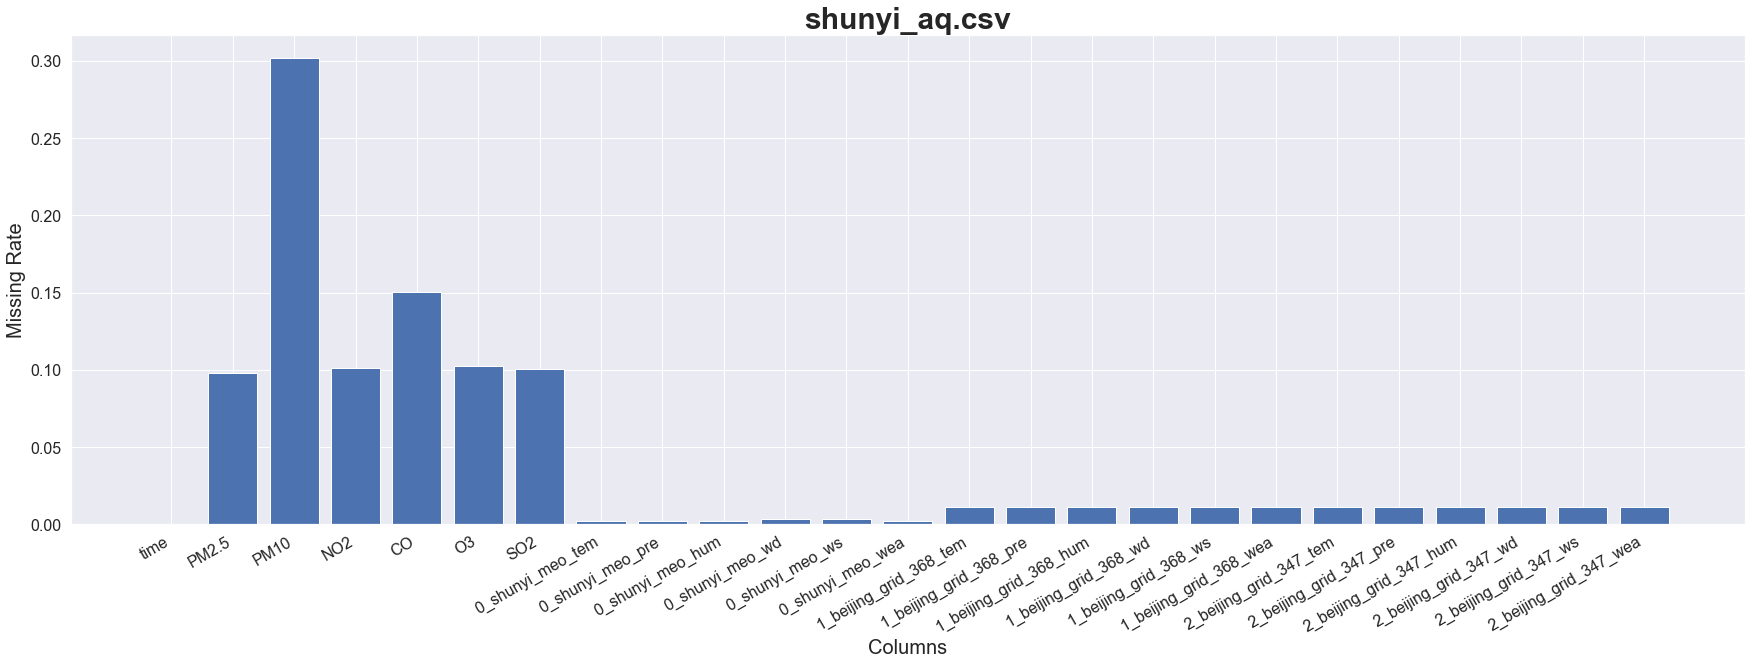

============== shunyi_aq.csv ================


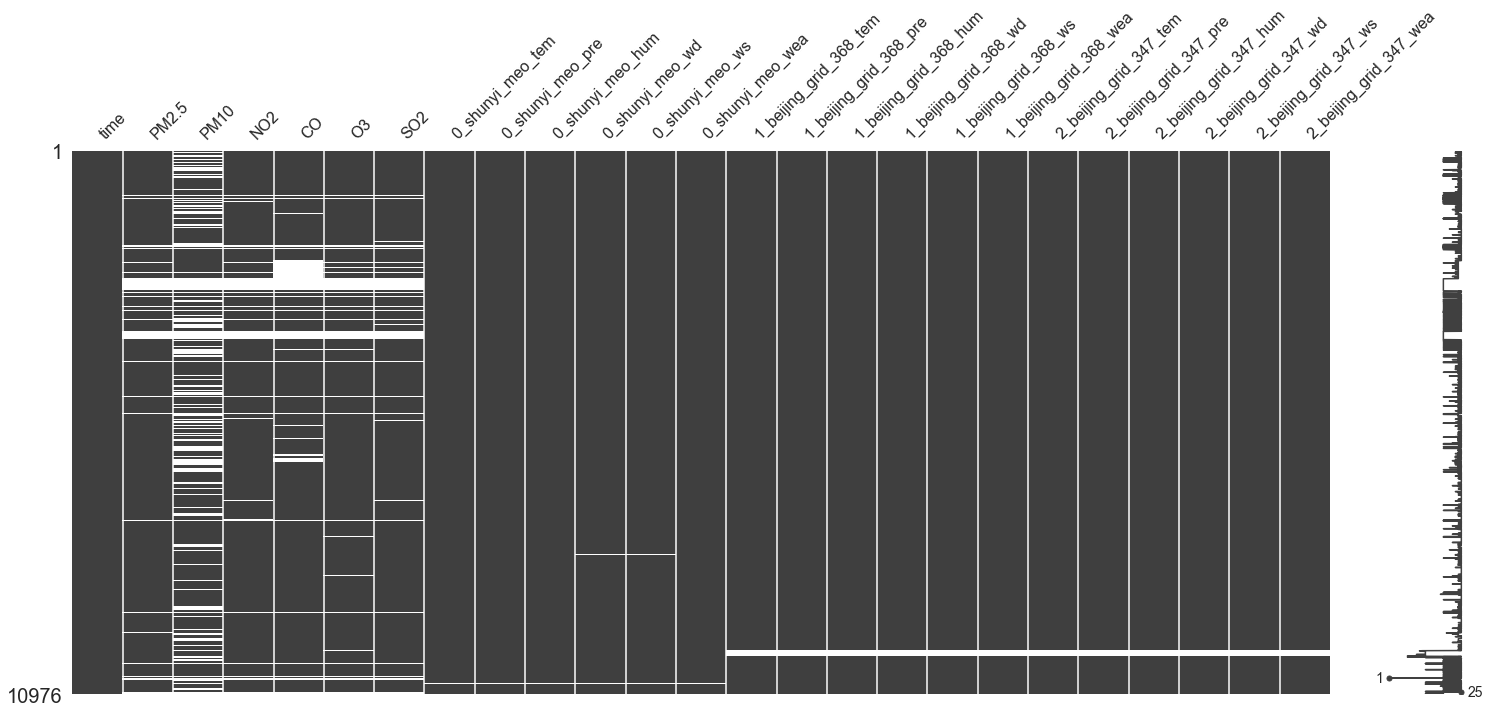

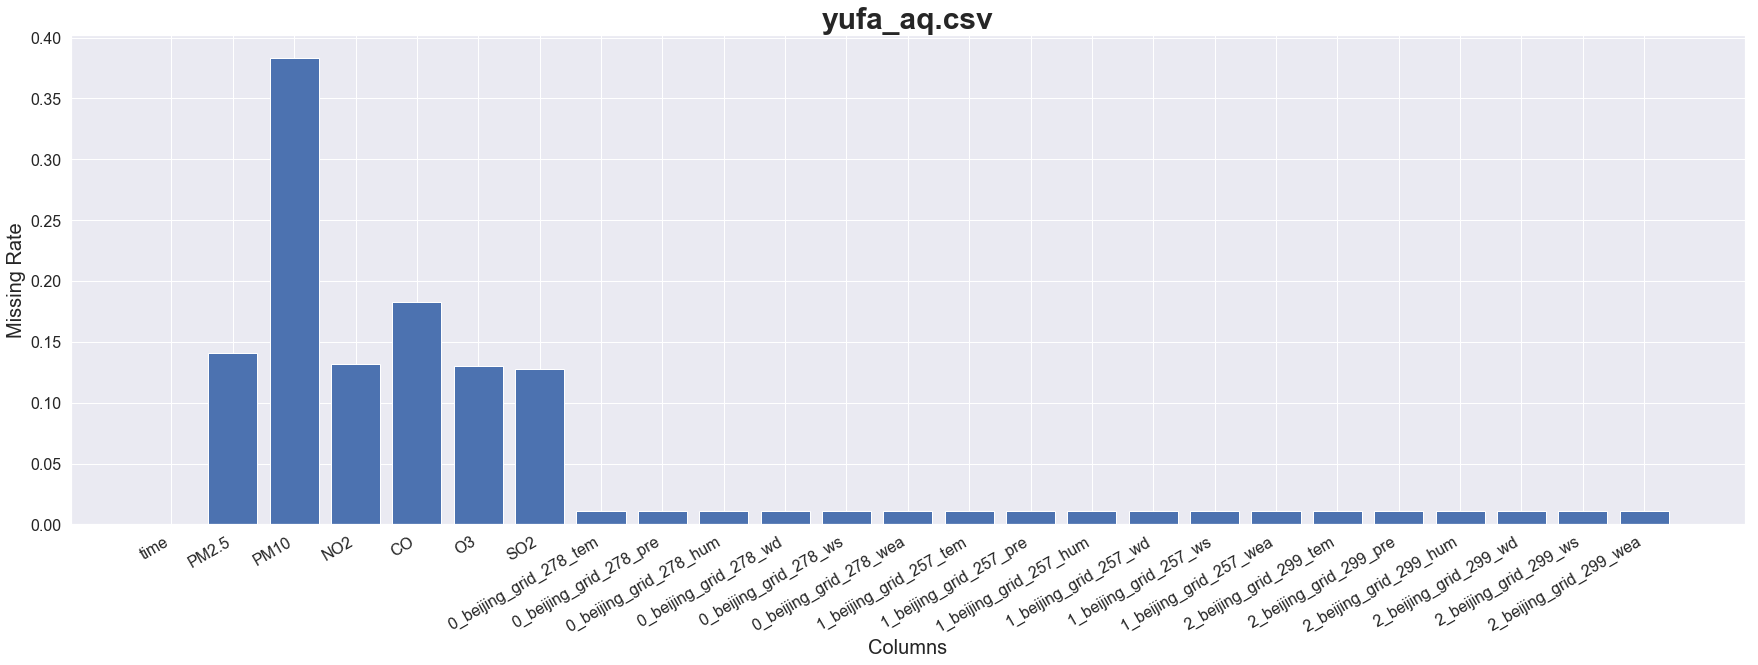

============== yufa_aq.csv ================


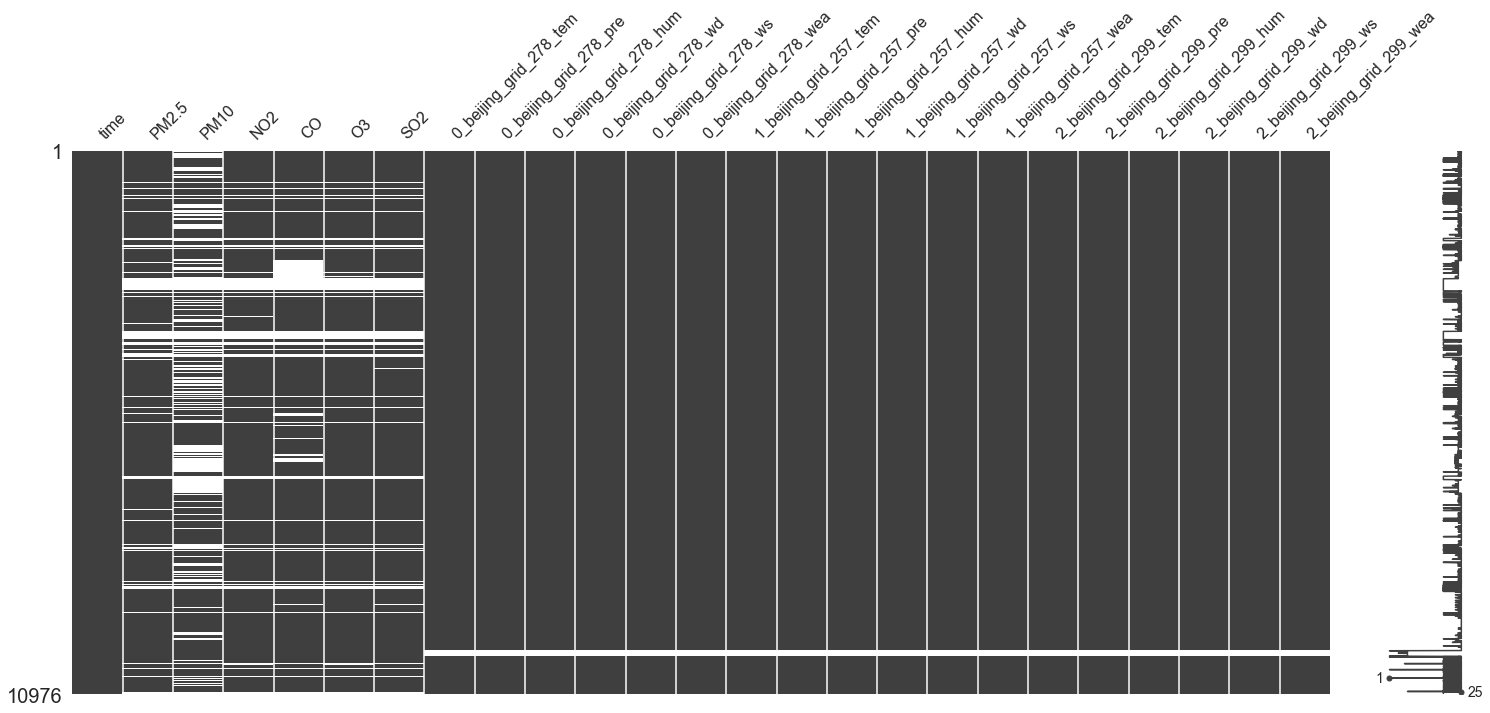

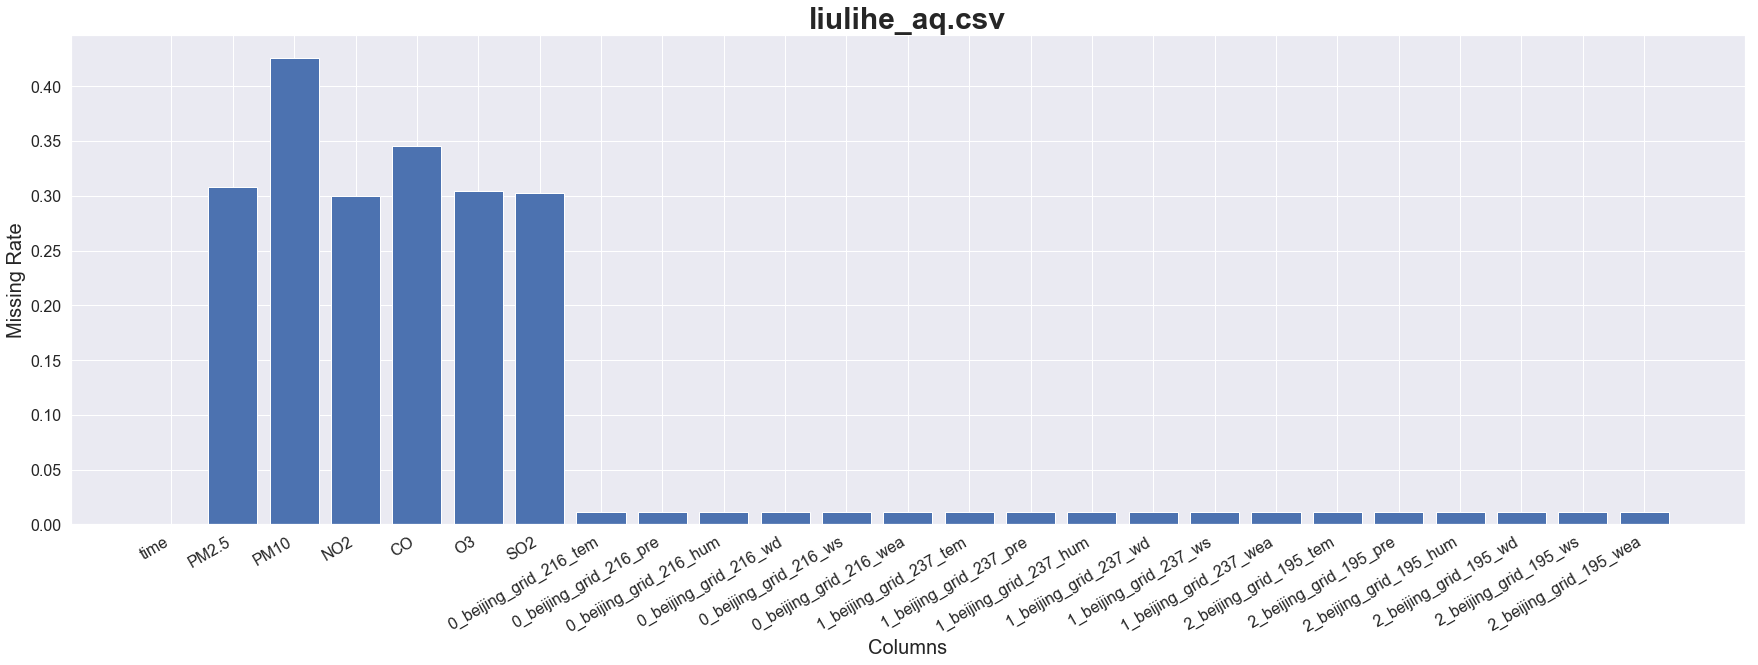

============== liulihe_aq.csv ================


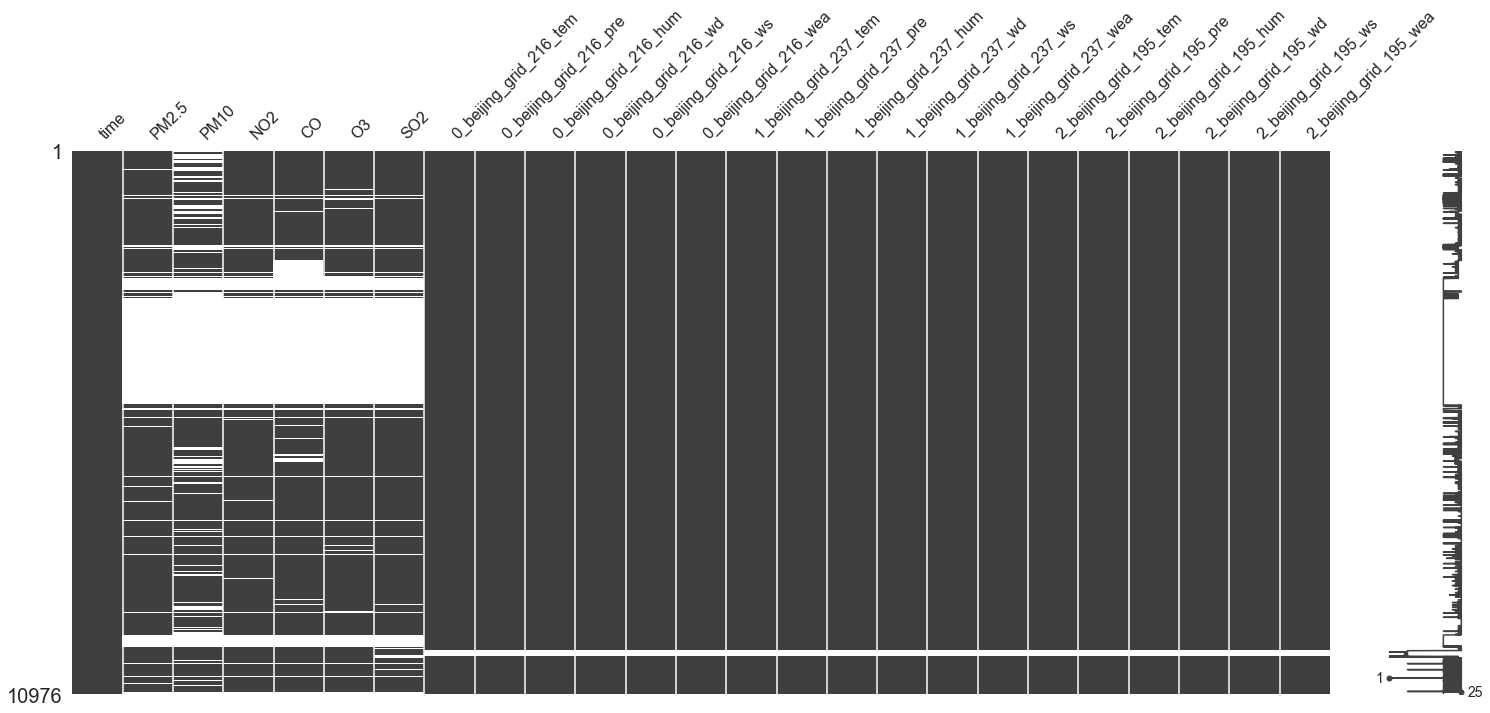

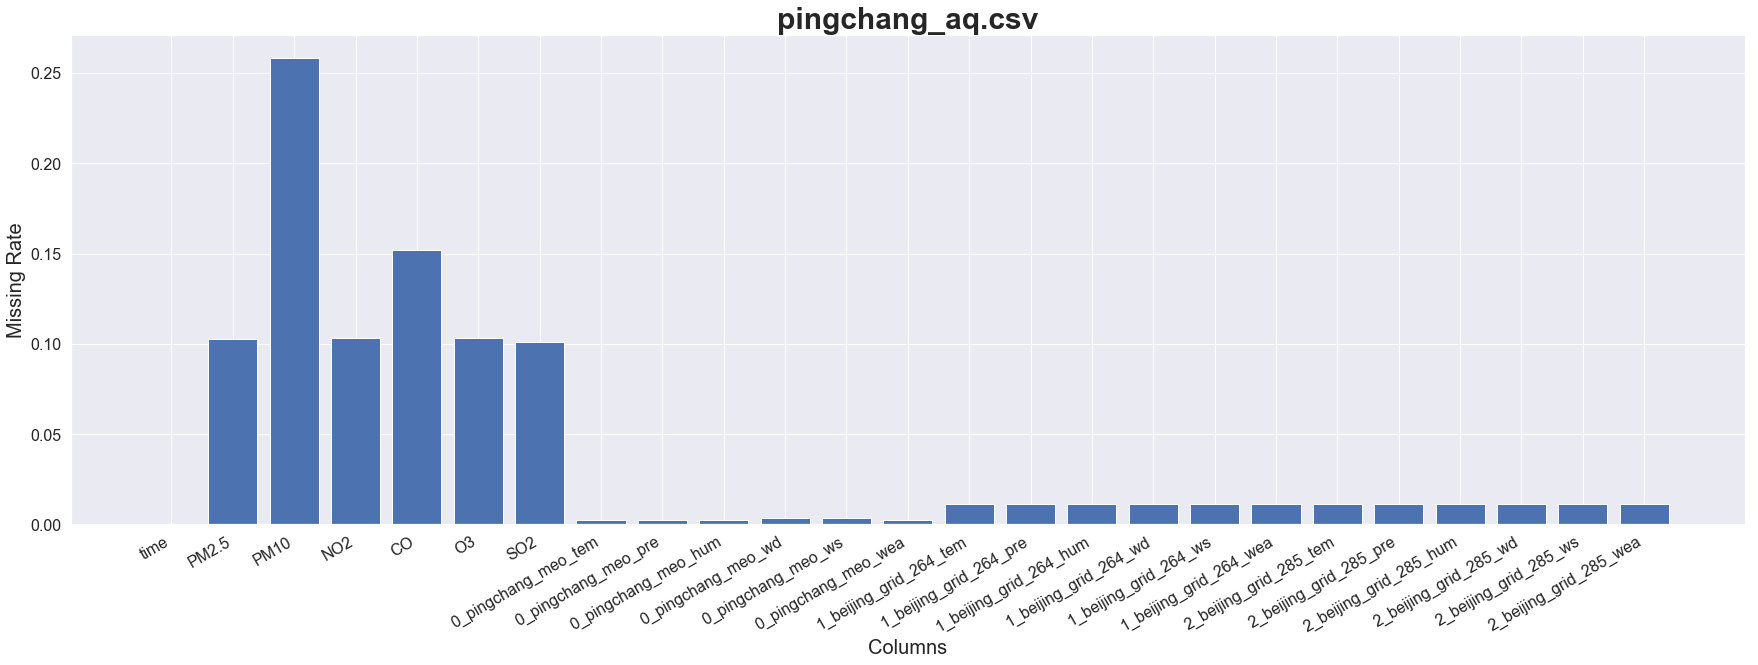

============== pingchang_aq.csv ================


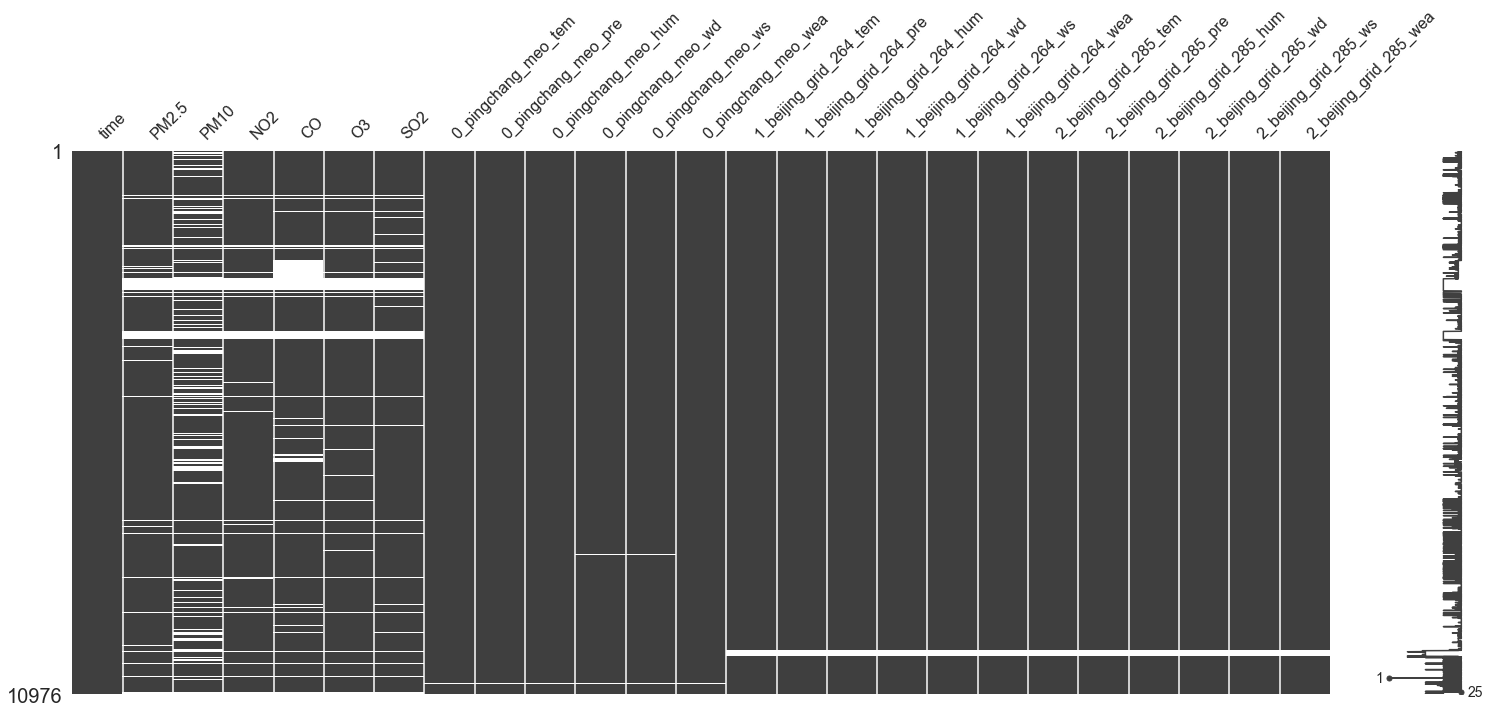

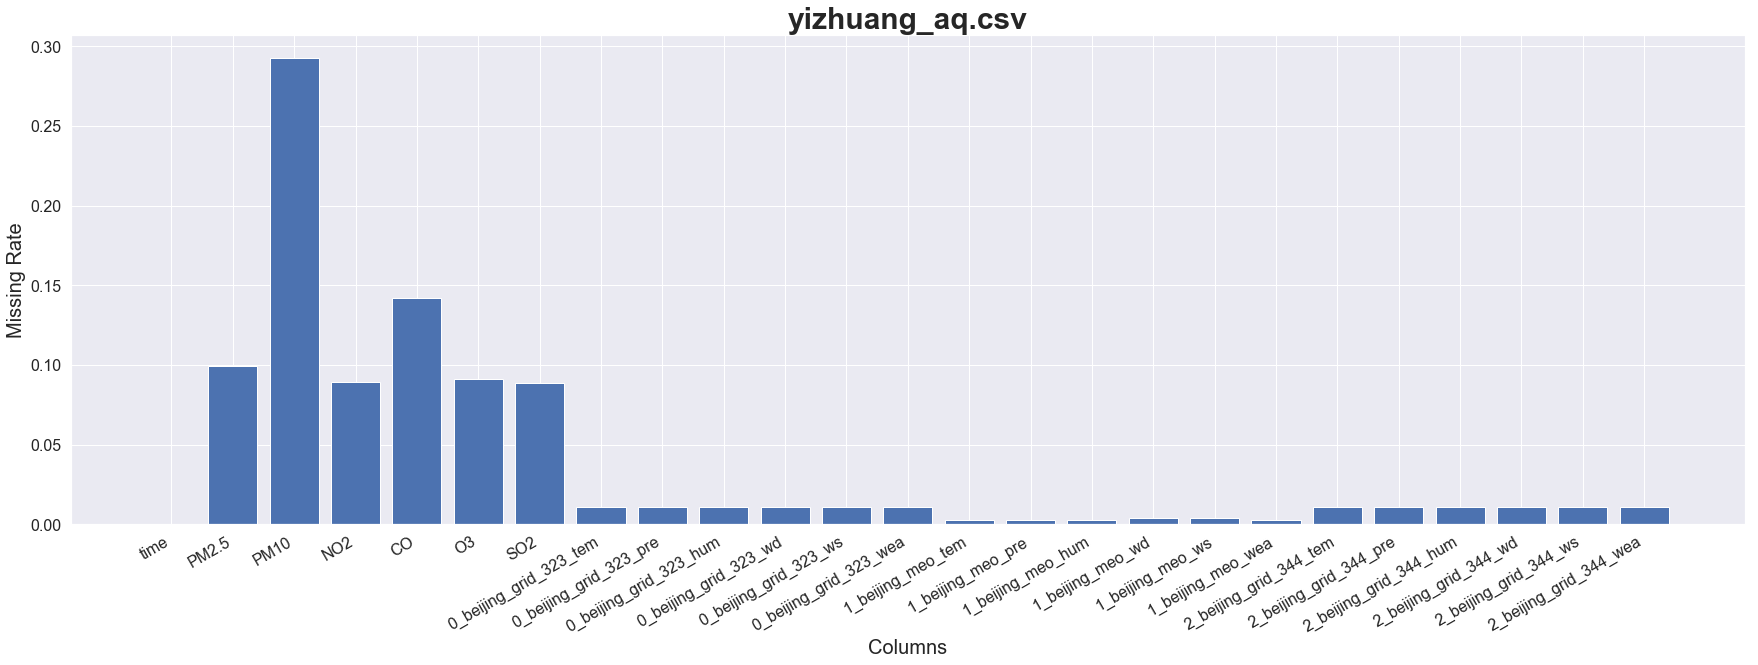

============== yizhuang_aq.csv ================


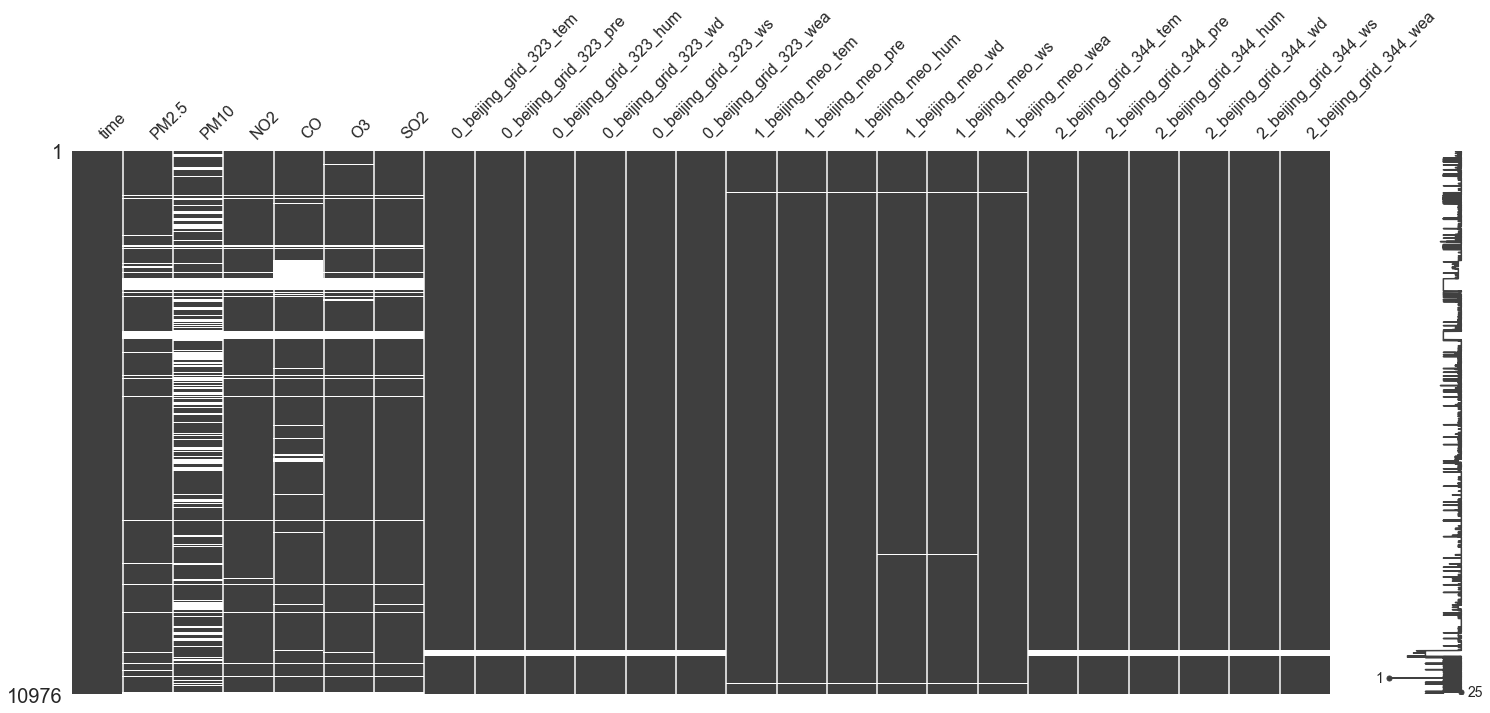

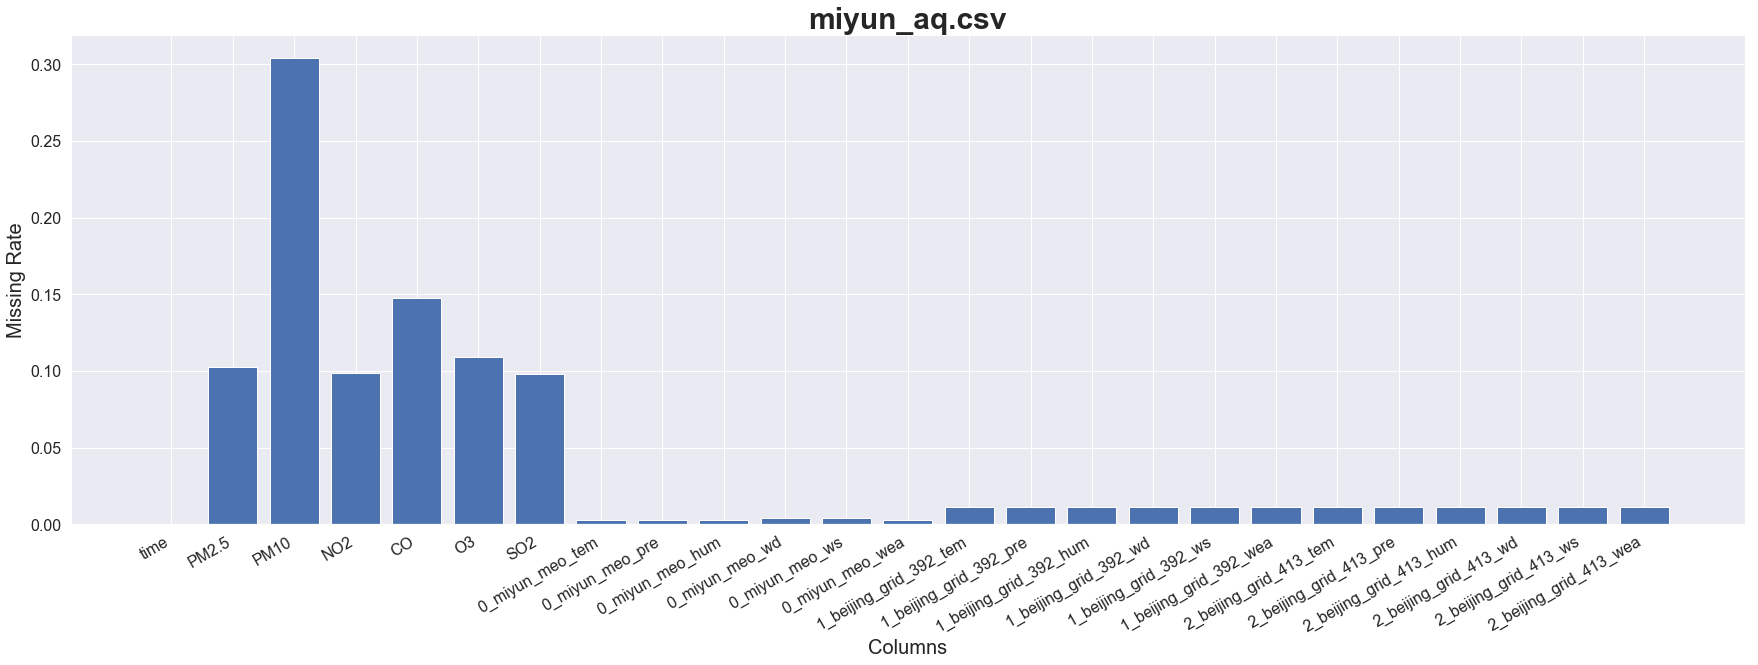

============== miyun_aq.csv ================


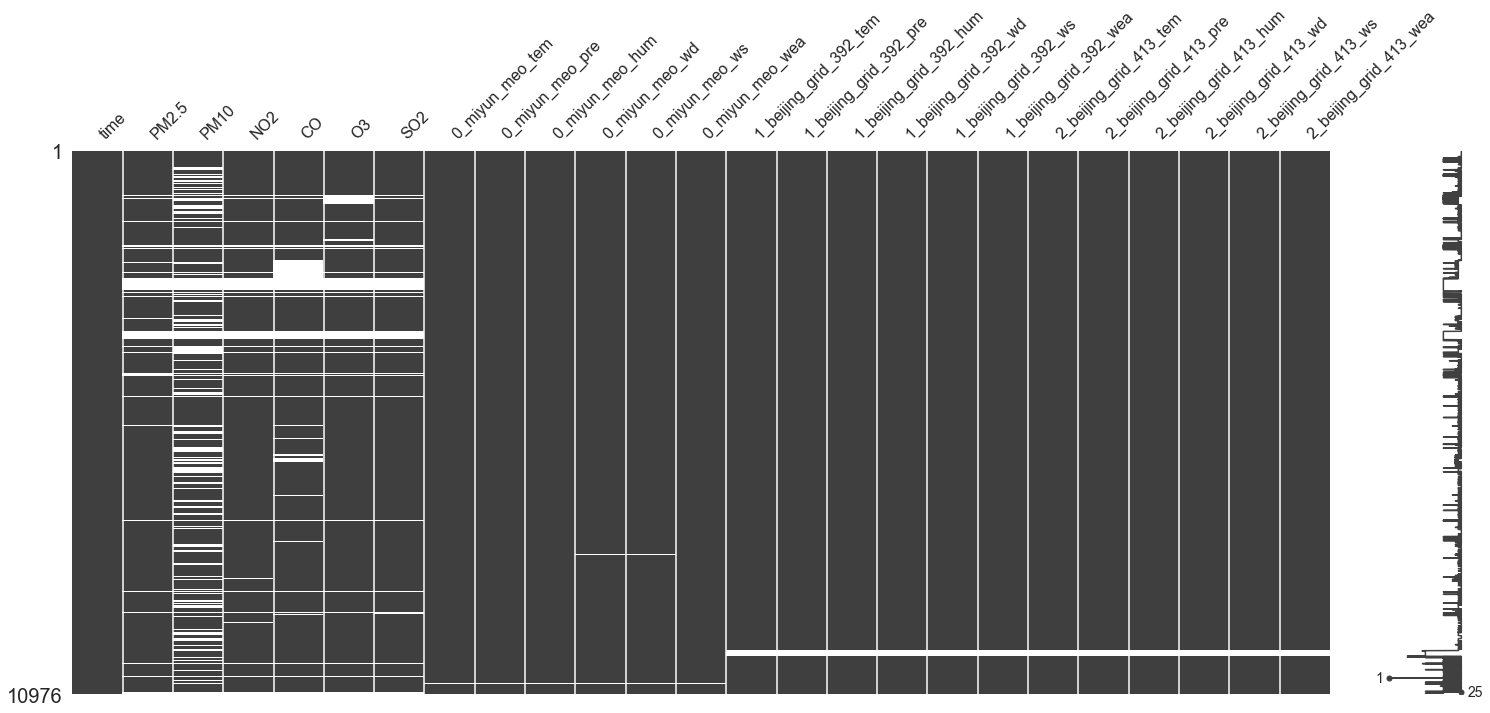

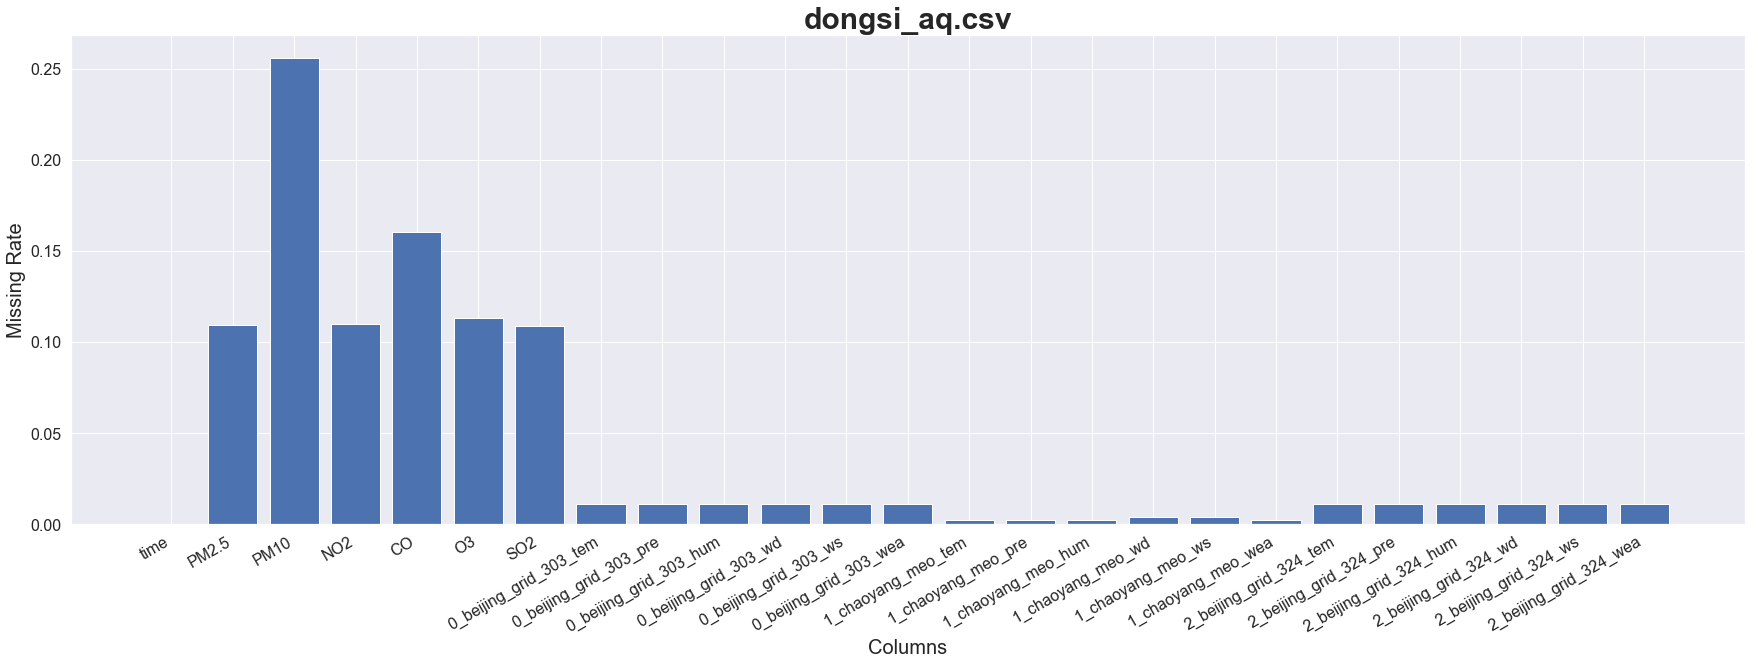

============== dongsi_aq.csv ================


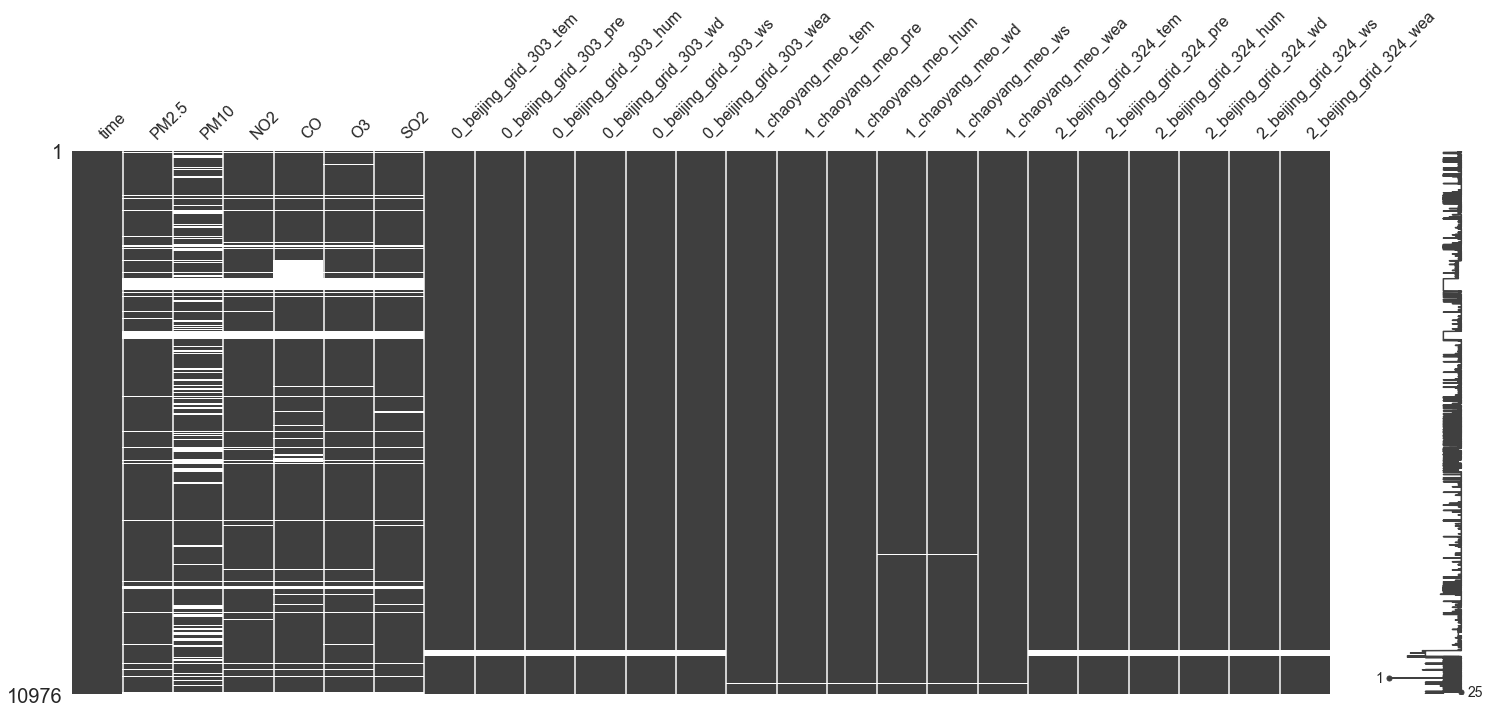

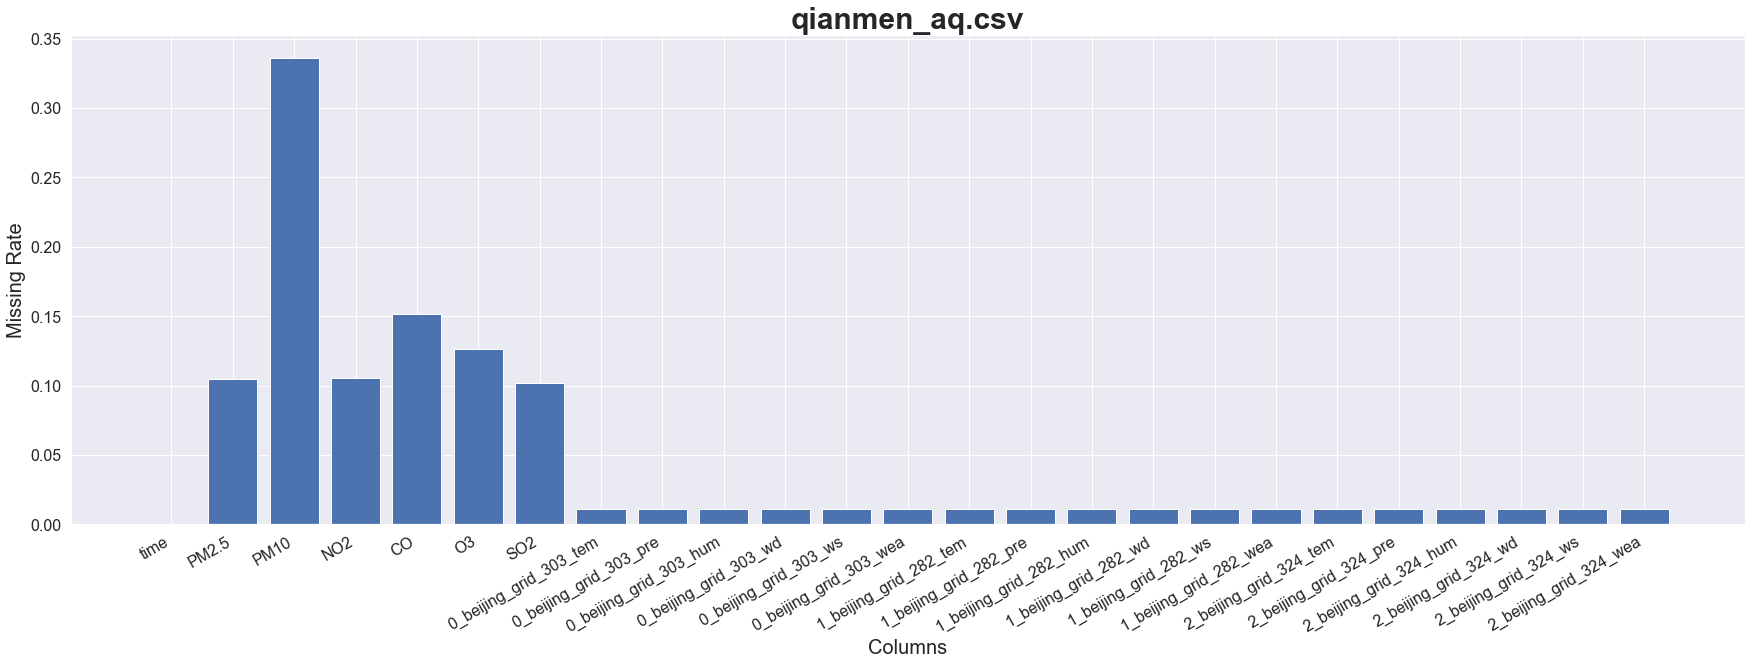

============== qianmen_aq.csv ================


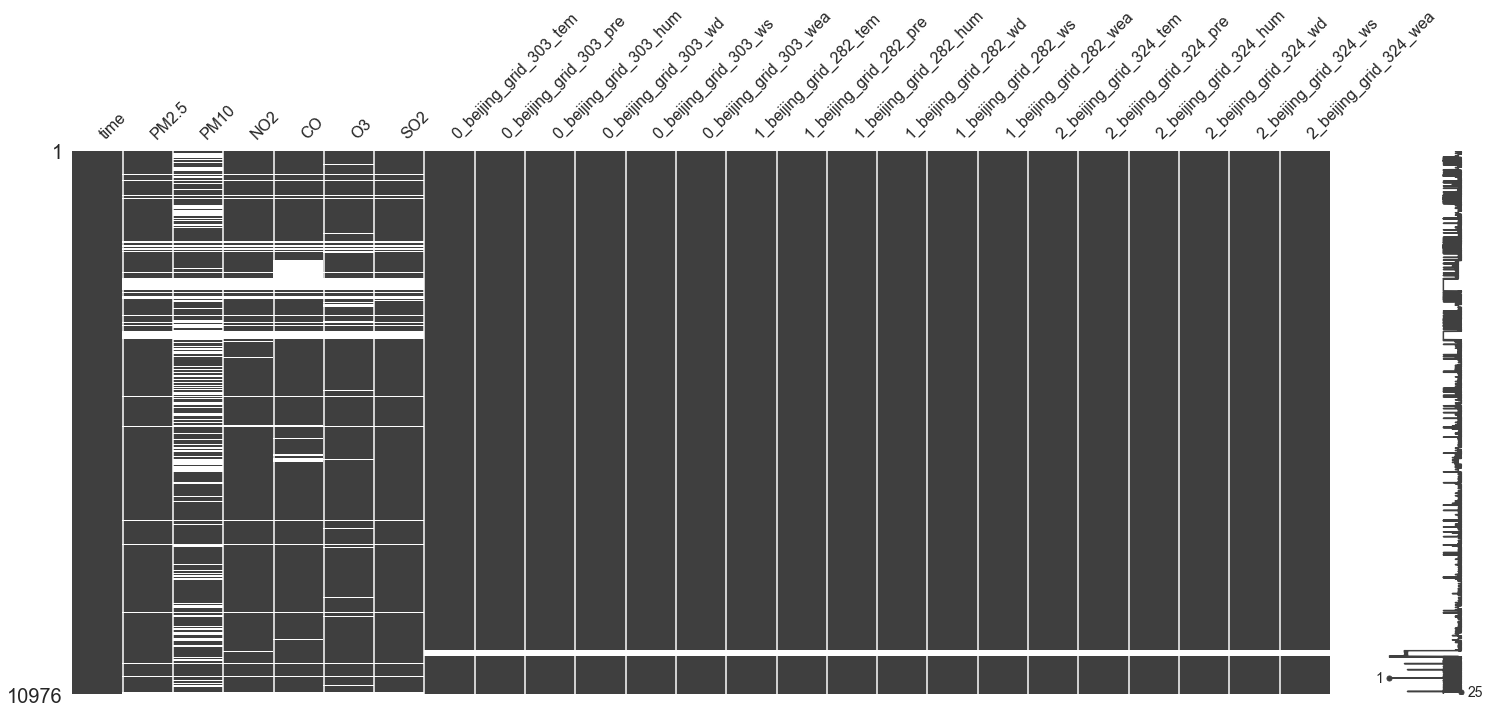

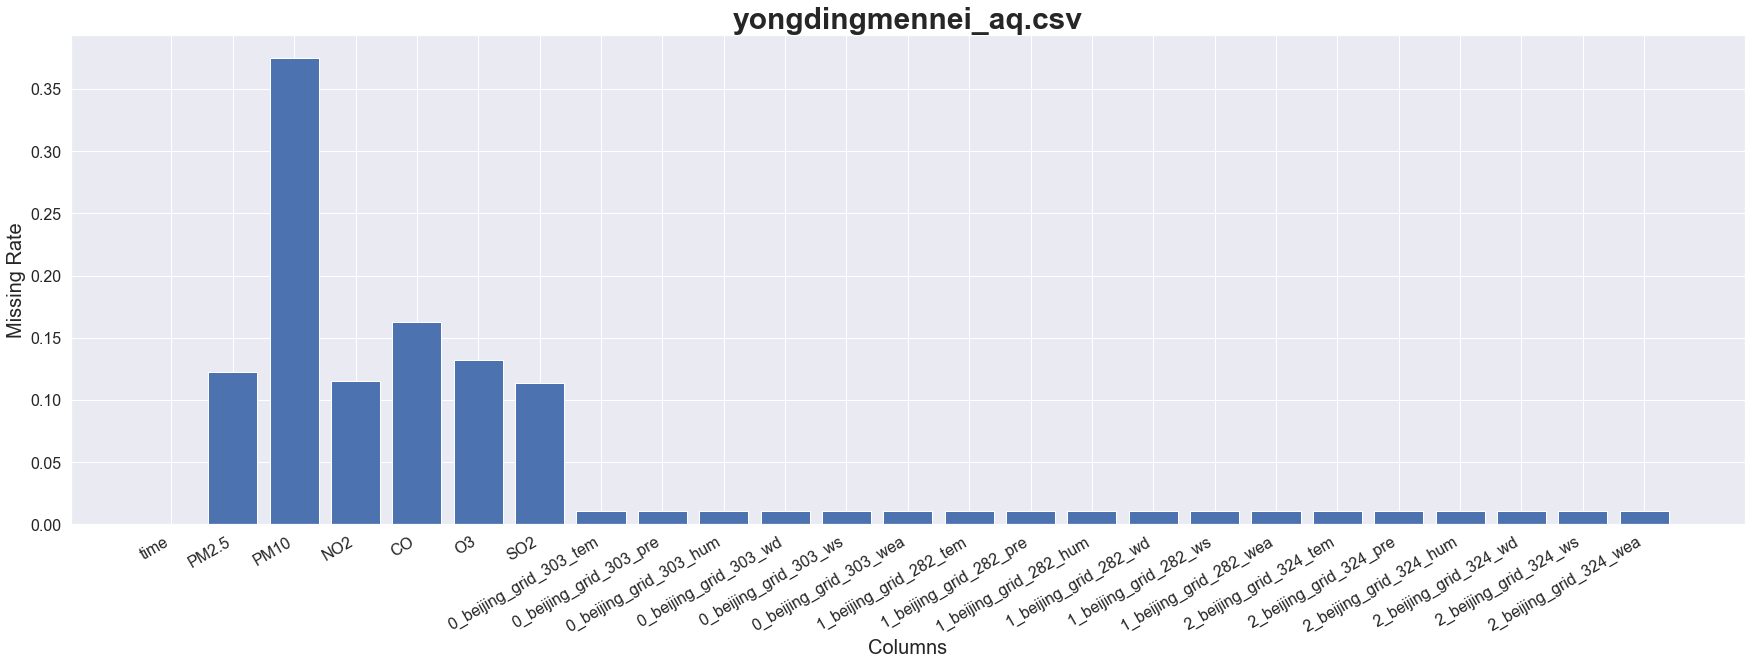

============== yongdingmennei_aq.csv ================


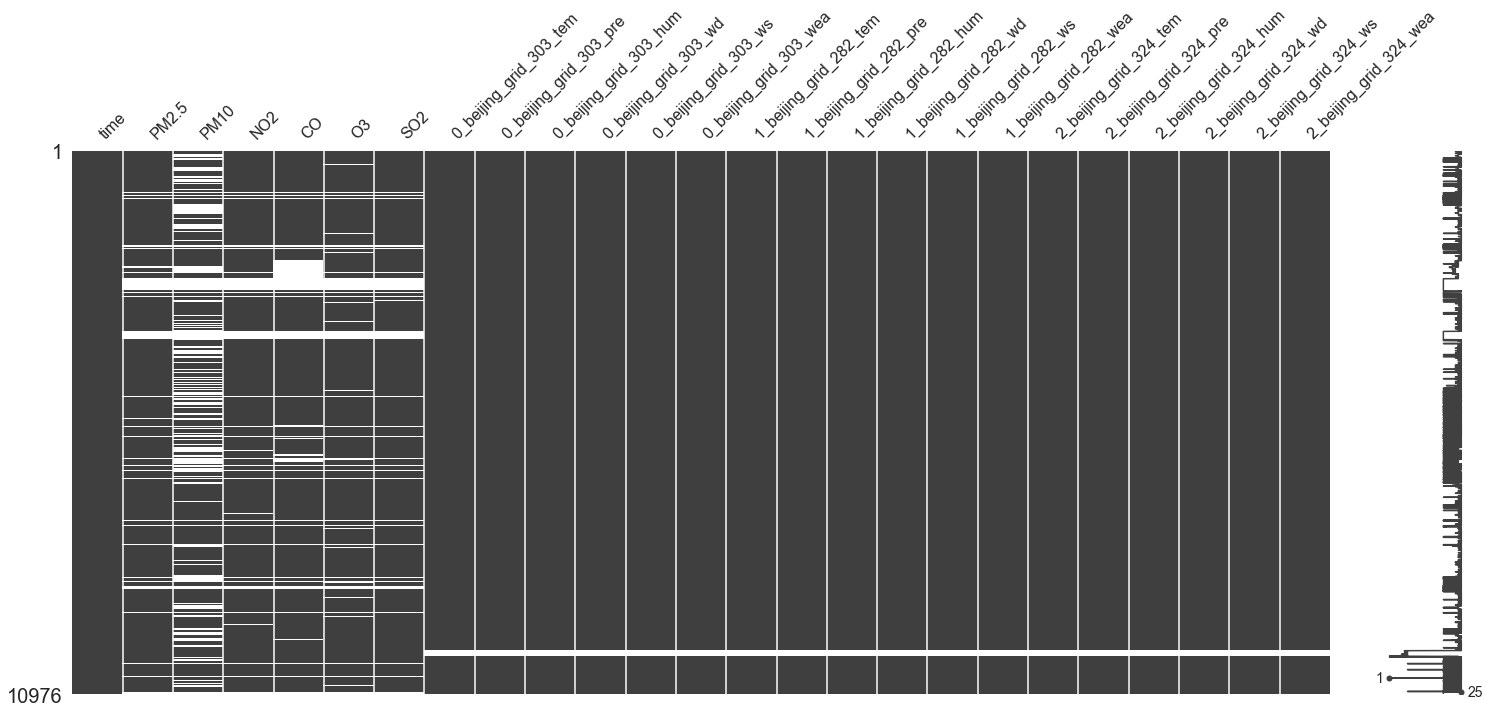

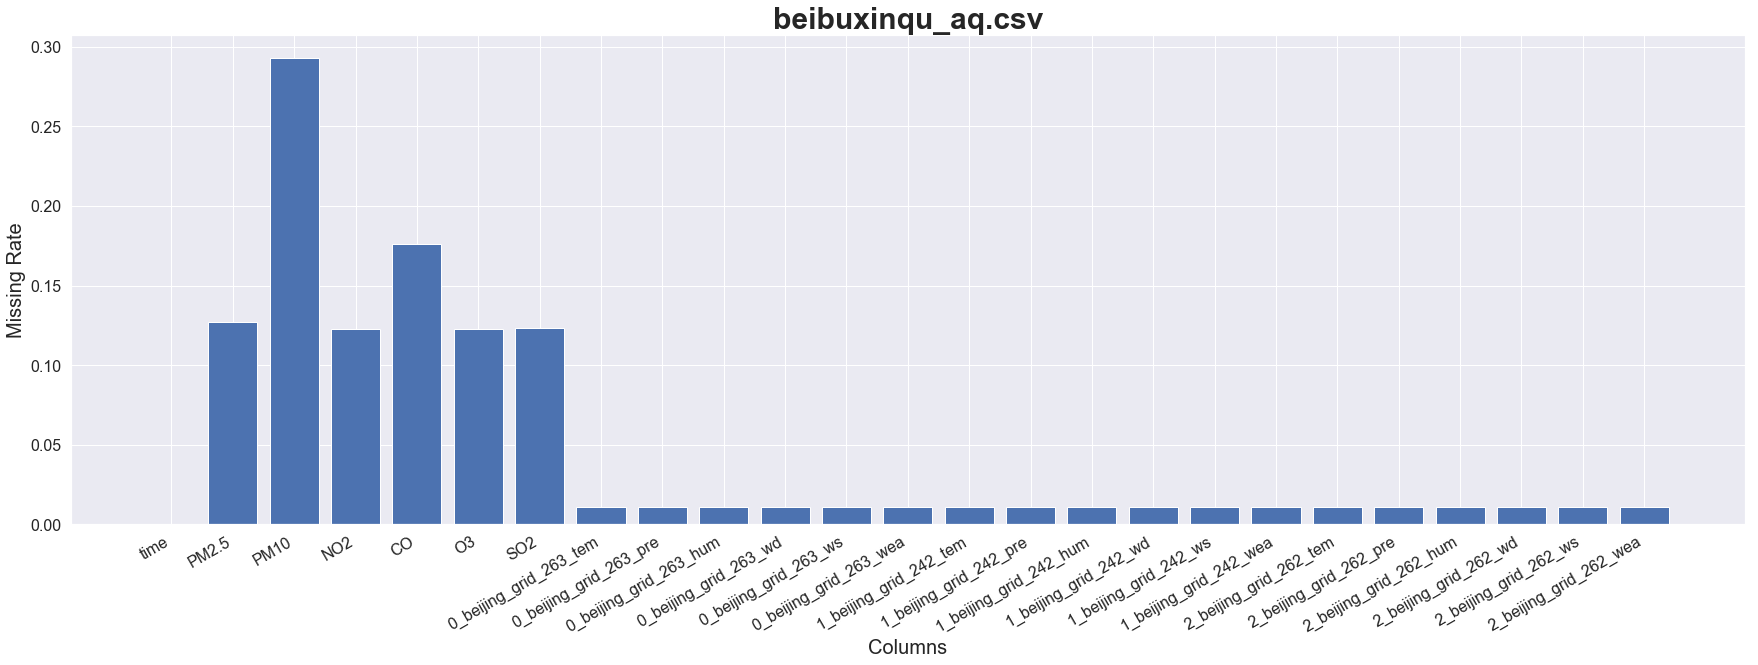

============== beibuxinqu_aq.csv ================


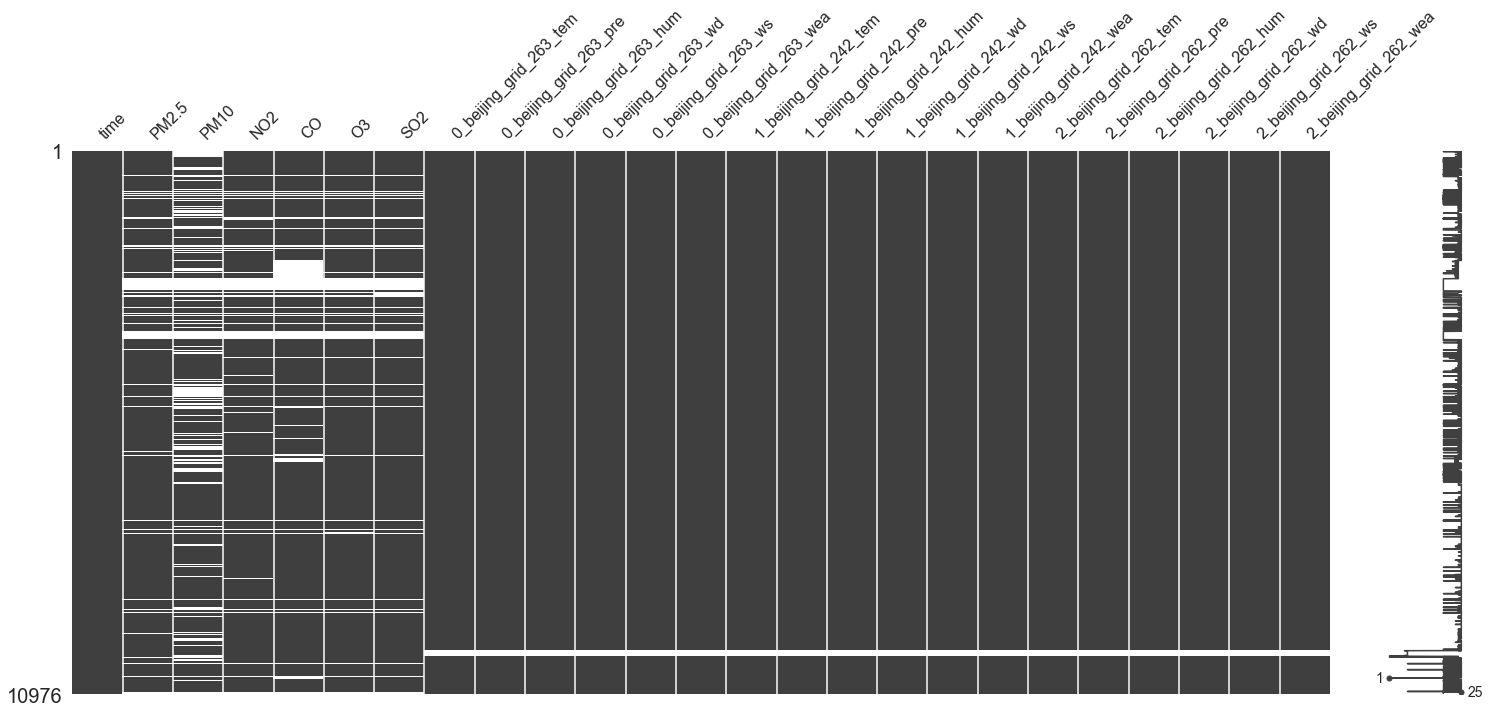

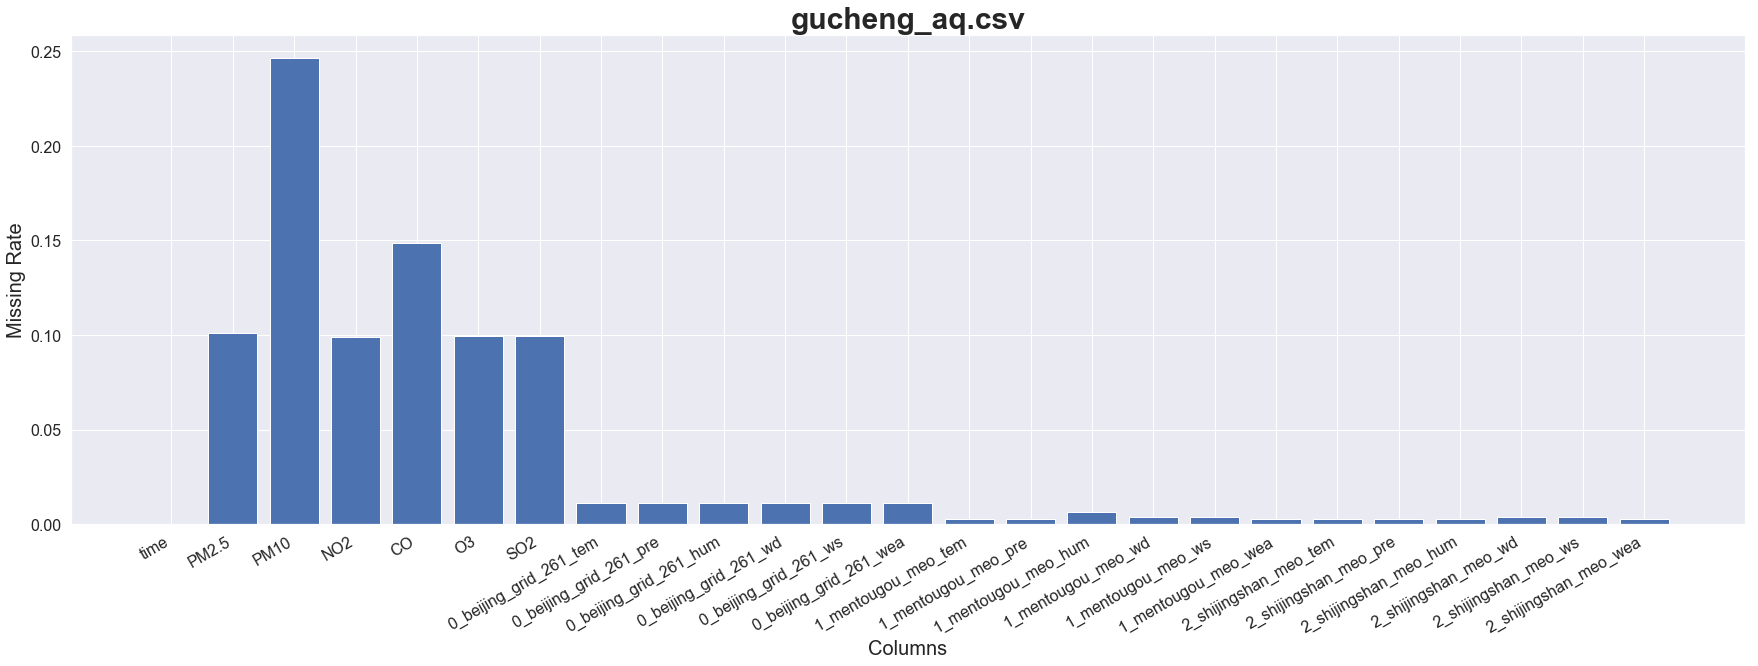

============== gucheng_aq.csv ================


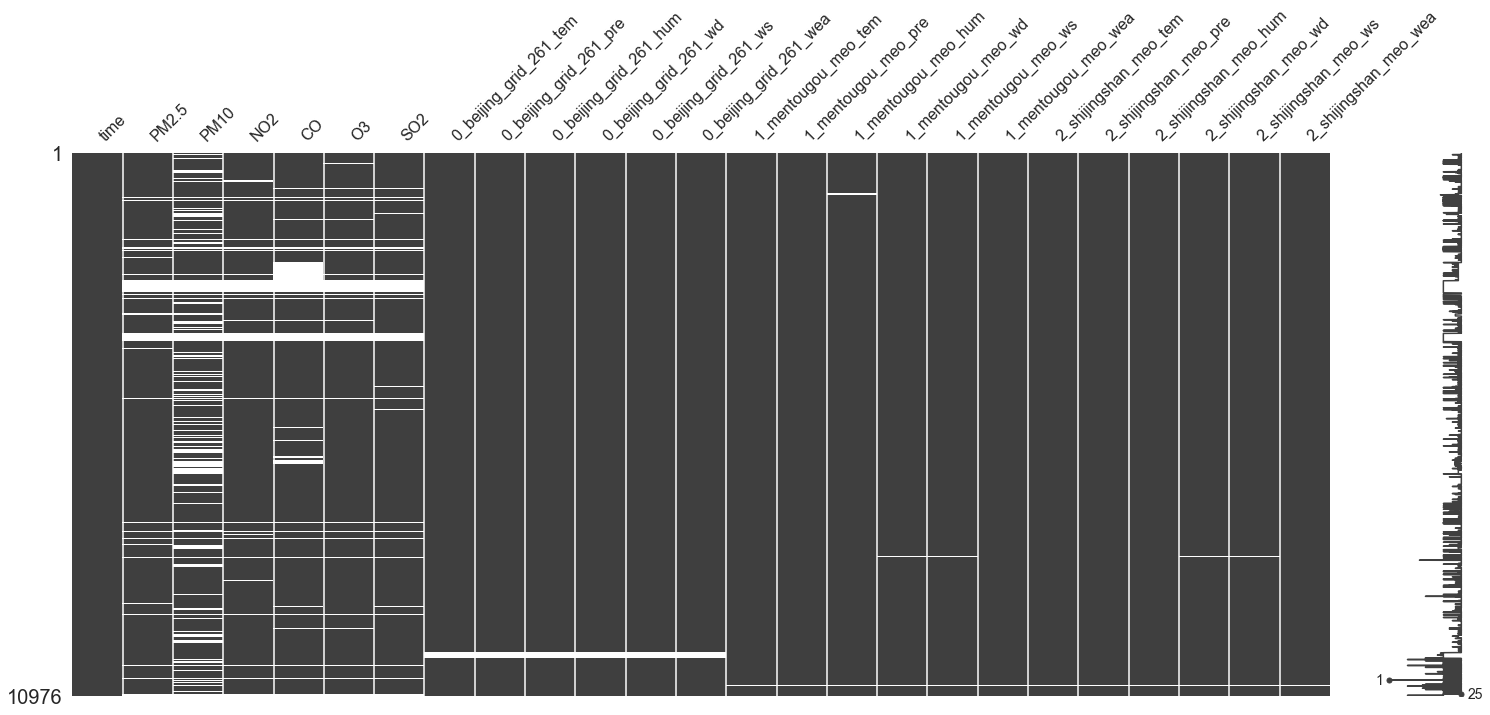

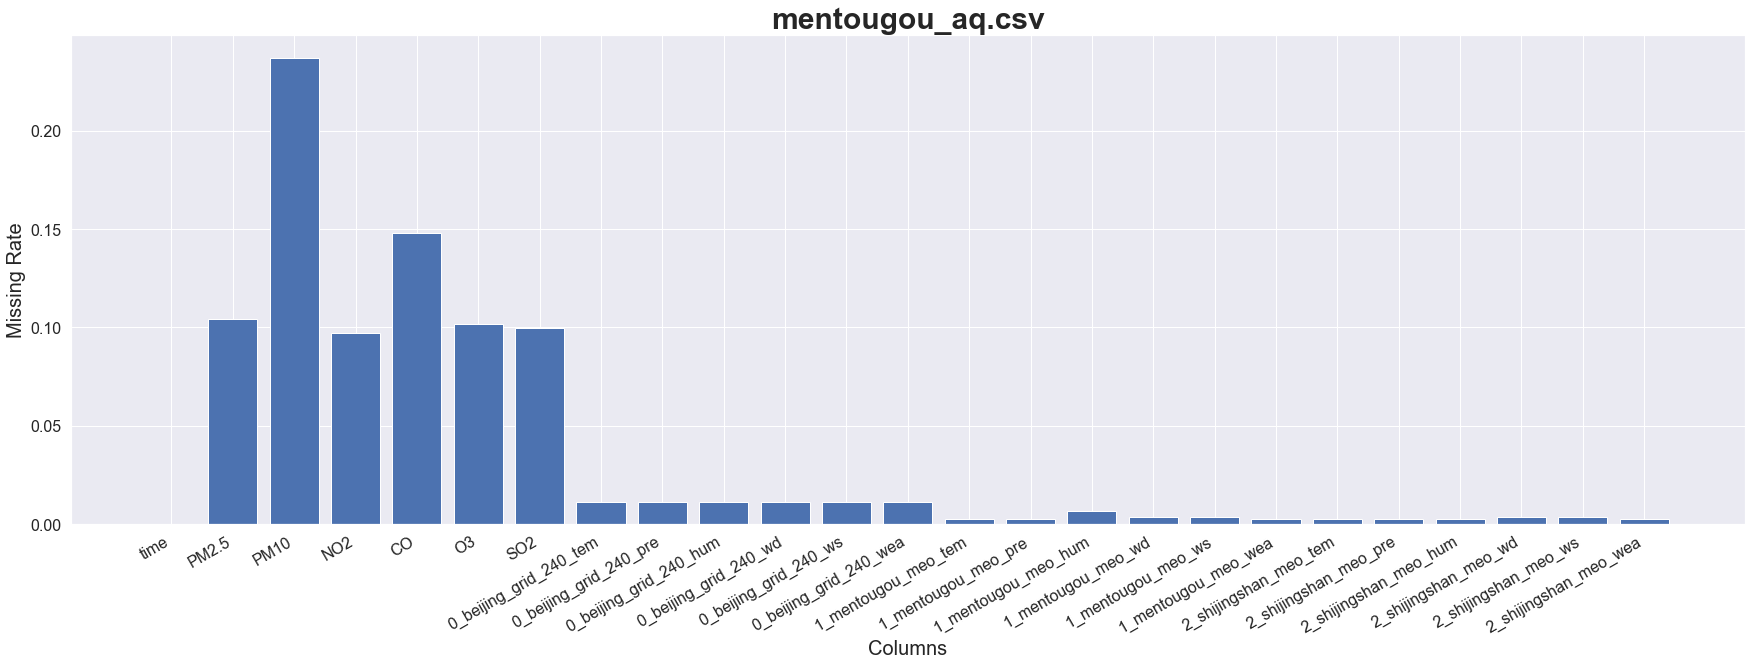

============== mentougou_aq.csv ================


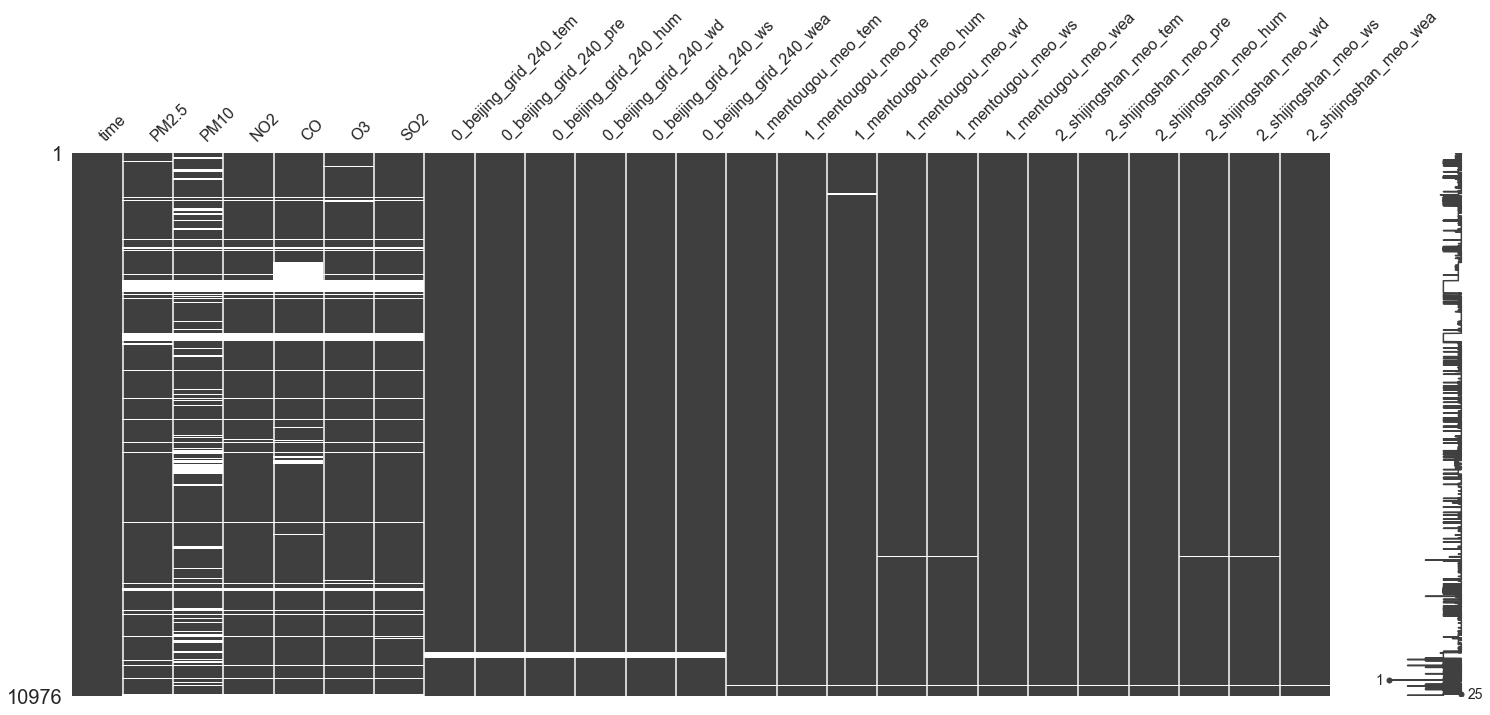

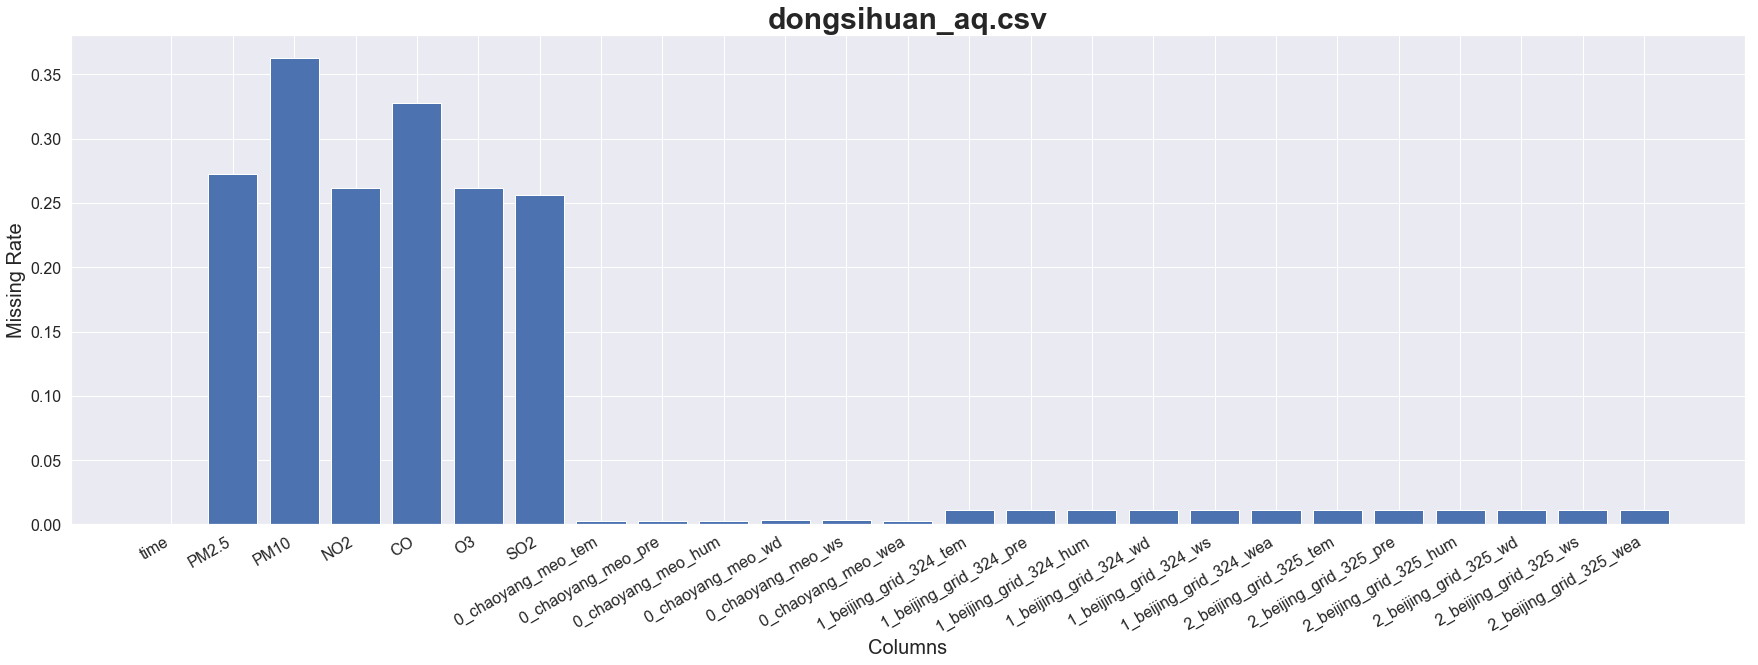

============== dongsihuan_aq.csv ================


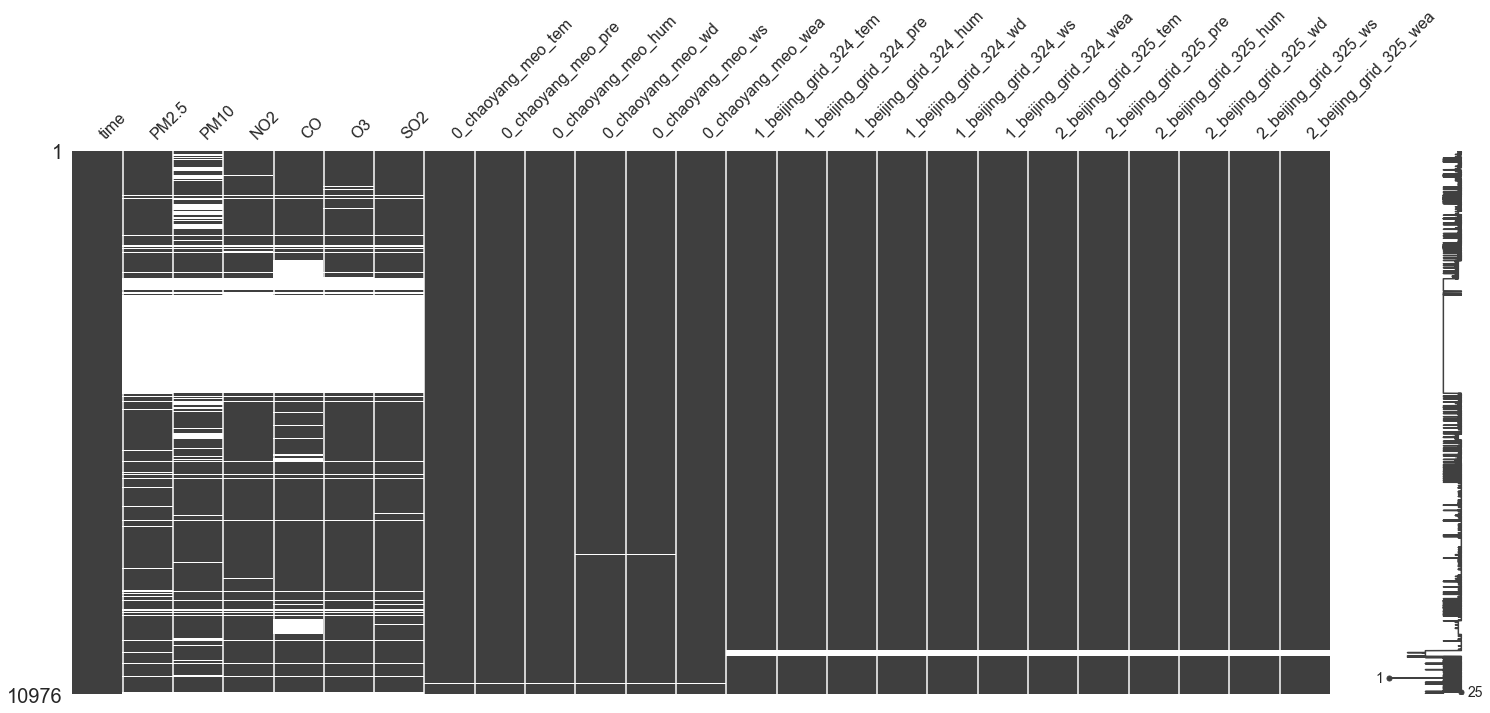

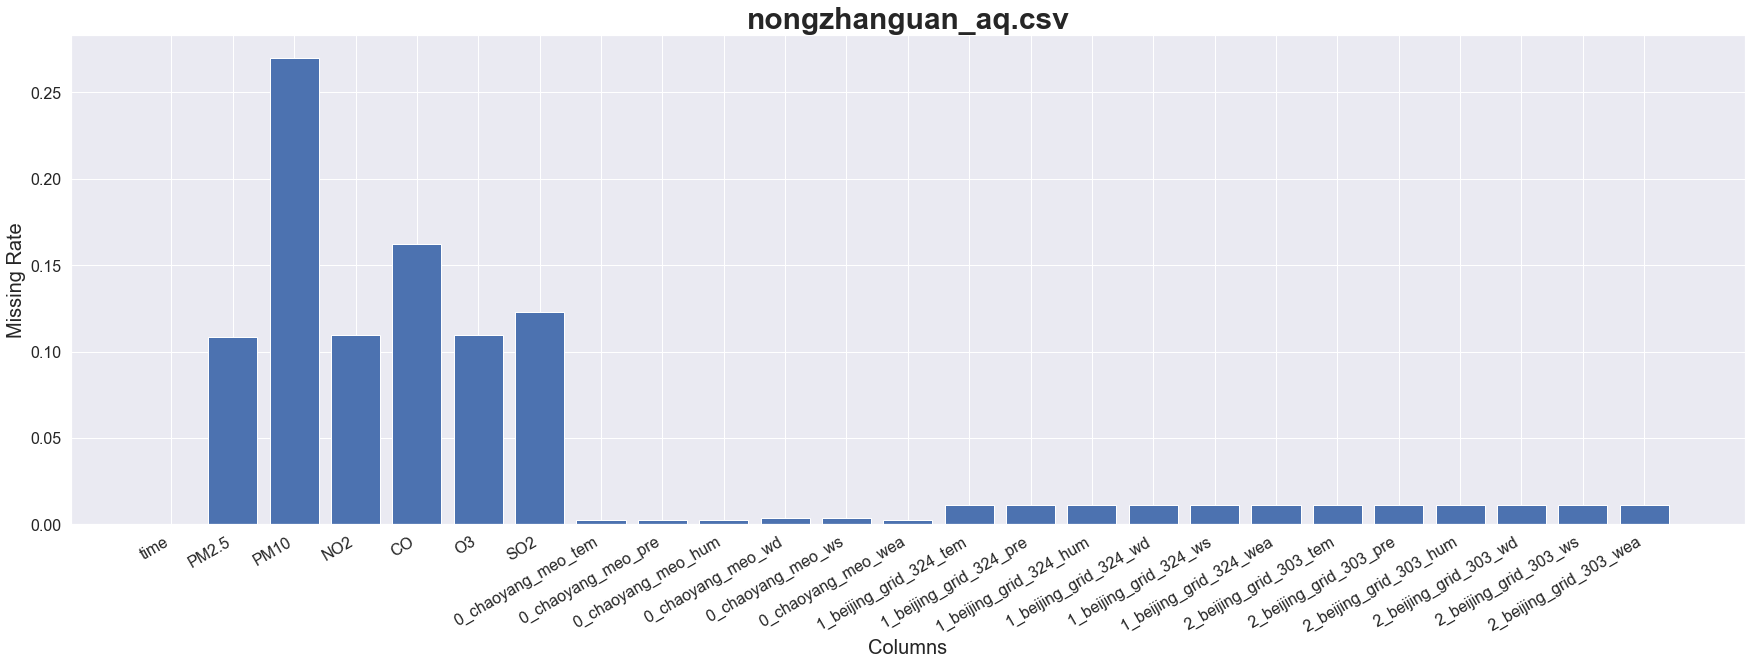

============== nongzhanguan_aq.csv ================


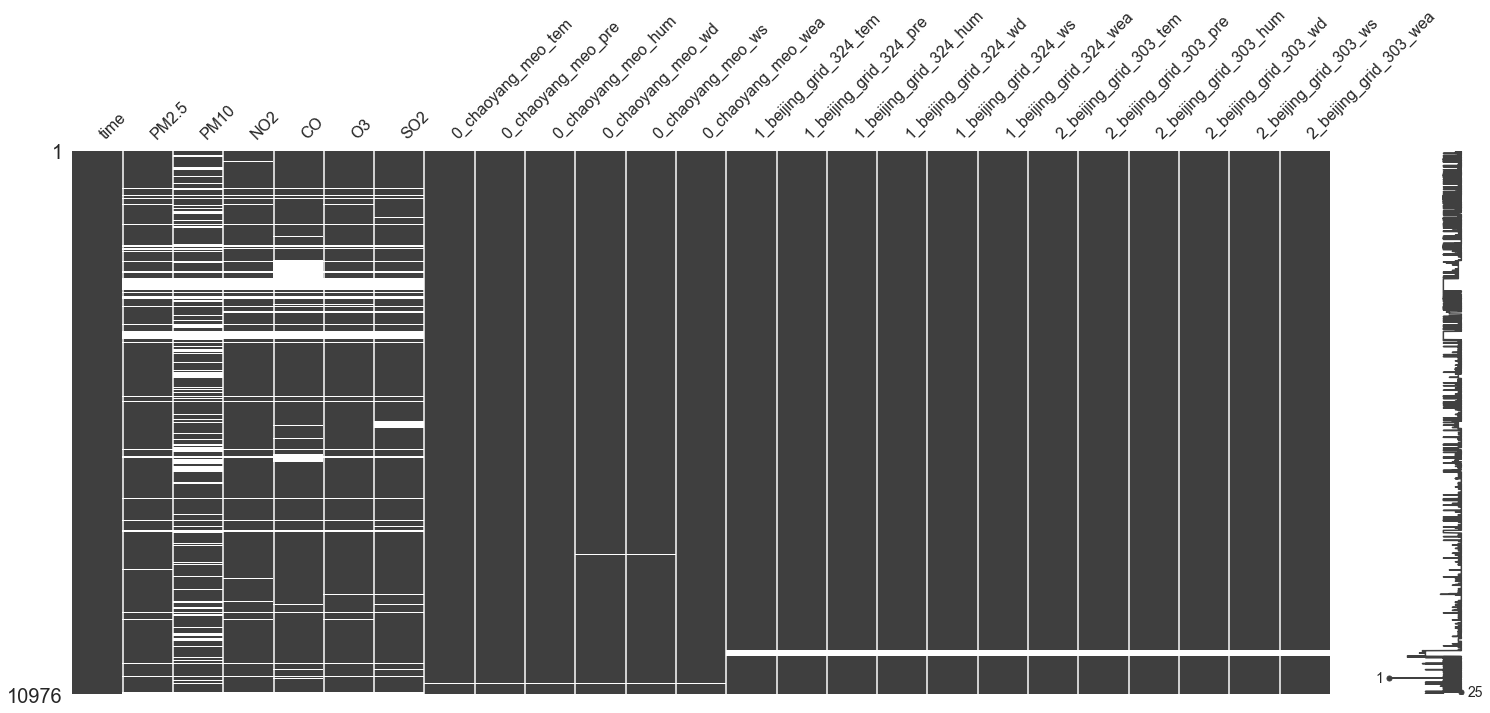

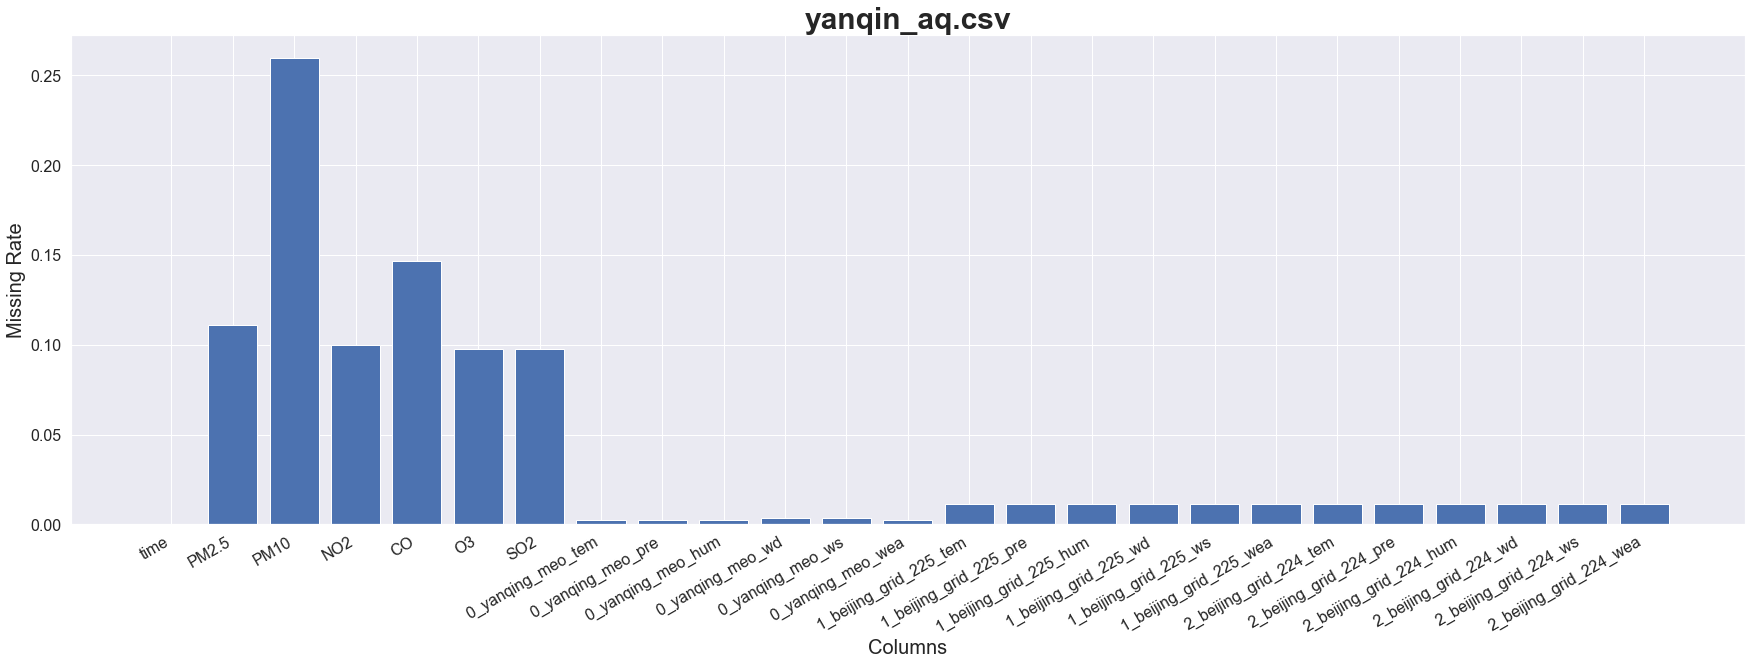

============== yanqin_aq.csv ================


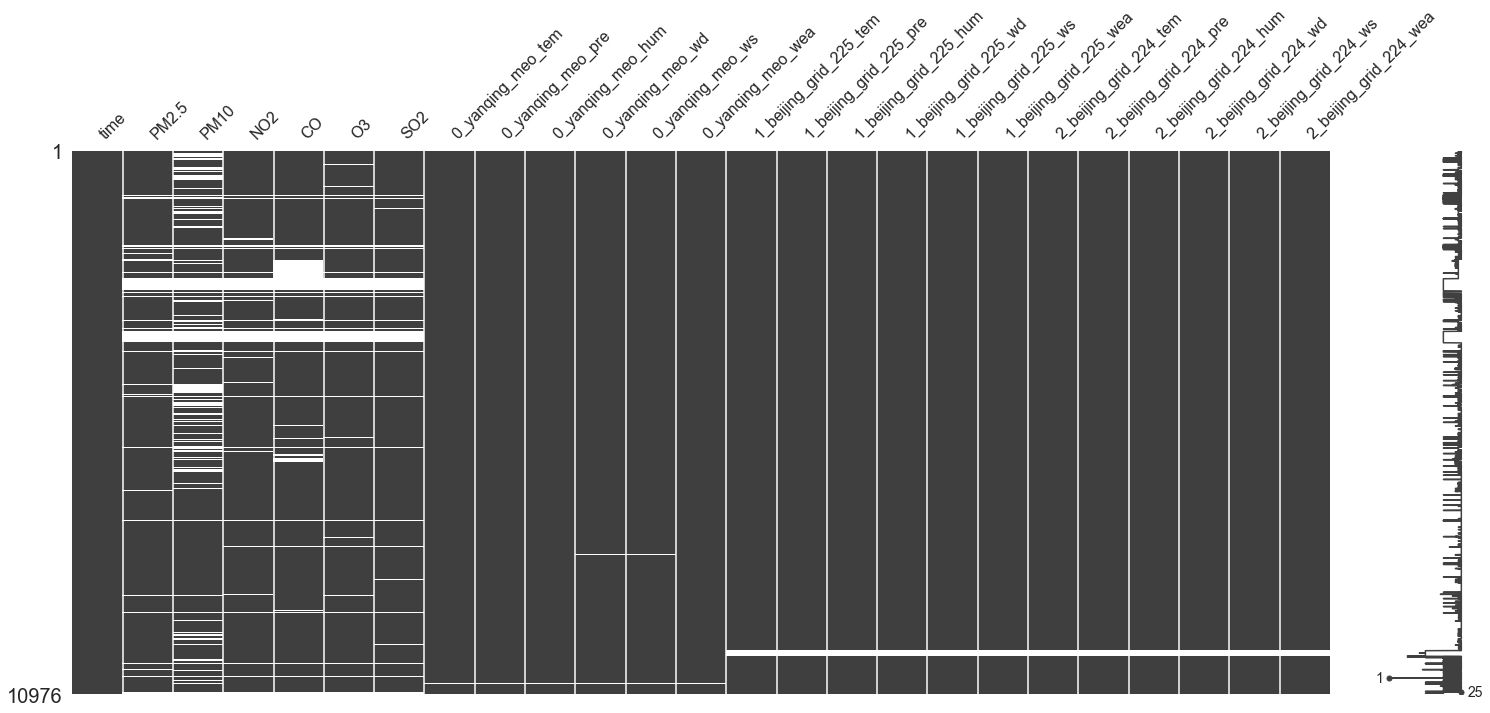

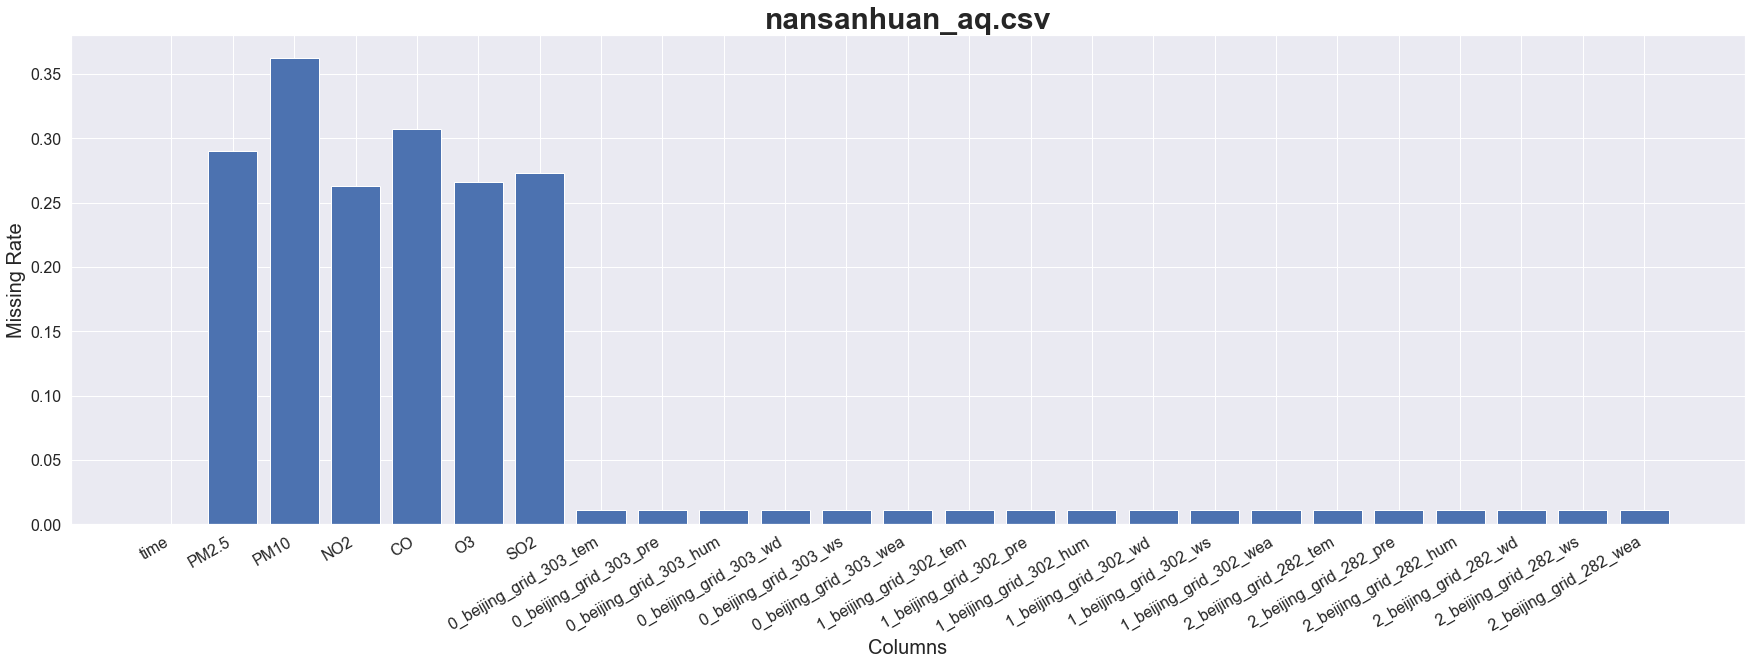

============== nansanhuan_aq.csv ================


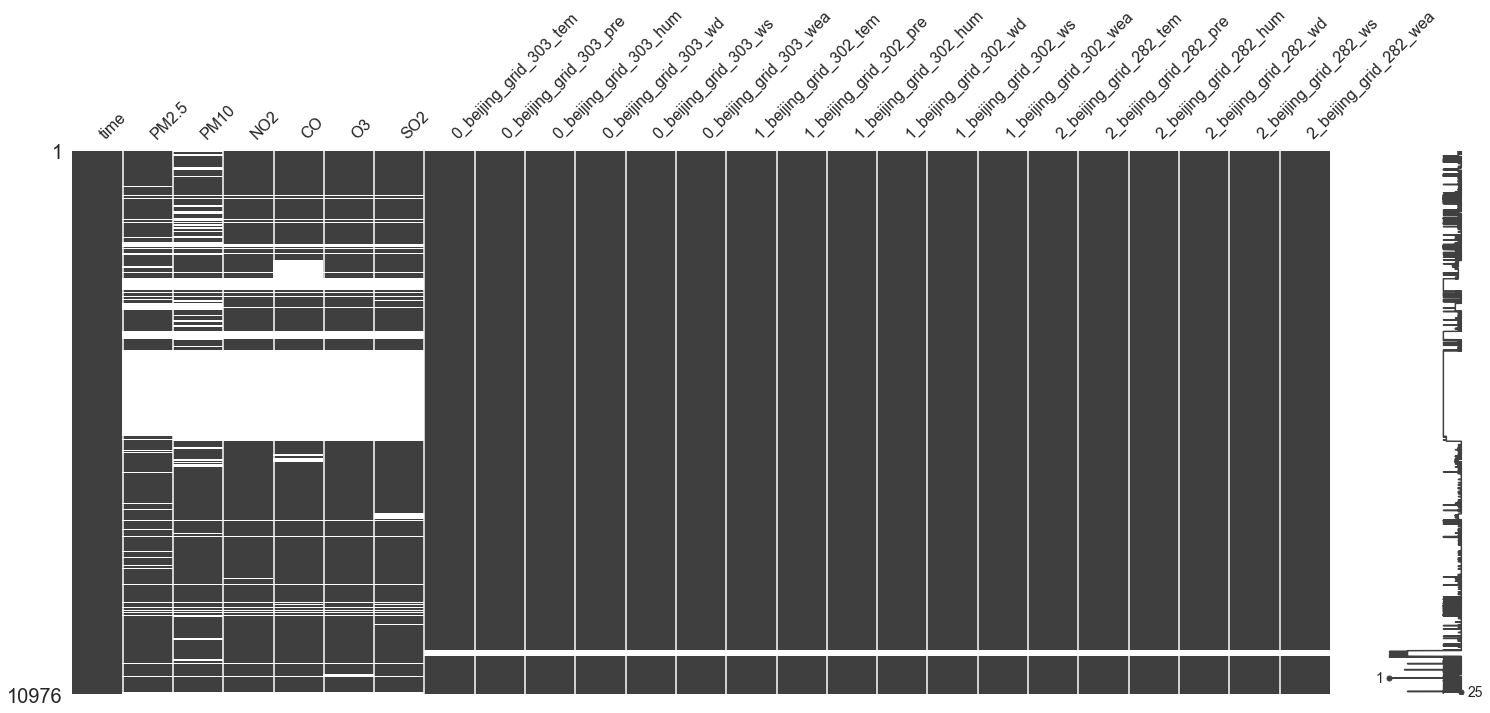

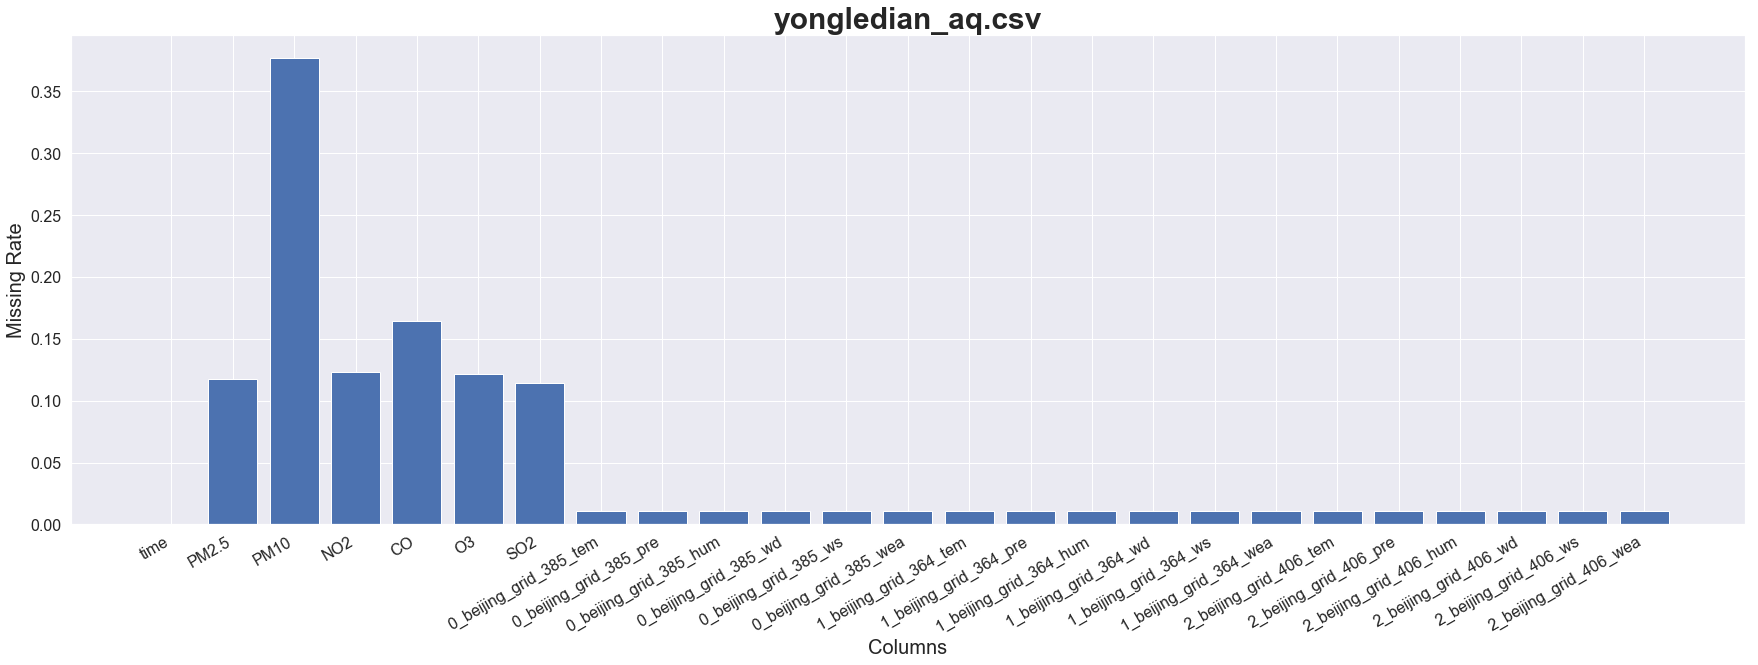

============== yongledian_aq.csv ================


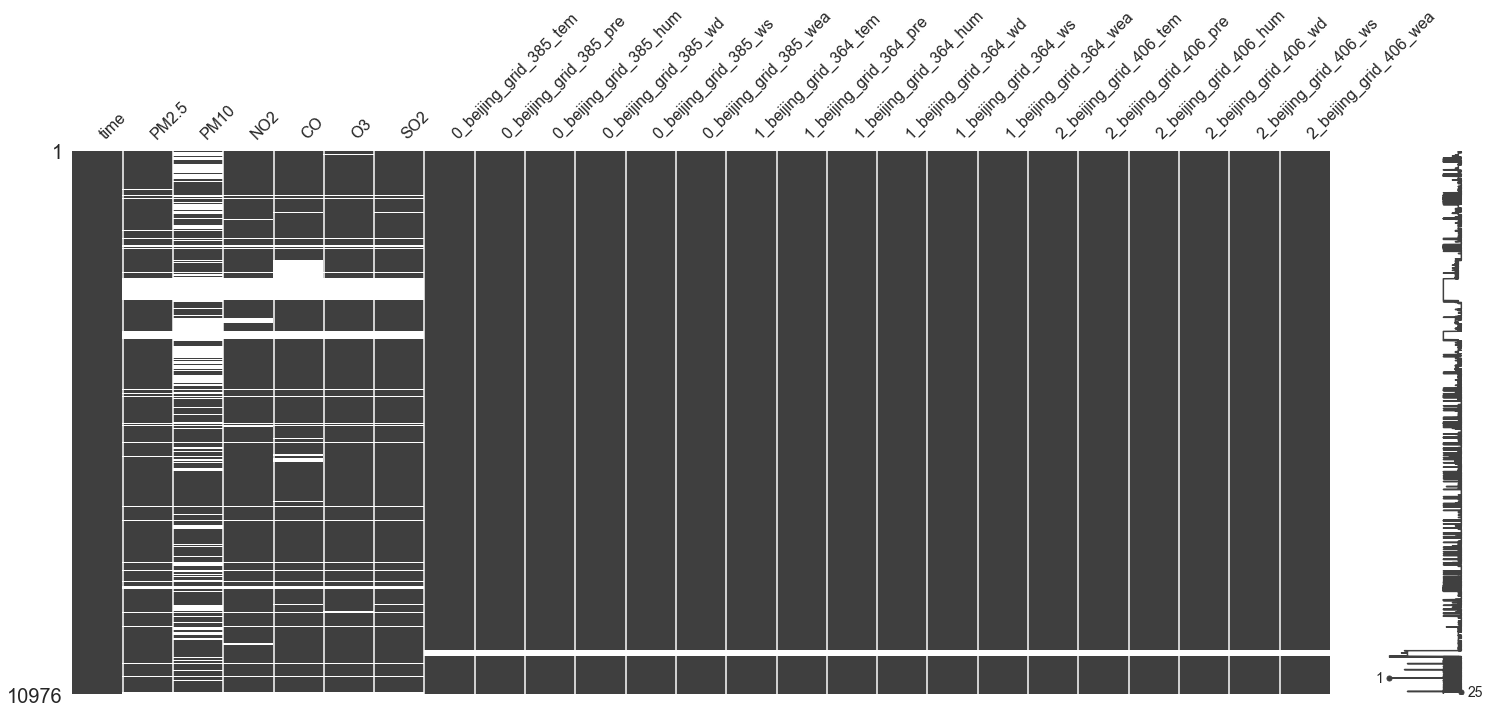

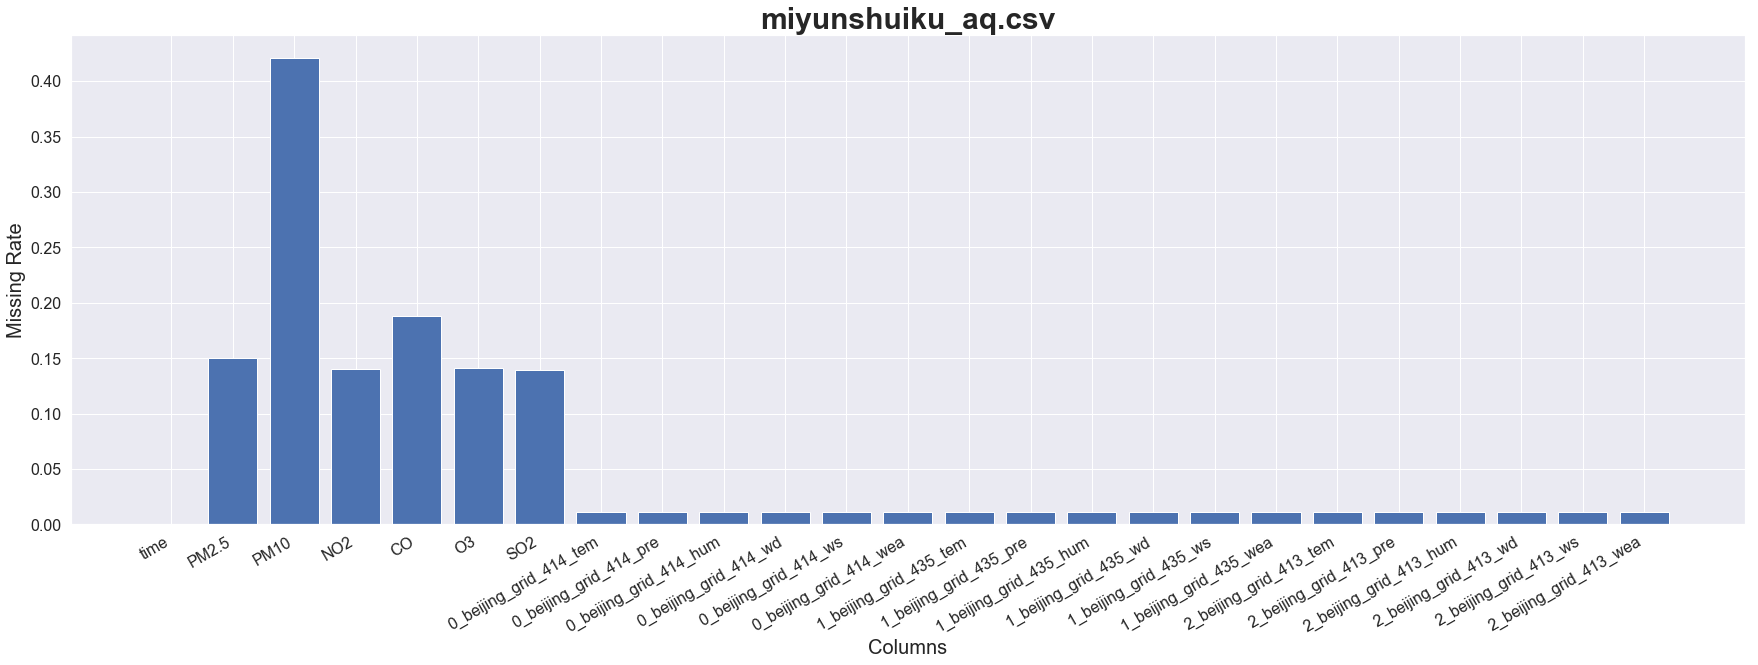

============== miyunshuiku_aq.csv ================


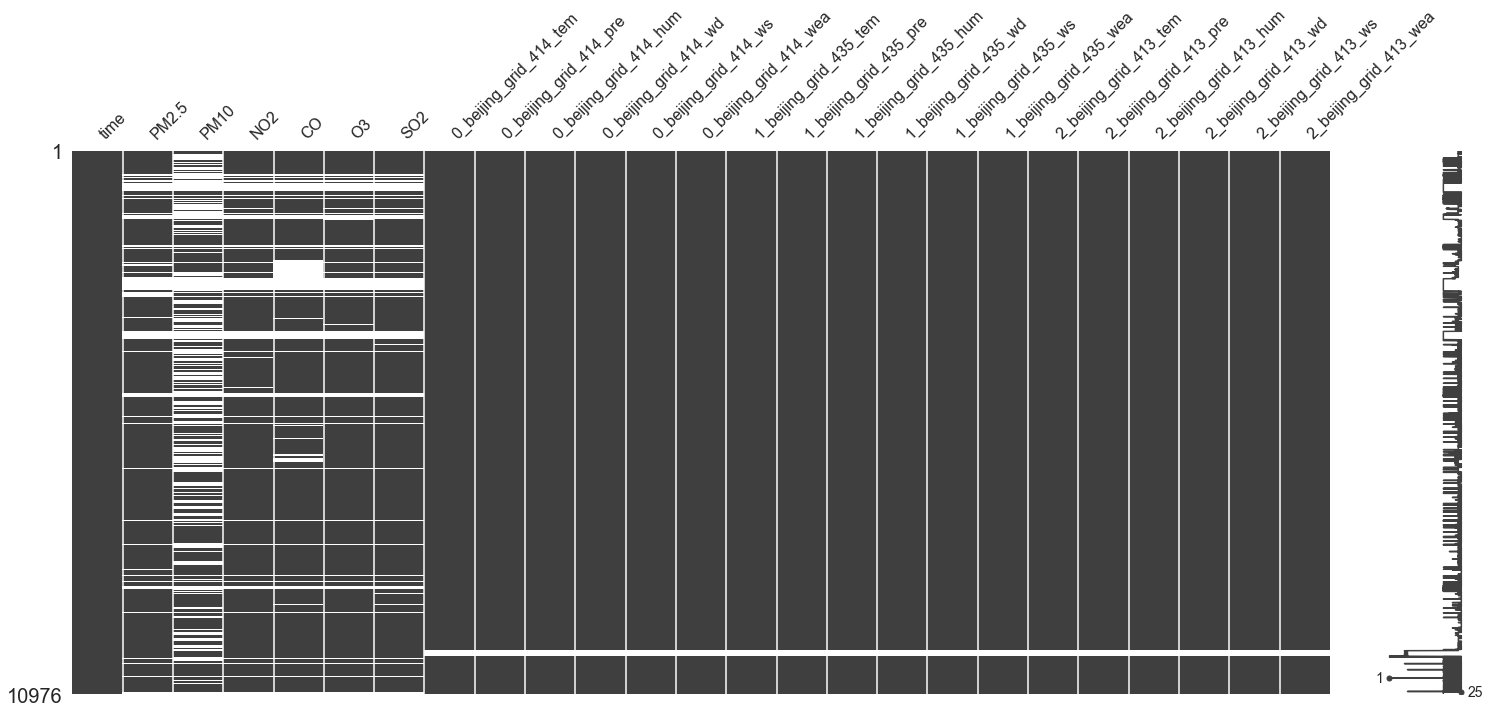

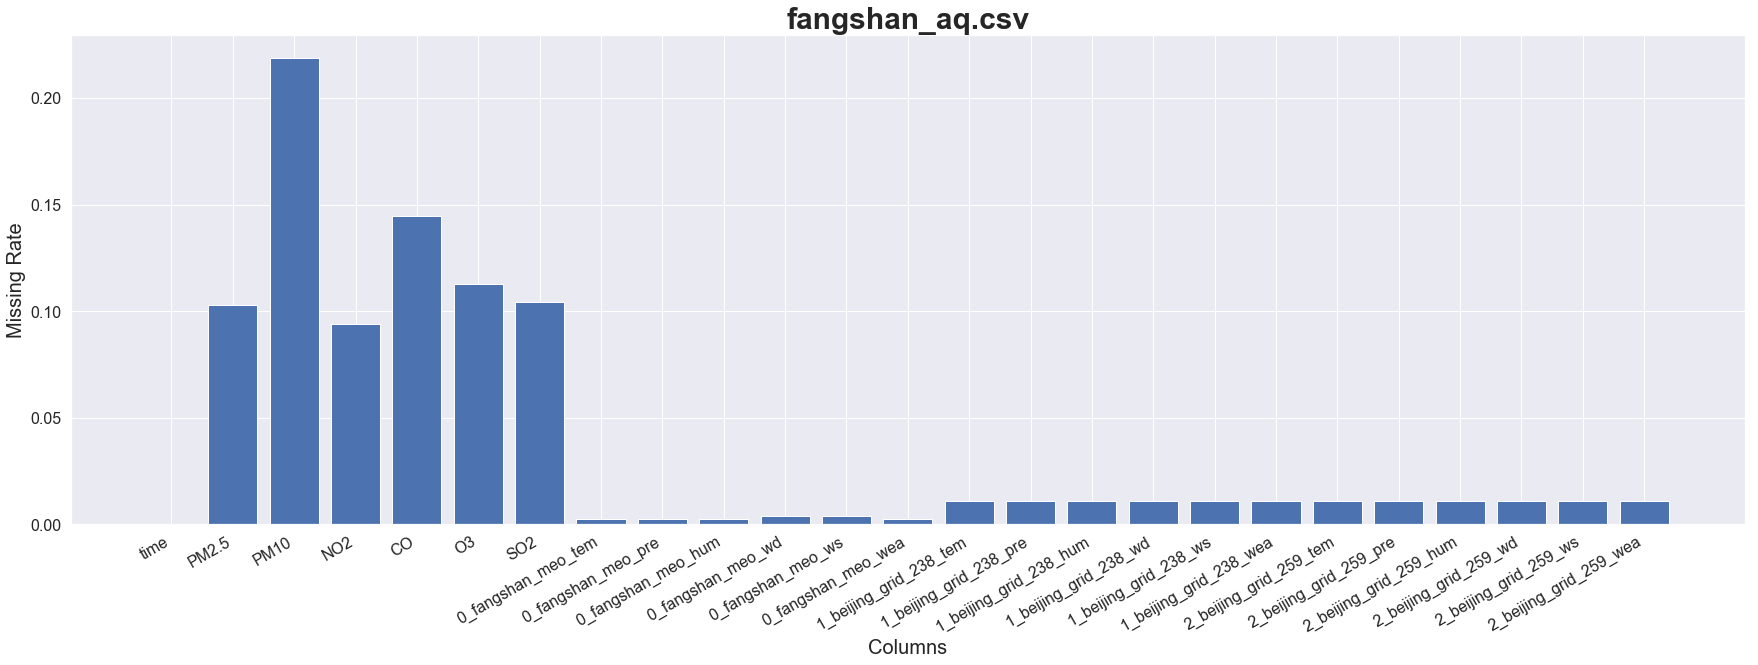

============== fangshan_aq.csv ================


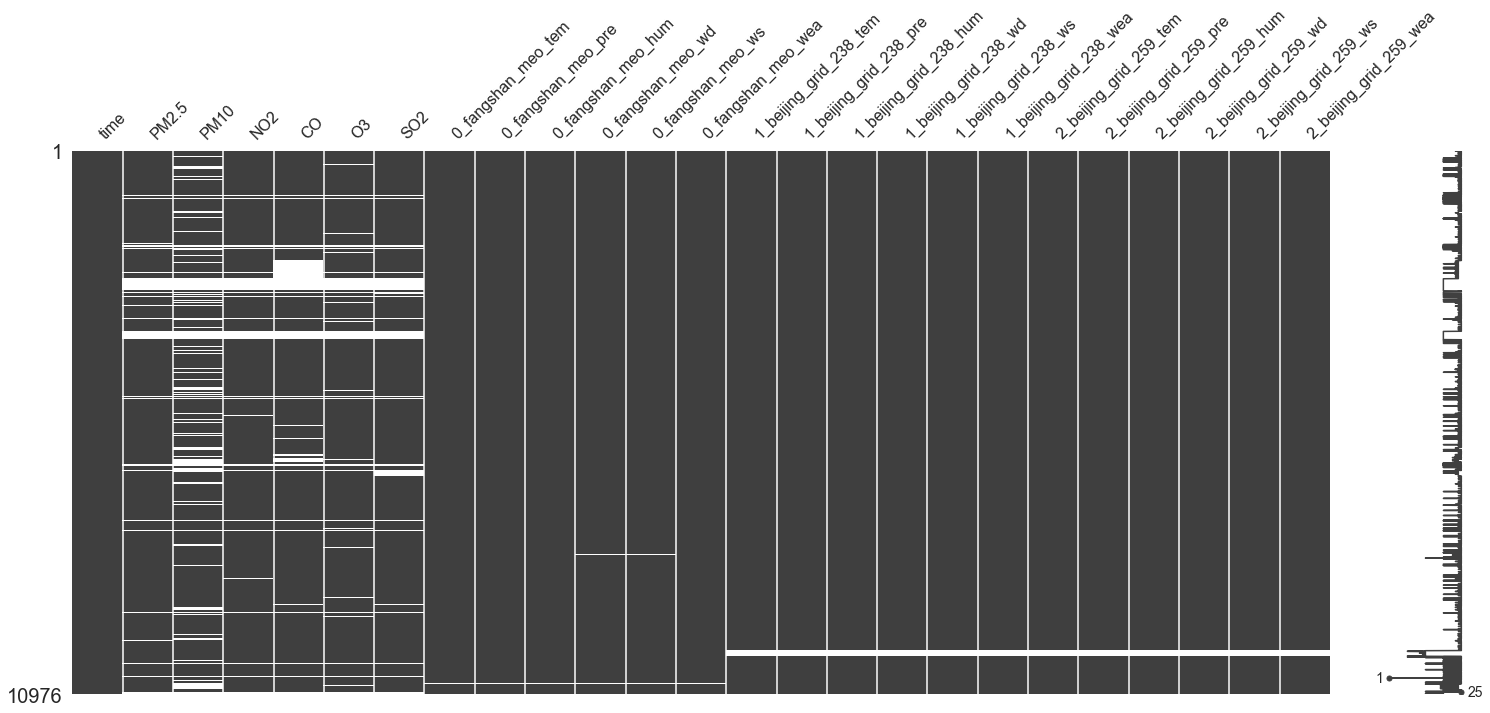

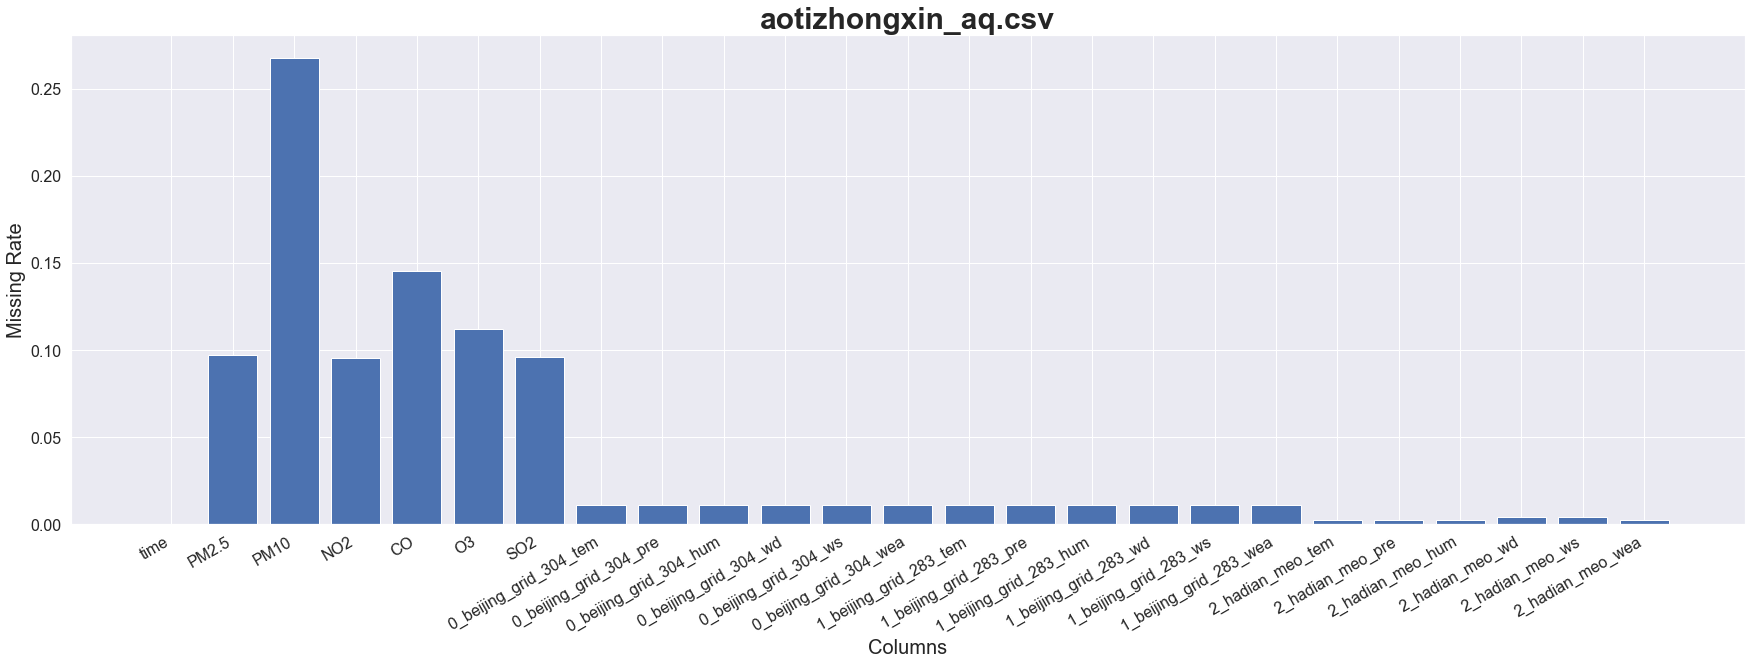

============== aotizhongxin_aq.csv ================


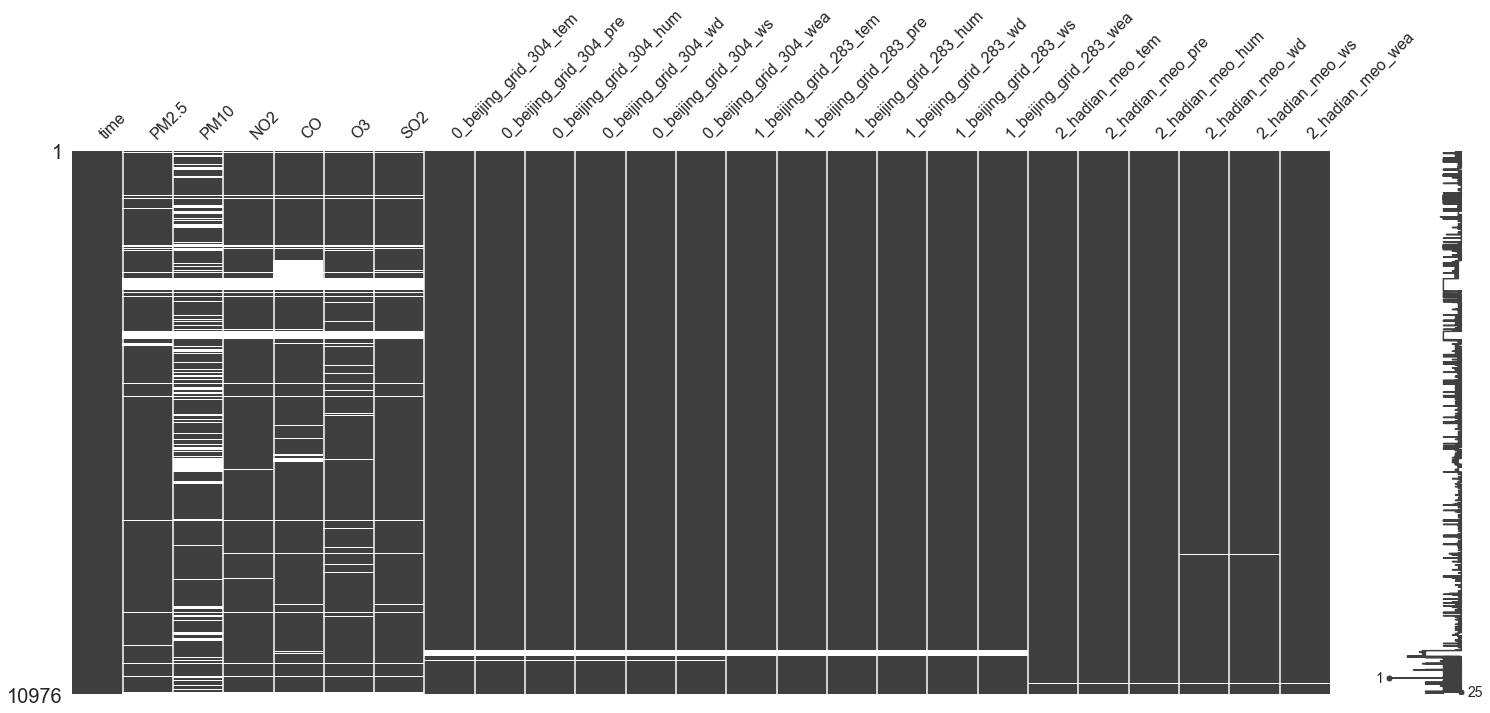

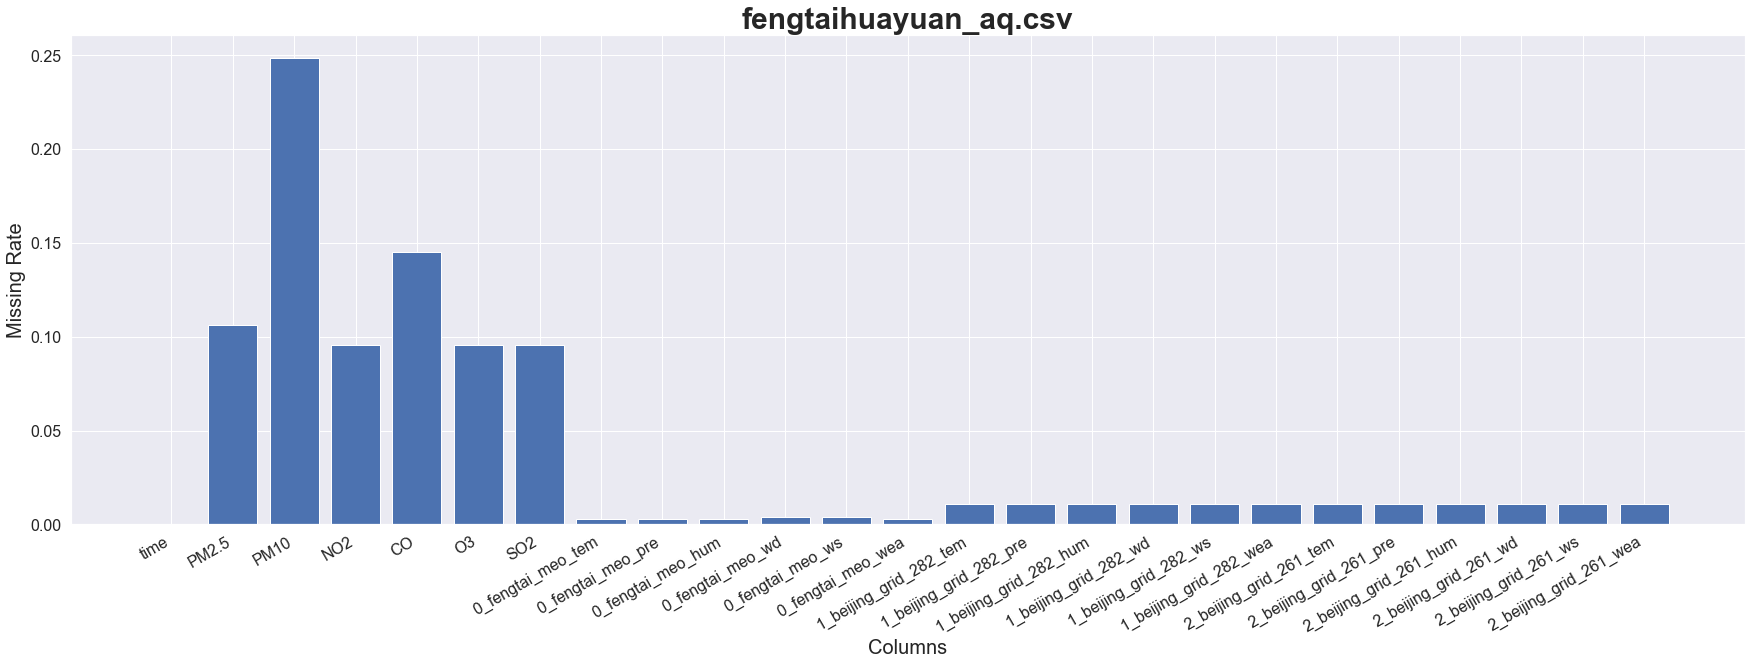

============== fengtaihuayuan_aq.csv ================


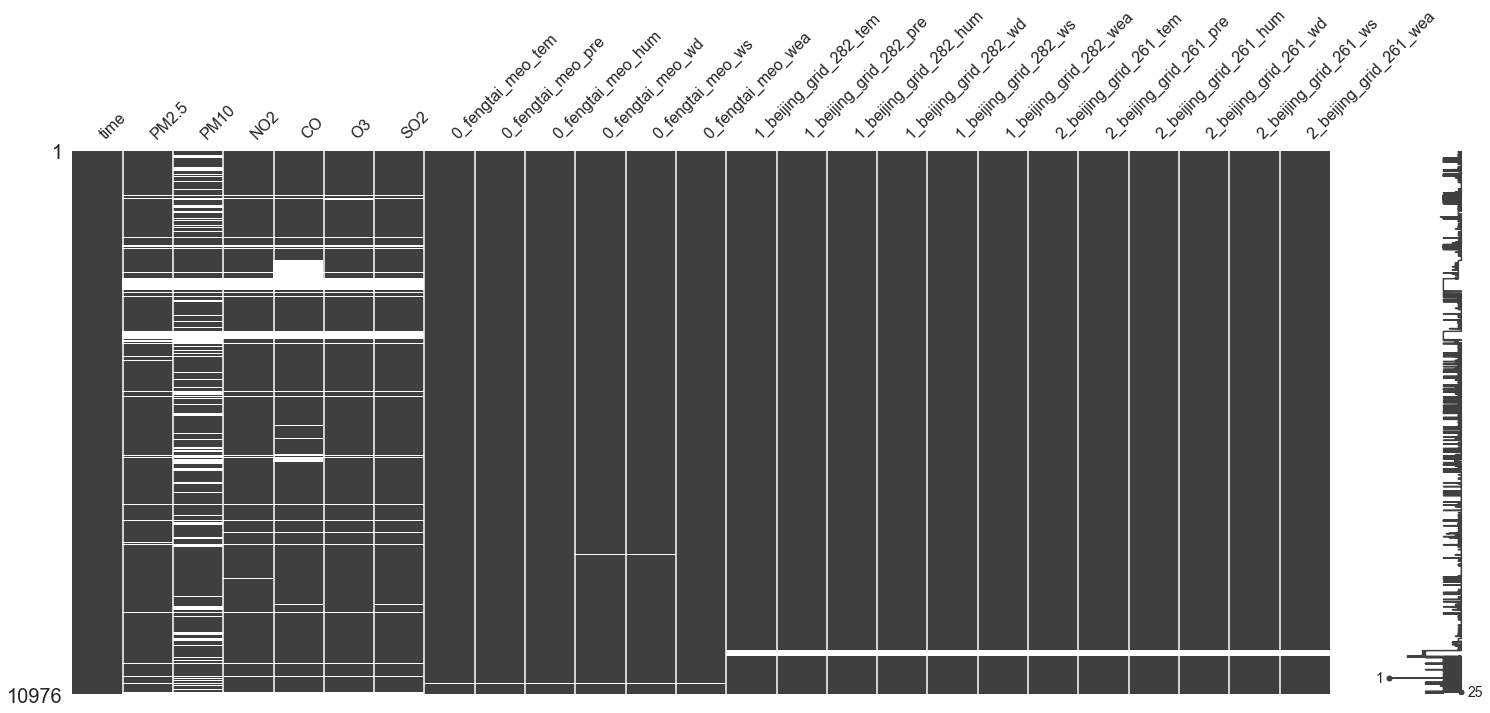

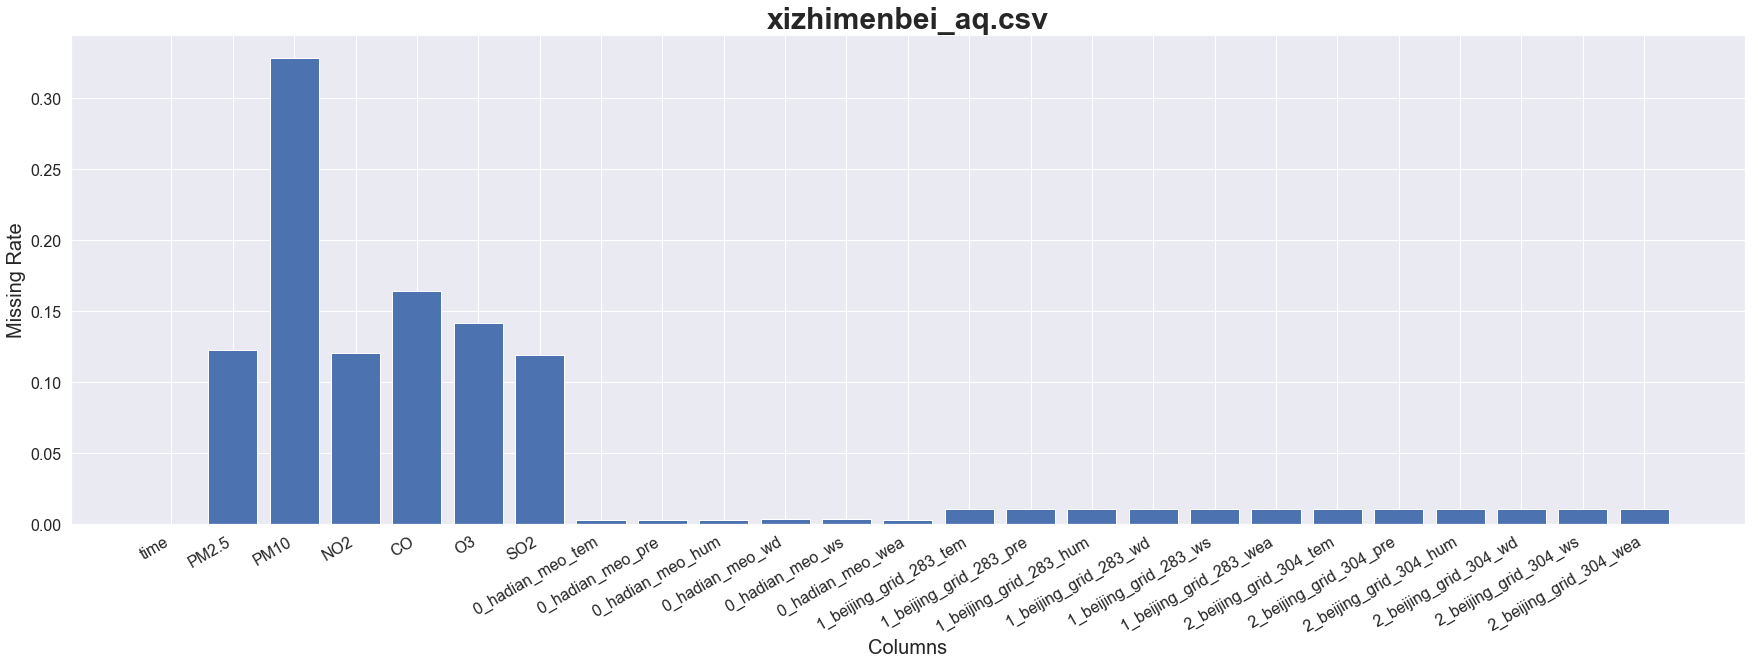

============== xizhimenbei_aq.csv ================


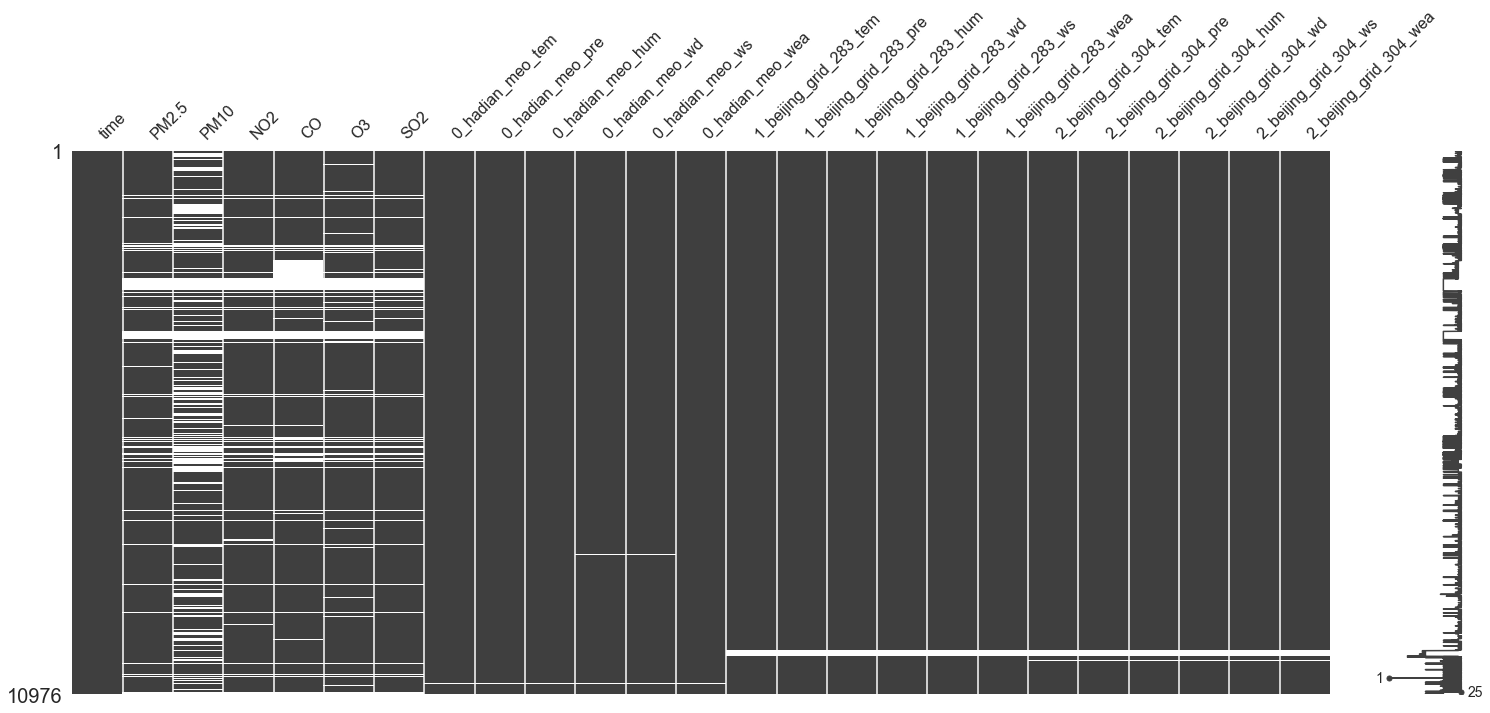

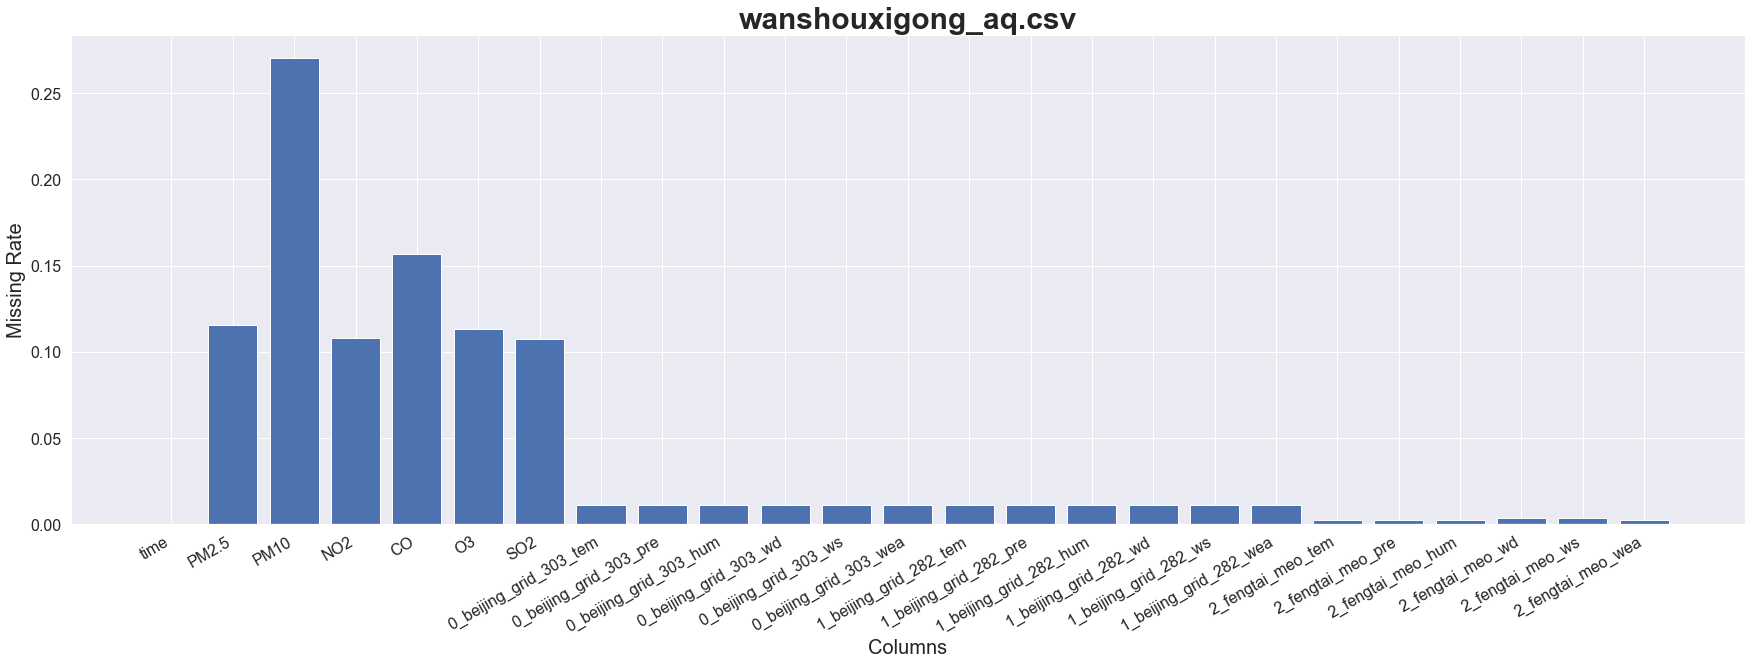

============== wanshouxigong_aq.csv ================


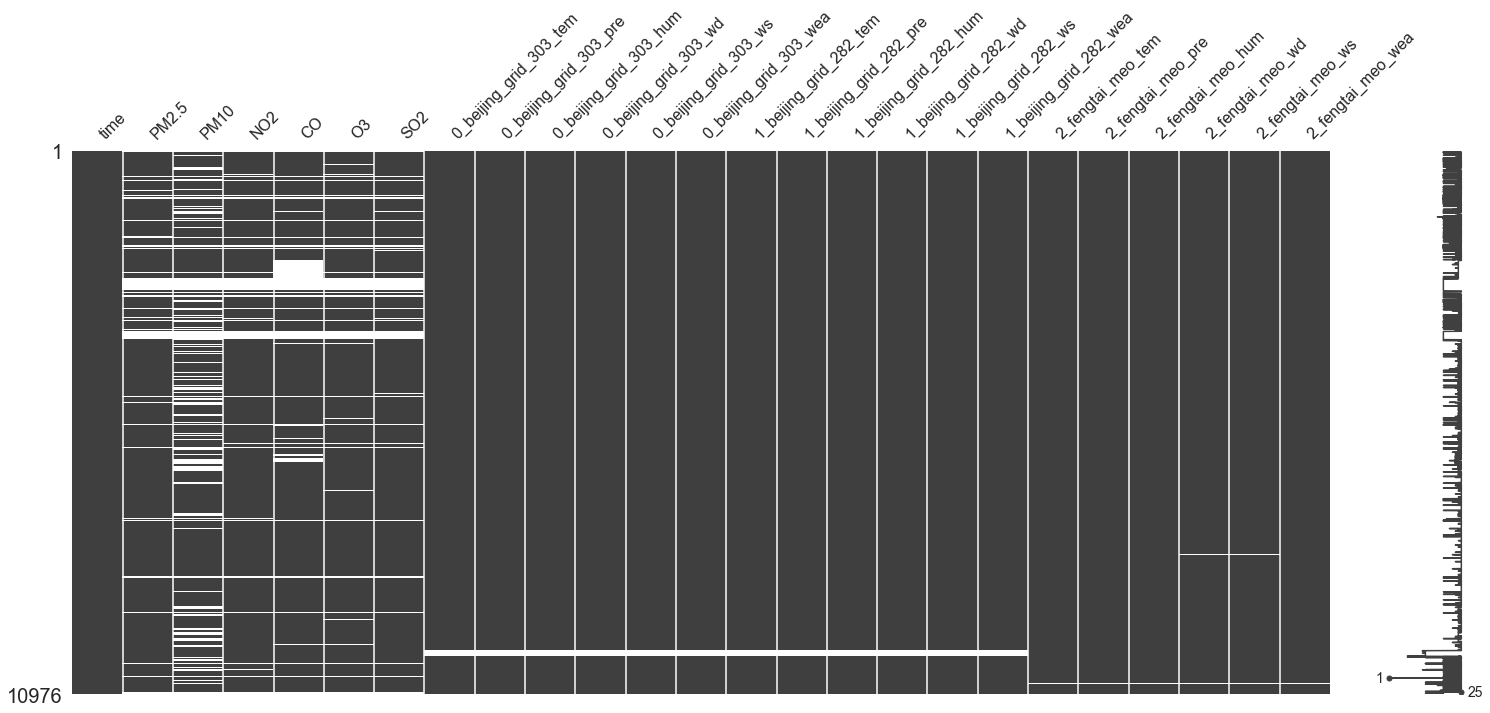

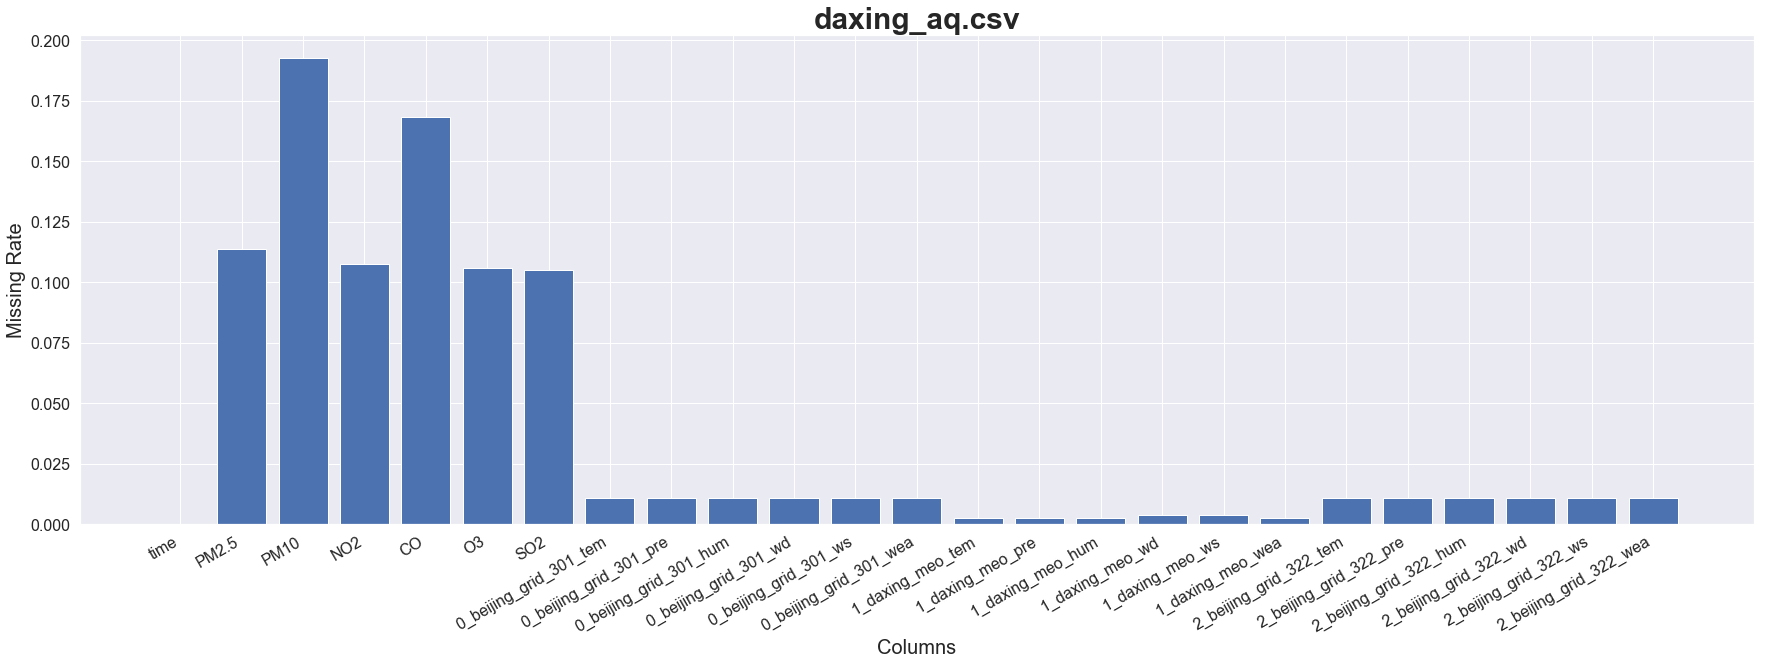

============== daxing_aq.csv ================


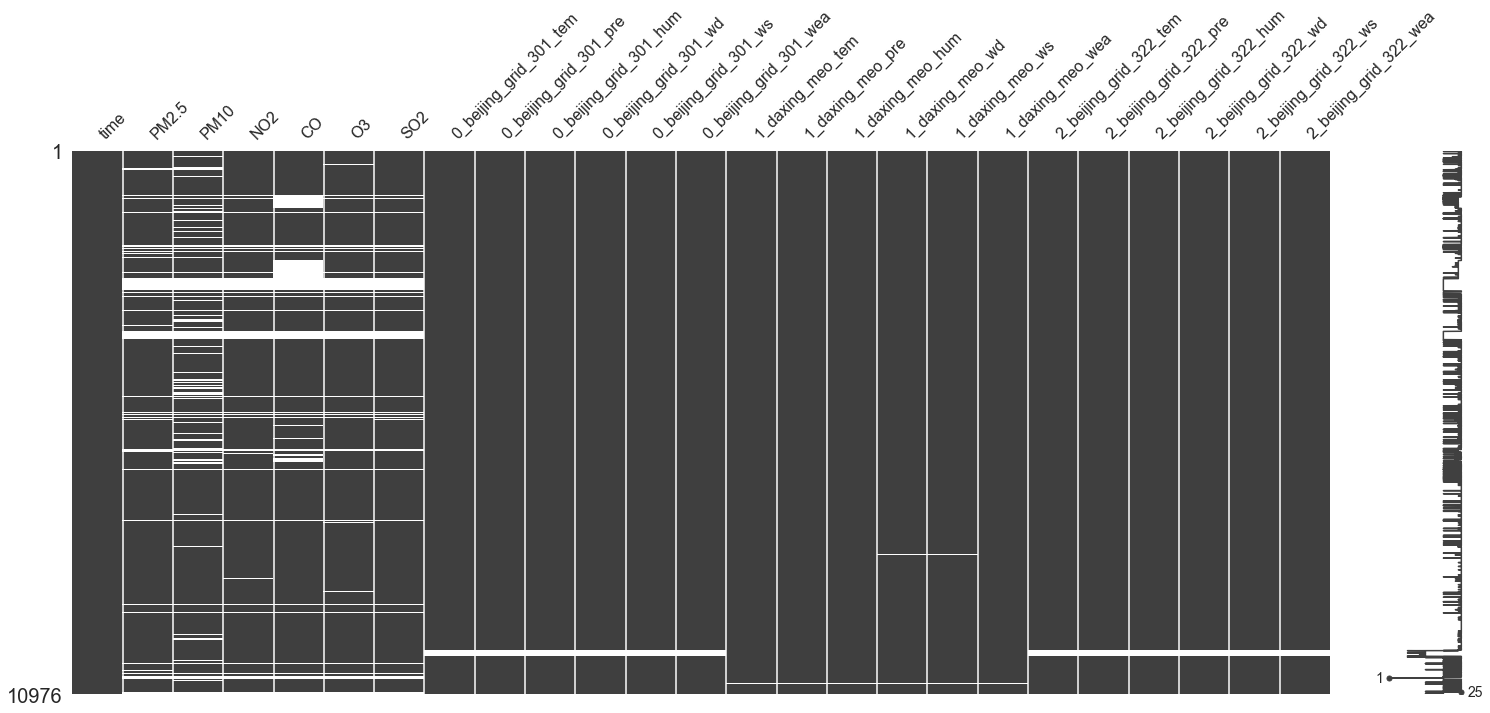

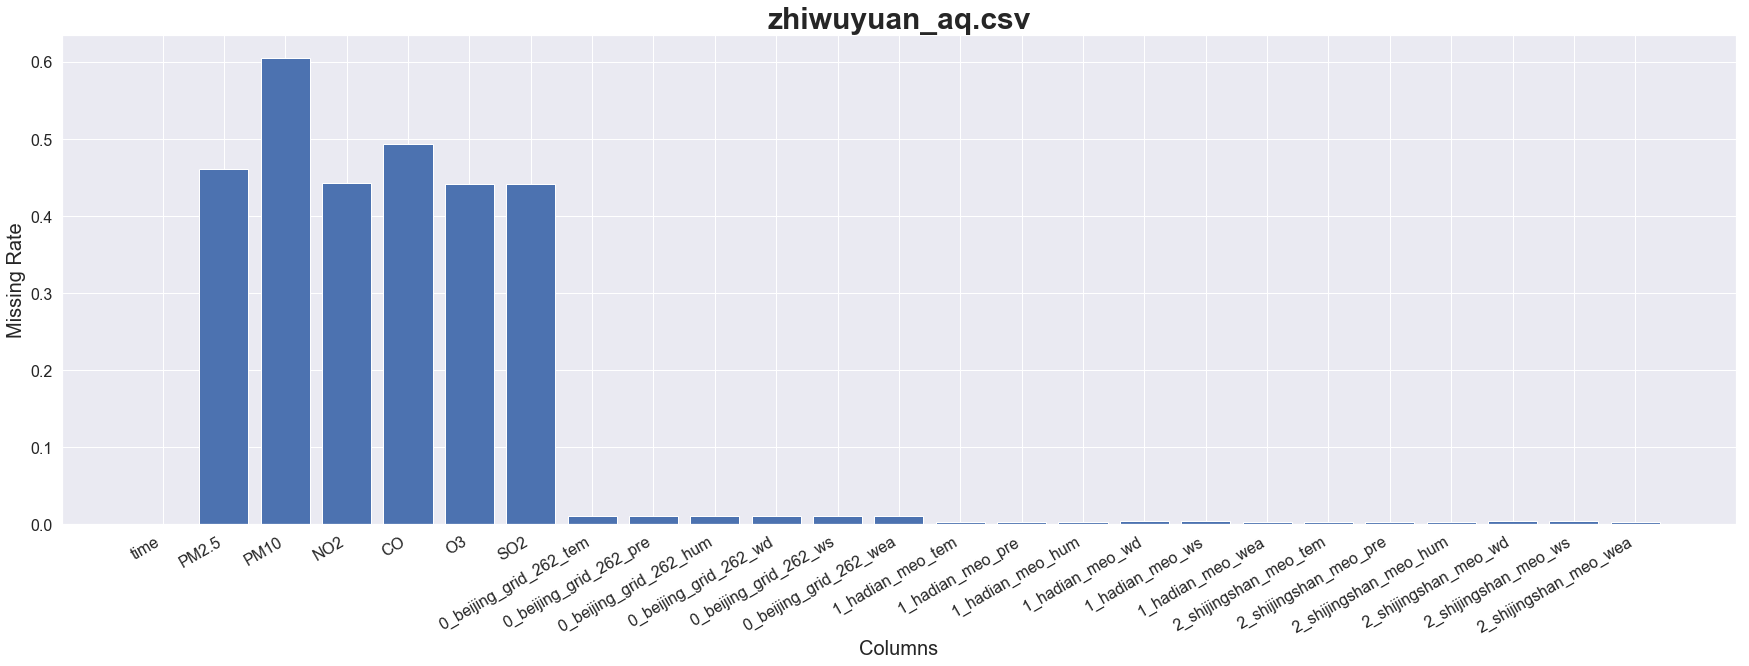

============== zhiwuyuan_aq.csv ================


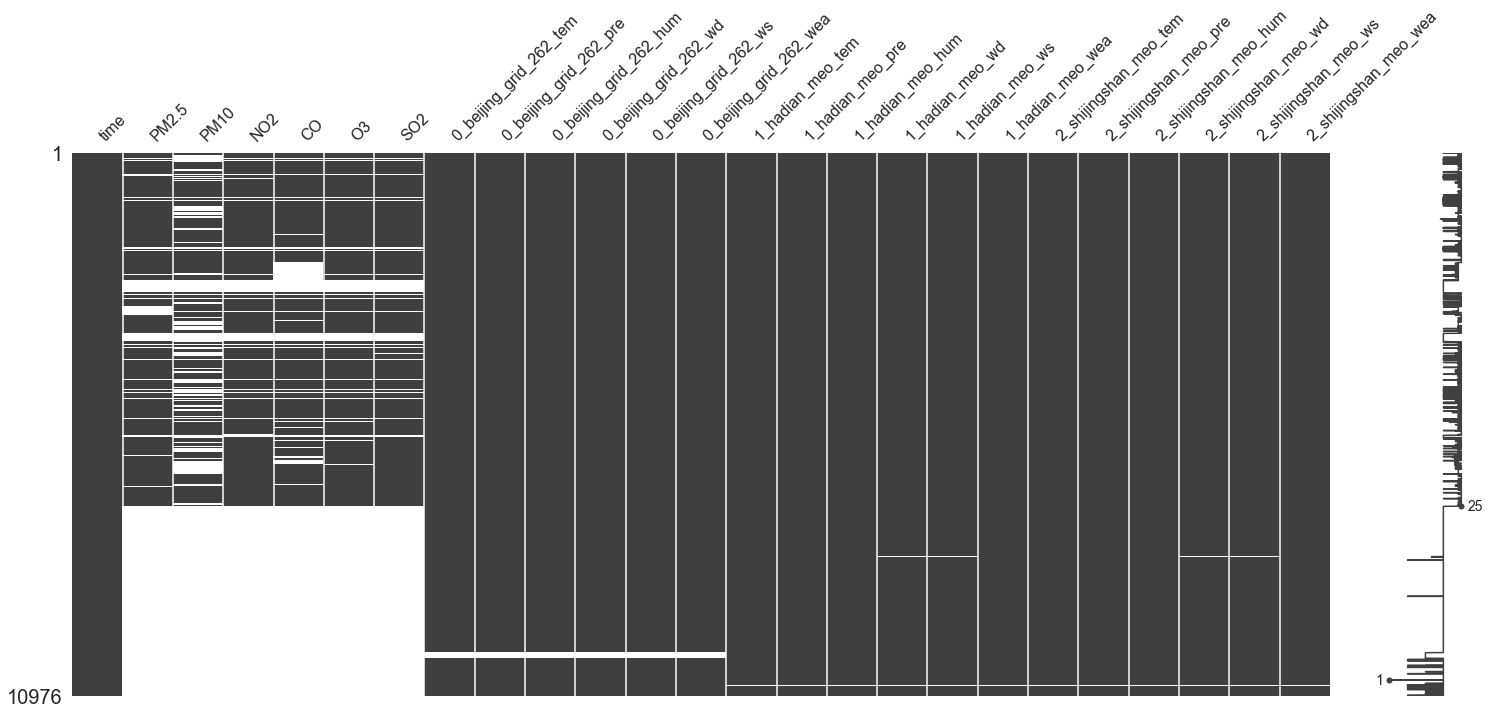

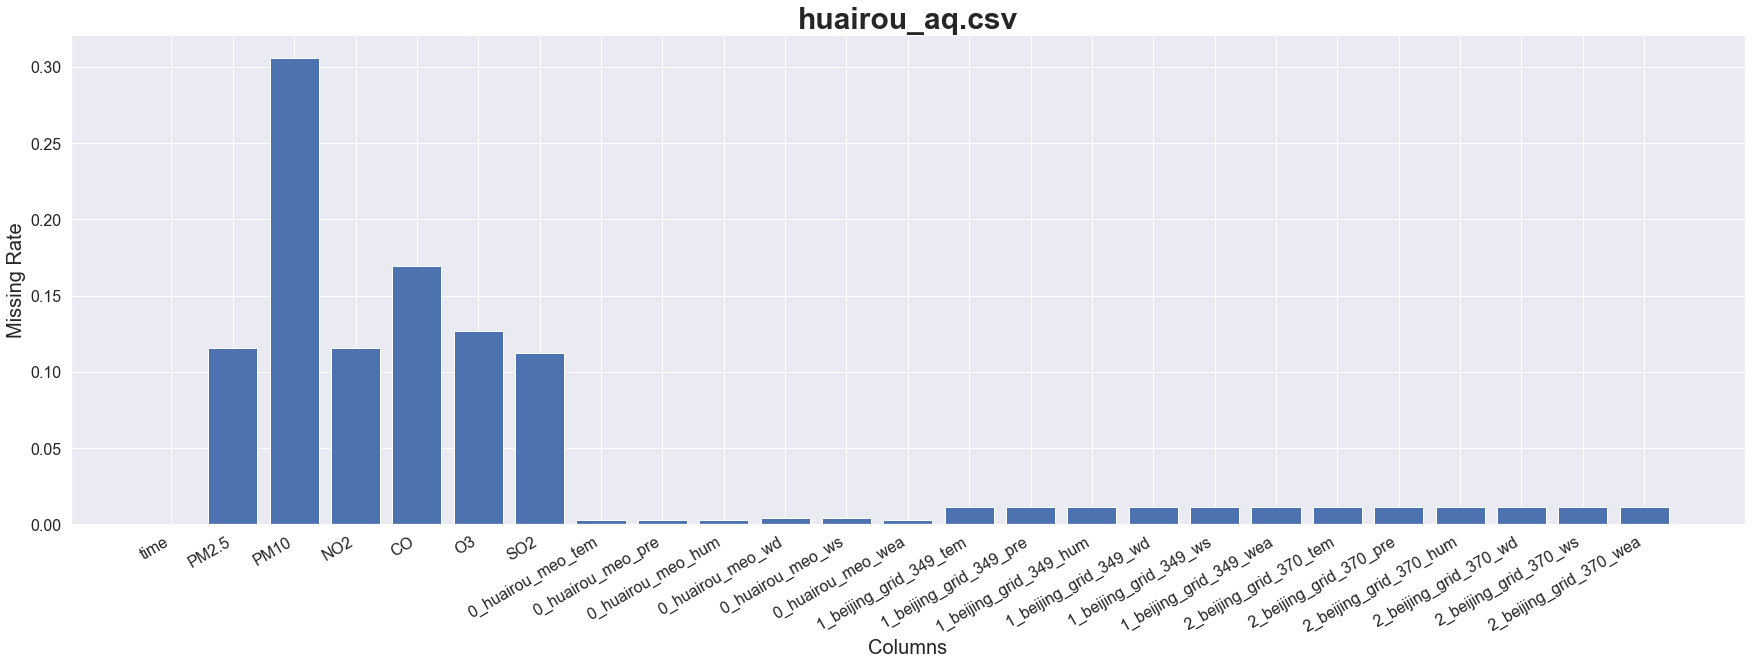

============== huairou_aq.csv ================


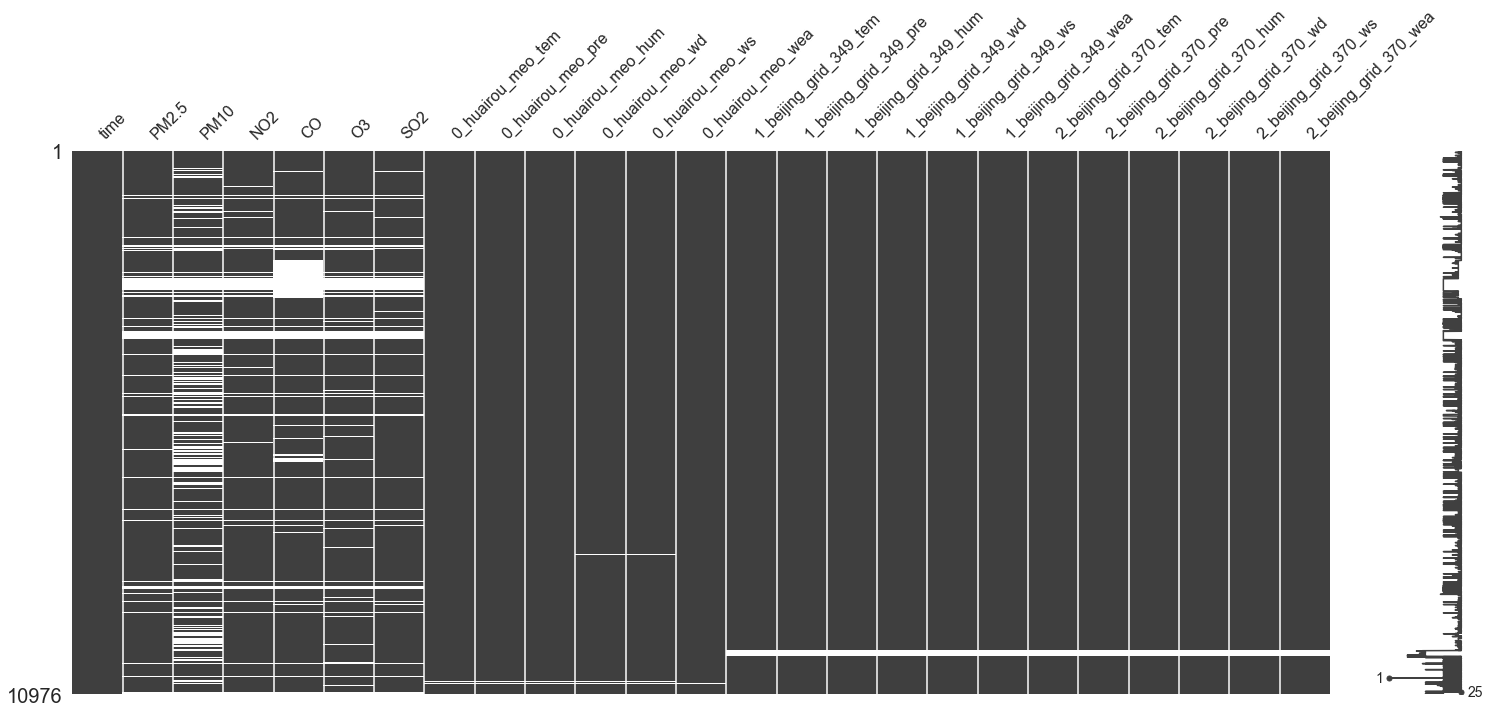

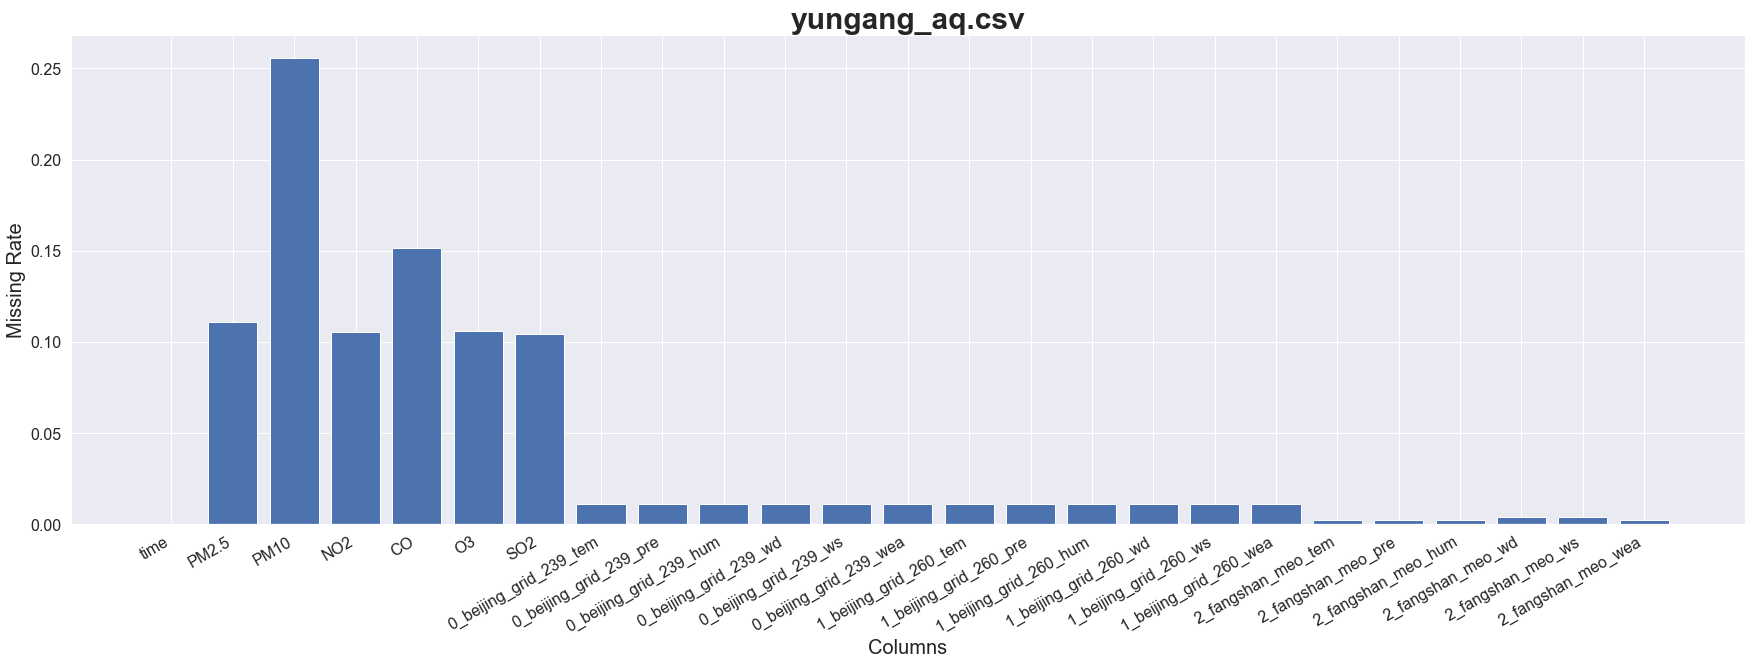

============== yungang_aq.csv ================


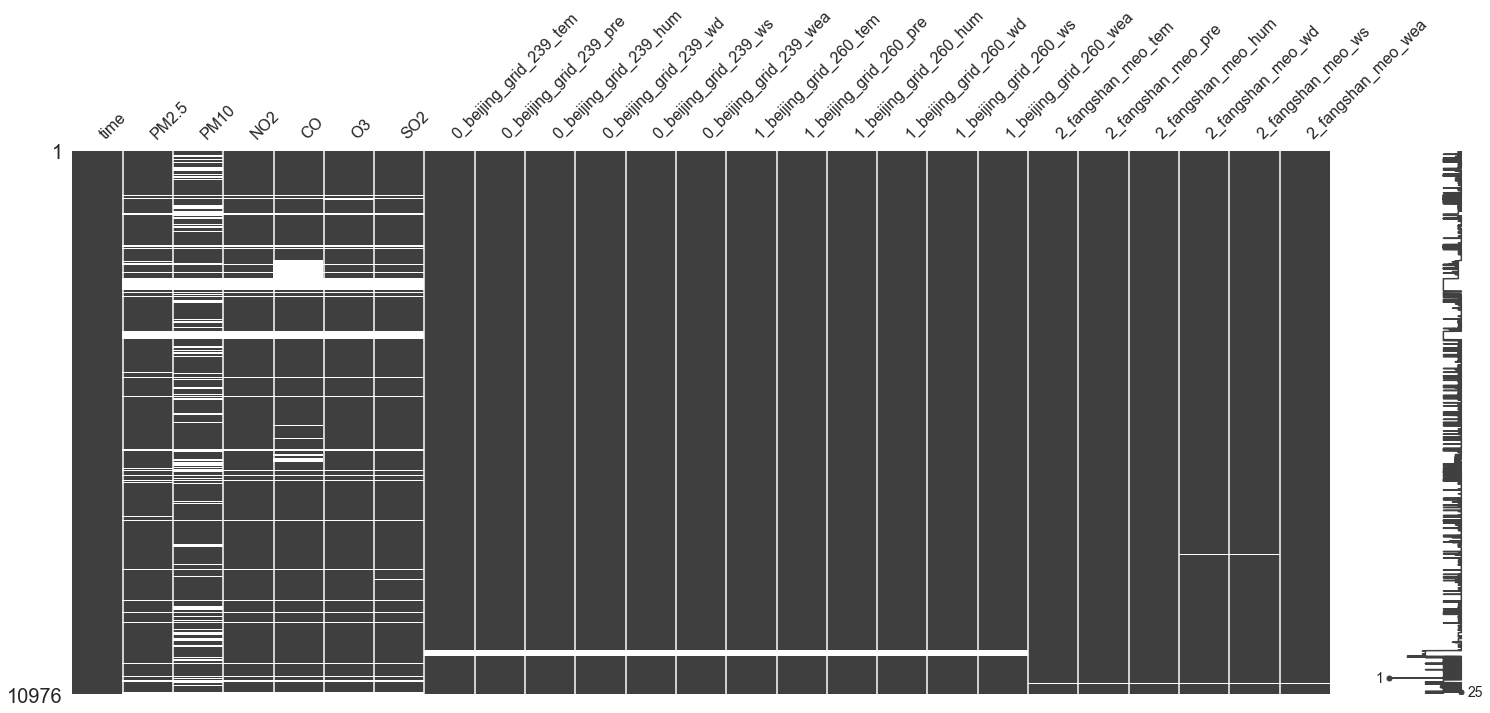

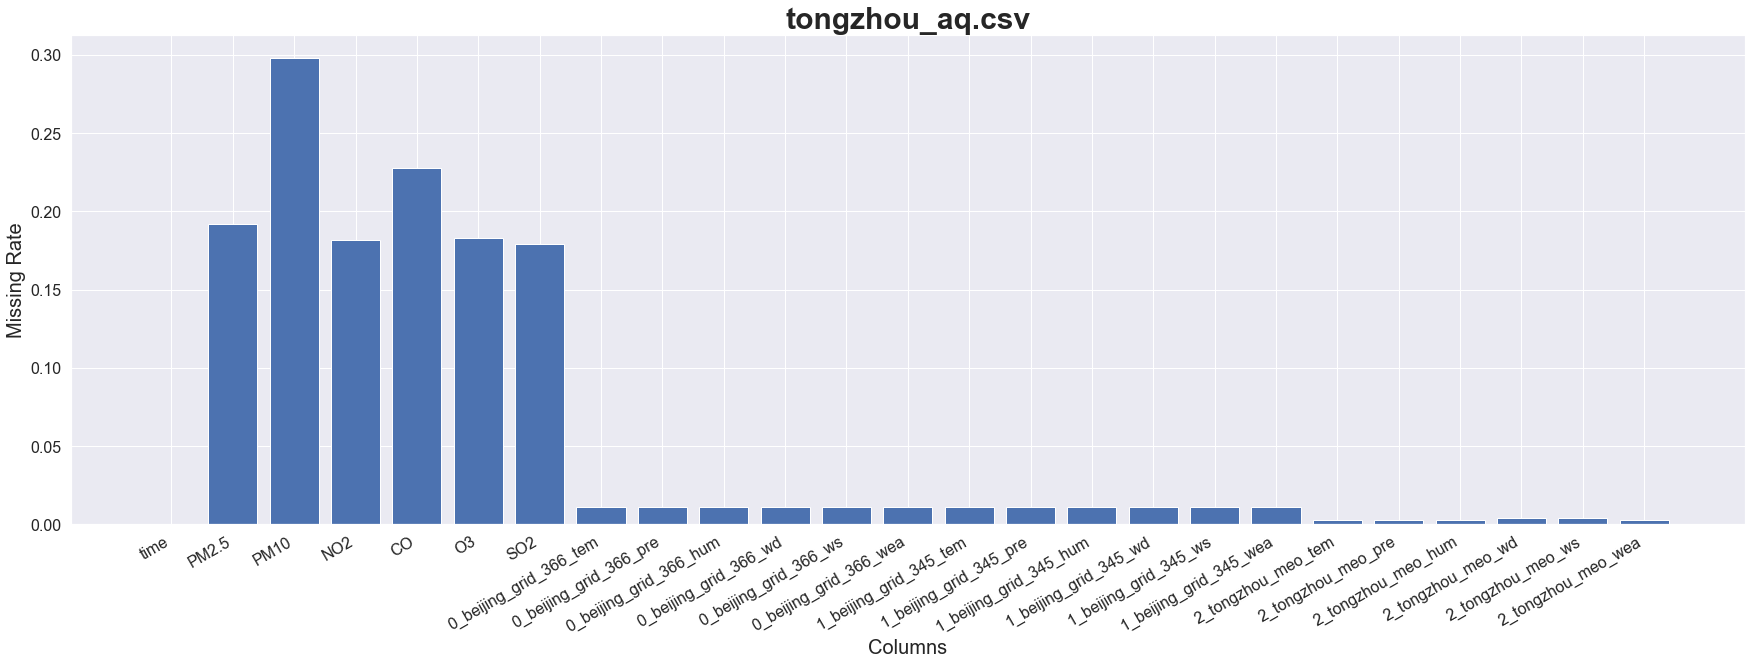

============== tongzhou_aq.csv ================


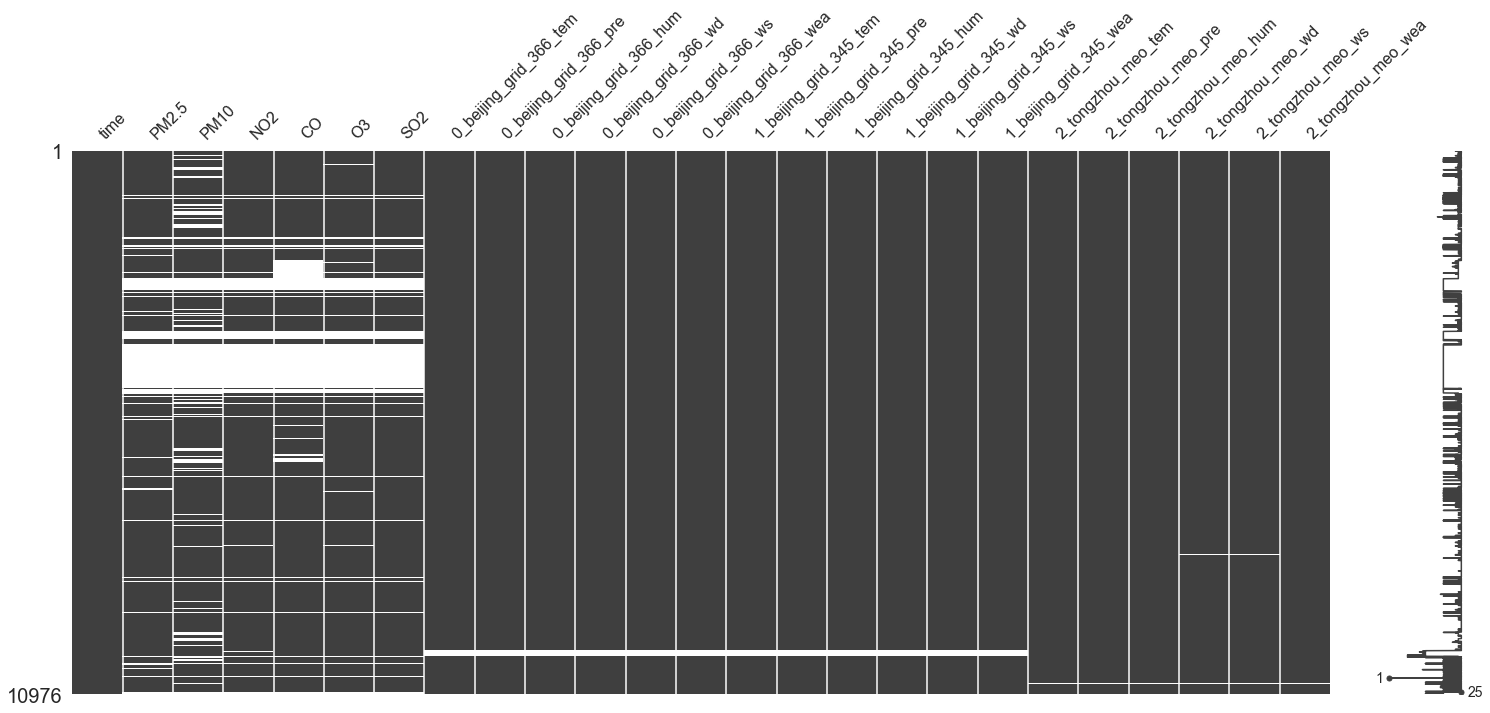

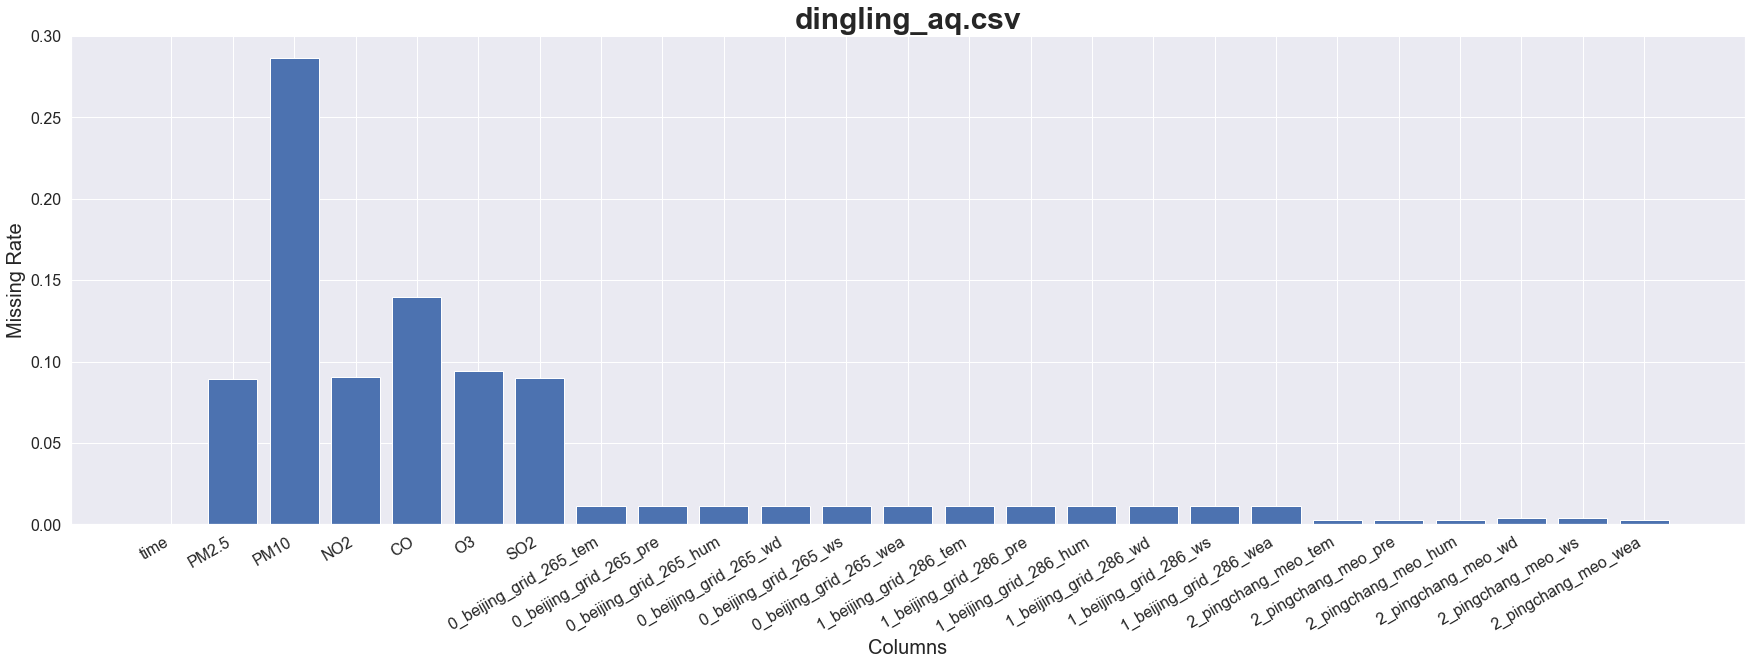

============== dingling_aq.csv ================


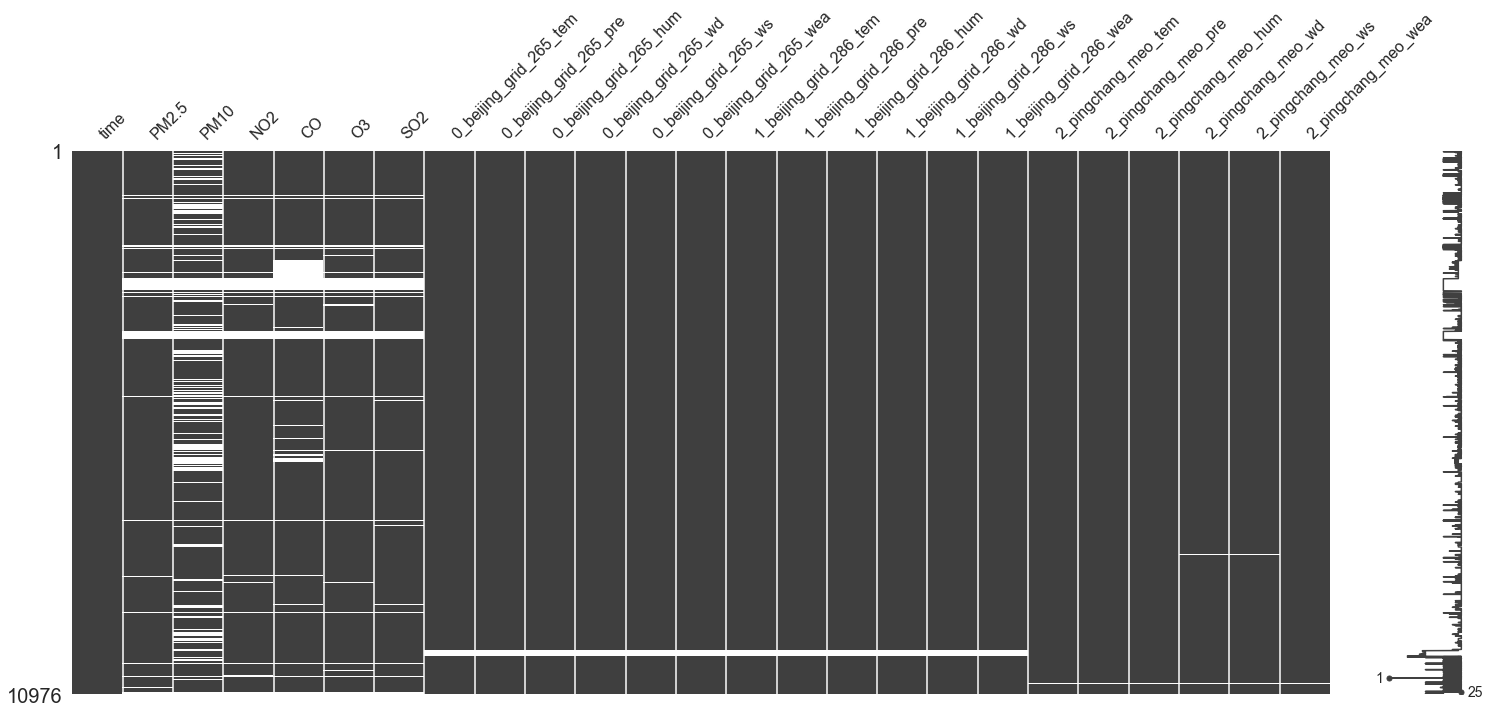

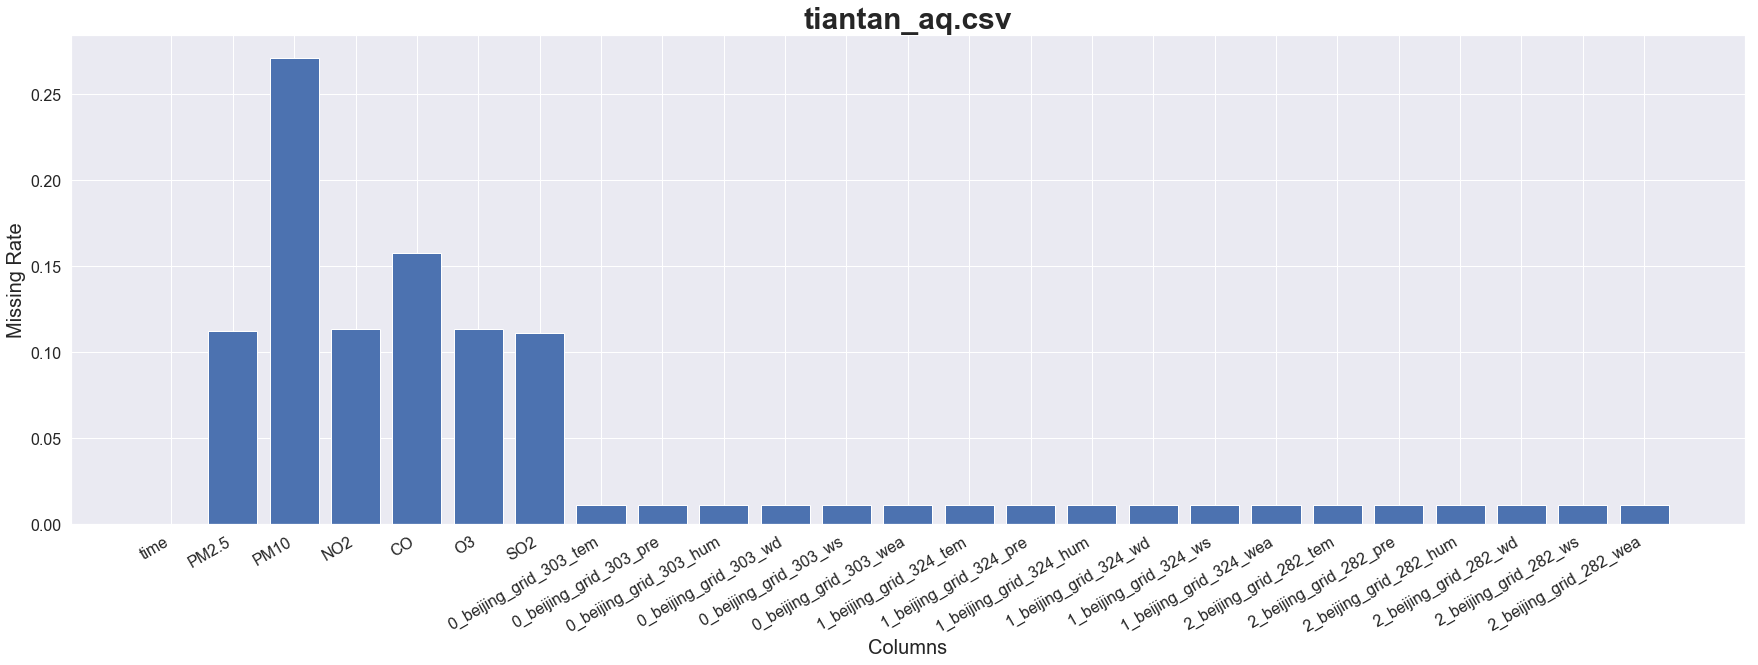

============== tiantan_aq.csv ================


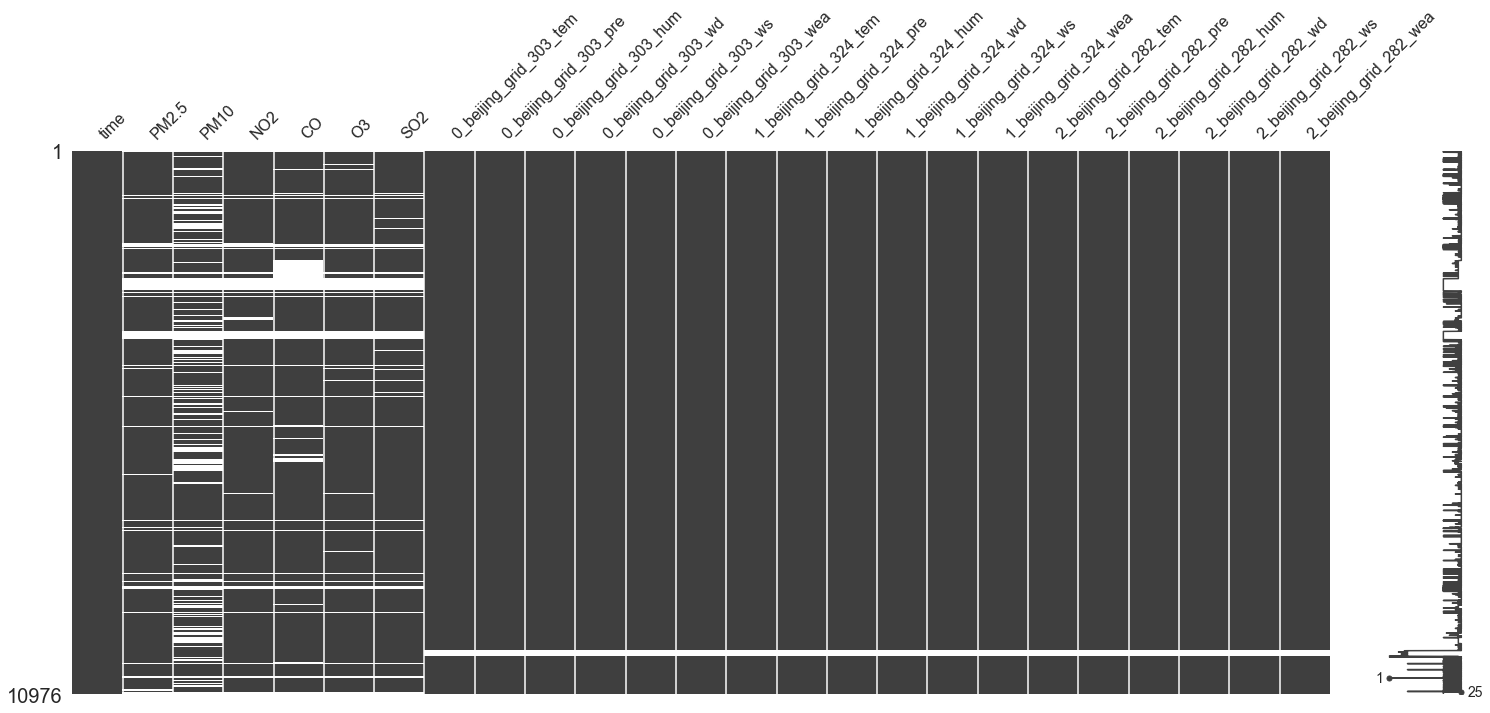

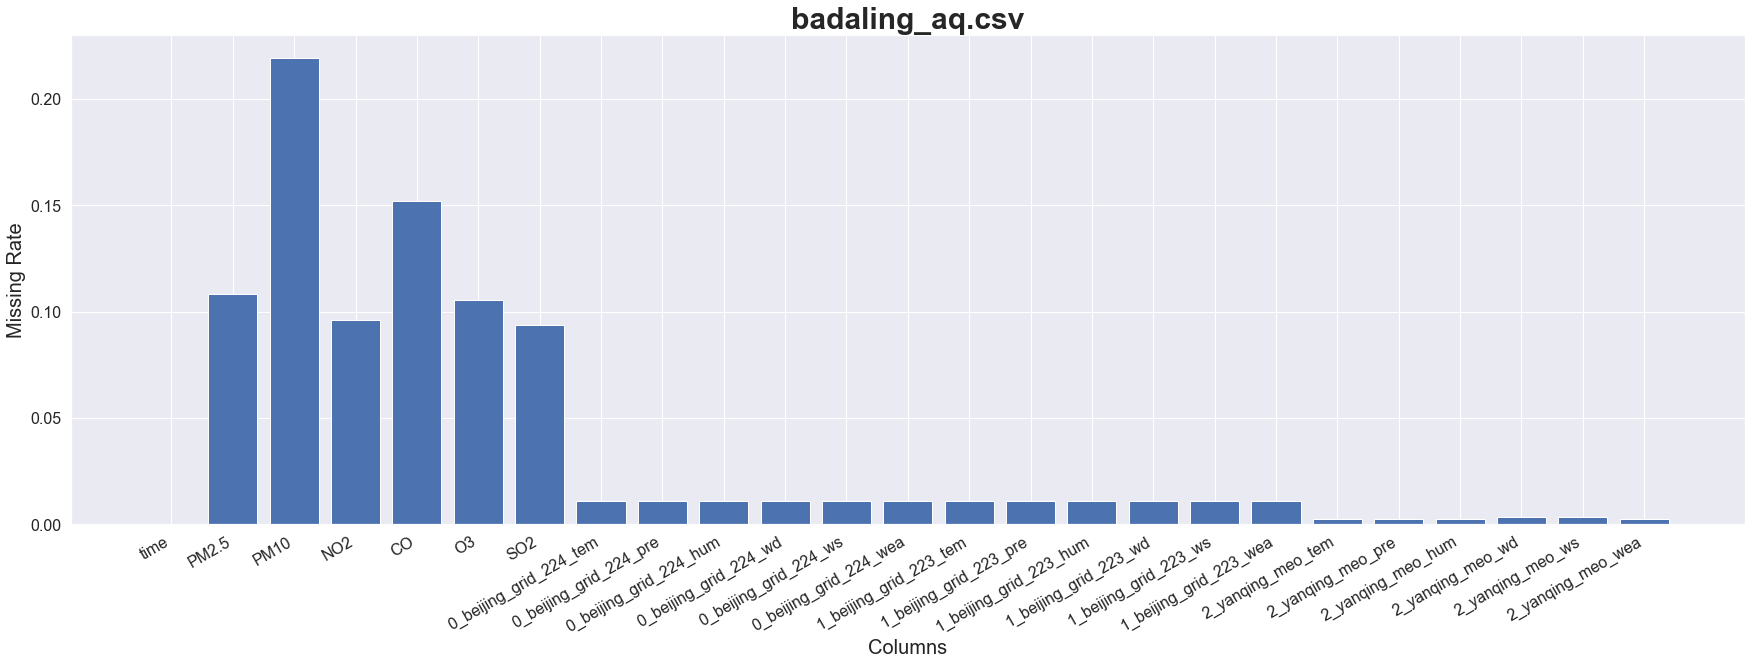

============== badaling_aq.csv ================


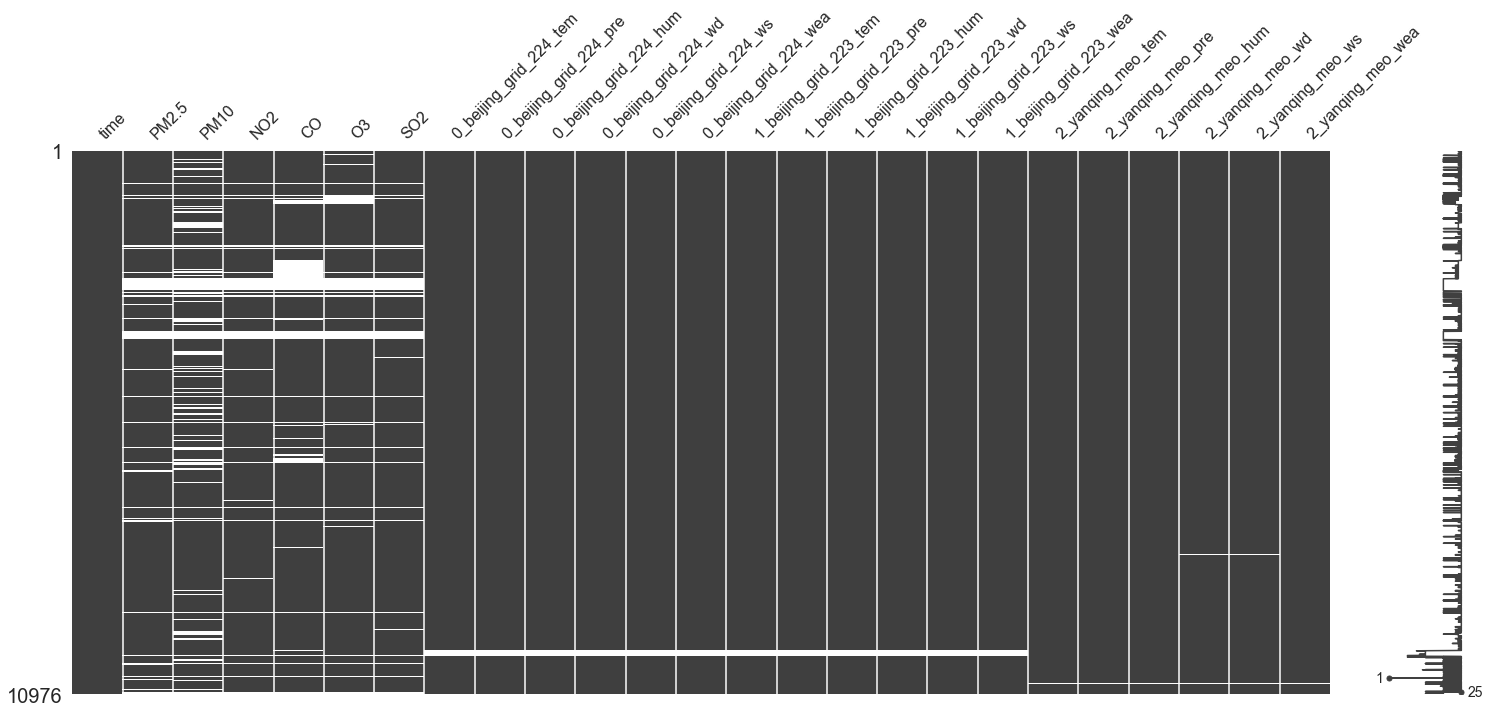

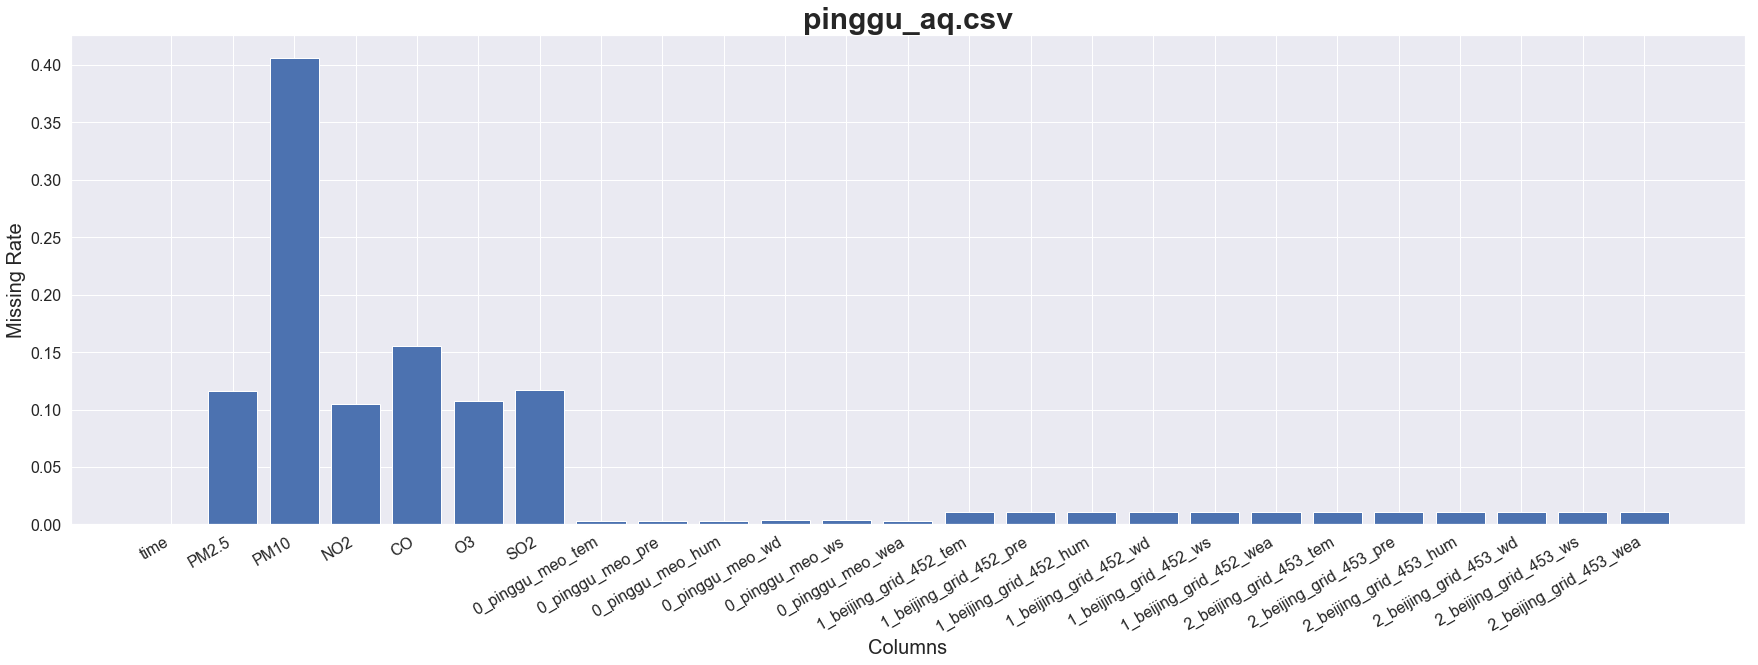

============== pinggu_aq.csv ================


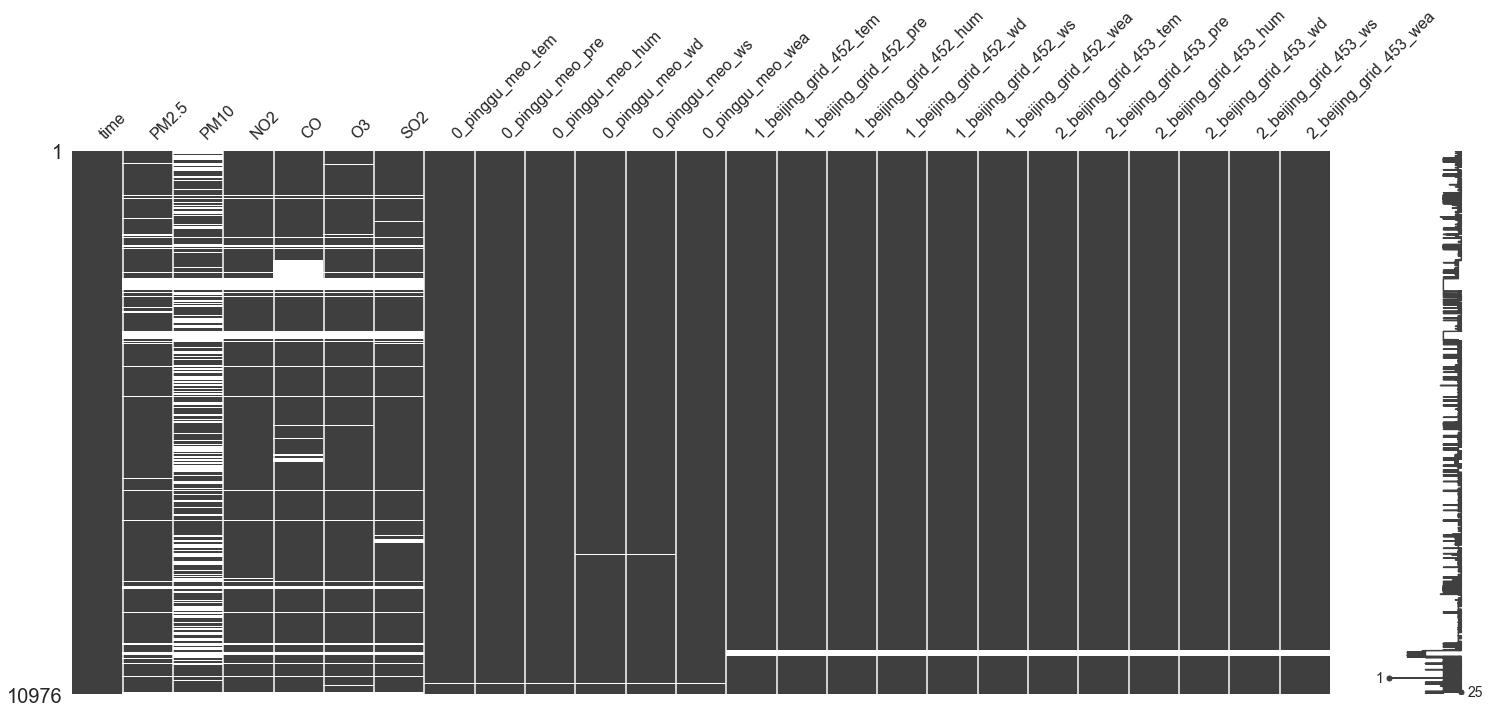

In [41]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib

import os

# read files from directory
cleaned_data_path = './cleaned_data/'
aq_file_list = []
airQ_data_dict = {}

# read the file names into list
for aq_file in os.listdir(cleaned_data_path):
    if '.csv' in aq_file:
        aq_file_list.append(aq_file)
        airQ_data_dict[aq_file] = pd.read_csv(cleaned_data_path+aq_file, index_col=0)
        
# analyze the missing value
for key, value in airQ_data_dict.items():
    missing_data_analysis(value, key)
    msno_analysis(value, key)
    

We can see that the missing rate of the weather data is very low while the air quality data has a very high missing rate. So we can use the imputation algorithm to fill the weather data.

#### Imputation

In [42]:
from fancyimpute import KNN

import ipdb

def imputeWeatherData(data_df):
    '''
    Impute the weather data & Ignore the Air quality data
    '''
    # get all the columns
    data_cols = data_df.columns
    
    # air data columns
    air_cols = ['time', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
    
    # categorical weather features columns with 'time'
    wea_cate_cols = [x for x in data_cols if '_wea' in x]
    wea_cate_cols.append('time')
    
    # weather columns without 'time'
    wea_cols = list(set(data_cols) - set(air_cols) - set(wea_cate_cols) - set('time'))
    
    # air quality & weather dataframe
    air_quality_df = data_df[air_cols]
    weather_cate_df = data_df[wea_cate_cols]
    
    # result dataframe
    result_df = air_quality_df.copy()
    
    # impute the data by each KNN station
    for i in range(k_nn):
        impute_cols = [x for x in wea_cols if '{}_'.format(i) in x]
        impute_cols.append('time')
        impute_df = data_df[impute_cols]
        impute_df.time = impute_df.time.reset_index()
        data_filled = KNN(k=2).fit_transform(impute_df)
        data_filled_df = pd.DataFrame(data_filled, columns=impute_cols)
        data_filled_df.time = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
        
        # merge into the result dataframe
        result_df = result_df.merge(data_filled_df, on='time', how='left')
        
    
    # impute the weather columns by column
#     for col in wea_cols:
#         impute_cols = ['time', col]
#         impute_df = data_df[impute_cols]
#         impute_df.time = impute_df.time.reset_index()
#         data_filled = KNN(k=2).fit_transform(impute_df)
#         data_filled_df = pd.DataFrame(data_filled, columns=impute_cols)
#         data_filled_df.time = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
        
#         # merge into the result dataframe
#         result_df = result_df.merge(data_filled_df, on='time', how='left')
        
    # one-hot encoding of the categorical weather dataframe & drop '%wea_None' columns
    wea_cate_dummies = pd.get_dummies(weather_cate_df)
    wea_none_cols = [x for x in wea_cate_dummies.columns if 'wea_None' in x]
    wea_cate_dummies = wea_cate_dummies.drop(columns=wea_none_cols)
    
    # concat the weather categorical features
    result_df = result_df.merge(wea_cate_dummies, on='time', how='left')
        
    return result_df
    
atzx_impute = imputeWeatherData(atzx)
atzx_impute

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.579
Imputing row 101/10976 with 0 missing, elapsed time: 12.580
Imputing row 201/10976 with 0 missing, elapsed time: 12.580
Imputing row 301/10976 with 0 missing, elapsed time: 12.581
Imputing row 401/10976 with 0 missing, elapsed time: 12.581
Imputing row 501/10976 with 0 missing, elapsed time: 12.582
Imputing row 601/10976 with 0 missing, elapsed time: 12.583
Imputing row 701/10976 with 0 missing, elapsed time: 12.583
Imputing row 801/10976 with 0 missing, elapsed time: 12.583
Imputing row 901/10976 with 0 missing, elapsed time: 12.584
Imputing row 1001/10976 with 0 missing, elapsed time: 12.584
Imputing row 1101/10976 with 0 missing, elapsed time: 12.585
Imputing row 1201/10976 with 0 missing, elapsed time: 12.585
Imputing row 1301/10976 with 0 missing, elapsed time: 12.586
Imputing row 1401/10976 with 0 missing, elapsed time: 12.586
Imputing row 1501/10976 with 0 missing, elapsed time: 12.586
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.760
Imputing row 101/10976 with 0 missing, elapsed time: 11.760
Imputing row 201/10976 with 0 missing, elapsed time: 11.760
Imputing row 301/10976 with 0 missing, elapsed time: 11.761
Imputing row 401/10976 with 0 missing, elapsed time: 11.761
Imputing row 501/10976 with 0 missing, elapsed time: 11.761
Imputing row 601/10976 with 0 missing, elapsed time: 11.762
Imputing row 701/10976 with 0 missing, elapsed time: 11.762
Imputing row 801/10976 with 0 missing, elapsed time: 11.762
Imputing row 901/10976 with 0 missing, elapsed time: 11.763
Imputing row 1001/10976 with 0 missing, elapsed time: 11.763
Imputing row 1101/10976 with 0 missing, elapsed time: 11.763
Imputing row 1201/10976 with 0 missing, elapsed time: 11.763
Imputing row 1301/10976 with 0 missing, elapsed time: 11.764
Imputing row 1401/10976 with 0 missing, elapsed time: 11.764
Imputing row 1501/10976 with 0 missing, elapsed time: 11.764
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.804
Imputing row 101/10976 with 0 missing, elapsed time: 12.805
Imputing row 201/10976 with 0 missing, elapsed time: 12.805
Imputing row 301/10976 with 0 missing, elapsed time: 12.805
Imputing row 401/10976 with 0 missing, elapsed time: 12.806
Imputing row 501/10976 with 0 missing, elapsed time: 12.806
Imputing row 601/10976 with 0 missing, elapsed time: 12.806
Imputing row 701/10976 with 0 missing, elapsed time: 12.807
Imputing row 801/10976 with 0 missing, elapsed time: 12.807
Imputing row 901/10976 with 0 missing, elapsed time: 12.807
Imputing row 1001/10976 with 0 missing, elapsed time: 12.807
Imputing row 1101/10976 with 0 missing, elapsed time: 12.808
Imputing row 1201/10976 with 0 missing, elapsed time: 12.808
Imputing row 1301/10976 with 0 missing, elapsed time: 12.808
Imputing row 1401/10976 with 0 missing, elapsed time: 12.810
Imputing row 1501/10976 with 0 missing, elapsed time: 12.810
Imputing row 1601/10976 with 0 missi

time  PM2.5   PM10   NO2   CO    O3   SO2  \
0     2017-01-30 16:00:00   70.0   75.0  36.0  0.9  79.0  34.0   
1     2017-01-30 17:00:00   78.0   86.0  36.0  0.1  78.0  38.0   
2     2017-01-30 18:00:00   86.0   92.0  39.0  1.1  74.0  35.0   
3     2017-01-30 19:00:00   95.0    NaN  46.0  1.2  65.0  34.0   
4     2017-01-30 20:00:00   98.0    NaN  42.0  1.2   NaN  32.0   
5     2017-01-30 21:00:00  104.0    NaN  65.0  1.7  46.0  34.0   
6     2017-01-30 22:00:00   86.0   93.0  83.0  2.1  25.0  38.0   
7     2017-01-30 23:00:00   94.0    NaN  81.0  2.1  26.0  34.0   
8     2017-01-31 00:00:00   93.0  103.0  83.0  2.4  27.0  40.0   
9     2017-01-31 01:00:00  100.0    NaN  70.0  2.4  39.0  45.0   
10    2017-01-31 02:00:00   85.0    NaN  54.0  1.9  56.0  45.0   
11    2017-01-31 03:00:00   81.0   90.0  48.0  1.7  67.0  44.0   
12    2017-01-31 04:00:00   79.0    NaN  55.0  1.7  66.0  42.0   
13    2017-01-31 05:00:00   68.0    NaN  52.0  1.5  71.0  35.0   
14    2017-01-31 06:00:00   50.0    NaN  39.0  1.1  81.0  26.0   
15    2017-01-31 07:00:00   55.0    NaN  48.0  1.1  75.0  24.0   
16    2017-01-31 08:00:00   72.0   76.0  68.0  1.3  66.0  32.0   
17    2017-01-31 09:00:00   80.0    NaN  69.0  1.2  68.0  38.0   
18    2017-01-31 10:00:00   72.0   85.0  62.0  1.2  79.0  24.0   
19    2017-01-31 11:00:00   91.0  101.0  75.0  1.4  75.0  36.0   
20    2017-01-31 12:00:00   73.0    NaN  88.0  1.5  46.0  30.0   
21    2017-01-31 13:00:00   24.0    NaN  27.0  0.7  76.0  13.0   
22    2017-01-31 14:00:00   10.0   31.0  17.0  0.4  80.0   5.0   
23    2017-01-31 15:00:00    3.0   26.0  11.0  0.3  80.0   2.0   
24    2017-01-31 16:00:00    5.0   18.0  13.0  0.4  77.0   4.0   
25    2017-01-31 17:00:00    5.0   21.0  10.0  0.4  79.0   2.0   
26    2017-01-31 18:00:00    7.0   21.0  11.0  0.4  73.0   5.0   
27    2017-01-31 19:00:00    6.0   23.0  12.0  0.4  71.0   7.0   
28    2017-01-31 20:00:00    8.0   21.0  11.0  0.4   NaN   8.0   
29    2017-01-31 21:00:00    8.0   19.0  16.0  0.5  67.0   9.0   
...                   ...    ...    ...   ...  ...   ...   ...   
10946 2018-05-01 18:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10947 2018-05-01 19:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10948 2018-05-01 20:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10949 2018-05-01 21:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10950 2018-05-01 22:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10951 2018-05-01 23:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10952 2018-05-02 00:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10953 2018-05-02 01:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10954 2018-05-02 02:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10955 2018-05-02 03:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10956 2018-05-02 04:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10957 2018-05-02 05:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10958 2018-05-02 06:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10959 2018-05-02 07:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10960 2018-05-02 08:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10961 2018-05-02 09:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10962 2018-05-02 10:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10963 2018-05-02 11:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10964 2018-05-02 12:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10965 2018-05-02 13:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10966 2018-05-02 14:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10967 2018-05-02 15:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10968 2018-05-02 16:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10969 2018-05-02 17:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10970 2018-05-02 18:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10971 2018-05-02 19:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10972 2018-05-02 20:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10973 2018-05-02 21:00:00    NaN    NaN   NaN  NaN   NaN   NaN   
10974 2018-05-02 22:00:00    NaN    NaN   NaN  NaN   NaN   Na

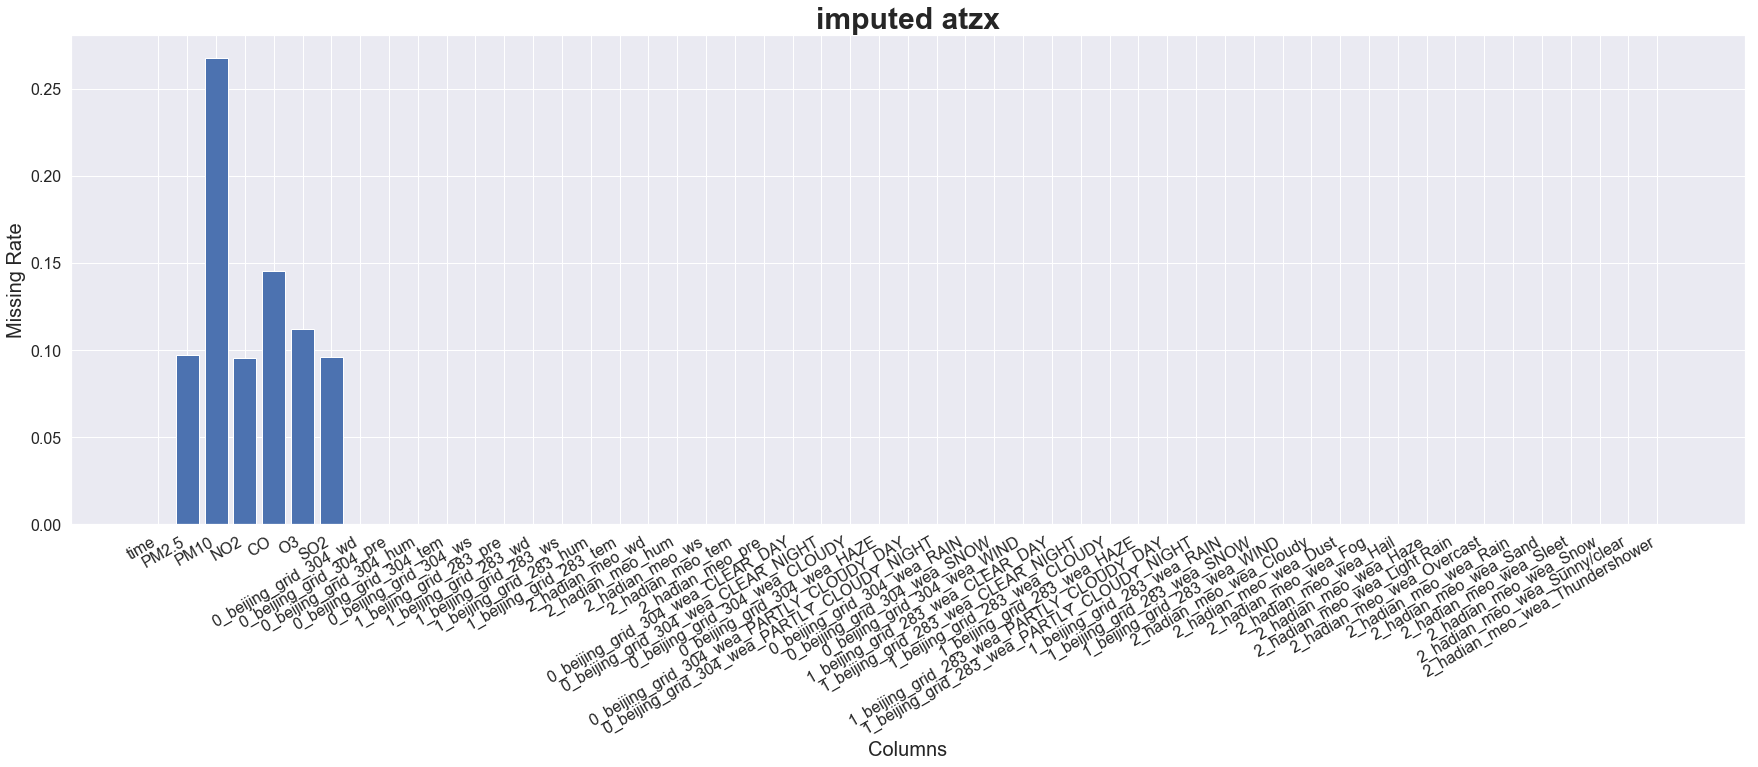

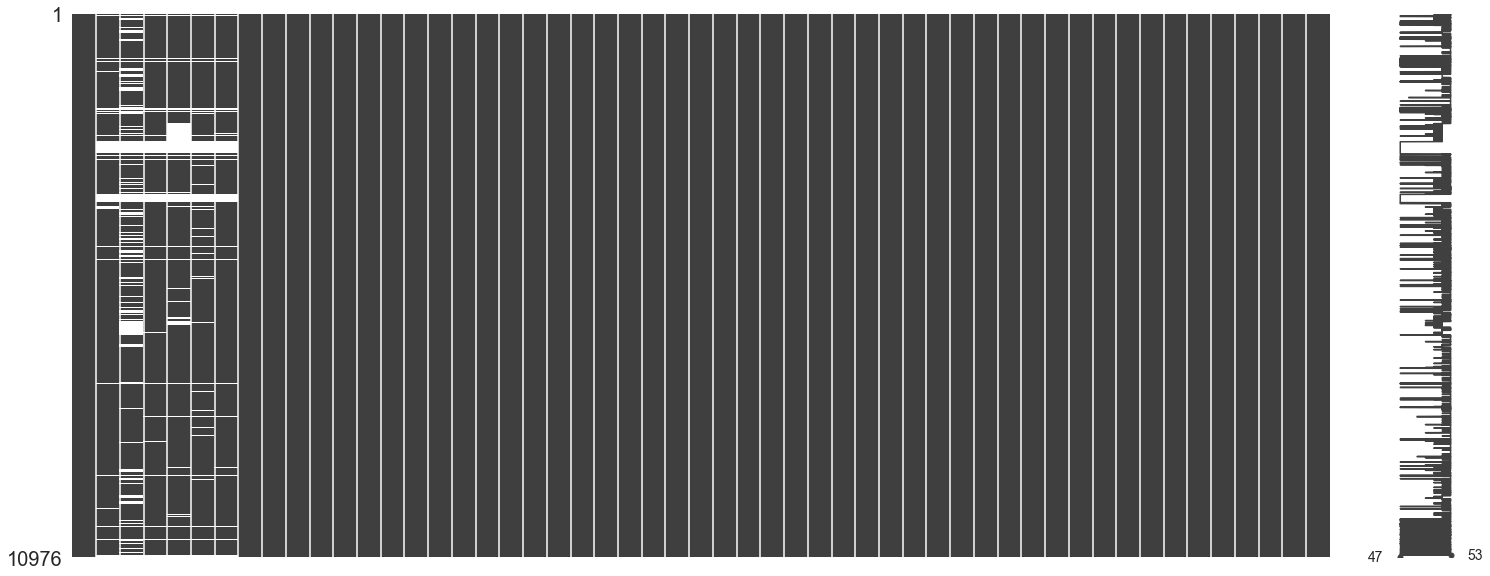

In [44]:
missing_data_analysis(atzx_impute, 'imputed atzx')
msno.matrix(atzx_impute)

In [49]:
airQ_data_dict['donggaocun_aq.csv'].dtypes


time                       object
PM2.5                     float64
PM10                      float64
NO2                       float64
CO                        float64
O3                        float64
SO2                       float64
0_beijing_grid_452_tem    float64
0_beijing_grid_452_pre    float64
0_beijing_grid_452_hum    float64
0_beijing_grid_452_wd     float64
0_beijing_grid_452_ws     float64
0_beijing_grid_452_wea     object
1_beijing_grid_473_tem    float64
1_beijing_grid_473_pre    float64
1_beijing_grid_473_hum    float64
1_beijing_grid_473_wd     float64
1_beijing_grid_473_ws     float64
1_beijing_grid_473_wea     object
2_pinggu_meo_tem          float64
2_pinggu_meo_pre          float64
2_pinggu_meo_hum          float64
2_pinggu_meo_wd           float64
2_pinggu_meo_ws           float64
2_pinggu_meo_wea           object
dtype: object

In [52]:
# impute all the air quality station dataframe
for key, value in airQ_data_dict.items():
    # change the 'time' data type from 'object' to 'datetime'
    value.time = value.time.apply(lambda x: pd.Timestamp(x))
    imputed_df = imputeWeatherData(value)
    imputed_df.to_csv('./imputed_data/{}_imputed.csv'.format(key.replace('.csv', '')))

# atzx_impute.to_csv('imputed_data/atzx_imputed.csv')

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.002
Imputing row 101/10976 with 0 missing, elapsed time: 11.002
Imputing row 201/10976 with 0 missing, elapsed time: 11.003
Imputing row 301/10976 with 0 missing, elapsed time: 11.003
Imputing row 401/10976 with 0 missing, elapsed time: 11.003
Imputing row 501/10976 with 0 missing, elapsed time: 11.004
Imputing row 601/10976 with 0 missing, elapsed time: 11.004
Imputing row 701/10976 with 0 missing, elapsed time: 11.004
Imputing row 801/10976 with 0 missing, elapsed time: 11.004
Imputing row 901/10976 with 0 missing, elapsed time: 11.005
Imputing row 1001/10976 with 0 missing, elapsed time: 11.005
Imputing row 1101/10976 with 0 missing, elapsed time: 11.005
Imputing row 1201/10976 with 0 missing, elapsed time: 11.006
Imputing row 1301/10976 with 0 missing, elapsed time: 11.006
Imputing row 1401/10976 with 0 missing, elapsed time: 11.006
Imputing row 1501/10976 with 0 missing, elapsed time: 11.006
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.177
Imputing row 101/10976 with 0 missing, elapsed time: 11.177
Imputing row 201/10976 with 0 missing, elapsed time: 11.178
Imputing row 301/10976 with 0 missing, elapsed time: 11.178
Imputing row 401/10976 with 0 missing, elapsed time: 11.178
Imputing row 501/10976 with 0 missing, elapsed time: 11.178
Imputing row 601/10976 with 0 missing, elapsed time: 11.179
Imputing row 701/10976 with 0 missing, elapsed time: 11.179
Imputing row 801/10976 with 0 missing, elapsed time: 11.180
Imputing row 901/10976 with 0 missing, elapsed time: 11.181
Imputing row 1001/10976 with 0 missing, elapsed time: 11.181
Imputing row 1101/10976 with 0 missing, elapsed time: 11.182
Imputing row 1201/10976 with 0 missing, elapsed time: 11.182
Imputing row 1301/10976 with 0 missing, elapsed time: 11.183
Imputing row 1401/10976 with 0 missing, elapsed time: 11.183
Imputing row 1501/10976 with 0 missing, elapsed time: 11.183
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.619
Imputing row 101/10976 with 0 missing, elapsed time: 12.619
Imputing row 201/10976 with 0 missing, elapsed time: 12.619
Imputing row 301/10976 with 0 missing, elapsed time: 12.620
Imputing row 401/10976 with 0 missing, elapsed time: 12.620
Imputing row 501/10976 with 0 missing, elapsed time: 12.620
Imputing row 601/10976 with 0 missing, elapsed time: 12.620
Imputing row 701/10976 with 0 missing, elapsed time: 12.621
Imputing row 801/10976 with 0 missing, elapsed time: 12.621
Imputing row 901/10976 with 0 missing, elapsed time: 12.621
Imputing row 1001/10976 with 0 missing, elapsed time: 12.622
Imputing row 1101/10976 with 0 missing, elapsed time: 12.622
Imputing row 1201/10976 with 0 missing, elapsed time: 12.622
Imputing row 1301/10976 with 0 missing, elapsed time: 12.622
Imputing row 1401/10976 with 0 missing, elapsed time: 12.624
Imputing row 1501/10976 with 0 missing, elapsed time: 12.625
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.533
Imputing row 101/10976 with 0 missing, elapsed time: 11.533
Imputing row 201/10976 with 0 missing, elapsed time: 11.534
Imputing row 301/10976 with 0 missing, elapsed time: 11.534
Imputing row 401/10976 with 0 missing, elapsed time: 11.534
Imputing row 501/10976 with 0 missing, elapsed time: 11.534
Imputing row 601/10976 with 0 missing, elapsed time: 11.535
Imputing row 701/10976 with 0 missing, elapsed time: 11.535
Imputing row 801/10976 with 0 missing, elapsed time: 11.535
Imputing row 901/10976 with 0 missing, elapsed time: 11.536
Imputing row 1001/10976 with 0 missing, elapsed time: 11.536
Imputing row 1101/10976 with 0 missing, elapsed time: 11.536
Imputing row 1201/10976 with 0 missing, elapsed time: 11.536
Imputing row 1301/10976 with 0 missing, elapsed time: 11.537
Imputing row 1401/10976 with 0 missing, elapsed time: 11.537
Imputing row 1501/10976 with 0 missing, elapsed time: 11.537
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.075
Imputing row 101/10976 with 0 missing, elapsed time: 11.076
Imputing row 201/10976 with 0 missing, elapsed time: 11.076
Imputing row 301/10976 with 0 missing, elapsed time: 11.076
Imputing row 401/10976 with 0 missing, elapsed time: 11.077
Imputing row 501/10976 with 0 missing, elapsed time: 11.077
Imputing row 601/10976 with 0 missing, elapsed time: 11.077
Imputing row 701/10976 with 0 missing, elapsed time: 11.077
Imputing row 801/10976 with 0 missing, elapsed time: 11.078
Imputing row 901/10976 with 0 missing, elapsed time: 11.078
Imputing row 1001/10976 with 0 missing, elapsed time: 11.078
Imputing row 1101/10976 with 0 missing, elapsed time: 11.079
Imputing row 1201/10976 with 0 missing, elapsed time: 11.079
Imputing row 1301/10976 with 0 missing, elapsed time: 11.079
Imputing row 1401/10976 with 0 missing, elapsed time: 11.079
Imputing row 1501/10976 with 0 missing, elapsed time: 11.080
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.703
Imputing row 101/10976 with 0 missing, elapsed time: 12.704
Imputing row 201/10976 with 0 missing, elapsed time: 12.704
Imputing row 301/10976 with 0 missing, elapsed time: 12.704
Imputing row 401/10976 with 0 missing, elapsed time: 12.704
Imputing row 501/10976 with 0 missing, elapsed time: 12.705
Imputing row 601/10976 with 0 missing, elapsed time: 12.705
Imputing row 701/10976 with 0 missing, elapsed time: 12.705
Imputing row 801/10976 with 0 missing, elapsed time: 12.706
Imputing row 901/10976 with 0 missing, elapsed time: 12.706
Imputing row 1001/10976 with 0 missing, elapsed time: 12.706
Imputing row 1101/10976 with 0 missing, elapsed time: 12.706
Imputing row 1201/10976 with 0 missing, elapsed time: 12.707
Imputing row 1301/10976 with 0 missing, elapsed time: 12.707
Imputing row 1401/10976 with 0 missing, elapsed time: 12.709
Imputing row 1501/10976 with 0 missing, elapsed time: 12.709
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.971
Imputing row 101/10976 with 0 missing, elapsed time: 11.971
Imputing row 201/10976 with 0 missing, elapsed time: 11.971
Imputing row 301/10976 with 0 missing, elapsed time: 11.972
Imputing row 401/10976 with 0 missing, elapsed time: 11.972
Imputing row 501/10976 with 0 missing, elapsed time: 11.972
Imputing row 601/10976 with 0 missing, elapsed time: 11.972
Imputing row 701/10976 with 0 missing, elapsed time: 11.973
Imputing row 801/10976 with 0 missing, elapsed time: 11.973
Imputing row 901/10976 with 0 missing, elapsed time: 11.973
Imputing row 1001/10976 with 0 missing, elapsed time: 11.974
Imputing row 1101/10976 with 0 missing, elapsed time: 11.974
Imputing row 1201/10976 with 0 missing, elapsed time: 11.974
Imputing row 1301/10976 with 0 missing, elapsed time: 11.974
Imputing row 1401/10976 with 0 missing, elapsed time: 11.976
Imputing row 1501/10976 with 0 missing, elapsed time: 11.976
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.236
Imputing row 101/10976 with 0 missing, elapsed time: 12.237
Imputing row 201/10976 with 0 missing, elapsed time: 12.237
Imputing row 301/10976 with 0 missing, elapsed time: 12.238
Imputing row 401/10976 with 0 missing, elapsed time: 12.238
Imputing row 501/10976 with 0 missing, elapsed time: 12.238
Imputing row 601/10976 with 0 missing, elapsed time: 12.238
Imputing row 701/10976 with 0 missing, elapsed time: 12.239
Imputing row 801/10976 with 0 missing, elapsed time: 12.239
Imputing row 901/10976 with 0 missing, elapsed time: 12.240
Imputing row 1001/10976 with 0 missing, elapsed time: 12.240
Imputing row 1101/10976 with 0 missing, elapsed time: 12.241
Imputing row 1201/10976 with 0 missing, elapsed time: 12.241
Imputing row 1301/10976 with 0 missing, elapsed time: 12.241
Imputing row 1401/10976 with 0 missing, elapsed time: 12.242
Imputing row 1501/10976 with 0 missing, elapsed time: 12.242
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.233
Imputing row 101/10976 with 0 missing, elapsed time: 12.233
Imputing row 201/10976 with 0 missing, elapsed time: 12.233
Imputing row 301/10976 with 0 missing, elapsed time: 12.234
Imputing row 401/10976 with 0 missing, elapsed time: 12.234
Imputing row 501/10976 with 0 missing, elapsed time: 12.234
Imputing row 601/10976 with 0 missing, elapsed time: 12.234
Imputing row 701/10976 with 0 missing, elapsed time: 12.235
Imputing row 801/10976 with 0 missing, elapsed time: 12.235
Imputing row 901/10976 with 0 missing, elapsed time: 12.235
Imputing row 1001/10976 with 0 missing, elapsed time: 12.236
Imputing row 1101/10976 with 0 missing, elapsed time: 12.236
Imputing row 1201/10976 with 0 missing, elapsed time: 12.236
Imputing row 1301/10976 with 0 missing, elapsed time: 12.236
Imputing row 1401/10976 with 0 missing, elapsed time: 12.237
Imputing row 1501/10976 with 0 missing, elapsed time: 12.237
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.792
Imputing row 101/10976 with 0 missing, elapsed time: 12.792
Imputing row 201/10976 with 0 missing, elapsed time: 12.792
Imputing row 301/10976 with 0 missing, elapsed time: 12.793
Imputing row 401/10976 with 0 missing, elapsed time: 12.793
Imputing row 501/10976 with 0 missing, elapsed time: 12.793
Imputing row 601/10976 with 0 missing, elapsed time: 12.794
Imputing row 701/10976 with 0 missing, elapsed time: 12.794
Imputing row 801/10976 with 0 missing, elapsed time: 12.794
Imputing row 901/10976 with 0 missing, elapsed time: 12.794
Imputing row 1001/10976 with 0 missing, elapsed time: 12.795
Imputing row 1101/10976 with 0 missing, elapsed time: 12.795
Imputing row 1201/10976 with 0 missing, elapsed time: 12.795
Imputing row 1301/10976 with 0 missing, elapsed time: 12.796
Imputing row 1401/10976 with 0 missing, elapsed time: 12.796
Imputing row 1501/10976 with 0 missing, elapsed time: 12.796
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.218
Imputing row 101/10976 with 0 missing, elapsed time: 12.219
Imputing row 201/10976 with 0 missing, elapsed time: 12.219
Imputing row 301/10976 with 0 missing, elapsed time: 12.219
Imputing row 401/10976 with 0 missing, elapsed time: 12.220
Imputing row 501/10976 with 0 missing, elapsed time: 12.220
Imputing row 601/10976 with 0 missing, elapsed time: 12.220
Imputing row 701/10976 with 0 missing, elapsed time: 12.220
Imputing row 801/10976 with 0 missing, elapsed time: 12.221
Imputing row 901/10976 with 0 missing, elapsed time: 12.221
Imputing row 1001/10976 with 0 missing, elapsed time: 12.221
Imputing row 1101/10976 with 0 missing, elapsed time: 12.222
Imputing row 1201/10976 with 0 missing, elapsed time: 12.222
Imputing row 1301/10976 with 0 missing, elapsed time: 12.222
Imputing row 1401/10976 with 0 missing, elapsed time: 12.223
Imputing row 1501/10976 with 0 missing, elapsed time: 12.223
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.091
Imputing row 101/10976 with 0 missing, elapsed time: 12.091
Imputing row 201/10976 with 0 missing, elapsed time: 12.091
Imputing row 301/10976 with 0 missing, elapsed time: 12.092
Imputing row 401/10976 with 0 missing, elapsed time: 12.092
Imputing row 501/10976 with 0 missing, elapsed time: 12.092
Imputing row 601/10976 with 0 missing, elapsed time: 12.092
Imputing row 701/10976 with 0 missing, elapsed time: 12.093
Imputing row 801/10976 with 0 missing, elapsed time: 12.093
Imputing row 901/10976 with 0 missing, elapsed time: 12.093
Imputing row 1001/10976 with 0 missing, elapsed time: 12.094
Imputing row 1101/10976 with 0 missing, elapsed time: 12.094
Imputing row 1201/10976 with 0 missing, elapsed time: 12.094
Imputing row 1301/10976 with 0 missing, elapsed time: 12.095
Imputing row 1401/10976 with 0 missing, elapsed time: 12.095
Imputing row 1501/10976 with 0 missing, elapsed time: 12.096
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.861
Imputing row 101/10976 with 0 missing, elapsed time: 11.862
Imputing row 201/10976 with 0 missing, elapsed time: 11.862
Imputing row 301/10976 with 0 missing, elapsed time: 11.862
Imputing row 401/10976 with 0 missing, elapsed time: 11.863
Imputing row 501/10976 with 0 missing, elapsed time: 11.863
Imputing row 601/10976 with 0 missing, elapsed time: 11.863
Imputing row 701/10976 with 0 missing, elapsed time: 11.864
Imputing row 801/10976 with 0 missing, elapsed time: 11.864
Imputing row 901/10976 with 0 missing, elapsed time: 11.865
Imputing row 1001/10976 with 0 missing, elapsed time: 11.865
Imputing row 1101/10976 with 0 missing, elapsed time: 11.865
Imputing row 1201/10976 with 0 missing, elapsed time: 11.866
Imputing row 1301/10976 with 0 missing, elapsed time: 11.866
Imputing row 1401/10976 with 0 missing, elapsed time: 11.866
Imputing row 1501/10976 with 0 missing, elapsed time: 11.867
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.830
Imputing row 101/10976 with 0 missing, elapsed time: 11.830
Imputing row 201/10976 with 0 missing, elapsed time: 11.831
Imputing row 301/10976 with 0 missing, elapsed time: 11.831
Imputing row 401/10976 with 0 missing, elapsed time: 11.831
Imputing row 501/10976 with 0 missing, elapsed time: 11.832
Imputing row 601/10976 with 0 missing, elapsed time: 11.832
Imputing row 701/10976 with 0 missing, elapsed time: 11.832
Imputing row 801/10976 with 0 missing, elapsed time: 11.833
Imputing row 901/10976 with 0 missing, elapsed time: 11.833
Imputing row 1001/10976 with 0 missing, elapsed time: 11.833
Imputing row 1101/10976 with 0 missing, elapsed time: 11.834
Imputing row 1201/10976 with 0 missing, elapsed time: 11.834
Imputing row 1301/10976 with 0 missing, elapsed time: 11.834
Imputing row 1401/10976 with 0 missing, elapsed time: 11.834
Imputing row 1501/10976 with 0 missing, elapsed time: 11.835
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.507
Imputing row 101/10976 with 0 missing, elapsed time: 11.508
Imputing row 201/10976 with 0 missing, elapsed time: 11.508
Imputing row 301/10976 with 0 missing, elapsed time: 11.508
Imputing row 401/10976 with 0 missing, elapsed time: 11.509
Imputing row 501/10976 with 0 missing, elapsed time: 11.509
Imputing row 601/10976 with 0 missing, elapsed time: 11.509
Imputing row 701/10976 with 0 missing, elapsed time: 11.509
Imputing row 801/10976 with 0 missing, elapsed time: 11.510
Imputing row 901/10976 with 0 missing, elapsed time: 11.510
Imputing row 1001/10976 with 0 missing, elapsed time: 11.510
Imputing row 1101/10976 with 0 missing, elapsed time: 11.511
Imputing row 1201/10976 with 0 missing, elapsed time: 11.511
Imputing row 1301/10976 with 0 missing, elapsed time: 11.511
Imputing row 1401/10976 with 0 missing, elapsed time: 11.512
Imputing row 1501/10976 with 0 missing, elapsed time: 11.512
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.430
Imputing row 101/10976 with 0 missing, elapsed time: 11.431
Imputing row 201/10976 with 0 missing, elapsed time: 11.431
Imputing row 301/10976 with 0 missing, elapsed time: 11.431
Imputing row 401/10976 with 0 missing, elapsed time: 11.432
Imputing row 501/10976 with 0 missing, elapsed time: 11.432
Imputing row 601/10976 with 0 missing, elapsed time: 11.433
Imputing row 701/10976 with 0 missing, elapsed time: 11.433
Imputing row 801/10976 with 0 missing, elapsed time: 11.433
Imputing row 901/10976 with 0 missing, elapsed time: 11.434
Imputing row 1001/10976 with 0 missing, elapsed time: 11.434
Imputing row 1101/10976 with 0 missing, elapsed time: 11.434
Imputing row 1201/10976 with 0 missing, elapsed time: 11.435
Imputing row 1301/10976 with 0 missing, elapsed time: 11.435
Imputing row 1401/10976 with 0 missing, elapsed time: 11.435
Imputing row 1501/10976 with 0 missing, elapsed time: 11.435
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.369
Imputing row 101/10976 with 0 missing, elapsed time: 11.369
Imputing row 201/10976 with 0 missing, elapsed time: 11.369
Imputing row 301/10976 with 0 missing, elapsed time: 11.370
Imputing row 401/10976 with 0 missing, elapsed time: 11.370
Imputing row 501/10976 with 0 missing, elapsed time: 11.370
Imputing row 601/10976 with 0 missing, elapsed time: 11.370
Imputing row 701/10976 with 0 missing, elapsed time: 11.371
Imputing row 801/10976 with 0 missing, elapsed time: 11.371
Imputing row 901/10976 with 0 missing, elapsed time: 11.371
Imputing row 1001/10976 with 0 missing, elapsed time: 11.371
Imputing row 1101/10976 with 0 missing, elapsed time: 11.372
Imputing row 1201/10976 with 0 missing, elapsed time: 11.372
Imputing row 1301/10976 with 0 missing, elapsed time: 11.372
Imputing row 1401/10976 with 0 missing, elapsed time: 11.372
Imputing row 1501/10976 with 0 missing, elapsed time: 11.373
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.666
Imputing row 101/10976 with 0 missing, elapsed time: 11.666
Imputing row 201/10976 with 0 missing, elapsed time: 11.667
Imputing row 301/10976 with 0 missing, elapsed time: 11.667
Imputing row 401/10976 with 0 missing, elapsed time: 11.667
Imputing row 501/10976 with 0 missing, elapsed time: 11.668
Imputing row 601/10976 with 0 missing, elapsed time: 11.668
Imputing row 701/10976 with 0 missing, elapsed time: 11.668
Imputing row 801/10976 with 0 missing, elapsed time: 11.668
Imputing row 901/10976 with 0 missing, elapsed time: 11.669
Imputing row 1001/10976 with 0 missing, elapsed time: 11.669
Imputing row 1101/10976 with 0 missing, elapsed time: 11.669
Imputing row 1201/10976 with 0 missing, elapsed time: 11.670
Imputing row 1301/10976 with 0 missing, elapsed time: 11.670
Imputing row 1401/10976 with 0 missing, elapsed time: 11.670
Imputing row 1501/10976 with 0 missing, elapsed time: 11.671
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.672
Imputing row 101/10976 with 0 missing, elapsed time: 11.672
Imputing row 201/10976 with 0 missing, elapsed time: 11.673
Imputing row 301/10976 with 0 missing, elapsed time: 11.673
Imputing row 401/10976 with 0 missing, elapsed time: 11.673
Imputing row 501/10976 with 0 missing, elapsed time: 11.674
Imputing row 601/10976 with 0 missing, elapsed time: 11.674
Imputing row 701/10976 with 0 missing, elapsed time: 11.674
Imputing row 801/10976 with 0 missing, elapsed time: 11.675
Imputing row 901/10976 with 0 missing, elapsed time: 11.675
Imputing row 1001/10976 with 0 missing, elapsed time: 11.675
Imputing row 1101/10976 with 0 missing, elapsed time: 11.676
Imputing row 1201/10976 with 0 missing, elapsed time: 11.677
Imputing row 1301/10976 with 0 missing, elapsed time: 11.677
Imputing row 1401/10976 with 0 missing, elapsed time: 11.677
Imputing row 1501/10976 with 0 missing, elapsed time: 11.678
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.098
Imputing row 101/10976 with 0 missing, elapsed time: 11.099
Imputing row 201/10976 with 0 missing, elapsed time: 11.099
Imputing row 301/10976 with 0 missing, elapsed time: 11.099
Imputing row 401/10976 with 0 missing, elapsed time: 11.099
Imputing row 501/10976 with 0 missing, elapsed time: 11.100
Imputing row 601/10976 with 0 missing, elapsed time: 11.100
Imputing row 701/10976 with 0 missing, elapsed time: 11.100
Imputing row 801/10976 with 0 missing, elapsed time: 11.100
Imputing row 901/10976 with 0 missing, elapsed time: 11.101
Imputing row 1001/10976 with 0 missing, elapsed time: 11.101
Imputing row 1101/10976 with 0 missing, elapsed time: 11.101
Imputing row 1201/10976 with 0 missing, elapsed time: 11.102
Imputing row 1301/10976 with 0 missing, elapsed time: 11.102
Imputing row 1401/10976 with 0 missing, elapsed time: 11.102
Imputing row 1501/10976 with 0 missing, elapsed time: 11.102
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.082
Imputing row 101/10976 with 0 missing, elapsed time: 11.082
Imputing row 201/10976 with 0 missing, elapsed time: 11.083
Imputing row 301/10976 with 0 missing, elapsed time: 11.083
Imputing row 401/10976 with 0 missing, elapsed time: 11.083
Imputing row 501/10976 with 0 missing, elapsed time: 11.084
Imputing row 601/10976 with 0 missing, elapsed time: 11.084
Imputing row 701/10976 with 0 missing, elapsed time: 11.084
Imputing row 801/10976 with 0 missing, elapsed time: 11.084
Imputing row 901/10976 with 0 missing, elapsed time: 11.085
Imputing row 1001/10976 with 0 missing, elapsed time: 11.085
Imputing row 1101/10976 with 0 missing, elapsed time: 11.085
Imputing row 1201/10976 with 0 missing, elapsed time: 11.086
Imputing row 1301/10976 with 0 missing, elapsed time: 11.086
Imputing row 1401/10976 with 0 missing, elapsed time: 11.086
Imputing row 1501/10976 with 0 missing, elapsed time: 11.086
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.270
Imputing row 101/10976 with 0 missing, elapsed time: 11.270
Imputing row 201/10976 with 0 missing, elapsed time: 11.270
Imputing row 301/10976 with 0 missing, elapsed time: 11.271
Imputing row 401/10976 with 0 missing, elapsed time: 11.271
Imputing row 501/10976 with 0 missing, elapsed time: 11.271
Imputing row 601/10976 with 0 missing, elapsed time: 11.271
Imputing row 701/10976 with 0 missing, elapsed time: 11.272
Imputing row 801/10976 with 0 missing, elapsed time: 11.272
Imputing row 901/10976 with 0 missing, elapsed time: 11.272
Imputing row 1001/10976 with 0 missing, elapsed time: 11.273
Imputing row 1101/10976 with 0 missing, elapsed time: 11.273
Imputing row 1201/10976 with 0 missing, elapsed time: 11.273
Imputing row 1301/10976 with 0 missing, elapsed time: 11.274
Imputing row 1401/10976 with 0 missing, elapsed time: 11.274
Imputing row 1501/10976 with 0 missing, elapsed time: 11.274
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.633
Imputing row 101/10976 with 0 missing, elapsed time: 11.634
Imputing row 201/10976 with 0 missing, elapsed time: 11.634
Imputing row 301/10976 with 0 missing, elapsed time: 11.635
Imputing row 401/10976 with 0 missing, elapsed time: 11.635
Imputing row 501/10976 with 0 missing, elapsed time: 11.635
Imputing row 601/10976 with 0 missing, elapsed time: 11.635
Imputing row 701/10976 with 0 missing, elapsed time: 11.636
Imputing row 801/10976 with 0 missing, elapsed time: 11.638
Imputing row 901/10976 with 0 missing, elapsed time: 11.639
Imputing row 1001/10976 with 0 missing, elapsed time: 11.640
Imputing row 1101/10976 with 0 missing, elapsed time: 11.640
Imputing row 1201/10976 with 0 missing, elapsed time: 11.640
Imputing row 1301/10976 with 0 missing, elapsed time: 11.640
Imputing row 1401/10976 with 0 missing, elapsed time: 11.641
Imputing row 1501/10976 with 0 missing, elapsed time: 11.641
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.191
Imputing row 101/10976 with 0 missing, elapsed time: 11.191
Imputing row 201/10976 with 0 missing, elapsed time: 11.192
Imputing row 301/10976 with 0 missing, elapsed time: 11.193
Imputing row 401/10976 with 0 missing, elapsed time: 11.193
Imputing row 501/10976 with 0 missing, elapsed time: 11.193
Imputing row 601/10976 with 0 missing, elapsed time: 11.194
Imputing row 701/10976 with 0 missing, elapsed time: 11.194
Imputing row 801/10976 with 0 missing, elapsed time: 11.194
Imputing row 901/10976 with 0 missing, elapsed time: 11.194
Imputing row 1001/10976 with 0 missing, elapsed time: 11.195
Imputing row 1101/10976 with 0 missing, elapsed time: 11.195
Imputing row 1201/10976 with 0 missing, elapsed time: 11.195
Imputing row 1301/10976 with 0 missing, elapsed time: 11.195
Imputing row 1401/10976 with 0 missing, elapsed time: 11.196
Imputing row 1501/10976 with 0 missing, elapsed time: 11.196
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.644
Imputing row 101/10976 with 0 missing, elapsed time: 11.644
Imputing row 201/10976 with 0 missing, elapsed time: 11.644
Imputing row 301/10976 with 0 missing, elapsed time: 11.645
Imputing row 401/10976 with 0 missing, elapsed time: 11.645
Imputing row 501/10976 with 0 missing, elapsed time: 11.645
Imputing row 601/10976 with 0 missing, elapsed time: 11.646
Imputing row 701/10976 with 0 missing, elapsed time: 11.646
Imputing row 801/10976 with 0 missing, elapsed time: 11.646
Imputing row 901/10976 with 0 missing, elapsed time: 11.646
Imputing row 1001/10976 with 0 missing, elapsed time: 11.647
Imputing row 1101/10976 with 0 missing, elapsed time: 11.647
Imputing row 1201/10976 with 0 missing, elapsed time: 11.647
Imputing row 1301/10976 with 0 missing, elapsed time: 11.648
Imputing row 1401/10976 with 0 missing, elapsed time: 11.648
Imputing row 1501/10976 with 0 missing, elapsed time: 11.648
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.129
Imputing row 101/10976 with 0 missing, elapsed time: 11.130
Imputing row 201/10976 with 0 missing, elapsed time: 11.130
Imputing row 301/10976 with 0 missing, elapsed time: 11.130
Imputing row 401/10976 with 0 missing, elapsed time: 11.131
Imputing row 501/10976 with 0 missing, elapsed time: 11.131
Imputing row 601/10976 with 0 missing, elapsed time: 11.132
Imputing row 701/10976 with 0 missing, elapsed time: 11.132
Imputing row 801/10976 with 0 missing, elapsed time: 11.133
Imputing row 901/10976 with 0 missing, elapsed time: 11.133
Imputing row 1001/10976 with 0 missing, elapsed time: 11.133
Imputing row 1101/10976 with 0 missing, elapsed time: 11.134
Imputing row 1201/10976 with 0 missing, elapsed time: 11.134
Imputing row 1301/10976 with 0 missing, elapsed time: 11.134
Imputing row 1401/10976 with 0 missing, elapsed time: 11.135
Imputing row 1501/10976 with 0 missing, elapsed time: 11.135
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.516
Imputing row 101/10976 with 0 missing, elapsed time: 12.517
Imputing row 201/10976 with 0 missing, elapsed time: 12.517
Imputing row 301/10976 with 0 missing, elapsed time: 12.517
Imputing row 401/10976 with 0 missing, elapsed time: 12.518
Imputing row 501/10976 with 0 missing, elapsed time: 12.518
Imputing row 601/10976 with 0 missing, elapsed time: 12.518
Imputing row 701/10976 with 0 missing, elapsed time: 12.518
Imputing row 801/10976 with 0 missing, elapsed time: 12.519
Imputing row 901/10976 with 0 missing, elapsed time: 12.519
Imputing row 1001/10976 with 0 missing, elapsed time: 12.519
Imputing row 1101/10976 with 0 missing, elapsed time: 12.519
Imputing row 1201/10976 with 0 missing, elapsed time: 12.520
Imputing row 1301/10976 with 0 missing, elapsed time: 12.520
Imputing row 1401/10976 with 0 missing, elapsed time: 12.520
Imputing row 1501/10976 with 0 missing, elapsed time: 12.520
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.255
Imputing row 101/10976 with 0 missing, elapsed time: 11.255
Imputing row 201/10976 with 0 missing, elapsed time: 11.256
Imputing row 301/10976 with 0 missing, elapsed time: 11.256
Imputing row 401/10976 with 0 missing, elapsed time: 11.256
Imputing row 501/10976 with 0 missing, elapsed time: 11.257
Imputing row 601/10976 with 0 missing, elapsed time: 11.257
Imputing row 701/10976 with 0 missing, elapsed time: 11.257
Imputing row 801/10976 with 0 missing, elapsed time: 11.257
Imputing row 901/10976 with 0 missing, elapsed time: 11.258
Imputing row 1001/10976 with 0 missing, elapsed time: 11.258
Imputing row 1101/10976 with 0 missing, elapsed time: 11.258
Imputing row 1201/10976 with 0 missing, elapsed time: 11.258
Imputing row 1301/10976 with 0 missing, elapsed time: 11.259
Imputing row 1401/10976 with 0 missing, elapsed time: 11.259
Imputing row 1501/10976 with 0 missing, elapsed time: 11.259
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.494
Imputing row 101/10976 with 0 missing, elapsed time: 11.495
Imputing row 201/10976 with 0 missing, elapsed time: 11.495
Imputing row 301/10976 with 0 missing, elapsed time: 11.495
Imputing row 401/10976 with 0 missing, elapsed time: 11.496
Imputing row 501/10976 with 0 missing, elapsed time: 11.496
Imputing row 601/10976 with 0 missing, elapsed time: 11.496
Imputing row 701/10976 with 0 missing, elapsed time: 11.496
Imputing row 801/10976 with 0 missing, elapsed time: 11.497
Imputing row 901/10976 with 0 missing, elapsed time: 11.497
Imputing row 1001/10976 with 0 missing, elapsed time: 11.497
Imputing row 1101/10976 with 0 missing, elapsed time: 11.498
Imputing row 1201/10976 with 0 missing, elapsed time: 11.498
Imputing row 1301/10976 with 0 missing, elapsed time: 11.498
Imputing row 1401/10976 with 0 missing, elapsed time: 11.498
Imputing row 1501/10976 with 0 missing, elapsed time: 11.499
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.136
Imputing row 101/10976 with 0 missing, elapsed time: 11.136
Imputing row 201/10976 with 0 missing, elapsed time: 11.137
Imputing row 301/10976 with 0 missing, elapsed time: 11.137
Imputing row 401/10976 with 0 missing, elapsed time: 11.137
Imputing row 501/10976 with 0 missing, elapsed time: 11.137
Imputing row 601/10976 with 0 missing, elapsed time: 11.138
Imputing row 701/10976 with 0 missing, elapsed time: 11.138
Imputing row 801/10976 with 0 missing, elapsed time: 11.138
Imputing row 901/10976 with 0 missing, elapsed time: 11.139
Imputing row 1001/10976 with 0 missing, elapsed time: 11.139
Imputing row 1101/10976 with 0 missing, elapsed time: 11.139
Imputing row 1201/10976 with 0 missing, elapsed time: 11.139
Imputing row 1301/10976 with 0 missing, elapsed time: 11.140
Imputing row 1401/10976 with 0 missing, elapsed time: 11.140
Imputing row 1501/10976 with 0 missing, elapsed time: 11.140
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.226
Imputing row 101/10976 with 0 missing, elapsed time: 11.227
Imputing row 201/10976 with 0 missing, elapsed time: 11.227
Imputing row 301/10976 with 0 missing, elapsed time: 11.228
Imputing row 401/10976 with 0 missing, elapsed time: 11.228
Imputing row 501/10976 with 0 missing, elapsed time: 11.228
Imputing row 601/10976 with 0 missing, elapsed time: 11.228
Imputing row 701/10976 with 0 missing, elapsed time: 11.229
Imputing row 801/10976 with 0 missing, elapsed time: 11.229
Imputing row 901/10976 with 0 missing, elapsed time: 11.229
Imputing row 1001/10976 with 0 missing, elapsed time: 11.229
Imputing row 1101/10976 with 0 missing, elapsed time: 11.230
Imputing row 1201/10976 with 0 missing, elapsed time: 11.230
Imputing row 1301/10976 with 0 missing, elapsed time: 11.230
Imputing row 1401/10976 with 0 missing, elapsed time: 11.231
Imputing row 1501/10976 with 0 missing, elapsed time: 11.231
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.147
Imputing row 101/10976 with 0 missing, elapsed time: 11.147
Imputing row 201/10976 with 0 missing, elapsed time: 11.148
Imputing row 301/10976 with 0 missing, elapsed time: 11.148
Imputing row 401/10976 with 0 missing, elapsed time: 11.148
Imputing row 501/10976 with 0 missing, elapsed time: 11.148
Imputing row 601/10976 with 0 missing, elapsed time: 11.149
Imputing row 701/10976 with 0 missing, elapsed time: 11.149
Imputing row 801/10976 with 0 missing, elapsed time: 11.149
Imputing row 901/10976 with 0 missing, elapsed time: 11.150
Imputing row 1001/10976 with 0 missing, elapsed time: 11.150
Imputing row 1101/10976 with 0 missing, elapsed time: 11.150
Imputing row 1201/10976 with 0 missing, elapsed time: 11.150
Imputing row 1301/10976 with 0 missing, elapsed time: 11.151
Imputing row 1401/10976 with 0 missing, elapsed time: 11.151
Imputing row 1501/10976 with 0 missing, elapsed time: 11.151
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.451
Imputing row 101/10976 with 0 missing, elapsed time: 12.452
Imputing row 201/10976 with 0 missing, elapsed time: 12.452
Imputing row 301/10976 with 0 missing, elapsed time: 12.453
Imputing row 401/10976 with 0 missing, elapsed time: 12.453
Imputing row 501/10976 with 0 missing, elapsed time: 12.453
Imputing row 601/10976 with 0 missing, elapsed time: 12.453
Imputing row 701/10976 with 0 missing, elapsed time: 12.454
Imputing row 801/10976 with 0 missing, elapsed time: 12.454
Imputing row 901/10976 with 0 missing, elapsed time: 12.454
Imputing row 1001/10976 with 0 missing, elapsed time: 12.455
Imputing row 1101/10976 with 0 missing, elapsed time: 12.455
Imputing row 1201/10976 with 0 missing, elapsed time: 12.455
Imputing row 1301/10976 with 0 missing, elapsed time: 12.455
Imputing row 1401/10976 with 0 missing, elapsed time: 12.456
Imputing row 1501/10976 with 0 missing, elapsed time: 12.456
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.400
Imputing row 101/10976 with 0 missing, elapsed time: 11.401
Imputing row 201/10976 with 0 missing, elapsed time: 11.401
Imputing row 301/10976 with 0 missing, elapsed time: 11.401
Imputing row 401/10976 with 0 missing, elapsed time: 11.401
Imputing row 501/10976 with 0 missing, elapsed time: 11.402
Imputing row 601/10976 with 0 missing, elapsed time: 11.402
Imputing row 701/10976 with 0 missing, elapsed time: 11.402
Imputing row 801/10976 with 0 missing, elapsed time: 11.403
Imputing row 901/10976 with 0 missing, elapsed time: 11.403
Imputing row 1001/10976 with 0 missing, elapsed time: 11.403
Imputing row 1101/10976 with 0 missing, elapsed time: 11.403
Imputing row 1201/10976 with 0 missing, elapsed time: 11.404
Imputing row 1301/10976 with 0 missing, elapsed time: 11.404
Imputing row 1401/10976 with 0 missing, elapsed time: 11.404
Imputing row 1501/10976 with 0 missing, elapsed time: 11.404
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.812
Imputing row 101/10976 with 0 missing, elapsed time: 11.812
Imputing row 201/10976 with 0 missing, elapsed time: 11.813
Imputing row 301/10976 with 0 missing, elapsed time: 11.813
Imputing row 401/10976 with 0 missing, elapsed time: 11.813
Imputing row 501/10976 with 0 missing, elapsed time: 11.814
Imputing row 601/10976 with 0 missing, elapsed time: 11.814
Imputing row 701/10976 with 0 missing, elapsed time: 11.814
Imputing row 801/10976 with 0 missing, elapsed time: 11.814
Imputing row 901/10976 with 0 missing, elapsed time: 11.815
Imputing row 1001/10976 with 0 missing, elapsed time: 11.815
Imputing row 1101/10976 with 0 missing, elapsed time: 11.815
Imputing row 1201/10976 with 0 missing, elapsed time: 11.816
Imputing row 1301/10976 with 0 missing, elapsed time: 11.816
Imputing row 1401/10976 with 0 missing, elapsed time: 11.816
Imputing row 1501/10976 with 0 missing, elapsed time: 11.817
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.907
Imputing row 101/10976 with 0 missing, elapsed time: 12.907
Imputing row 201/10976 with 0 missing, elapsed time: 12.908
Imputing row 301/10976 with 0 missing, elapsed time: 12.908
Imputing row 401/10976 with 0 missing, elapsed time: 12.909
Imputing row 501/10976 with 0 missing, elapsed time: 12.909
Imputing row 601/10976 with 0 missing, elapsed time: 12.910
Imputing row 701/10976 with 0 missing, elapsed time: 12.910
Imputing row 801/10976 with 0 missing, elapsed time: 12.910
Imputing row 901/10976 with 0 missing, elapsed time: 12.911
Imputing row 1001/10976 with 0 missing, elapsed time: 12.911
Imputing row 1101/10976 with 0 missing, elapsed time: 12.911
Imputing row 1201/10976 with 0 missing, elapsed time: 12.911
Imputing row 1301/10976 with 0 missing, elapsed time: 12.912
Imputing row 1401/10976 with 0 missing, elapsed time: 12.912
Imputing row 1501/10976 with 0 missing, elapsed time: 12.912
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.874
Imputing row 101/10976 with 0 missing, elapsed time: 11.874
Imputing row 201/10976 with 0 missing, elapsed time: 11.875
Imputing row 301/10976 with 0 missing, elapsed time: 11.875
Imputing row 401/10976 with 0 missing, elapsed time: 11.875
Imputing row 501/10976 with 0 missing, elapsed time: 11.875
Imputing row 601/10976 with 0 missing, elapsed time: 11.876
Imputing row 701/10976 with 0 missing, elapsed time: 11.876
Imputing row 801/10976 with 0 missing, elapsed time: 11.876
Imputing row 901/10976 with 0 missing, elapsed time: 11.877
Imputing row 1001/10976 with 0 missing, elapsed time: 11.877
Imputing row 1101/10976 with 0 missing, elapsed time: 11.877
Imputing row 1201/10976 with 0 missing, elapsed time: 11.877
Imputing row 1301/10976 with 0 missing, elapsed time: 11.878
Imputing row 1401/10976 with 0 missing, elapsed time: 11.878
Imputing row 1501/10976 with 0 missing, elapsed time: 11.878
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.815
Imputing row 101/10976 with 0 missing, elapsed time: 11.815
Imputing row 201/10976 with 0 missing, elapsed time: 11.816
Imputing row 301/10976 with 0 missing, elapsed time: 11.816
Imputing row 401/10976 with 0 missing, elapsed time: 11.816
Imputing row 501/10976 with 0 missing, elapsed time: 11.816
Imputing row 601/10976 with 0 missing, elapsed time: 11.817
Imputing row 701/10976 with 0 missing, elapsed time: 11.817
Imputing row 801/10976 with 0 missing, elapsed time: 11.817
Imputing row 901/10976 with 0 missing, elapsed time: 11.817
Imputing row 1001/10976 with 0 missing, elapsed time: 11.818
Imputing row 1101/10976 with 0 missing, elapsed time: 11.818
Imputing row 1201/10976 with 0 missing, elapsed time: 11.818
Imputing row 1301/10976 with 0 missing, elapsed time: 11.819
Imputing row 1401/10976 with 0 missing, elapsed time: 11.819
Imputing row 1501/10976 with 0 missing, elapsed time: 11.819
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.392
Imputing row 101/10976 with 0 missing, elapsed time: 13.392
Imputing row 201/10976 with 0 missing, elapsed time: 13.392
Imputing row 301/10976 with 0 missing, elapsed time: 13.393
Imputing row 401/10976 with 0 missing, elapsed time: 13.393
Imputing row 501/10976 with 0 missing, elapsed time: 13.394
Imputing row 601/10976 with 0 missing, elapsed time: 13.395
Imputing row 701/10976 with 0 missing, elapsed time: 13.395
Imputing row 801/10976 with 0 missing, elapsed time: 13.396
Imputing row 901/10976 with 0 missing, elapsed time: 13.396
Imputing row 1001/10976 with 0 missing, elapsed time: 13.396
Imputing row 1101/10976 with 0 missing, elapsed time: 13.397
Imputing row 1201/10976 with 0 missing, elapsed time: 13.397
Imputing row 1301/10976 with 0 missing, elapsed time: 13.397
Imputing row 1401/10976 with 0 missing, elapsed time: 13.397
Imputing row 1501/10976 with 0 missing, elapsed time: 13.398
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.082
Imputing row 101/10976 with 0 missing, elapsed time: 12.082
Imputing row 201/10976 with 0 missing, elapsed time: 12.083
Imputing row 301/10976 with 0 missing, elapsed time: 12.083
Imputing row 401/10976 with 0 missing, elapsed time: 12.083
Imputing row 501/10976 with 0 missing, elapsed time: 12.083
Imputing row 601/10976 with 0 missing, elapsed time: 12.084
Imputing row 701/10976 with 0 missing, elapsed time: 12.084
Imputing row 801/10976 with 0 missing, elapsed time: 12.084
Imputing row 901/10976 with 0 missing, elapsed time: 12.084
Imputing row 1001/10976 with 0 missing, elapsed time: 12.085
Imputing row 1101/10976 with 0 missing, elapsed time: 12.085
Imputing row 1201/10976 with 0 missing, elapsed time: 12.085
Imputing row 1301/10976 with 0 missing, elapsed time: 12.085
Imputing row 1401/10976 with 0 missing, elapsed time: 12.086
Imputing row 1501/10976 with 0 missing, elapsed time: 12.086
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.662
Imputing row 101/10976 with 0 missing, elapsed time: 13.663
Imputing row 201/10976 with 0 missing, elapsed time: 13.663
Imputing row 301/10976 with 0 missing, elapsed time: 13.663
Imputing row 401/10976 with 0 missing, elapsed time: 13.664
Imputing row 501/10976 with 0 missing, elapsed time: 13.664
Imputing row 601/10976 with 0 missing, elapsed time: 13.664
Imputing row 701/10976 with 0 missing, elapsed time: 13.664
Imputing row 801/10976 with 0 missing, elapsed time: 13.665
Imputing row 901/10976 with 0 missing, elapsed time: 13.669
Imputing row 1001/10976 with 0 missing, elapsed time: 13.669
Imputing row 1101/10976 with 0 missing, elapsed time: 13.669
Imputing row 1201/10976 with 0 missing, elapsed time: 13.669
Imputing row 1301/10976 with 0 missing, elapsed time: 13.670
Imputing row 1401/10976 with 0 missing, elapsed time: 13.670
Imputing row 1501/10976 with 0 missing, elapsed time: 13.670
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.847
Imputing row 101/10976 with 0 missing, elapsed time: 11.847
Imputing row 201/10976 with 0 missing, elapsed time: 11.848
Imputing row 301/10976 with 0 missing, elapsed time: 11.848
Imputing row 401/10976 with 0 missing, elapsed time: 11.848
Imputing row 501/10976 with 0 missing, elapsed time: 11.848
Imputing row 601/10976 with 0 missing, elapsed time: 11.849
Imputing row 701/10976 with 0 missing, elapsed time: 11.849
Imputing row 801/10976 with 0 missing, elapsed time: 11.849
Imputing row 901/10976 with 0 missing, elapsed time: 11.849
Imputing row 1001/10976 with 0 missing, elapsed time: 11.850
Imputing row 1101/10976 with 0 missing, elapsed time: 11.850
Imputing row 1201/10976 with 0 missing, elapsed time: 11.850
Imputing row 1301/10976 with 0 missing, elapsed time: 11.851
Imputing row 1401/10976 with 0 missing, elapsed time: 11.851
Imputing row 1501/10976 with 0 missing, elapsed time: 11.851
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.555
Imputing row 101/10976 with 0 missing, elapsed time: 11.556
Imputing row 201/10976 with 0 missing, elapsed time: 11.556
Imputing row 301/10976 with 0 missing, elapsed time: 11.556
Imputing row 401/10976 with 0 missing, elapsed time: 11.556
Imputing row 501/10976 with 0 missing, elapsed time: 11.557
Imputing row 601/10976 with 0 missing, elapsed time: 11.557
Imputing row 701/10976 with 0 missing, elapsed time: 11.557
Imputing row 801/10976 with 0 missing, elapsed time: 11.558
Imputing row 901/10976 with 0 missing, elapsed time: 11.558
Imputing row 1001/10976 with 0 missing, elapsed time: 11.558
Imputing row 1101/10976 with 0 missing, elapsed time: 11.558
Imputing row 1201/10976 with 0 missing, elapsed time: 11.559
Imputing row 1301/10976 with 0 missing, elapsed time: 11.559
Imputing row 1401/10976 with 0 missing, elapsed time: 11.559
Imputing row 1501/10976 with 0 missing, elapsed time: 11.559
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.977
Imputing row 101/10976 with 0 missing, elapsed time: 11.977
Imputing row 201/10976 with 0 missing, elapsed time: 11.977
Imputing row 301/10976 with 0 missing, elapsed time: 11.977
Imputing row 401/10976 with 0 missing, elapsed time: 11.978
Imputing row 501/10976 with 0 missing, elapsed time: 11.978
Imputing row 601/10976 with 0 missing, elapsed time: 11.978
Imputing row 701/10976 with 0 missing, elapsed time: 11.978
Imputing row 801/10976 with 0 missing, elapsed time: 11.979
Imputing row 901/10976 with 0 missing, elapsed time: 11.983
Imputing row 1001/10976 with 0 missing, elapsed time: 11.983
Imputing row 1101/10976 with 0 missing, elapsed time: 11.984
Imputing row 1201/10976 with 0 missing, elapsed time: 11.984
Imputing row 1301/10976 with 0 missing, elapsed time: 11.984
Imputing row 1401/10976 with 0 missing, elapsed time: 11.985
Imputing row 1501/10976 with 0 missing, elapsed time: 11.985
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.888
Imputing row 101/10976 with 0 missing, elapsed time: 11.889
Imputing row 201/10976 with 0 missing, elapsed time: 11.889
Imputing row 301/10976 with 0 missing, elapsed time: 11.890
Imputing row 401/10976 with 0 missing, elapsed time: 11.890
Imputing row 501/10976 with 0 missing, elapsed time: 11.890
Imputing row 601/10976 with 0 missing, elapsed time: 11.890
Imputing row 701/10976 with 0 missing, elapsed time: 11.891
Imputing row 801/10976 with 0 missing, elapsed time: 11.891
Imputing row 901/10976 with 0 missing, elapsed time: 11.891
Imputing row 1001/10976 with 0 missing, elapsed time: 11.892
Imputing row 1101/10976 with 0 missing, elapsed time: 11.892
Imputing row 1201/10976 with 0 missing, elapsed time: 11.892
Imputing row 1301/10976 with 0 missing, elapsed time: 11.892
Imputing row 1401/10976 with 0 missing, elapsed time: 11.893
Imputing row 1501/10976 with 0 missing, elapsed time: 11.893
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.055
Imputing row 101/10976 with 0 missing, elapsed time: 12.055
Imputing row 201/10976 with 0 missing, elapsed time: 12.055
Imputing row 301/10976 with 0 missing, elapsed time: 12.056
Imputing row 401/10976 with 0 missing, elapsed time: 12.056
Imputing row 501/10976 with 0 missing, elapsed time: 12.056
Imputing row 601/10976 with 0 missing, elapsed time: 12.056
Imputing row 701/10976 with 0 missing, elapsed time: 12.057
Imputing row 801/10976 with 0 missing, elapsed time: 12.057
Imputing row 901/10976 with 0 missing, elapsed time: 12.057
Imputing row 1001/10976 with 0 missing, elapsed time: 12.057
Imputing row 1101/10976 with 0 missing, elapsed time: 12.058
Imputing row 1201/10976 with 0 missing, elapsed time: 12.058
Imputing row 1301/10976 with 0 missing, elapsed time: 12.058
Imputing row 1401/10976 with 0 missing, elapsed time: 12.059
Imputing row 1501/10976 with 0 missing, elapsed time: 12.059
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.879
Imputing row 101/10976 with 0 missing, elapsed time: 11.879
Imputing row 201/10976 with 0 missing, elapsed time: 11.880
Imputing row 301/10976 with 0 missing, elapsed time: 11.880
Imputing row 401/10976 with 0 missing, elapsed time: 11.880
Imputing row 501/10976 with 0 missing, elapsed time: 11.880
Imputing row 601/10976 with 0 missing, elapsed time: 11.881
Imputing row 701/10976 with 0 missing, elapsed time: 11.881
Imputing row 801/10976 with 0 missing, elapsed time: 11.881
Imputing row 901/10976 with 0 missing, elapsed time: 11.882
Imputing row 1001/10976 with 0 missing, elapsed time: 11.882
Imputing row 1101/10976 with 0 missing, elapsed time: 11.882
Imputing row 1201/10976 with 0 missing, elapsed time: 11.883
Imputing row 1301/10976 with 0 missing, elapsed time: 11.883
Imputing row 1401/10976 with 0 missing, elapsed time: 11.883
Imputing row 1501/10976 with 0 missing, elapsed time: 11.883
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.209
Imputing row 101/10976 with 0 missing, elapsed time: 12.209
Imputing row 201/10976 with 0 missing, elapsed time: 12.210
Imputing row 301/10976 with 0 missing, elapsed time: 12.210
Imputing row 401/10976 with 0 missing, elapsed time: 12.210
Imputing row 501/10976 with 0 missing, elapsed time: 12.210
Imputing row 601/10976 with 0 missing, elapsed time: 12.211
Imputing row 701/10976 with 0 missing, elapsed time: 12.211
Imputing row 801/10976 with 0 missing, elapsed time: 12.211
Imputing row 901/10976 with 0 missing, elapsed time: 12.211
Imputing row 1001/10976 with 0 missing, elapsed time: 12.212
Imputing row 1101/10976 with 0 missing, elapsed time: 12.212
Imputing row 1201/10976 with 0 missing, elapsed time: 12.212
Imputing row 1301/10976 with 0 missing, elapsed time: 12.213
Imputing row 1401/10976 with 0 missing, elapsed time: 12.213
Imputing row 1501/10976 with 0 missing, elapsed time: 12.213
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.215
Imputing row 101/10976 with 0 missing, elapsed time: 12.216
Imputing row 201/10976 with 0 missing, elapsed time: 12.216
Imputing row 301/10976 with 0 missing, elapsed time: 12.216
Imputing row 401/10976 with 0 missing, elapsed time: 12.216
Imputing row 501/10976 with 0 missing, elapsed time: 12.217
Imputing row 601/10976 with 0 missing, elapsed time: 12.218
Imputing row 701/10976 with 0 missing, elapsed time: 12.218
Imputing row 801/10976 with 0 missing, elapsed time: 12.218
Imputing row 901/10976 with 0 missing, elapsed time: 12.219
Imputing row 1001/10976 with 0 missing, elapsed time: 12.219
Imputing row 1101/10976 with 0 missing, elapsed time: 12.219
Imputing row 1201/10976 with 0 missing, elapsed time: 12.219
Imputing row 1301/10976 with 0 missing, elapsed time: 12.220
Imputing row 1401/10976 with 0 missing, elapsed time: 12.220
Imputing row 1501/10976 with 0 missing, elapsed time: 12.220
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.149
Imputing row 101/10976 with 0 missing, elapsed time: 12.149
Imputing row 201/10976 with 0 missing, elapsed time: 12.149
Imputing row 301/10976 with 0 missing, elapsed time: 12.149
Imputing row 401/10976 with 0 missing, elapsed time: 12.150
Imputing row 501/10976 with 0 missing, elapsed time: 12.150
Imputing row 601/10976 with 0 missing, elapsed time: 12.150
Imputing row 701/10976 with 0 missing, elapsed time: 12.151
Imputing row 801/10976 with 0 missing, elapsed time: 12.151
Imputing row 901/10976 with 0 missing, elapsed time: 12.151
Imputing row 1001/10976 with 0 missing, elapsed time: 12.151
Imputing row 1101/10976 with 0 missing, elapsed time: 12.152
Imputing row 1201/10976 with 0 missing, elapsed time: 12.152
Imputing row 1301/10976 with 0 missing, elapsed time: 12.152
Imputing row 1401/10976 with 0 missing, elapsed time: 12.152
Imputing row 1501/10976 with 0 missing, elapsed time: 12.153
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.805
Imputing row 101/10976 with 0 missing, elapsed time: 11.806
Imputing row 201/10976 with 0 missing, elapsed time: 11.807
Imputing row 301/10976 with 0 missing, elapsed time: 11.808
Imputing row 401/10976 with 0 missing, elapsed time: 11.808
Imputing row 501/10976 with 0 missing, elapsed time: 11.808
Imputing row 601/10976 with 0 missing, elapsed time: 11.808
Imputing row 701/10976 with 0 missing, elapsed time: 11.809
Imputing row 801/10976 with 0 missing, elapsed time: 11.809
Imputing row 901/10976 with 0 missing, elapsed time: 11.809
Imputing row 1001/10976 with 0 missing, elapsed time: 11.810
Imputing row 1101/10976 with 0 missing, elapsed time: 11.810
Imputing row 1201/10976 with 0 missing, elapsed time: 11.810
Imputing row 1301/10976 with 0 missing, elapsed time: 11.810
Imputing row 1401/10976 with 0 missing, elapsed time: 11.811
Imputing row 1501/10976 with 0 missing, elapsed time: 11.811
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.398
Imputing row 101/10976 with 0 missing, elapsed time: 12.398
Imputing row 201/10976 with 0 missing, elapsed time: 12.399
Imputing row 301/10976 with 0 missing, elapsed time: 12.399
Imputing row 401/10976 with 0 missing, elapsed time: 12.399
Imputing row 501/10976 with 0 missing, elapsed time: 12.400
Imputing row 601/10976 with 0 missing, elapsed time: 12.400
Imputing row 701/10976 with 0 missing, elapsed time: 12.400
Imputing row 801/10976 with 0 missing, elapsed time: 12.400
Imputing row 901/10976 with 0 missing, elapsed time: 12.401
Imputing row 1001/10976 with 0 missing, elapsed time: 12.401
Imputing row 1101/10976 with 0 missing, elapsed time: 12.401
Imputing row 1201/10976 with 0 missing, elapsed time: 12.402
Imputing row 1301/10976 with 0 missing, elapsed time: 12.402
Imputing row 1401/10976 with 0 missing, elapsed time: 12.403
Imputing row 1501/10976 with 0 missing, elapsed time: 12.403
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.919
Imputing row 101/10976 with 0 missing, elapsed time: 11.920
Imputing row 201/10976 with 0 missing, elapsed time: 11.920
Imputing row 301/10976 with 0 missing, elapsed time: 11.921
Imputing row 401/10976 with 0 missing, elapsed time: 11.921
Imputing row 501/10976 with 0 missing, elapsed time: 11.921
Imputing row 601/10976 with 0 missing, elapsed time: 11.921
Imputing row 701/10976 with 0 missing, elapsed time: 11.922
Imputing row 801/10976 with 0 missing, elapsed time: 11.922
Imputing row 901/10976 with 0 missing, elapsed time: 11.922
Imputing row 1001/10976 with 0 missing, elapsed time: 11.922
Imputing row 1101/10976 with 0 missing, elapsed time: 11.923
Imputing row 1201/10976 with 0 missing, elapsed time: 11.923
Imputing row 1301/10976 with 0 missing, elapsed time: 11.923
Imputing row 1401/10976 with 0 missing, elapsed time: 11.924
Imputing row 1501/10976 with 0 missing, elapsed time: 11.924
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.852
Imputing row 101/10976 with 0 missing, elapsed time: 11.852
Imputing row 201/10976 with 0 missing, elapsed time: 11.853
Imputing row 301/10976 with 0 missing, elapsed time: 11.853
Imputing row 401/10976 with 0 missing, elapsed time: 11.853
Imputing row 501/10976 with 0 missing, elapsed time: 11.854
Imputing row 601/10976 with 0 missing, elapsed time: 11.854
Imputing row 701/10976 with 0 missing, elapsed time: 11.854
Imputing row 801/10976 with 0 missing, elapsed time: 11.854
Imputing row 901/10976 with 0 missing, elapsed time: 11.855
Imputing row 1001/10976 with 0 missing, elapsed time: 11.855
Imputing row 1101/10976 with 0 missing, elapsed time: 11.856
Imputing row 1201/10976 with 0 missing, elapsed time: 11.856
Imputing row 1301/10976 with 0 missing, elapsed time: 11.856
Imputing row 1401/10976 with 0 missing, elapsed time: 11.856
Imputing row 1501/10976 with 0 missing, elapsed time: 11.857
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.793
Imputing row 101/10976 with 0 missing, elapsed time: 11.793
Imputing row 201/10976 with 0 missing, elapsed time: 11.794
Imputing row 301/10976 with 0 missing, elapsed time: 11.794
Imputing row 401/10976 with 0 missing, elapsed time: 11.795
Imputing row 501/10976 with 0 missing, elapsed time: 11.796
Imputing row 601/10976 with 0 missing, elapsed time: 11.797
Imputing row 701/10976 with 0 missing, elapsed time: 11.797
Imputing row 801/10976 with 0 missing, elapsed time: 11.797
Imputing row 901/10976 with 0 missing, elapsed time: 11.798
Imputing row 1001/10976 with 0 missing, elapsed time: 11.798
Imputing row 1101/10976 with 0 missing, elapsed time: 11.798
Imputing row 1201/10976 with 0 missing, elapsed time: 11.798
Imputing row 1301/10976 with 0 missing, elapsed time: 11.799
Imputing row 1401/10976 with 0 missing, elapsed time: 11.799
Imputing row 1501/10976 with 0 missing, elapsed time: 11.800
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.782
Imputing row 101/10976 with 0 missing, elapsed time: 11.783
Imputing row 201/10976 with 0 missing, elapsed time: 11.783
Imputing row 301/10976 with 0 missing, elapsed time: 11.783
Imputing row 401/10976 with 0 missing, elapsed time: 11.783
Imputing row 501/10976 with 0 missing, elapsed time: 11.784
Imputing row 601/10976 with 0 missing, elapsed time: 11.784
Imputing row 701/10976 with 0 missing, elapsed time: 11.784
Imputing row 801/10976 with 0 missing, elapsed time: 11.785
Imputing row 901/10976 with 0 missing, elapsed time: 11.785
Imputing row 1001/10976 with 0 missing, elapsed time: 11.785
Imputing row 1101/10976 with 0 missing, elapsed time: 11.785
Imputing row 1201/10976 with 0 missing, elapsed time: 11.786
Imputing row 1301/10976 with 0 missing, elapsed time: 11.786
Imputing row 1401/10976 with 0 missing, elapsed time: 11.786
Imputing row 1501/10976 with 0 missing, elapsed time: 11.786
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.507
Imputing row 101/10976 with 0 missing, elapsed time: 13.507
Imputing row 201/10976 with 0 missing, elapsed time: 13.508
Imputing row 301/10976 with 0 missing, elapsed time: 13.508
Imputing row 401/10976 with 0 missing, elapsed time: 13.508
Imputing row 501/10976 with 0 missing, elapsed time: 13.509
Imputing row 601/10976 with 0 missing, elapsed time: 13.509
Imputing row 701/10976 with 0 missing, elapsed time: 13.509
Imputing row 801/10976 with 0 missing, elapsed time: 13.509
Imputing row 901/10976 with 0 missing, elapsed time: 13.510
Imputing row 1001/10976 with 0 missing, elapsed time: 13.510
Imputing row 1101/10976 with 0 missing, elapsed time: 13.510
Imputing row 1201/10976 with 0 missing, elapsed time: 13.511
Imputing row 1301/10976 with 0 missing, elapsed time: 13.511
Imputing row 1401/10976 with 0 missing, elapsed time: 13.511
Imputing row 1501/10976 with 0 missing, elapsed time: 13.512
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.212
Imputing row 101/10976 with 0 missing, elapsed time: 12.213
Imputing row 201/10976 with 0 missing, elapsed time: 12.214
Imputing row 301/10976 with 0 missing, elapsed time: 12.214
Imputing row 401/10976 with 0 missing, elapsed time: 12.214
Imputing row 501/10976 with 0 missing, elapsed time: 12.214
Imputing row 601/10976 with 0 missing, elapsed time: 12.215
Imputing row 701/10976 with 0 missing, elapsed time: 12.215
Imputing row 801/10976 with 0 missing, elapsed time: 12.215
Imputing row 901/10976 with 0 missing, elapsed time: 12.216
Imputing row 1001/10976 with 0 missing, elapsed time: 12.216
Imputing row 1101/10976 with 0 missing, elapsed time: 12.216
Imputing row 1201/10976 with 0 missing, elapsed time: 12.216
Imputing row 1301/10976 with 0 missing, elapsed time: 12.217
Imputing row 1401/10976 with 0 missing, elapsed time: 12.217
Imputing row 1501/10976 with 0 missing, elapsed time: 12.217
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.962
Imputing row 101/10976 with 0 missing, elapsed time: 11.963
Imputing row 201/10976 with 0 missing, elapsed time: 11.963
Imputing row 301/10976 with 0 missing, elapsed time: 11.963
Imputing row 401/10976 with 0 missing, elapsed time: 11.963
Imputing row 501/10976 with 0 missing, elapsed time: 11.964
Imputing row 601/10976 with 0 missing, elapsed time: 11.964
Imputing row 701/10976 with 0 missing, elapsed time: 11.964
Imputing row 801/10976 with 0 missing, elapsed time: 11.965
Imputing row 901/10976 with 0 missing, elapsed time: 11.965
Imputing row 1001/10976 with 0 missing, elapsed time: 11.965
Imputing row 1101/10976 with 0 missing, elapsed time: 11.965
Imputing row 1201/10976 with 0 missing, elapsed time: 11.966
Imputing row 1301/10976 with 0 missing, elapsed time: 11.966
Imputing row 1401/10976 with 0 missing, elapsed time: 11.966
Imputing row 1501/10976 with 0 missing, elapsed time: 11.966
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.111
Imputing row 101/10976 with 0 missing, elapsed time: 12.111
Imputing row 201/10976 with 0 missing, elapsed time: 12.112
Imputing row 301/10976 with 0 missing, elapsed time: 12.112
Imputing row 401/10976 with 0 missing, elapsed time: 12.112
Imputing row 501/10976 with 0 missing, elapsed time: 12.112
Imputing row 601/10976 with 0 missing, elapsed time: 12.113
Imputing row 701/10976 with 0 missing, elapsed time: 12.113
Imputing row 801/10976 with 0 missing, elapsed time: 12.113
Imputing row 901/10976 with 0 missing, elapsed time: 12.113
Imputing row 1001/10976 with 0 missing, elapsed time: 12.114
Imputing row 1101/10976 with 0 missing, elapsed time: 12.114
Imputing row 1201/10976 with 0 missing, elapsed time: 12.114
Imputing row 1301/10976 with 0 missing, elapsed time: 12.115
Imputing row 1401/10976 with 0 missing, elapsed time: 12.115
Imputing row 1501/10976 with 0 missing, elapsed time: 12.115
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.202
Imputing row 101/10976 with 0 missing, elapsed time: 12.202
Imputing row 201/10976 with 0 missing, elapsed time: 12.203
Imputing row 301/10976 with 0 missing, elapsed time: 12.203
Imputing row 401/10976 with 0 missing, elapsed time: 12.203
Imputing row 501/10976 with 0 missing, elapsed time: 12.204
Imputing row 601/10976 with 0 missing, elapsed time: 12.204
Imputing row 701/10976 with 0 missing, elapsed time: 12.204
Imputing row 801/10976 with 0 missing, elapsed time: 12.205
Imputing row 901/10976 with 0 missing, elapsed time: 12.205
Imputing row 1001/10976 with 0 missing, elapsed time: 12.205
Imputing row 1101/10976 with 0 missing, elapsed time: 12.206
Imputing row 1201/10976 with 0 missing, elapsed time: 12.206
Imputing row 1301/10976 with 0 missing, elapsed time: 12.206
Imputing row 1401/10976 with 0 missing, elapsed time: 12.207
Imputing row 1501/10976 with 0 missing, elapsed time: 12.207
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.077
Imputing row 101/10976 with 0 missing, elapsed time: 12.078
Imputing row 201/10976 with 0 missing, elapsed time: 12.078
Imputing row 301/10976 with 0 missing, elapsed time: 12.078
Imputing row 401/10976 with 0 missing, elapsed time: 12.079
Imputing row 501/10976 with 0 missing, elapsed time: 12.079
Imputing row 601/10976 with 0 missing, elapsed time: 12.079
Imputing row 701/10976 with 0 missing, elapsed time: 12.079
Imputing row 801/10976 with 0 missing, elapsed time: 12.080
Imputing row 901/10976 with 0 missing, elapsed time: 12.080
Imputing row 1001/10976 with 0 missing, elapsed time: 12.080
Imputing row 1101/10976 with 0 missing, elapsed time: 12.081
Imputing row 1201/10976 with 0 missing, elapsed time: 12.081
Imputing row 1301/10976 with 0 missing, elapsed time: 12.082
Imputing row 1401/10976 with 0 missing, elapsed time: 12.082
Imputing row 1501/10976 with 0 missing, elapsed time: 12.082
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.360
Imputing row 101/10976 with 0 missing, elapsed time: 12.360
Imputing row 201/10976 with 0 missing, elapsed time: 12.361
Imputing row 301/10976 with 0 missing, elapsed time: 12.361
Imputing row 401/10976 with 0 missing, elapsed time: 12.361
Imputing row 501/10976 with 0 missing, elapsed time: 12.362
Imputing row 601/10976 with 0 missing, elapsed time: 12.362
Imputing row 701/10976 with 0 missing, elapsed time: 12.362
Imputing row 801/10976 with 0 missing, elapsed time: 12.362
Imputing row 901/10976 with 0 missing, elapsed time: 12.363
Imputing row 1001/10976 with 0 missing, elapsed time: 12.363
Imputing row 1101/10976 with 0 missing, elapsed time: 12.363
Imputing row 1201/10976 with 0 missing, elapsed time: 12.364
Imputing row 1301/10976 with 0 missing, elapsed time: 12.364
Imputing row 1401/10976 with 0 missing, elapsed time: 12.364
Imputing row 1501/10976 with 0 missing, elapsed time: 12.364
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.596
Imputing row 101/10976 with 0 missing, elapsed time: 12.596
Imputing row 201/10976 with 0 missing, elapsed time: 12.597
Imputing row 301/10976 with 0 missing, elapsed time: 12.597
Imputing row 401/10976 with 0 missing, elapsed time: 12.597
Imputing row 501/10976 with 0 missing, elapsed time: 12.597
Imputing row 601/10976 with 0 missing, elapsed time: 12.598
Imputing row 701/10976 with 0 missing, elapsed time: 12.598
Imputing row 801/10976 with 0 missing, elapsed time: 12.598
Imputing row 901/10976 with 0 missing, elapsed time: 12.598
Imputing row 1001/10976 with 0 missing, elapsed time: 12.599
Imputing row 1101/10976 with 0 missing, elapsed time: 12.599
Imputing row 1201/10976 with 0 missing, elapsed time: 12.599
Imputing row 1301/10976 with 0 missing, elapsed time: 12.600
Imputing row 1401/10976 with 0 missing, elapsed time: 12.600
Imputing row 1501/10976 with 0 missing, elapsed time: 12.600
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.042
Imputing row 101/10976 with 0 missing, elapsed time: 12.042
Imputing row 201/10976 with 0 missing, elapsed time: 12.042
Imputing row 301/10976 with 0 missing, elapsed time: 12.042
Imputing row 401/10976 with 0 missing, elapsed time: 12.043
Imputing row 501/10976 with 0 missing, elapsed time: 12.043
Imputing row 601/10976 with 0 missing, elapsed time: 12.043
Imputing row 701/10976 with 0 missing, elapsed time: 12.043
Imputing row 801/10976 with 0 missing, elapsed time: 12.044
Imputing row 901/10976 with 0 missing, elapsed time: 12.044
Imputing row 1001/10976 with 0 missing, elapsed time: 12.044
Imputing row 1101/10976 with 0 missing, elapsed time: 12.044
Imputing row 1201/10976 with 0 missing, elapsed time: 12.045
Imputing row 1301/10976 with 0 missing, elapsed time: 12.045
Imputing row 1401/10976 with 0 missing, elapsed time: 12.045
Imputing row 1501/10976 with 0 missing, elapsed time: 12.046
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.164
Imputing row 101/10976 with 0 missing, elapsed time: 12.165
Imputing row 201/10976 with 0 missing, elapsed time: 12.165
Imputing row 301/10976 with 0 missing, elapsed time: 12.165
Imputing row 401/10976 with 0 missing, elapsed time: 12.165
Imputing row 501/10976 with 0 missing, elapsed time: 12.166
Imputing row 601/10976 with 0 missing, elapsed time: 12.166
Imputing row 701/10976 with 0 missing, elapsed time: 12.166
Imputing row 801/10976 with 0 missing, elapsed time: 12.167
Imputing row 901/10976 with 0 missing, elapsed time: 12.167
Imputing row 1001/10976 with 0 missing, elapsed time: 12.167
Imputing row 1101/10976 with 0 missing, elapsed time: 12.167
Imputing row 1201/10976 with 0 missing, elapsed time: 12.168
Imputing row 1301/10976 with 0 missing, elapsed time: 12.168
Imputing row 1401/10976 with 0 missing, elapsed time: 12.169
Imputing row 1501/10976 with 0 missing, elapsed time: 12.169
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.004
Imputing row 101/10976 with 0 missing, elapsed time: 12.004
Imputing row 201/10976 with 0 missing, elapsed time: 12.004
Imputing row 301/10976 with 0 missing, elapsed time: 12.005
Imputing row 401/10976 with 0 missing, elapsed time: 12.005
Imputing row 501/10976 with 0 missing, elapsed time: 12.006
Imputing row 601/10976 with 0 missing, elapsed time: 12.006
Imputing row 701/10976 with 0 missing, elapsed time: 12.007
Imputing row 801/10976 with 0 missing, elapsed time: 12.007
Imputing row 901/10976 with 0 missing, elapsed time: 12.007
Imputing row 1001/10976 with 0 missing, elapsed time: 12.007
Imputing row 1101/10976 with 0 missing, elapsed time: 12.008
Imputing row 1201/10976 with 0 missing, elapsed time: 12.008
Imputing row 1301/10976 with 0 missing, elapsed time: 12.008
Imputing row 1401/10976 with 0 missing, elapsed time: 12.009
Imputing row 1501/10976 with 0 missing, elapsed time: 12.009
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.982
Imputing row 101/10976 with 0 missing, elapsed time: 11.982
Imputing row 201/10976 with 0 missing, elapsed time: 11.982
Imputing row 301/10976 with 0 missing, elapsed time: 11.983
Imputing row 401/10976 with 0 missing, elapsed time: 11.983
Imputing row 501/10976 with 0 missing, elapsed time: 11.984
Imputing row 601/10976 with 0 missing, elapsed time: 11.984
Imputing row 701/10976 with 0 missing, elapsed time: 11.984
Imputing row 801/10976 with 0 missing, elapsed time: 11.984
Imputing row 901/10976 with 0 missing, elapsed time: 11.985
Imputing row 1001/10976 with 0 missing, elapsed time: 11.985
Imputing row 1101/10976 with 0 missing, elapsed time: 11.985
Imputing row 1201/10976 with 0 missing, elapsed time: 11.985
Imputing row 1301/10976 with 0 missing, elapsed time: 11.986
Imputing row 1401/10976 with 0 missing, elapsed time: 11.986
Imputing row 1501/10976 with 0 missing, elapsed time: 11.986
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.371
Imputing row 101/10976 with 0 missing, elapsed time: 12.372
Imputing row 201/10976 with 0 missing, elapsed time: 12.372
Imputing row 301/10976 with 0 missing, elapsed time: 12.372
Imputing row 401/10976 with 0 missing, elapsed time: 12.373
Imputing row 501/10976 with 0 missing, elapsed time: 12.373
Imputing row 601/10976 with 0 missing, elapsed time: 12.373
Imputing row 701/10976 with 0 missing, elapsed time: 12.373
Imputing row 801/10976 with 0 missing, elapsed time: 12.374
Imputing row 901/10976 with 0 missing, elapsed time: 12.374
Imputing row 1001/10976 with 0 missing, elapsed time: 12.374
Imputing row 1101/10976 with 0 missing, elapsed time: 12.374
Imputing row 1201/10976 with 0 missing, elapsed time: 12.375
Imputing row 1301/10976 with 0 missing, elapsed time: 12.375
Imputing row 1401/10976 with 0 missing, elapsed time: 12.377
Imputing row 1501/10976 with 0 missing, elapsed time: 12.377
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.772
Imputing row 101/10976 with 0 missing, elapsed time: 12.772
Imputing row 201/10976 with 0 missing, elapsed time: 12.773
Imputing row 301/10976 with 0 missing, elapsed time: 12.773
Imputing row 401/10976 with 0 missing, elapsed time: 12.773
Imputing row 501/10976 with 0 missing, elapsed time: 12.773
Imputing row 601/10976 with 0 missing, elapsed time: 12.774
Imputing row 701/10976 with 0 missing, elapsed time: 12.774
Imputing row 801/10976 with 0 missing, elapsed time: 12.774
Imputing row 901/10976 with 0 missing, elapsed time: 12.775
Imputing row 1001/10976 with 0 missing, elapsed time: 12.775
Imputing row 1101/10976 with 0 missing, elapsed time: 12.775
Imputing row 1201/10976 with 0 missing, elapsed time: 12.775
Imputing row 1301/10976 with 0 missing, elapsed time: 12.776
Imputing row 1401/10976 with 0 missing, elapsed time: 12.777
Imputing row 1501/10976 with 0 missing, elapsed time: 12.777
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 14.294
Imputing row 101/10976 with 0 missing, elapsed time: 14.294
Imputing row 201/10976 with 0 missing, elapsed time: 14.294
Imputing row 301/10976 with 0 missing, elapsed time: 14.295
Imputing row 401/10976 with 0 missing, elapsed time: 14.295
Imputing row 501/10976 with 0 missing, elapsed time: 14.295
Imputing row 601/10976 with 0 missing, elapsed time: 14.295
Imputing row 701/10976 with 0 missing, elapsed time: 14.296
Imputing row 801/10976 with 0 missing, elapsed time: 14.296
Imputing row 901/10976 with 0 missing, elapsed time: 14.296
Imputing row 1001/10976 with 0 missing, elapsed time: 14.297
Imputing row 1101/10976 with 0 missing, elapsed time: 14.297
Imputing row 1201/10976 with 0 missing, elapsed time: 14.297
Imputing row 1301/10976 with 0 missing, elapsed time: 14.297
Imputing row 1401/10976 with 0 missing, elapsed time: 14.298
Imputing row 1501/10976 with 0 missing, elapsed time: 14.298
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.890
Imputing row 101/10976 with 0 missing, elapsed time: 13.891
Imputing row 201/10976 with 0 missing, elapsed time: 13.891
Imputing row 301/10976 with 0 missing, elapsed time: 13.891
Imputing row 401/10976 with 0 missing, elapsed time: 13.891
Imputing row 501/10976 with 0 missing, elapsed time: 13.892
Imputing row 601/10976 with 0 missing, elapsed time: 13.892
Imputing row 701/10976 with 0 missing, elapsed time: 13.892
Imputing row 801/10976 with 0 missing, elapsed time: 13.892
Imputing row 901/10976 with 0 missing, elapsed time: 13.893
Imputing row 1001/10976 with 0 missing, elapsed time: 13.893
Imputing row 1101/10976 with 0 missing, elapsed time: 13.893
Imputing row 1201/10976 with 0 missing, elapsed time: 13.893
Imputing row 1301/10976 with 0 missing, elapsed time: 13.894
Imputing row 1401/10976 with 0 missing, elapsed time: 13.894
Imputing row 1501/10976 with 0 missing, elapsed time: 13.894
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.486
Imputing row 101/10976 with 0 missing, elapsed time: 12.487
Imputing row 201/10976 with 0 missing, elapsed time: 12.487
Imputing row 301/10976 with 0 missing, elapsed time: 12.487
Imputing row 401/10976 with 0 missing, elapsed time: 12.487
Imputing row 501/10976 with 0 missing, elapsed time: 12.488
Imputing row 601/10976 with 0 missing, elapsed time: 12.488
Imputing row 701/10976 with 0 missing, elapsed time: 12.488
Imputing row 801/10976 with 0 missing, elapsed time: 12.489
Imputing row 901/10976 with 0 missing, elapsed time: 12.489
Imputing row 1001/10976 with 0 missing, elapsed time: 12.489
Imputing row 1101/10976 with 0 missing, elapsed time: 12.490
Imputing row 1201/10976 with 0 missing, elapsed time: 12.490
Imputing row 1301/10976 with 0 missing, elapsed time: 12.490
Imputing row 1401/10976 with 0 missing, elapsed time: 12.492
Imputing row 1501/10976 with 0 missing, elapsed time: 12.492
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.085
Imputing row 101/10976 with 0 missing, elapsed time: 12.086
Imputing row 201/10976 with 0 missing, elapsed time: 12.086
Imputing row 301/10976 with 0 missing, elapsed time: 12.086
Imputing row 401/10976 with 0 missing, elapsed time: 12.087
Imputing row 501/10976 with 0 missing, elapsed time: 12.087
Imputing row 601/10976 with 0 missing, elapsed time: 12.087
Imputing row 701/10976 with 0 missing, elapsed time: 12.087
Imputing row 801/10976 with 0 missing, elapsed time: 12.088
Imputing row 901/10976 with 0 missing, elapsed time: 12.088
Imputing row 1001/10976 with 0 missing, elapsed time: 12.088
Imputing row 1101/10976 with 0 missing, elapsed time: 12.088
Imputing row 1201/10976 with 0 missing, elapsed time: 12.089
Imputing row 1301/10976 with 0 missing, elapsed time: 12.089
Imputing row 1401/10976 with 0 missing, elapsed time: 12.089
Imputing row 1501/10976 with 0 missing, elapsed time: 12.090
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.849
Imputing row 101/10976 with 0 missing, elapsed time: 11.849
Imputing row 201/10976 with 0 missing, elapsed time: 11.849
Imputing row 301/10976 with 0 missing, elapsed time: 11.850
Imputing row 401/10976 with 0 missing, elapsed time: 11.850
Imputing row 501/10976 with 0 missing, elapsed time: 11.850
Imputing row 601/10976 with 0 missing, elapsed time: 11.850
Imputing row 701/10976 with 0 missing, elapsed time: 11.851
Imputing row 801/10976 with 0 missing, elapsed time: 11.851
Imputing row 901/10976 with 0 missing, elapsed time: 11.851
Imputing row 1001/10976 with 0 missing, elapsed time: 11.851
Imputing row 1101/10976 with 0 missing, elapsed time: 11.852
Imputing row 1201/10976 with 0 missing, elapsed time: 11.852
Imputing row 1301/10976 with 0 missing, elapsed time: 11.852
Imputing row 1401/10976 with 0 missing, elapsed time: 11.852
Imputing row 1501/10976 with 0 missing, elapsed time: 11.853
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.071
Imputing row 101/10976 with 0 missing, elapsed time: 12.072
Imputing row 201/10976 with 0 missing, elapsed time: 12.072
Imputing row 301/10976 with 0 missing, elapsed time: 12.072
Imputing row 401/10976 with 0 missing, elapsed time: 12.073
Imputing row 501/10976 with 0 missing, elapsed time: 12.073
Imputing row 601/10976 with 0 missing, elapsed time: 12.073
Imputing row 701/10976 with 0 missing, elapsed time: 12.073
Imputing row 801/10976 with 0 missing, elapsed time: 12.074
Imputing row 901/10976 with 0 missing, elapsed time: 12.074
Imputing row 1001/10976 with 0 missing, elapsed time: 12.074
Imputing row 1101/10976 with 0 missing, elapsed time: 12.074
Imputing row 1201/10976 with 0 missing, elapsed time: 12.075
Imputing row 1301/10976 with 0 missing, elapsed time: 12.075
Imputing row 1401/10976 with 0 missing, elapsed time: 12.075
Imputing row 1501/10976 with 0 missing, elapsed time: 12.075
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.962
Imputing row 101/10976 with 0 missing, elapsed time: 11.963
Imputing row 201/10976 with 0 missing, elapsed time: 11.963
Imputing row 301/10976 with 0 missing, elapsed time: 11.963
Imputing row 401/10976 with 0 missing, elapsed time: 11.963
Imputing row 501/10976 with 0 missing, elapsed time: 11.964
Imputing row 601/10976 with 0 missing, elapsed time: 11.964
Imputing row 701/10976 with 0 missing, elapsed time: 11.964
Imputing row 801/10976 with 0 missing, elapsed time: 11.965
Imputing row 901/10976 with 0 missing, elapsed time: 11.965
Imputing row 1001/10976 with 0 missing, elapsed time: 11.965
Imputing row 1101/10976 with 0 missing, elapsed time: 11.966
Imputing row 1201/10976 with 0 missing, elapsed time: 11.966
Imputing row 1301/10976 with 0 missing, elapsed time: 11.966
Imputing row 1401/10976 with 0 missing, elapsed time: 11.966
Imputing row 1501/10976 with 0 missing, elapsed time: 11.967
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.535
Imputing row 101/10976 with 0 missing, elapsed time: 13.536
Imputing row 201/10976 with 0 missing, elapsed time: 13.536
Imputing row 301/10976 with 0 missing, elapsed time: 13.536
Imputing row 401/10976 with 0 missing, elapsed time: 13.536
Imputing row 501/10976 with 0 missing, elapsed time: 13.537
Imputing row 601/10976 with 0 missing, elapsed time: 13.537
Imputing row 701/10976 with 0 missing, elapsed time: 13.537
Imputing row 801/10976 with 0 missing, elapsed time: 13.538
Imputing row 901/10976 with 0 missing, elapsed time: 13.538
Imputing row 1001/10976 with 0 missing, elapsed time: 13.538
Imputing row 1101/10976 with 0 missing, elapsed time: 13.538
Imputing row 1201/10976 with 0 missing, elapsed time: 13.539
Imputing row 1301/10976 with 0 missing, elapsed time: 13.539
Imputing row 1401/10976 with 0 missing, elapsed time: 13.542
Imputing row 1501/10976 with 0 missing, elapsed time: 13.543
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.729
Imputing row 101/10976 with 0 missing, elapsed time: 11.729
Imputing row 201/10976 with 0 missing, elapsed time: 11.730
Imputing row 301/10976 with 0 missing, elapsed time: 11.730
Imputing row 401/10976 with 0 missing, elapsed time: 11.730
Imputing row 501/10976 with 0 missing, elapsed time: 11.730
Imputing row 601/10976 with 0 missing, elapsed time: 11.731
Imputing row 701/10976 with 0 missing, elapsed time: 11.731
Imputing row 801/10976 with 0 missing, elapsed time: 11.731
Imputing row 901/10976 with 0 missing, elapsed time: 11.732
Imputing row 1001/10976 with 0 missing, elapsed time: 11.732
Imputing row 1101/10976 with 0 missing, elapsed time: 11.732
Imputing row 1201/10976 with 0 missing, elapsed time: 11.732
Imputing row 1301/10976 with 0 missing, elapsed time: 11.733
Imputing row 1401/10976 with 0 missing, elapsed time: 11.733
Imputing row 1501/10976 with 0 missing, elapsed time: 11.733
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.305
Imputing row 101/10976 with 0 missing, elapsed time: 13.305
Imputing row 201/10976 with 0 missing, elapsed time: 13.306
Imputing row 301/10976 with 0 missing, elapsed time: 13.306
Imputing row 401/10976 with 0 missing, elapsed time: 13.306
Imputing row 501/10976 with 0 missing, elapsed time: 13.307
Imputing row 601/10976 with 0 missing, elapsed time: 13.307
Imputing row 701/10976 with 0 missing, elapsed time: 13.307
Imputing row 801/10976 with 0 missing, elapsed time: 13.307
Imputing row 901/10976 with 0 missing, elapsed time: 13.308
Imputing row 1001/10976 with 0 missing, elapsed time: 13.308
Imputing row 1101/10976 with 0 missing, elapsed time: 13.308
Imputing row 1201/10976 with 0 missing, elapsed time: 13.309
Imputing row 1301/10976 with 0 missing, elapsed time: 13.309
Imputing row 1401/10976 with 0 missing, elapsed time: 13.309
Imputing row 1501/10976 with 0 missing, elapsed time: 13.309
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.635
Imputing row 101/10976 with 0 missing, elapsed time: 11.636
Imputing row 201/10976 with 0 missing, elapsed time: 11.636
Imputing row 301/10976 with 0 missing, elapsed time: 11.636
Imputing row 401/10976 with 0 missing, elapsed time: 11.637
Imputing row 501/10976 with 0 missing, elapsed time: 11.637
Imputing row 601/10976 with 0 missing, elapsed time: 11.637
Imputing row 701/10976 with 0 missing, elapsed time: 11.637
Imputing row 801/10976 with 0 missing, elapsed time: 11.638
Imputing row 901/10976 with 0 missing, elapsed time: 11.638
Imputing row 1001/10976 with 0 missing, elapsed time: 11.638
Imputing row 1101/10976 with 0 missing, elapsed time: 11.639
Imputing row 1201/10976 with 0 missing, elapsed time: 11.639
Imputing row 1301/10976 with 0 missing, elapsed time: 11.639
Imputing row 1401/10976 with 0 missing, elapsed time: 11.640
Imputing row 1501/10976 with 0 missing, elapsed time: 11.640
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.883
Imputing row 101/10976 with 0 missing, elapsed time: 11.883
Imputing row 201/10976 with 0 missing, elapsed time: 11.884
Imputing row 301/10976 with 0 missing, elapsed time: 11.884
Imputing row 401/10976 with 0 missing, elapsed time: 11.884
Imputing row 501/10976 with 0 missing, elapsed time: 11.884
Imputing row 601/10976 with 0 missing, elapsed time: 11.885
Imputing row 701/10976 with 0 missing, elapsed time: 11.885
Imputing row 801/10976 with 0 missing, elapsed time: 11.885
Imputing row 901/10976 with 0 missing, elapsed time: 11.885
Imputing row 1001/10976 with 0 missing, elapsed time: 11.886
Imputing row 1101/10976 with 0 missing, elapsed time: 11.886
Imputing row 1201/10976 with 0 missing, elapsed time: 11.886
Imputing row 1301/10976 with 0 missing, elapsed time: 11.887
Imputing row 1401/10976 with 0 missing, elapsed time: 11.887
Imputing row 1501/10976 with 0 missing, elapsed time: 11.887
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.590
Imputing row 101/10976 with 0 missing, elapsed time: 12.590
Imputing row 201/10976 with 0 missing, elapsed time: 12.591
Imputing row 301/10976 with 0 missing, elapsed time: 12.591
Imputing row 401/10976 with 0 missing, elapsed time: 12.591
Imputing row 501/10976 with 0 missing, elapsed time: 12.592
Imputing row 601/10976 with 0 missing, elapsed time: 12.592
Imputing row 701/10976 with 0 missing, elapsed time: 12.592
Imputing row 801/10976 with 0 missing, elapsed time: 12.592
Imputing row 901/10976 with 0 missing, elapsed time: 12.593
Imputing row 1001/10976 with 0 missing, elapsed time: 12.593
Imputing row 1101/10976 with 0 missing, elapsed time: 12.593
Imputing row 1201/10976 with 0 missing, elapsed time: 12.594
Imputing row 1301/10976 with 0 missing, elapsed time: 12.594
Imputing row 1401/10976 with 0 missing, elapsed time: 12.595
Imputing row 1501/10976 with 0 missing, elapsed time: 12.596
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.783
Imputing row 101/10976 with 0 missing, elapsed time: 13.783
Imputing row 201/10976 with 0 missing, elapsed time: 13.783
Imputing row 301/10976 with 0 missing, elapsed time: 13.784
Imputing row 401/10976 with 0 missing, elapsed time: 13.784
Imputing row 501/10976 with 0 missing, elapsed time: 13.784
Imputing row 601/10976 with 0 missing, elapsed time: 13.785
Imputing row 701/10976 with 0 missing, elapsed time: 13.785
Imputing row 801/10976 with 0 missing, elapsed time: 13.785
Imputing row 901/10976 with 0 missing, elapsed time: 13.785
Imputing row 1001/10976 with 0 missing, elapsed time: 13.786
Imputing row 1101/10976 with 0 missing, elapsed time: 13.786
Imputing row 1201/10976 with 0 missing, elapsed time: 13.786
Imputing row 1301/10976 with 0 missing, elapsed time: 13.787
Imputing row 1401/10976 with 0 missing, elapsed time: 13.787
Imputing row 1501/10976 with 0 missing, elapsed time: 13.787
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.175
Imputing row 101/10976 with 0 missing, elapsed time: 13.175
Imputing row 201/10976 with 0 missing, elapsed time: 13.176
Imputing row 301/10976 with 0 missing, elapsed time: 13.176
Imputing row 401/10976 with 0 missing, elapsed time: 13.176
Imputing row 501/10976 with 0 missing, elapsed time: 13.177
Imputing row 601/10976 with 0 missing, elapsed time: 13.177
Imputing row 701/10976 with 0 missing, elapsed time: 13.177
Imputing row 801/10976 with 0 missing, elapsed time: 13.178
Imputing row 901/10976 with 0 missing, elapsed time: 13.178
Imputing row 1001/10976 with 0 missing, elapsed time: 13.178
Imputing row 1101/10976 with 0 missing, elapsed time: 13.178
Imputing row 1201/10976 with 0 missing, elapsed time: 13.179
Imputing row 1301/10976 with 0 missing, elapsed time: 13.179
Imputing row 1401/10976 with 0 missing, elapsed time: 13.180
Imputing row 1501/10976 with 0 missing, elapsed time: 13.181
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.002
Imputing row 101/10976 with 0 missing, elapsed time: 11.002
Imputing row 201/10976 with 0 missing, elapsed time: 11.003
Imputing row 301/10976 with 0 missing, elapsed time: 11.003
Imputing row 401/10976 with 0 missing, elapsed time: 11.003
Imputing row 501/10976 with 0 missing, elapsed time: 11.003
Imputing row 601/10976 with 0 missing, elapsed time: 11.004
Imputing row 701/10976 with 0 missing, elapsed time: 11.004
Imputing row 801/10976 with 0 missing, elapsed time: 11.004
Imputing row 901/10976 with 0 missing, elapsed time: 11.004
Imputing row 1001/10976 with 0 missing, elapsed time: 11.005
Imputing row 1101/10976 with 0 missing, elapsed time: 11.005
Imputing row 1201/10976 with 0 missing, elapsed time: 11.005
Imputing row 1301/10976 with 0 missing, elapsed time: 11.006
Imputing row 1401/10976 with 0 missing, elapsed time: 11.006
Imputing row 1501/10976 with 0 missing, elapsed time: 11.006
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.011
Imputing row 101/10976 with 0 missing, elapsed time: 11.011
Imputing row 201/10976 with 0 missing, elapsed time: 11.011
Imputing row 301/10976 with 0 missing, elapsed time: 11.012
Imputing row 401/10976 with 0 missing, elapsed time: 11.012
Imputing row 501/10976 with 0 missing, elapsed time: 11.012
Imputing row 601/10976 with 0 missing, elapsed time: 11.013
Imputing row 701/10976 with 0 missing, elapsed time: 11.013
Imputing row 801/10976 with 0 missing, elapsed time: 11.013
Imputing row 901/10976 with 0 missing, elapsed time: 11.013
Imputing row 1001/10976 with 0 missing, elapsed time: 11.014
Imputing row 1101/10976 with 0 missing, elapsed time: 11.014
Imputing row 1201/10976 with 0 missing, elapsed time: 11.014
Imputing row 1301/10976 with 0 missing, elapsed time: 11.015
Imputing row 1401/10976 with 0 missing, elapsed time: 11.015
Imputing row 1501/10976 with 0 missing, elapsed time: 11.015
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.362
Imputing row 101/10976 with 0 missing, elapsed time: 12.363
Imputing row 201/10976 with 0 missing, elapsed time: 12.363
Imputing row 301/10976 with 0 missing, elapsed time: 12.363
Imputing row 401/10976 with 0 missing, elapsed time: 12.364
Imputing row 501/10976 with 0 missing, elapsed time: 12.364
Imputing row 601/10976 with 0 missing, elapsed time: 12.364
Imputing row 701/10976 with 0 missing, elapsed time: 12.365
Imputing row 801/10976 with 0 missing, elapsed time: 12.365
Imputing row 901/10976 with 0 missing, elapsed time: 12.365
Imputing row 1001/10976 with 0 missing, elapsed time: 12.365
Imputing row 1101/10976 with 0 missing, elapsed time: 12.366
Imputing row 1201/10976 with 0 missing, elapsed time: 12.366
Imputing row 1301/10976 with 0 missing, elapsed time: 12.366
Imputing row 1401/10976 with 0 missing, elapsed time: 12.367
Imputing row 1501/10976 with 0 missing, elapsed time: 12.368
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.024
Imputing row 101/10976 with 0 missing, elapsed time: 11.025
Imputing row 201/10976 with 0 missing, elapsed time: 11.025
Imputing row 301/10976 with 0 missing, elapsed time: 11.025
Imputing row 401/10976 with 0 missing, elapsed time: 11.026
Imputing row 501/10976 with 0 missing, elapsed time: 11.026
Imputing row 601/10976 with 0 missing, elapsed time: 11.026
Imputing row 701/10976 with 0 missing, elapsed time: 11.026
Imputing row 801/10976 with 0 missing, elapsed time: 11.027
Imputing row 901/10976 with 0 missing, elapsed time: 11.027
Imputing row 1001/10976 with 0 missing, elapsed time: 11.027
Imputing row 1101/10976 with 0 missing, elapsed time: 11.028
Imputing row 1201/10976 with 0 missing, elapsed time: 11.028
Imputing row 1301/10976 with 0 missing, elapsed time: 11.028
Imputing row 1401/10976 with 0 missing, elapsed time: 11.029
Imputing row 1501/10976 with 0 missing, elapsed time: 11.029
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.425
Imputing row 101/10976 with 0 missing, elapsed time: 11.425
Imputing row 201/10976 with 0 missing, elapsed time: 11.426
Imputing row 301/10976 with 0 missing, elapsed time: 11.426
Imputing row 401/10976 with 0 missing, elapsed time: 11.426
Imputing row 501/10976 with 0 missing, elapsed time: 11.426
Imputing row 601/10976 with 0 missing, elapsed time: 11.427
Imputing row 701/10976 with 0 missing, elapsed time: 11.427
Imputing row 801/10976 with 0 missing, elapsed time: 11.427
Imputing row 901/10976 with 0 missing, elapsed time: 11.428
Imputing row 1001/10976 with 0 missing, elapsed time: 11.428
Imputing row 1101/10976 with 0 missing, elapsed time: 11.428
Imputing row 1201/10976 with 0 missing, elapsed time: 11.428
Imputing row 1301/10976 with 0 missing, elapsed time: 11.429
Imputing row 1401/10976 with 0 missing, elapsed time: 11.429
Imputing row 1501/10976 with 0 missing, elapsed time: 11.430
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.213
Imputing row 101/10976 with 0 missing, elapsed time: 11.213
Imputing row 201/10976 with 0 missing, elapsed time: 11.214
Imputing row 301/10976 with 0 missing, elapsed time: 11.214
Imputing row 401/10976 with 0 missing, elapsed time: 11.214
Imputing row 501/10976 with 0 missing, elapsed time: 11.215
Imputing row 601/10976 with 0 missing, elapsed time: 11.215
Imputing row 701/10976 with 0 missing, elapsed time: 11.215
Imputing row 801/10976 with 0 missing, elapsed time: 11.216
Imputing row 901/10976 with 0 missing, elapsed time: 11.216
Imputing row 1001/10976 with 0 missing, elapsed time: 11.216
Imputing row 1101/10976 with 0 missing, elapsed time: 11.216
Imputing row 1201/10976 with 0 missing, elapsed time: 11.217
Imputing row 1301/10976 with 0 missing, elapsed time: 11.217
Imputing row 1401/10976 with 0 missing, elapsed time: 11.217
Imputing row 1501/10976 with 0 missing, elapsed time: 11.218
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 10.903
Imputing row 101/10976 with 0 missing, elapsed time: 10.903
Imputing row 201/10976 with 0 missing, elapsed time: 10.904
Imputing row 301/10976 with 0 missing, elapsed time: 10.904
Imputing row 401/10976 with 0 missing, elapsed time: 10.904
Imputing row 501/10976 with 0 missing, elapsed time: 10.905
Imputing row 601/10976 with 0 missing, elapsed time: 10.905
Imputing row 701/10976 with 0 missing, elapsed time: 10.905
Imputing row 801/10976 with 0 missing, elapsed time: 10.905
Imputing row 901/10976 with 0 missing, elapsed time: 10.906
Imputing row 1001/10976 with 0 missing, elapsed time: 10.906
Imputing row 1101/10976 with 0 missing, elapsed time: 10.906
Imputing row 1201/10976 with 0 missing, elapsed time: 10.907
Imputing row 1301/10976 with 0 missing, elapsed time: 10.907
Imputing row 1401/10976 with 0 missing, elapsed time: 10.907
Imputing row 1501/10976 with 0 missing, elapsed time: 10.907
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.268
Imputing row 101/10976 with 0 missing, elapsed time: 11.268
Imputing row 201/10976 with 0 missing, elapsed time: 11.268
Imputing row 301/10976 with 0 missing, elapsed time: 11.269
Imputing row 401/10976 with 0 missing, elapsed time: 11.269
Imputing row 501/10976 with 0 missing, elapsed time: 11.269
Imputing row 601/10976 with 0 missing, elapsed time: 11.270
Imputing row 701/10976 with 0 missing, elapsed time: 11.270
Imputing row 801/10976 with 0 missing, elapsed time: 11.270
Imputing row 901/10976 with 0 missing, elapsed time: 11.270
Imputing row 1001/10976 with 0 missing, elapsed time: 11.271
Imputing row 1101/10976 with 0 missing, elapsed time: 11.271
Imputing row 1201/10976 with 0 missing, elapsed time: 11.271
Imputing row 1301/10976 with 0 missing, elapsed time: 11.271
Imputing row 1401/10976 with 0 missing, elapsed time: 11.273
Imputing row 1501/10976 with 0 missing, elapsed time: 11.273
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 10.972
Imputing row 101/10976 with 0 missing, elapsed time: 10.972
Imputing row 201/10976 with 0 missing, elapsed time: 10.972
Imputing row 301/10976 with 0 missing, elapsed time: 10.973
Imputing row 401/10976 with 0 missing, elapsed time: 10.973
Imputing row 501/10976 with 0 missing, elapsed time: 10.973
Imputing row 601/10976 with 0 missing, elapsed time: 10.973
Imputing row 701/10976 with 0 missing, elapsed time: 10.974
Imputing row 801/10976 with 0 missing, elapsed time: 10.974
Imputing row 901/10976 with 0 missing, elapsed time: 10.974
Imputing row 1001/10976 with 0 missing, elapsed time: 10.975
Imputing row 1101/10976 with 0 missing, elapsed time: 10.975
Imputing row 1201/10976 with 0 missing, elapsed time: 10.975
Imputing row 1301/10976 with 0 missing, elapsed time: 10.976
Imputing row 1401/10976 with 0 missing, elapsed time: 10.976
Imputing row 1501/10976 with 0 missing, elapsed time: 10.976
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 10.884
Imputing row 101/10976 with 0 missing, elapsed time: 10.884
Imputing row 201/10976 with 0 missing, elapsed time: 10.885
Imputing row 301/10976 with 0 missing, elapsed time: 10.885
Imputing row 401/10976 with 0 missing, elapsed time: 10.885
Imputing row 501/10976 with 0 missing, elapsed time: 10.886
Imputing row 601/10976 with 0 missing, elapsed time: 10.886
Imputing row 701/10976 with 0 missing, elapsed time: 10.886
Imputing row 801/10976 with 0 missing, elapsed time: 10.886
Imputing row 901/10976 with 0 missing, elapsed time: 10.887
Imputing row 1001/10976 with 0 missing, elapsed time: 10.887
Imputing row 1101/10976 with 0 missing, elapsed time: 10.887
Imputing row 1201/10976 with 0 missing, elapsed time: 10.888
Imputing row 1301/10976 with 0 missing, elapsed time: 10.888
Imputing row 1401/10976 with 0 missing, elapsed time: 10.888
Imputing row 1501/10976 with 0 missing, elapsed time: 10.888
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.380
Imputing row 101/10976 with 0 missing, elapsed time: 11.381
Imputing row 201/10976 with 0 missing, elapsed time: 11.381
Imputing row 301/10976 with 0 missing, elapsed time: 11.381
Imputing row 401/10976 with 0 missing, elapsed time: 11.382
Imputing row 501/10976 with 0 missing, elapsed time: 11.382
Imputing row 601/10976 with 0 missing, elapsed time: 11.382
Imputing row 701/10976 with 0 missing, elapsed time: 11.382
Imputing row 801/10976 with 0 missing, elapsed time: 11.383
Imputing row 901/10976 with 0 missing, elapsed time: 11.383
Imputing row 1001/10976 with 0 missing, elapsed time: 11.383
Imputing row 1101/10976 with 0 missing, elapsed time: 11.384
Imputing row 1201/10976 with 0 missing, elapsed time: 11.384
Imputing row 1301/10976 with 0 missing, elapsed time: 11.384
Imputing row 1401/10976 with 0 missing, elapsed time: 11.384
Imputing row 1501/10976 with 0 missing, elapsed time: 11.385
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.058
Imputing row 101/10976 with 0 missing, elapsed time: 11.059
Imputing row 201/10976 with 0 missing, elapsed time: 11.059
Imputing row 301/10976 with 0 missing, elapsed time: 11.059
Imputing row 401/10976 with 0 missing, elapsed time: 11.060
Imputing row 501/10976 with 0 missing, elapsed time: 11.060
Imputing row 601/10976 with 0 missing, elapsed time: 11.061
Imputing row 701/10976 with 0 missing, elapsed time: 11.062
Imputing row 801/10976 with 0 missing, elapsed time: 11.062
Imputing row 901/10976 with 0 missing, elapsed time: 11.062
Imputing row 1001/10976 with 0 missing, elapsed time: 11.063
Imputing row 1101/10976 with 0 missing, elapsed time: 11.063
Imputing row 1201/10976 with 0 missing, elapsed time: 11.063
Imputing row 1301/10976 with 0 missing, elapsed time: 11.063
Imputing row 1401/10976 with 0 missing, elapsed time: 11.064
Imputing row 1501/10976 with 0 missing, elapsed time: 11.064
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 10.868
Imputing row 101/10976 with 0 missing, elapsed time: 10.869
Imputing row 201/10976 with 0 missing, elapsed time: 10.869
Imputing row 301/10976 with 0 missing, elapsed time: 10.869
Imputing row 401/10976 with 0 missing, elapsed time: 10.870
Imputing row 501/10976 with 0 missing, elapsed time: 10.870
Imputing row 601/10976 with 0 missing, elapsed time: 10.870
Imputing row 701/10976 with 0 missing, elapsed time: 10.871
Imputing row 801/10976 with 0 missing, elapsed time: 10.871
Imputing row 901/10976 with 0 missing, elapsed time: 10.871
Imputing row 1001/10976 with 0 missing, elapsed time: 10.872
Imputing row 1101/10976 with 0 missing, elapsed time: 10.872
Imputing row 1201/10976 with 0 missing, elapsed time: 10.872
Imputing row 1301/10976 with 0 missing, elapsed time: 10.872
Imputing row 1401/10976 with 0 missing, elapsed time: 10.873
Imputing row 1501/10976 with 0 missing, elapsed time: 10.873
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 10.950
Imputing row 101/10976 with 0 missing, elapsed time: 10.950
Imputing row 201/10976 with 0 missing, elapsed time: 10.950
Imputing row 301/10976 with 0 missing, elapsed time: 10.951
Imputing row 401/10976 with 0 missing, elapsed time: 10.951
Imputing row 501/10976 with 0 missing, elapsed time: 10.951
Imputing row 601/10976 with 0 missing, elapsed time: 10.951
Imputing row 701/10976 with 0 missing, elapsed time: 10.952
Imputing row 801/10976 with 0 missing, elapsed time: 10.952
Imputing row 901/10976 with 0 missing, elapsed time: 10.952
Imputing row 1001/10976 with 0 missing, elapsed time: 10.953
Imputing row 1101/10976 with 0 missing, elapsed time: 10.953
Imputing row 1201/10976 with 0 missing, elapsed time: 10.954
Imputing row 1301/10976 with 0 missing, elapsed time: 10.954
Imputing row 1401/10976 with 0 missing, elapsed time: 10.955
Imputing row 1501/10976 with 0 missing, elapsed time: 10.955
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.168
Imputing row 101/10976 with 0 missing, elapsed time: 11.168
Imputing row 201/10976 with 0 missing, elapsed time: 11.169
Imputing row 301/10976 with 0 missing, elapsed time: 11.169
Imputing row 401/10976 with 0 missing, elapsed time: 11.169
Imputing row 501/10976 with 0 missing, elapsed time: 11.169
Imputing row 601/10976 with 0 missing, elapsed time: 11.170
Imputing row 701/10976 with 0 missing, elapsed time: 11.170
Imputing row 801/10976 with 0 missing, elapsed time: 11.170
Imputing row 901/10976 with 0 missing, elapsed time: 11.170
Imputing row 1001/10976 with 0 missing, elapsed time: 11.171
Imputing row 1101/10976 with 0 missing, elapsed time: 11.171
Imputing row 1201/10976 with 0 missing, elapsed time: 11.171
Imputing row 1301/10976 with 0 missing, elapsed time: 11.172
Imputing row 1401/10976 with 0 missing, elapsed time: 11.172
Imputing row 1501/10976 with 0 missing, elapsed time: 11.172
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.211
Imputing row 101/10976 with 0 missing, elapsed time: 11.212
Imputing row 201/10976 with 0 missing, elapsed time: 11.212
Imputing row 301/10976 with 0 missing, elapsed time: 11.212
Imputing row 401/10976 with 0 missing, elapsed time: 11.212
Imputing row 501/10976 with 0 missing, elapsed time: 11.213
Imputing row 601/10976 with 0 missing, elapsed time: 11.213
Imputing row 701/10976 with 0 missing, elapsed time: 11.213
Imputing row 801/10976 with 0 missing, elapsed time: 11.214
Imputing row 901/10976 with 0 missing, elapsed time: 11.214
Imputing row 1001/10976 with 0 missing, elapsed time: 11.214
Imputing row 1101/10976 with 0 missing, elapsed time: 11.215
Imputing row 1201/10976 with 0 missing, elapsed time: 11.215
Imputing row 1301/10976 with 0 missing, elapsed time: 11.215
Imputing row 1401/10976 with 0 missing, elapsed time: 11.216
Imputing row 1501/10976 with 0 missing, elapsed time: 11.216
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.253
Imputing row 101/10976 with 0 missing, elapsed time: 12.253
Imputing row 201/10976 with 0 missing, elapsed time: 12.254
Imputing row 301/10976 with 0 missing, elapsed time: 12.254
Imputing row 401/10976 with 0 missing, elapsed time: 12.254
Imputing row 501/10976 with 0 missing, elapsed time: 12.255
Imputing row 601/10976 with 0 missing, elapsed time: 12.255
Imputing row 701/10976 with 0 missing, elapsed time: 12.255
Imputing row 801/10976 with 0 missing, elapsed time: 12.255
Imputing row 901/10976 with 0 missing, elapsed time: 12.256
Imputing row 1001/10976 with 0 missing, elapsed time: 12.256
Imputing row 1101/10976 with 0 missing, elapsed time: 12.256
Imputing row 1201/10976 with 0 missing, elapsed time: 12.257
Imputing row 1301/10976 with 0 missing, elapsed time: 12.257
Imputing row 1401/10976 with 0 missing, elapsed time: 12.257
Imputing row 1501/10976 with 0 missing, elapsed time: 12.258
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 12.718
Imputing row 101/10976 with 0 missing, elapsed time: 12.718
Imputing row 201/10976 with 0 missing, elapsed time: 12.719
Imputing row 301/10976 with 0 missing, elapsed time: 12.719
Imputing row 401/10976 with 0 missing, elapsed time: 12.719
Imputing row 501/10976 with 0 missing, elapsed time: 12.719
Imputing row 601/10976 with 0 missing, elapsed time: 12.720
Imputing row 701/10976 with 0 missing, elapsed time: 12.720
Imputing row 801/10976 with 0 missing, elapsed time: 12.720
Imputing row 901/10976 with 0 missing, elapsed time: 12.721
Imputing row 1001/10976 with 0 missing, elapsed time: 12.721
Imputing row 1101/10976 with 0 missing, elapsed time: 12.721
Imputing row 1201/10976 with 0 missing, elapsed time: 12.721
Imputing row 1301/10976 with 0 missing, elapsed time: 12.722
Imputing row 1401/10976 with 0 missing, elapsed time: 12.723
Imputing row 1501/10976 with 0 missing, elapsed time: 12.723
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 11.765
Imputing row 101/10976 with 0 missing, elapsed time: 11.765
Imputing row 201/10976 with 0 missing, elapsed time: 11.765
Imputing row 301/10976 with 0 missing, elapsed time: 11.766
Imputing row 401/10976 with 0 missing, elapsed time: 11.766
Imputing row 501/10976 with 0 missing, elapsed time: 11.766
Imputing row 601/10976 with 0 missing, elapsed time: 11.767
Imputing row 701/10976 with 0 missing, elapsed time: 11.767
Imputing row 801/10976 with 0 missing, elapsed time: 11.767
Imputing row 901/10976 with 0 missing, elapsed time: 11.767
Imputing row 1001/10976 with 0 missing, elapsed time: 11.768
Imputing row 1101/10976 with 0 missing, elapsed time: 11.768
Imputing row 1201/10976 with 0 missing, elapsed time: 11.768
Imputing row 1301/10976 with 0 missing, elapsed time: 11.769
Imputing row 1401/10976 with 0 missing, elapsed time: 11.769
Imputing row 1501/10976 with 0 missing, elapsed time: 11.769
Imputing row 1601/10976 with 0 missi

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Imputing row 1/10976 with 0 missing, elapsed time: 13.307
Imputing row 101/10976 with 0 missing, elapsed time: 13.308
Imputing row 201/10976 with 0 missing, elapsed time: 13.308
Imputing row 301/10976 with 0 missing, elapsed time: 13.308
Imputing row 401/10976 with 0 missing, elapsed time: 13.308
Imputing row 501/10976 with 0 missing, elapsed time: 13.309
Imputing row 601/10976 with 0 missing, elapsed time: 13.309
Imputing row 701/10976 with 0 missing, elapsed time: 13.309
Imputing row 801/10976 with 0 missing, elapsed time: 13.310
Imputing row 901/10976 with 0 missing, elapsed time: 13.310
Imputing row 1001/10976 with 0 missing, elapsed time: 13.310
Imputing row 1101/10976 with 0 missing, elapsed time: 13.310
Imputing row 1201/10976 with 0 missing, elapsed time: 13.311
Imputing row 1301/10976 with 0 missing, elapsed time: 13.311
Imputing row 1401/10976 with 0 missing, elapsed time: 13.311
Imputing row 1501/10976 with 0 missing, elapsed time: 13.311
Imputing row 1601/10976 with 0 missi

#### Missing Values: a Comparison of Imputation Algorithm

In [53]:
# Choose some data for train & test
# Data: aotizhongxin_aq.csv, PM2.5, 2018-1-27 8:00 - 2018-2-6 4:00(data between these period is complete) 
start = pd.Timestamp(2018, 1, 27, 8)
end = pd.Timestamp(2018, 2, 6, 4)

atzx_data = atzx
atzx_data['time'] = pd.to_datetime(atzx_data['time'])
mask = (atzx_data['time'] >= start) & (atzx_data['time'] <= end)
atzx_20180127_20180206 = atzx_data.loc[mask]
len(atzx_20180127_20180206)

237

In [54]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
import ipdb
# ipdb.set_trace()

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN
air_cols = ['time', 'PM10']
X = atzx_20180127_20180206[air_cols]
X = X.reset_index().drop(columns=['index'])
X_incomplete = X.copy()

# Get some fraction of samples
X_sample = X_incomplete.sample(frac=0.01, random_state=0)
sample_indice = X_sample.index

# Replace the value with NaN according to the sample_indice
for i in sample_indice:
    X_incomplete.at[i, 'PM10'] = np.nan
    
# Transfer the Timestamp into Int value so as to avoid the following error in FancyImpute
# TypeError: float() argument must be a string or a number, not 'Timestamp'
X.time = X.reset_index().index
X_incomplete.time = X_incomplete.reset_index().index
display(X.head())
display(X_incomplete)

# initialize the missing mask
missing_mask = X.index.isin(sample_indice)
# display(X[missing_mask])
# display(X_incomplete[missing_mask])


# Model each feature with missing values as a function of other features, and
# use that estimate for imputation.
print("\n================Iterative Imputer===================")
X_filled_ii = IterativeImputer().fit_transform(X_incomplete)
X_filled_ii = pd.DataFrame(X_filled_ii, columns=X.columns)

# Use 3 nearest rows which have a feature to fill in each row's missing features
print("\n================KNN Imputation===================")
X_filled_knn = KNN(k=2).fit_transform(X_incomplete)
X_filled_knn = pd.DataFrame(X_filled_knn, columns=X.columns)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
# print("\n================NuclearNormMinimization===================")
# X_filled_nnm = NuclearNormMinimization().fit_transform(X_incomplete)
# X_filled_nnm = pd.DataFrame(X_filled_nnm, columns=X.columns)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
# print("\n================Soft Impute===================")
# X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
# X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

# print mean squared error for the four imputation methods above
print("\n================MSE of all the Imputations===================")

ii_mse = ((X_filled_ii[missing_mask].PM10 - X[missing_mask].PM10) ** 2).mean()
print("Iterative Imputer MSE: {}".format(ii_mse))

# nnm_mse = ((X_filled_nnm[missing_mask].PM10 - X[missing_mask].PM10) ** 2).mean()
# print("Nuclear norm minimization MSE: {}".format(nnm_mse))

# softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
# print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask].PM10 - X[missing_mask].PM10) ** 2).mean()
print("KNN MSE: {}".format(knn_mse))

display(X[missing_mask].PM10)
display(X_filled_knn[missing_mask].PM10)

time   PM10
0     0   92.0
1     1   99.0
2     2  108.0
3     3  104.0
4     4  103.0

time   PM10
0       0   92.0
1       1   99.0
2       2  108.0
3       3  104.0
4       4  103.0
5       5  106.0
6       6  107.0
7       7  100.0
8       8   69.0
9       9   16.0
10     10   26.0
11     11   36.0
12     12   52.0
13     13   64.0
14     14   45.0
15     15   40.0
16     16   34.0
17     17   26.0
18     18   26.0
19     19   24.0
20     20   30.0
21     21   43.0
22     22   50.0
23     23   54.0
24     24   89.0
25     25  107.0
26     26   92.0
27     27   85.0
28     28   84.0
29     29  115.0
..    ...    ...
207   207   17.0
208   208   19.0
209   209   18.0
210   210   16.0
211   211   20.0
212   212   18.0
213   213   16.0
214   214   10.0
215   215   16.0
216   216   18.0
217   217   21.0
218   218   19.0
219   219   18.0
220   220   19.0
221   221   22.0
222   222   18.0
223   223   15.0
224   224   13.0
225   225   12.0
226   226   14.0
227   227   15.0
228   228   16.0
229   229   11.0
230   230   12.0
231   231   19.0
232   232   30.0
233   233   32.0
234   234   49.0
235   235   55.0
236   236   46.0

[237 rows x 2 columns]


================Iterative Imputer===================

================KNN Imputation===================
Imputing row 1/237 with 0 missing, elapsed time: 0.011
Imputing row 101/237 with 0 missing, elapsed time: 0.011
Imputing row 201/237 with 0 missing, elapsed time: 0.012

================MSE of all the Imputations===================
Iterative Imputer MSE: 299.2776342203562
KNN MSE: 5.125


152    23.0
173    15.0
Name: PM10, dtype: float64

152    21.0
173    17.5
Name: PM10, dtype: float64

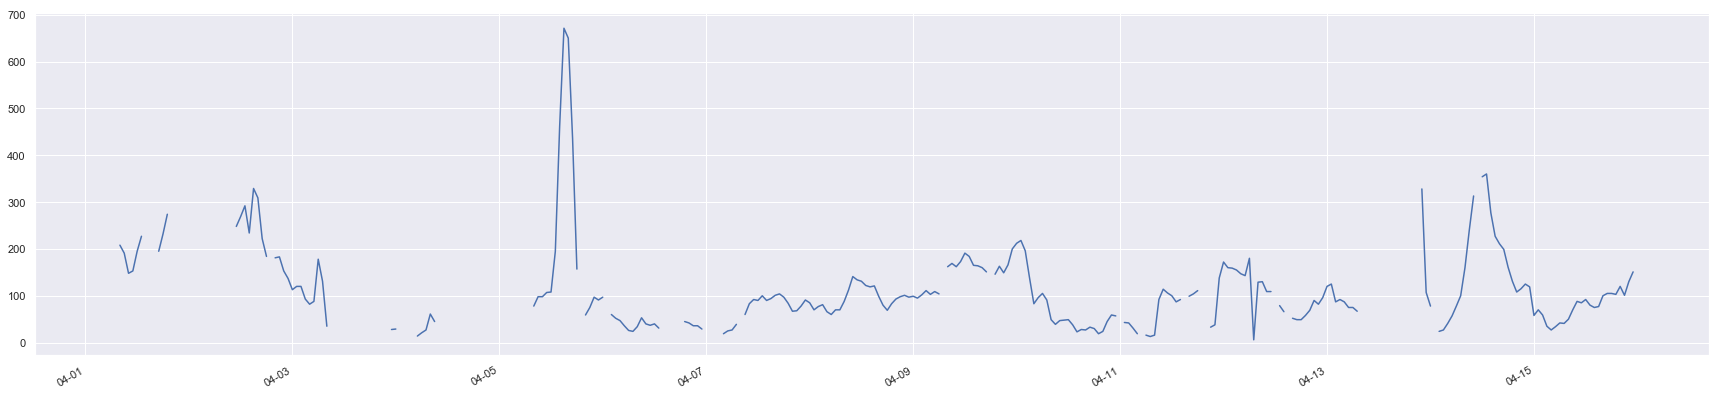

In [55]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 2018.4.3 9：00 - 2018.4.5 7：00 Missing PM2.5
# KNN Imputation with k=2
start = pd.Timestamp(2018, 4, 1, 0)
end = pd.Timestamp(2018, 4, 15, 23)

atzx['time'] = pd.to_datetime(atzx['time'])
mask = (atzx['time'] > start) & (atzx['time'] <= end)
atzx_4_data = atzx.loc[mask]
atzx_4_data.head()

fig, ax = plt.subplots(figsize=(30,7))
ax.plot(atzx_4_data['time'], atzx_4_data['PM10'])

myFmt = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()

## Training data & Testing data

### Dropna & Split Data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
# from evaluation import smape
from sklearn.metrics import mean_squared_error
import ipdb

%matplotlib inline

lat = 'latitude'
lng = 'longitude'
sid = 'station_id'
k_nn = 3

/Users/zhengdongjia/anaconda2/envs/tensorflow/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [57]:
train_data_dict = {}
test_data_dict = {}

In [159]:
# return the dictionary dataframes according to the air quality type for further training & testing
# drop the NaN in the separated air types table
def airQualTypesDataDict(data_df):
    # dictionary for storing dataframes
    data_dict = {}
    
    # air quality types list
    air_types = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
    
    # features columns containing 'time' label
    feature_cols = list(set(data_df.columns) - set(air_types))
    
    for air in air_types:
        # get all the columns
        data_cols = feature_cols.copy()
        data_cols.append(air)
        
        # get the dataframe with the specific air type
        air_data_df = data_df[data_cols]
        
        # drop NaN rows
        print("{} rows before dropping NaN: {}".format(air, len(air_data_df)))
        air_data_df = air_data_df.dropna()
        print("{} rows after dropping NaN: {}".format(air, len(air_data_df)))
        
        # choose the 'time' as the index
        air_data_df.time = air_data_df.time.apply(lambda x: pd.Timestamp(x))
        air_data_df = air_data_df.set_index('time')
        data_dict[air] = air_data_df
        
    
    return data_dict

# return training & validation data
def splitTrainValData(data_df, label, val_size):
    label_col = [label]
    feature_col = list(set(data_df.columns) - set([label]))
    
    # Minmax Scaler
#     features_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
#     labels_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
    
    # Box-cox
    features_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
    labels_scaler = PowerTransformer(copy=True, method='box-cox', standardize=True)

    # Standard Scaler
#     features_scaler = StandardScaler()
#     labels_scaler = StandardScaler()
    
    # scale features
    features = data_df[feature_col]
    features_scaled = features_scaler.fit_transform(features)
    features_scaled_df = pd.DataFrame(features_scaled, index=features.index, columns=features.columns)
    
    # scale labels
    labels = data_df[label_col]
    labels_scaled = labels_scaler.fit_transform(labels)
    labels_scaled_df = pd.DataFrame(labels_scaled, index=labels.index, columns=labels.columns)
    
    # split features
    X_val = features_scaled_df[-val_size:]
    X_train = features_scaled_df[:-val_size]
    
    # split labels
    y_val = labels_scaled_df[-val_size:]
    y_train = labels_scaled_df[:-val_size]
    
    val_df = data_df[-val_size:]
    X_val = val_df[feature_col]
    y_val = val_df[label_col]

    # train set
    train_df = data_df[:-val_size]
    X_train = train_df[feature_col]
    y_train = train_df[label_col]
    
    return X_train, X_val, y_train, y_val, labels_scaler
    
    
# drop the NaN in the concated air types table
def getTrainTestDataDropna(data_df):
    # dropna
    print ('Total rows before dropna: {}'.format(len(data_df)))
    data_df = data_df.dropna()
    data_df = data_df.set_index('time')
    print ('Total rows after dropna: {}'.format(len(data_df)))

    # labels columns
    label_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
    feature_cols = list(set(data_df.columns) - set(label_cols))
    
    # validation set
    val_df = data_df[-48:]
    X_val = val_df[feature_cols]
    y_val = val_df[label_cols]

    # train set
    train_df = data_df[:-48]
    X_train = train_df[feature_cols]
    y_train = train_df[label_cols]
    
    return X_train, X_val, y_train, y_val


## Data Exploration

### Correlation Matrix

In [188]:
X_train, X_val, y_train, y_test = getTrainTestDataDropna(atzx_impute)


Total rows before dropna: 10976
Total rows after dropna: 7261


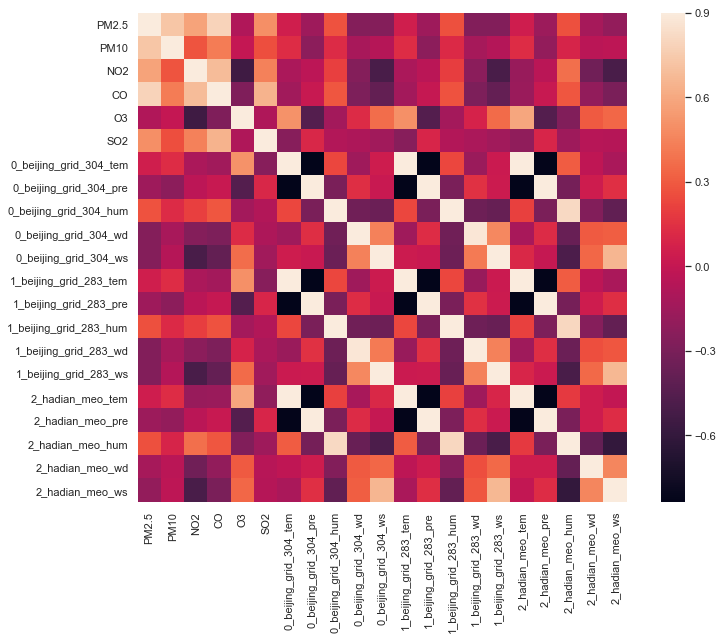

In [142]:
#Correlation map to see how features are correlated with SalePrice

corrmat = atzx.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### import cleaned data

In [143]:
import os

# read files from directory
cleaned_data_path = './imputed_data/'
aq_file_list = []

# read the file names into list
for aq_file in os.listdir(cleaned_data_path):
    if '.csv' in aq_file:
        aq_file_list.append(aq_file)

atzx_path = "./imputed_data/atzx_imputed.csv"
atzx_impute = pd.read_csv(atzx_path, index_col=0)
atzx_impute.head()

time  PM2.5  PM10   NO2   CO    O3   SO2  \
0  2017-01-30 16:00:00   70.0  75.0  36.0  0.9  79.0  34.0   
1  2017-01-30 17:00:00   78.0  86.0  36.0  0.1  78.0  38.0   
2  2017-01-30 18:00:00   86.0  92.0  39.0  1.1  74.0  35.0   
3  2017-01-30 19:00:00   95.0   NaN  46.0  1.2  65.0  34.0   
4  2017-01-30 20:00:00   98.0   NaN  42.0  1.2   NaN  32.0   

   0_beijing_grid_304_hum  0_beijing_grid_304_ws  0_beijing_grid_304_tem  \
0                   14.58                   7.13                   -5.89   
1                   15.11                   6.02                   -6.16   
2                   15.64                   4.96                   -6.44   
3                   16.59                   4.55                   -7.02   
4                   17.55                   4.17                   -7.61   

                ...                2_hadian_meo_wea_Hail  \
0               ...                                    0   
1               ...                                    0   
2               ...                                    0   
3               ...                                    0   
4               ...                                    0   

   2_hadian_meo_wea_Haze  2_hadian_meo_wea_Light Rain  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   2_hadian_meo_wea_Overcast  2_hadian_meo_wea_Rain  2_hadian_meo_wea_Sand  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   2_hadian_meo_wea_Sleet  2_hadian_meo_wea_Snow  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   

   2_hadian_meo_wea_Sunny/clear  2_hadian_meo_wea_Thundershower  
0                             1                               0  
1                             1                               0  
2                             1                               0  
3                             1                               0  
4                             1                               0  

[5 rows x 53 columns]

### Take a look at the filled data

In [144]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


def showLineChart(data_df, air_type, start, end):
    data_df['time'] = pd.to_datetime(data_df['time'])
    mask = (data_df['time'] > start) & (data_df['time'] <= end)
    period_data = data_df.loc[mask]
    period_data.head()

    fig, ax = plt.subplots(figsize=(30,7))
    ax.plot(period_data['time'], period_data[air_type])

    myFmt = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(myFmt)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.show()

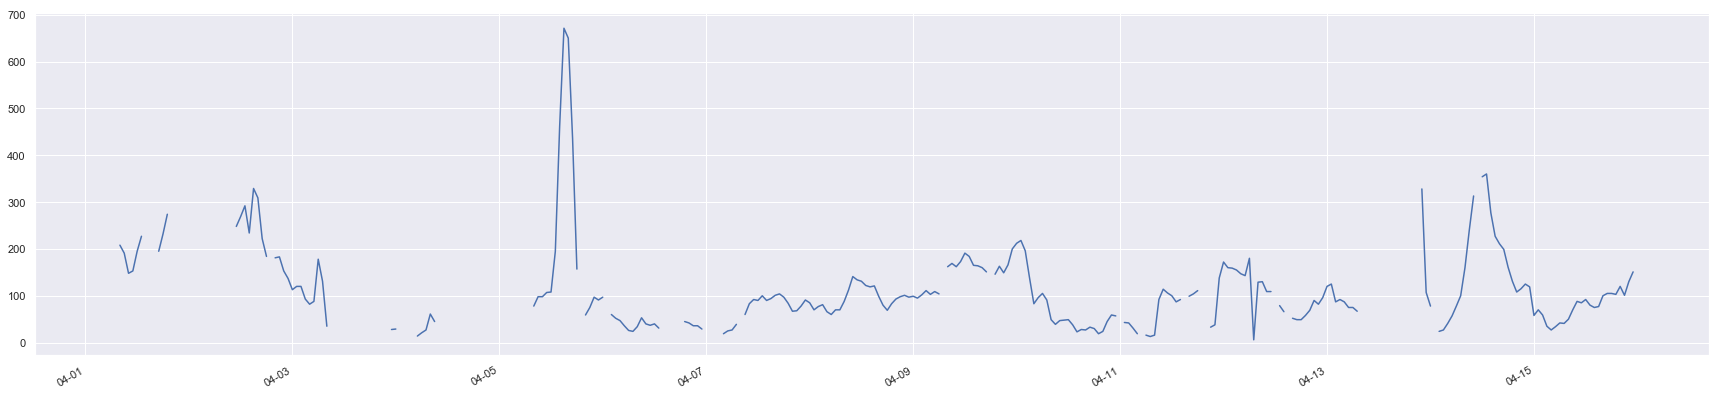

In [125]:
# 2018.4.3 9：00 - 2018.4.5 7：00 Missing PM2.5
# KNN Imputation with k=2
start = pd.Timestamp(2018, 4, 1, 0)
end = pd.Timestamp(2018, 4, 15, 23)  
showLineChart(atzx_impute, 'PM10', start, end)

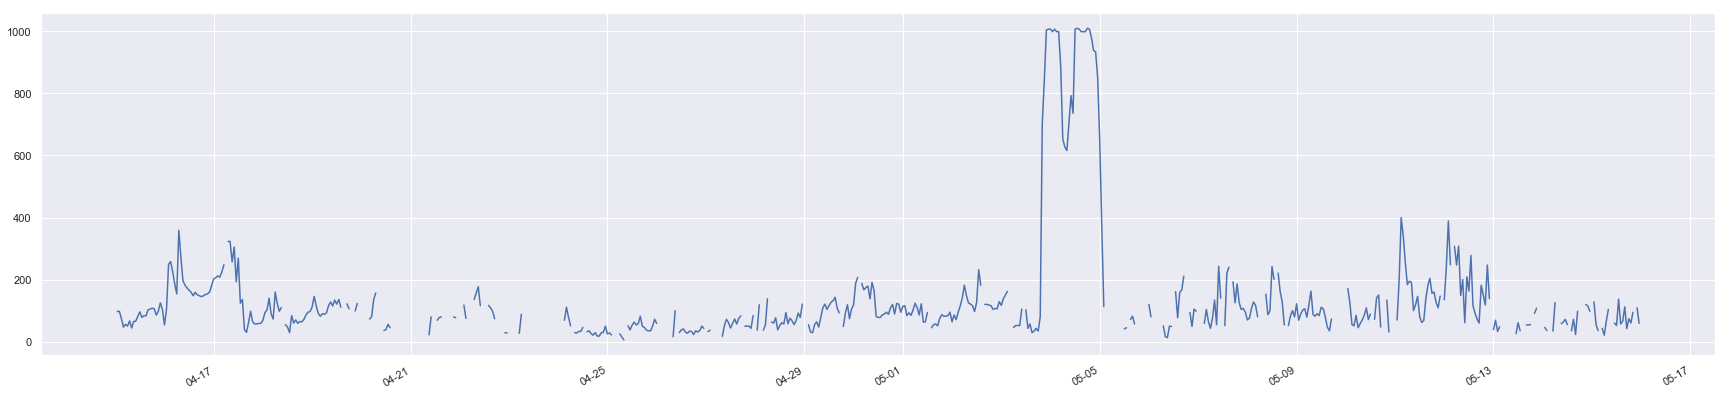

In [126]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

start = pd.Timestamp(2017, 4, 15, 0)
end = pd.Timestamp(2017, 5, 15, 23)
showLineChart(atzx_impute, 'PM10', start, end)


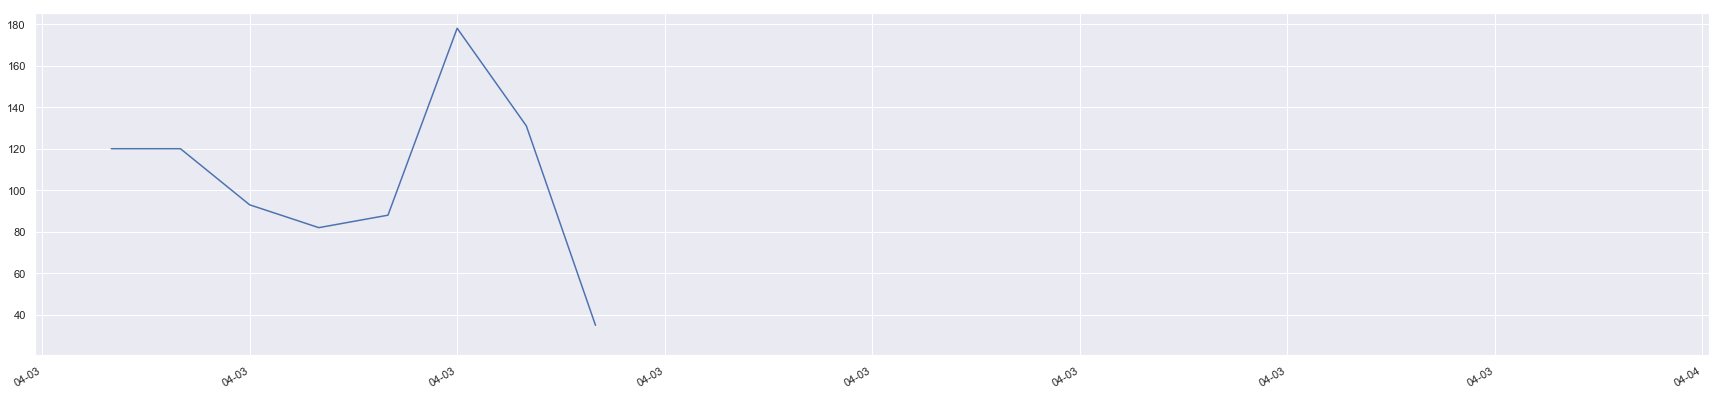

In [127]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

start = pd.Timestamp(2018, 4, 3, 0)
end = pd.Timestamp(2018, 4, 3, 23)
showLineChart(atzx, 'PM10', start, end)

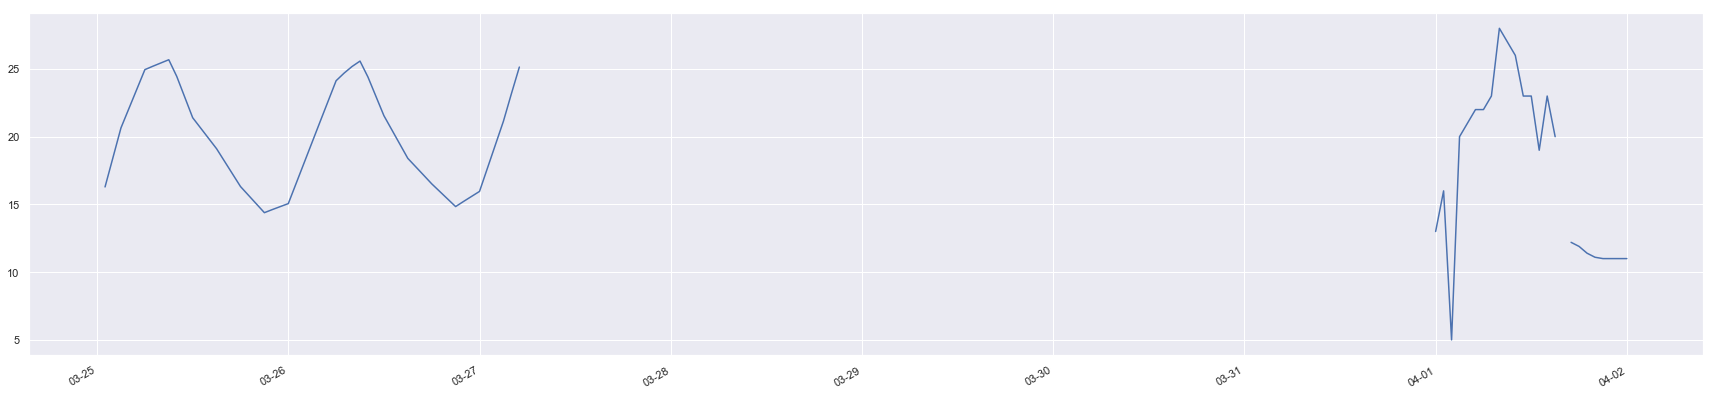

In [128]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

start = pd.Timestamp(2018, 3, 25, 0)
end = pd.Timestamp(2018, 4, 2, 0)
showLineChart(atzx, '0_beijing_grid_304_tem', start, end)